In [1]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



In [2]:
pwd

'D:\\258 Sem Proj'

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
#checks the shape of the data and its type
print( type(X_train), X_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28)


In [6]:
print( type(y_train), y_train.shape)

<class 'numpy.ndarray'> (60000,)


In [7]:
print( type(X_test), X_test.shape)

<class 'numpy.ndarray'> (10000, 28, 28)


In [8]:
print( type(y_test), y_test.shape)

<class 'numpy.ndarray'> (10000,)


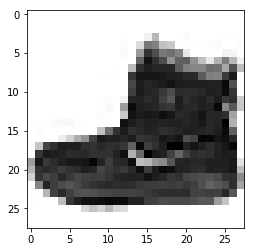

In [9]:
# I wanted to display one image and confirm that its output matches up



%matplotlib inline
plt.imshow(X_train[0], cmap = plt.cm.binary, interpolation = 'nearest') #plt.axis("off")
plt.show()

In [10]:
y_train[0]

9

In [11]:
#there was an issuue with the data type working with the original code and it threw an error that the data
#type was incompatible so I cast the data as int32 to resolve the error




X_train = X_train.reshape(60000,-1).astype(np.int32)
X_train.shape
X_test = X_test.reshape(10000,-1).astype(np.int32)
X_test.shape

y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

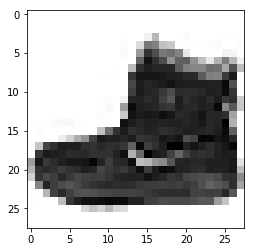

In [12]:
#making sure the change above didn't alter the souce data

%matplotlib inline
plt.imshow(X_train[0].reshape(28,28), cmap = plt.cm.binary, interpolation = 'nearest') #plt.axis("off")
plt.show()

In [13]:
#checking to see how the scaled data would look



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

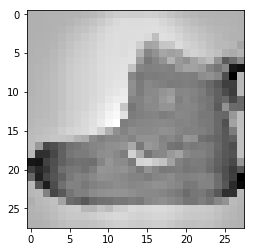

In [14]:
plt.imshow(X_train[0].reshape(28,28), cmap = plt.cm.binary, interpolation = 'nearest') #plt.axis("off")
plt.imshow(X_train_scaled[0].reshape(28,28), cmap = plt.cm.binary, interpolation = 'nearest')
plt.show()

In [15]:
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 1/6, random_state = 42)

In [16]:
#In the line above I took 10,000 points from the 60,000 training points and assigned it to the 
#validation set




print(y_val.shape)
print(y_train.shape)

(10000,)
(50000,)


In [17]:
#this is nearly the same as the batch search loop from the MNIST version but I changed the loop to span
#a range from 20 to 400 in increments of 20 and then displayed the results in two graphs to compare runtime and
#accuracy. The decision was left to me on what batch i felt worked best for what i wanted






batch_pred = []
run_time = []

for i in range(20,400,20):
    start=datetime.now()

    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    # set the random seed for tensorflow initializers(for consistency between reruns)

    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
    dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[784], n_classes=10, feature_columns=feature_columns, config=config)
    dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # to be compatible with sklearn


    dnn_clf.fit(X_train, y_train, batch_size=i, steps=1000)
    y_pred = dnn_clf.predict(X_val)
    batch_pred.append(accuracy_score(y_val, y_pred['classes']))

    Train_elapse = (datetime.now()-start).total_seconds()
    run_time.append(Train_elapse)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please feed input to tf.data to support dask.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf

Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.EstimatorSpec. You can use the `estimator_spec` method to create an equivalent one.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpw7rzp8ni\model.ckpt.
INFO:tensorflow:loss = 110.65403, step = 0
INFO:tensorflow:global_step/sec: 756.887
INFO:tensorflow:loss = 3.3828983, step = 100 (0.132 sec)
INFO:tensorflow:global_step/sec: 925.084
INFO:tensorflow:loss = 9.884381, step = 200 (0.109 sec)
INFO:tensorflow:global_step/sec: 916.597
INFO:tensorflow:loss = 1.5486686, step = 300 (0.108 sec)
INFO:tensorflow:global_step/sec: 908.261
INFO:tensorflow:loss = 1.8339924, step = 400 (0.111 sec)
INFO:tensorflow:global_step/sec: 9

INFO:tensorflow:global_step/sec: 832.572
INFO:tensorflow:loss = 0.9315879, step = 400 (0.120 sec)
INFO:tensorflow:global_step/sec: 839.574
INFO:tensorflow:loss = 0.605889, step = 500 (0.119 sec)
INFO:tensorflow:global_step/sec: 839.569
INFO:tensorflow:loss = 1.7112408, step = 600 (0.120 sec)
INFO:tensorflow:global_step/sec: 825.698
INFO:tensorflow:loss = 0.4761377, step = 700 (0.120 sec)
INFO:tensorflow:global_step/sec: 846.684
INFO:tensorflow:loss = 1.283164, step = 800 (0.118 sec)
INFO:tensorflow:global_step/sec: 846.688
INFO:tensorflow:loss = 0.66451514, step = 900 (0.118 sec)
INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\cstra\AppData\Local\Temp\tmphzyr1kv3\model.ckpt.
INFO:tensorflow:Loss for final step: 0.5605144.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmphzyr1kv3\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Using config: {'_t

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmphgwvo19m\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018EAA81FBE0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstr

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpc14eg8jn\model.ckpt.
INFO:tensorflow:loss = 123.74885, step = 0
INFO:tensorflow:global_step/sec: 504.588
INFO:tensorflow:loss = 3.1958117, step = 100 (0.199 sec)
INFO:tensorflow:global_step/sec: 594.701
INFO:tensorflow:loss = 1.2621611, step = 200 (0.167 sec)
INFO:tensorflow:global_step/sec: 729.262
INFO:tensorflow:loss = 1.2086614, step = 300 (0.137 sec)
INFO:tensorflow:global_step/sec: 745.59
INFO:tensorflow:loss = 2.1113248, step = 400 (0.134 sec)
INFO:tensorflow:global_step/sec: 751.198
INFO:tensorflow:loss = 0.63880235, step = 500 (0.133 sec)
INFO:tensorflow:global_step/sec: 751.195
INFO:tensorflow:loss = 1.0803394, step = 600 (0.133 sec)
INFO:tensorflow:global_step/sec: 745.59
INFO:tensorflow:loss = 0.5274141, step = 700 (0.135 sec)
INFO

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpl60bcbub\model.ckpt.
INFO:tensorflow:loss = 126.09643, step = 0
INFO:tensorflow:global_step/sec: 636.363
INFO:tensorflow:loss = 1.9477516, step = 100 (0.158 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 1.0014323, step = 200 (0.140 sec)
INFO:tensorflow:global_step/sec: 723.978
INFO:tensorflow:loss = 0.900874, step = 300 (0.139 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.91788566, step = 400 (0.143 sec)
INFO:tensorflow:global_step/sec: 666.061
INFO:tensorflow:loss = 0.70973957, step = 500 (0.149 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.6549664, step = 600 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.58
INFO:tensorflow:loss = 0.80871063, step = 700 (0.141 sec)
IN

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmph149qp42\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018EAA6B1CF8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstr

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000019082190A58>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpoimfwej0'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Runni

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp271mw0pa\model.ckpt.
INFO:tensorflow:loss = 120.555, step = 0
INFO:tensorflow:global_step/sec: 564.433
INFO:tensorflow:loss = 2.1925623, step = 100 (0.178 sec)
INFO:tensorflow:global_step/sec: 632.37
INFO:tensorflow:loss = 1.2107098, step = 200 (0.158 sec)
INFO:tensorflow:global_step/sec: 636.362
INFO:tensorflow:loss = 1.0189154, step = 300 (0.158 sec)
INFO:tensorflow:global_step/sec: 609.202
INFO:tensorflow:loss = 0.94554496, step = 400 (0.164 sec)
INFO:tensorflow:global_step/sec: 580.867
INFO:tensorflow:loss = 0.8115148, step = 500 (0.172 sec)
INFO:tensorflow:global_step/sec: 502.056
INFO:tensorflow:loss = 0.74780494, step = 600 (0.198 sec)
INFO:tensorflow:global_step/sec: 492.162
INFO:tensorflow:loss = 0.7050515, step = 700 (0.203 sec)
INFO

INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\cstra\AppData\Local\Temp\tmp4ajz2dxk\model.ckpt.
INFO:tensorflow:Loss for final step: 0.7268516.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp4ajz2dxk\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001907F791390>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp_9xu8csg\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001907F9772B0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstr

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp_dc3m2hw\model.ckpt.
INFO:tensorflow:loss = 117.16303, step = 0
INFO:tensorflow:global_step/sec: 489.751
INFO:tensorflow:loss = 1.2156533, step = 100 (0.204 sec)
INFO:tensorflow:global_step/sec: 502.055
INFO:tensorflow:loss = 1.0851656, step = 200 (0.199 sec)
INFO:tensorflow:global_step/sec: 484.996
INFO:tensorflow:loss = 0.9102535, step = 300 (0.206 sec)
INFO:tensorflow:global_step/sec: 484.994
INFO:tensorflow:loss = 1.0334765, step = 400 (0.207 sec)
INFO:tensorflow:global_step/sec: 497.06
INFO:tensorflow:loss = 0.6972494, step = 500 (0.200 sec)
INFO:tensorflow:global_step/sec: 414.561
INFO:tensorflow:loss = 0.68556345, step = 600 (0.242 sec)
INFO:tensorflow:global_step/sec: 512.353
INFO:tensorflow:loss = 0.7528322, step = 700 (0.194 sec)
INF

INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpq1k635dw\model.ckpt.
INFO:tensorflow:loss = 117.835976, step = 0
INFO:tensorflow:global_step/sec: 469.057
INFO:tensorflow:loss = 1.6480342, step = 100 (0.215 sec)
INFO:tensorflow:global_step/sec: 482.653
INFO:tensorflow:loss = 1.1630509, step = 200 (0.206 sec)
INFO:tensorflow:global_step/sec: 509.74
INFO:tensorflow:loss = 1.2023418, step = 300 (0.196 sec)
INFO:tensorflow:global_step/sec: 517.664
INFO:tensorflow:loss = 0.7705336, step = 400 (0.194 sec)
INFO:tensorflow:global_step/sec: 502.055
INFO:tensorflow:loss = 0.5919525, step = 500 (0.199 sec)
INFO:tensorflow:global_step/sec: 523.084
INFO:tensorflow:loss = 0.62690467, step = 600 (0.190 sec)
INFO:tensorflow:global_step/sec: 507.152
INFO:tensorflow:loss = 0.69564104, step = 700 (0.198 sec)
INFO:tensorflow:global_step/sec: 497.059
INFO:tensorflow:loss = 0.8346633, step = 800 (0.201 sec)
INFO:tensorflow:global_step/sec: 502.058
INFO:tensorflow:loss = 0.8

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmprbi6dynu\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000019077BB5FD0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstr

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001907FBCA0F0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpkidttps7'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Runni

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpo8h19btd\model.ckpt.
INFO:tensorflow:loss = 113.7338, step = 0
INFO:tensorflow:global_step/sec: 372.795
INFO:tensorflow:loss = 1.7665956, step = 100 (0.269 sec)
INFO:tensorflow:global_step/sec: 412.83
INFO:tensorflow:loss = 1.2498432, step = 200 (0.243 sec)
INFO:tensorflow:global_step/sec: 402.876
INFO:tensorflow:loss = 0.81181175, step = 300 (0.247 sec)
INFO:tensorflow:global_step/sec: 409.464
INFO:tensorflow:loss = 0.8985295, step = 400 (0.244 sec)
INFO:tensorflow:global_step/sec: 404.49
INFO:tensorflow:loss = 0.89712703, step = 500 (0.247 sec)
INFO:tensorflow:global_step/sec: 407.792
INFO:tensorflow:loss = 0.5730221, step = 600 (0.245 sec)
INFO:tensorflow:global_step/sec: 406.134
INFO:tensorflow:loss = 0.74514455, step = 700 (0.246 sec)
INF

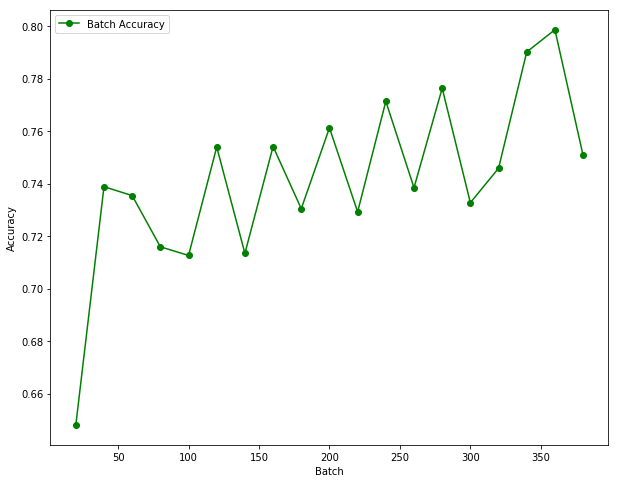

In [18]:
plt.figure(figsize = (10,8))
plt.plot(range(20,400,20), batch_pred, 'go-',label = "Batch Accuracy")

plt.xlabel('Batch')
plt.ylabel('Accuracy')
plt.legend(loc="upper left", fontsize=10)

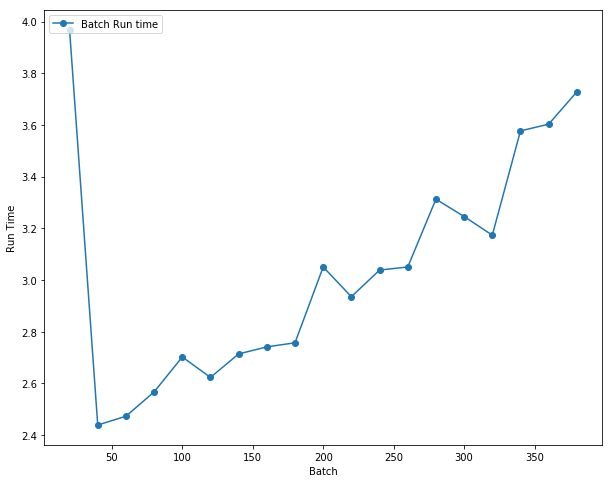

In [19]:
plt.figure(figsize = (10,8))
plt.plot(range(20,400,20), run_time, 'o-',label = "Batch Run time")

plt.xlabel('Batch')
plt.ylabel('Run Time')
plt.legend(loc="upper left", fontsize=10)

Standard Scaler

In [20]:
#This is the same as the StandardScaler block from the MNIST set and subtract the average from each point and
# then divides that point by the std deviation





from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_val_scaled = scaler.fit_transform(X_val.astype(np.float32))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float32))


config = tf.contrib.learn.RunConfig(tf_random_seed=42)
# set the random seed for tensorflow initializers(for consistency between reruns)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[784], n_classes=10,
                                         feature_columns=feature_columns, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # to be compatible with sklearn
dnn_clf.fit(X_train_scaled, y_train, batch_size=100, steps=1000)

y_pred = dnn_clf.predict(X_val_scaled)
accuracy_score(y_val, y_pred['classes'])

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018EAA413F60>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpbwbrgc4g'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

0.8704

Normailize 

In [21]:
#I wanted to see if Normalizing the data would produce any changes in the accuracy and it didn't. This kind a makes
#sense since each input is a pixel so all points should have the same range.




from sklearn.preprocessing import Normalizer
norm = Normalizer()
X_train_norm = norm.fit_transform(X_train.astype(np.float32))
X_val_norm = norm.fit_transform(X_val.astype(np.float32))
X_test_norm = norm.fit_transform(X_test.astype(np.float32))


config = tf.contrib.learn.RunConfig(tf_random_seed=42)
# set the random seed for tensorflow initializers(for consistency between reruns)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_norm)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[784], n_classes=10,
                                         feature_columns=feature_columns, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # to be compatible with sklearn
dnn_clf.fit(X_train_norm, y_train, batch_size=100, steps=1000)

y_pred = dnn_clf.predict(X_val_norm)
accuracy_score(y_val, y_pred['classes'])

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018EAA6B1898>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpslm3i7l_'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

0.7651

Scaled Value Epoch 1

In [ ]:
#the next blocks of code are identical to the MNIST code and search for the effects of training set size and
#number of iterations has on the accuracy of the model. I did add and extra Epoch since I wanted to continue the 1,5,10,50,100 pattern

In [29]:
#learning curve

Train_size_list_1ep = []
Train_error_list_1ep = []
Val_error_list_1ep = []
Train_time_list_1ep = []
Val_time_list_1ep = []

from sklearn.model_selection import train_test_split

for j in [ 0.999, 0.995, 0.99,0.985,0.98, 0.975,0.97, 0.96,0.95, 0.94, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.2, 0.1, 0.001, 0]:

    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train_scaled, y_train, test_size = j, random_state = 42)
    print('Train_set_size:', y_train_partial.shape[0])
    Train_size_list_1ep.append(y_train_partial.shape[0])
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf = tf.contrib.learn.DNNClassifier(hidden_units=[784], n_classes=10, feature_columns=feature_columns, config=config)
    dnn_1_clf = tf.contrib.learn.SKCompat(dnn_1_clf) #### to be compatible with sklearn
    
    
    start=datetime.now()
    dnn_1_clf.fit(X_train_scaled_partial, y_train_partial, batch_size=100, steps=((1-j)*1100) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf training time', Train_elapse)
    Train_time_list_1ep.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    print(type(y_train_partial_pred))
    
    

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf.predict(X_val_scaled)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    
    Val_time_list_1ep.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
      
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_1ep.append(Train_error)
    Val_error_list_1ep.append(Val_error)
    
print("Train_size_list: ", Train_size_list_1ep)
print("Train_error_list: ", Train_error_list_1ep)
print("Val_error_list: ", Val_error_list_1ep)
print("Train_time_list: ", Train_time_list_1ep)
print("Val_time_list: ", Val_time_list_1ep)   

Train_set_size: 50
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000019077C95D30>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmppencgvxt'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
IN

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp51hxg_9y\model.ckpt.
INFO:tensorflow:loss = 2.3769813, step = 0
INFO:tensorflow:Saving checkpoints for 6 into C:\Users\cstra\AppData\Local\Temp\tmp51hxg_9y\model.ckpt.
INFO:tensorflow:Loss for final step: 0.8534586.
dnn_1_clf training time 0.80173
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp51hxg_9y\model.ckpt-6
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp51hxg_9y\model.ckpt-6
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.24 / 0.3731
Train_set_s

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpalg9sid6\model.ckpt.
INFO:tensorflow:loss = 2.4954479, step = 0
INFO:tensorflow:Saving checkpoints for 12 into C:\Users\cstra\AppData\Local\Temp\tmpalg9sid6\model.ckpt.
INFO:tensorflow:Loss for final step: 0.3717692.
dnn_1_clf training time 0.806735
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpalg9sid6\model.ckpt-12
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpalg9sid6\model.ckpt-12
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.13 / 0.276
Train_se

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpzrb3z0rg\model.ckpt.
INFO:tensorflow:loss = 2.4841433, step = 0
INFO:tensorflow:Saving checkpoints for 17 into C:\Users\cstra\AppData\Local\Temp\tmpzrb3z0rg\model.ckpt.
INFO:tensorflow:Loss for final step: 0.6371095.
dnn_1_clf training time 0.975889
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpzrb3z0rg\model.ckpt-17
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpzrb3z0rg\model.ckpt-17
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.17866666666666664 /

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpfxpdvop6\model.ckpt.
INFO:tensorflow:loss = 2.452161, step = 0
INFO:tensorflow:Saving checkpoints for 23 into C:\Users\cstra\AppData\Local\Temp\tmpfxpdvop6\model.ckpt.
INFO:tensorflow:Loss for final step: 0.43869972.
dnn_1_clf training time 0.84777
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpfxpdvop6\model.ckpt-23
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpfxpdvop6\model.ckpt-23
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.124 / 0.2491
Train_s

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpq2qea1w8\model.ckpt.
INFO:tensorflow:loss = 2.407552, step = 0
INFO:tensorflow:Saving checkpoints for 28 into C:\Users\cstra\AppData\Local\Temp\tmpq2qea1w8\model.ckpt.
INFO:tensorflow:Loss for final step: 0.37350193.
dnn_1_clf training time 0.822748
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpq2qea1w8\model.ckpt-28
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpq2qea1w8\model.ckpt-28
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.10319999999999996 / 0.20140000000000002
Train_set_size: 1500
IN

INFO:tensorflow:loss = 2.402845, step = 0
INFO:tensorflow:Saving checkpoints for 34 into C:\Users\cstra\AppData\Local\Temp\tmpro82zve3\model.ckpt.
INFO:tensorflow:Loss for final step: 0.5131742.
dnn_1_clf training time 0.820746
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpro82zve3\model.ckpt-34
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpro82zve3\model.ckpt-34
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.1146666666666667 / 0.2157
Train_set_size: 2000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC6FBB38>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environme

dnn_1_clf training time 0.908827
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp5s4crmck\model.ckpt-45
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp5s4crmck\model.ckpt-45
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.17400000000000004 / 0.25149999999999995
Train_set_size: 2500
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECDDE7CC0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmps4kdc5wx\model.ckpt-56
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmps4kdc5wx\model.ckpt-56
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.12960000000000005 / 0.1975
Train_set_size: 3000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECDA332B0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memo

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmptnwrvzuz\model.ckpt-67
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmptnwrvzuz\model.ckpt-67
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.09699999999999998 / 0.1724
Train_set_size: 5000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECD8DFD68>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memo

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpg__wsw_k\model.ckpt-110
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpg__wsw_k\model.ckpt-110
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.1068 / 0.1684
Train_set_size: 10000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED581BB70>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fractio

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpv1cxkr0u\model.ckpt-220
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpv1cxkr0u\model.ckpt-220
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.10229999999999995 / 0.1511
Train_set_size: 15000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC808320>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_m

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp2c_6xys2\model.ckpt-331
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp2c_6xys2\model.ckpt-331
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.09940000000000004 / 0.13959999999999995
Train_set_size: 20000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018EAA7B4588>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpperj3sev\model.ckpt-440
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpperj3sev\model.ckpt-440
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.10004999999999997 / 0.1391
Train_set_size: 25000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECD827F60>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_m

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmptsirpqei\model.ckpt-550
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmptsirpqei\model.ckpt-550
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.10243999999999998 / 0.13439999999999996
Train_set_size: 30000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC304E80>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpu9m5yfmg\model.ckpt-660
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpu9m5yfmg\model.ckpt-660
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.09916666666666663 / 0.13119999999999998
Train_set_size: 40000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001907F9DAF28>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpxhlkvd96\model.ckpt-880
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpxhlkvd96\model.ckpt-880
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.10202500000000003 / 0.129
Train_set_size: 45000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC414A58>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_me

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp0hy_uqhj\model.ckpt-990
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp0hy_uqhj\model.ckpt-990
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.09526666666666672 / 0.12749999999999995
Train_set_size: 49950
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED584C080>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_

INFO:tensorflow:global_step/sec: 723.977
INFO:tensorflow:loss = 0.3594025, step = 1000 (0.139 sec)
INFO:tensorflow:Saving checkpoints for 1099 into C:\Users\cstra\AppData\Local\Temp\tmpowf7qbrx\model.ckpt.
INFO:tensorflow:Loss for final step: 0.22217113.
dnn_1_clf training time 2.350137
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpowf7qbrx\model.ckpt-1099
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpowf7qbrx\model.ckpt-1099
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.09523523523523525 / 0.12180000000000002
Train_set_size: 50000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC58BEB8

INFO:tensorflow:global_step/sec: 729.267
INFO:tensorflow:loss = 0.6258483, step = 200 (0.137 sec)
INFO:tensorflow:global_step/sec: 734.625
INFO:tensorflow:loss = 0.34853423, step = 300 (0.136 sec)
INFO:tensorflow:global_step/sec: 740.064
INFO:tensorflow:loss = 0.3995277, step = 400 (0.134 sec)
INFO:tensorflow:global_step/sec: 729.264
INFO:tensorflow:loss = 0.30278507, step = 500 (0.137 sec)
INFO:tensorflow:global_step/sec: 745.594
INFO:tensorflow:loss = 0.29214755, step = 600 (0.135 sec)
INFO:tensorflow:global_step/sec: 708.572
INFO:tensorflow:loss = 0.35908553, step = 700 (0.141 sec)
INFO:tensorflow:global_step/sec: 745.589
INFO:tensorflow:loss = 0.4030125, step = 800 (0.134 sec)
INFO:tensorflow:global_step/sec: 740.068
INFO:tensorflow:loss = 0.22281808, step = 900 (0.135 sec)
INFO:tensorflow:global_step/sec: 729.26
INFO:tensorflow:loss = 0.15702713, step = 1000 (0.137 sec)
INFO:tensorflow:Saving checkpoints for 1100 into C:\Users\cstra\AppData\Local\Temp\tmpehx5mrwh\model.ckpt.
INFO:

epoch5

In [23]:
#learning curve

Train_size_list_5ep = []
Train_error_list_5ep = []
Val_error_list_5ep = []
Train_time_list_5ep = []
Val_time_list_5ep = []

from sklearn.model_selection import train_test_split

for j in [ 0.999, 0.995, 0.99,0.985,0.98, 0.975,0.97, 0.96,0.95, 0.94, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.2, 0.1, 0.001, 0]:

    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train_scaled, y_train, test_size = j, random_state = 42)
    print('Train_set_size:', y_train_partial.shape[0])
    Train_size_list_5ep.append(y_train_partial.shape[0])
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf = tf.contrib.learn.DNNClassifier(hidden_units=[784], n_classes=10, feature_columns=feature_columns, config=config)
    dnn_1_clf = tf.contrib.learn.SKCompat(dnn_1_clf) #### to be compatible with sklearn
    
    
    start=datetime.now()
    dnn_1_clf.fit(X_train_scaled_partial, y_train_partial, batch_size=120, steps=((1-j)*1100*5) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf training time', Train_elapse)
    Train_time_list_5ep.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    print(type(y_train_partial_pred))
    
    

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf.predict(X_val_scaled)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    
    Val_time_list_5ep.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
      
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_5ep.append(Train_error)
    Val_error_list_5ep.append(Val_error)
    
print("Train_size_list: ", Train_size_list_5ep)
print("Train_error_list: ", Train_error_list_5ep)
print("Val_error_list: ", Val_error_list_5ep)
print("Train_time_list: ", Train_time_list_5ep)
print("Val_time_list: ", Val_time_list_5ep)   

Train_set_size: 50
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC6FB208>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpui5yckl0'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
IN

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp2t_apb2v\model.ckpt.
INFO:tensorflow:loss = 2.4022791, step = 0
INFO:tensorflow:Saving checkpoints for 28 into C:\Users\cstra\AppData\Local\Temp\tmp2t_apb2v\model.ckpt.
INFO:tensorflow:Loss for final step: 0.13639994.
dnn_1_clf training time 0.82375
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp2t_apb2v\model.ckpt-28
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp2t_apb2v\model.ckpt-28
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.008000000000000007 

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp7l4rvy9q\model.ckpt.
INFO:tensorflow:loss = 2.4568367, step = 0
INFO:tensorflow:Saving checkpoints for 56 into C:\Users\cstra\AppData\Local\Temp\tmp7l4rvy9q\model.ckpt.
INFO:tensorflow:Loss for final step: 0.08128999.
dnn_1_clf training time 0.938853
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp7l4rvy9q\model.ckpt-56
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp7l4rvy9q\model.ckpt-56
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.008000000000000007

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpx759rny2\model.ckpt.
INFO:tensorflow:loss = 2.4732754, step = 0
INFO:tensorflow:Saving checkpoints for 83 into C:\Users\cstra\AppData\Local\Temp\tmpx759rny2\model.ckpt.
INFO:tensorflow:Loss for final step: 0.094896965.
dnn_1_clf training time 0.978891
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpx759rny2\model.ckpt-83
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpx759rny2\model.ckpt-83
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.00133333333333329

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpe5aa75f7\model.ckpt.
INFO:tensorflow:loss = 2.4468157, step = 0
INFO:tensorflow:global_step/sec: 605.507
INFO:tensorflow:loss = 0.098296836, step = 100 (0.165 sec)
INFO:tensorflow:Saving checkpoints for 111 into C:\Users\cstra\AppData\Local\Temp\tmpe5aa75f7\model.ckpt.
INFO:tensorflow:Loss for final step: 0.06047872.
dnn_1_clf training time 0.955869
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpe5aa75f7\model.ckpt-111
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpe5aa75f7\model.ckpt-111
INFO:tensorflow:Running

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmphnp2pi1l\model.ckpt.
INFO:tensorflow:loss = 2.463867, step = 0
INFO:tensorflow:global_step/sec: 555.053
INFO:tensorflow:loss = 0.14163958, step = 100 (0.182 sec)
INFO:tensorflow:Saving checkpoints for 138 into C:\Users\cstra\AppData\Local\Temp\tmphnp2pi1l\model.ckpt.
INFO:tensorflow:Loss for final step: 0.077847876.
dnn_1_clf training time 1.025932
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmphnp2pi1l\model.ckpt-138
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmphnp2pi1l\model.ckpt-138
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running 

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpt4czez5f\model.ckpt.
INFO:tensorflow:loss = 2.4177785, step = 0
INFO:tensorflow:global_step/sec: 580.866
INFO:tensorflow:loss = 0.13705796, step = 100 (0.172 sec)
INFO:tensorflow:Saving checkpoints for 166 into C:\Users\cstra\AppData\Local\Temp\tmpt4czez5f\model.ckpt.
INFO:tensorflow:Loss for final step: 0.07186022.
dnn_1_clf training time 1.052957
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpt4czez5f\model.ckpt-166
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpt4czez5f\model.ckpt-166
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.010666666666666713 / 0.1696999999999

INFO:tensorflow:loss = 2.395564, step = 0
INFO:tensorflow:global_step/sec: 509.741
INFO:tensorflow:loss = 0.25877085, step = 100 (0.196 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.10228598, step = 200 (0.142 sec)
INFO:tensorflow:Saving checkpoints for 221 into C:\Users\cstra\AppData\Local\Temp\tmpu5dyh4fd\model.ckpt.
INFO:tensorflow:Loss for final step: 0.07262353.
dnn_1_clf training time 1.133031
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpu5dyh4fd\model.ckpt-221
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpu5dyh4fd\model.ckpt-221
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.009499999999999953 / 0.1643
Train_set_size: 2500
INFO:tensorflow:Using config: {'_task

INFO:tensorflow:loss = 2.3680806, step = 0
INFO:tensorflow:global_step/sec: 512.355
INFO:tensorflow:loss = 0.334313, step = 100 (0.195 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.13133883, step = 200 (0.143 sec)
INFO:tensorflow:Saving checkpoints for 276 into C:\Users\cstra\AppData\Local\Temp\tmp3tjela7m\model.ckpt.
INFO:tensorflow:Loss for final step: 0.06888962.
dnn_1_clf training time 1.310191
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp3tjela7m\model.ckpt-276
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp3tjela7m\model.ckpt-276
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.006399999999999961 / 0.1583
Train_set_size: 3000
INFO:tensorflow:Using config: {'_task_

INFO:tensorflow:loss = 2.2705622, step = 0
INFO:tensorflow:global_step/sec: 609.203
INFO:tensorflow:loss = 0.3364438, step = 100 (0.166 sec)
INFO:tensorflow:global_step/sec: 666.059
INFO:tensorflow:loss = 0.10952822, step = 200 (0.150 sec)
INFO:tensorflow:global_step/sec: 679.653
INFO:tensorflow:loss = 0.084016494, step = 300 (0.147 sec)
INFO:tensorflow:Saving checkpoints for 331 into C:\Users\cstra\AppData\Local\Temp\tmp7_p876ik\model.ckpt.
INFO:tensorflow:Loss for final step: 0.07619447.
dnn_1_clf training time 1.27716
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp7_p876ik\model.ckpt-331
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp7_p876ik\model.ckpt-331
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error,

INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpyypy_cgh\model.ckpt.
INFO:tensorflow:loss = 2.5115988, step = 0
INFO:tensorflow:global_step/sec: 620.554
INFO:tensorflow:loss = 0.4365717, step = 100 (0.162 sec)
INFO:tensorflow:global_step/sec: 679.649
INFO:tensorflow:loss = 0.26541486, step = 200 (0.147 sec)
INFO:tensorflow:global_step/sec: 703.589
INFO:tensorflow:loss = 0.10525269, step = 300 (0.143 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.11962191, step = 400 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.07232983, step = 500 (0.144 sec)
INFO:tensorflow:Saving checkpoints for 550 into C:\Users\cstra\AppData\Local\Temp\tmpyypy_cgh\model.ckpt.
INFO:tensorflow:Loss for final step: 0.076006584.
dnn_1_clf training time 1.58444
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpyypy_cgh\model.ckpt-550
INFO:tensorflow:Running local_i

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpnbnemjls\model.ckpt.
INFO:tensorflow:loss = 2.4907994, step = 0
INFO:tensorflow:global_step/sec: 620.554
INFO:tensorflow:loss = 0.4189265, step = 100 (0.163 sec)
INFO:tensorflow:global_step/sec: 670.526
INFO:tensorflow:loss = 0.42764255, step = 200 (0.148 sec)
INFO:tensorflow:global_step/sec: 666.063
INFO:tensorflow:loss = 0.19181706, step = 300 (0.150 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.2807532, step = 400 (0.141 sec)
INFO:tensorflow:global_step/sec: 558.147
INFO:tensorflow:loss = 0.23371616, step = 500 (0.179 sec)
INFO:tensorflow:global_step/sec: 514.996
INFO:tensorflow:loss = 0.15034062, step = 600 (0.194 sec)
INFO:tensorflow:global_step/sec: 679.657
INFO:tensorflow:loss = 0.13730332, step = 700 (0.148 sec)
INFO:tensorflow:global_step/sec: 670.532
I

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpmufkellg\model.ckpt.
INFO:tensorflow:loss = 2.388813, step = 0
INFO:tensorflow:global_step/sec: 628.359
INFO:tensorflow:loss = 0.5748695, step = 100 (0.161 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.31724295, step = 200 (0.140 sec)
INFO:tensorflow:global_step/sec: 693.811
INFO:tensorflow:loss = 0.2799972, step = 300 (0.144 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.2024561, step = 400 (0.140 sec)
INFO:tensorflow:global_step/sec: 693.811
INFO:tensorflow:loss = 0.27544478, step = 500 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.37820822, step = 600 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.33897513, step = 700 (0.142 sec)


INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpeuwh6ftw\model.ckpt.
INFO:tensorflow:loss = 2.50516, step = 0
INFO:tensorflow:global_step/sec: 605.509
INFO:tensorflow:loss = 0.4901584, step = 100 (0.165 sec)
INFO:tensorflow:global_step/sec: 703.588
INFO:tensorflow:loss = 0.22388989, step = 200 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.3351439, step = 300 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.28382957, step = 400 (0.140 sec)
INFO:tensorflow:global_step/sec: 718.771
INFO:tensorflow:loss = 0.18461516, step = 500 (0.139 sec)
INFO:tensorflow:global_step/sec: 689.026
INFO:tensorflow:loss = 0.19641806, step = 600 (0.145 sec)
INFO:tensorflow:global_step/sec: 684.312
INFO:tensorflow:loss = 0.25967726, step = 700 (0.147 sec)


INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpeuwh6ftw\model.ckpt-2200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03015000000000001 / 0.12319999999999998
Train_set_size: 25000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECDA67E10>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_eve

INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpfth042cc\model.ckpt-2750
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpfth042cc\model.ckpt-2750
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.023920000000000052 / 0.11929999999999996
Train_set_size: 30000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001907FB29A58>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}

INFO:tensorflow:loss = 0.06982111, step = 2500 (0.143 sec)
INFO:tensorflow:global_step/sec: 548.95
INFO:tensorflow:loss = 0.14499636, step = 2600 (0.182 sec)
INFO:tensorflow:global_step/sec: 670.53
INFO:tensorflow:loss = 0.1292709, step = 2700 (0.148 sec)
INFO:tensorflow:global_step/sec: 684.311
INFO:tensorflow:loss = 0.13744834, step = 2800 (0.147 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.18766202, step = 2900 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.12037913, step = 3000 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.10016128, step = 3100 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.106675126, step = 3200 (0.141 sec)
INFO:tensorflow:Saving checkpoints for 3300 into C:\Users\cstra\AppData\Local\Temp\tmpvbthijo3\model.ckpt.
INFO:tensorflow:Loss for final step: 0.114077486.
dnn_1_clf training time 5.665151
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp3jrtzelu\model.ckpt.
INFO:tensorflow:loss = 2.333192, step = 0
INFO:tensorflow:global_step/sec: 628.36
INFO:tensorflow:loss = 0.4138082, step = 100 (0.161 sec)
INFO:tensorflow:global_step/sec: 679.652
INFO:tensorflow:loss = 0.40947774, step = 200 (0.146 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.35387287, step = 300 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.663
INFO:tensorflow:loss = 0.28143635, step = 400 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.639
INFO:tensorflow:loss = 0.2637216, step = 500 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.634
INFO:tensorflow:loss = 0.32517183, step = 600 (0.140 sec)
INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.30720338, step = 700 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.585
INF

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp3jrtzelu\model.ckpt-4400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.02947500000000003 / 0.11060000000000003
Train_set_size: 45000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED56C6F60>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_chec

INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.08693181, step = 4300 (0.144 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.11935499, step = 4400 (0.142 sec)
INFO:tensorflow:global_step/sec: 605.51
INFO:tensorflow:loss = 0.13557726, step = 4500 (0.165 sec)
INFO:tensorflow:global_step/sec: 499.544
INFO:tensorflow:loss = 0.0709493, step = 4600 (0.199 sec)
INFO:tensorflow:global_step/sec: 661.652
INFO:tensorflow:loss = 0.13506636, step = 4700 (0.152 sec)
INFO:tensorflow:global_step/sec: 670.53
INFO:tensorflow:loss = 0.123925775, step = 4800 (0.148 sec)
INFO:tensorflow:global_step/sec: 670.533
INFO:tensorflow:loss = 0.12250969, step = 4900 (0.149 sec)
INFO:tensorflow:Saving checkpoints for 4950 into C:\Users\cstra\AppData\Local\Temp\tmpwq6a5w2s\model.ckpt.
INFO:tensorflow:Loss for final step: 0.05315825.
dnn_1_clf training time 8.351593
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpgc8796un\model.ckpt.
INFO:tensorflow:loss = 2.3806555, step = 0
INFO:tensorflow:global_step/sec: 616.722
INFO:tensorflow:loss = 0.5509714, step = 100 (0.162 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.42005146, step = 200 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.42899644, step = 300 (0.142 sec)
INFO:tensorflow:global_step/sec: 679.651
INFO:tensorflow:loss = 0.40480903, step = 400 (0.146 sec)
INFO:tensorflow:global_step/sec: 679.656
INFO:tensorflow:loss = 0.41305023, step = 500 (0.147 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.4668097, step = 600 (0.144 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.25129807, step = 700 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.574
I

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpgc8796un\model.ckpt-5495
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.02440440440440439 / 0.10229999999999995
Train_set_size: 50000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000019077BFCE80>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_chec

INFO:tensorflow:loss = 0.12274345, step = 3200 (0.144 sec)
INFO:tensorflow:global_step/sec: 679.657
INFO:tensorflow:loss = 0.22349451, step = 3300 (0.147 sec)
INFO:tensorflow:global_step/sec: 693.811
INFO:tensorflow:loss = 0.16273613, step = 3400 (0.143 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.16055253, step = 3500 (0.145 sec)
INFO:tensorflow:global_step/sec: 703.588
INFO:tensorflow:loss = 0.15655565, step = 3600 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.18535146, step = 3700 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.13529639, step = 3800 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.16776331, step = 3900 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.1421379, step = 4000 (0.139 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.16784604, step = 4100 (0.142 sec)
INFO:tensorflow:global_step/sec: 679.65
IN

epoch 10

In [26]:
#learning curve

Train_size_list_10ep = []
Train_error_list_10ep = []
Val_error_list_10ep = []
Train_time_list_10ep = []
Val_time_list_10ep = []

from sklearn.model_selection import train_test_split

for j in [ 0.999, 0.995, 0.99,0.985,0.98, 0.975,0.97, 0.96,0.95, 0.94, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.2, 0.1, 0.001, 0]:

    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train_scaled, y_train, test_size = j, random_state = 42)
    print('Train_set_size:', y_train_partial.shape[0])
    Train_size_list_10ep.append(y_train_partial.shape[0])
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf = tf.contrib.learn.DNNClassifier(hidden_units=[784], n_classes=10, feature_columns=feature_columns, config=config)
    dnn_1_clf = tf.contrib.learn.SKCompat(dnn_1_clf) #### to be compatible with sklearn
    
    
    start=datetime.now()
    dnn_1_clf.fit(X_train_scaled_partial, y_train_partial, batch_size=120, steps=((1-j)*1100*10) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf training time', Train_elapse)
    Train_time_list_10ep.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    print(type(y_train_partial_pred))
    
    

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf.predict(X_val_scaled)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    
    Val_time_list_10ep.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
      
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_10ep.append(Train_error)
    Val_error_list_10ep.append(Val_error)
    
print("Train_size_list: ", Train_size_list_10ep)
print("Train_error_list: ", Train_error_list_10ep)
print("Val_error_list: ", Val_error_list_10ep)
print("Train_time_list: ", Train_time_list_10ep)
print("Val_time_list: ", Val_time_list_10ep) 

Train_set_size: 50
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED581B7F0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmplla4p5_8'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
IN

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpi06salpl\model.ckpt.
INFO:tensorflow:loss = 2.4022791, step = 0
INFO:tensorflow:Saving checkpoints for 56 into C:\Users\cstra\AppData\Local\Temp\tmpi06salpl\model.ckpt.
INFO:tensorflow:Loss for final step: 0.051364206.
dnn_1_clf training time 0.941858
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpi06salpl\model.ckpt-56
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpi06salpl\model.ckpt-56
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0 / 0.2572
Train_

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpgt0s2smp\model.ckpt.
INFO:tensorflow:loss = 2.4568367, step = 0
INFO:tensorflow:global_step/sec: 640.445
INFO:tensorflow:loss = 0.13322419, step = 100 (0.157 sec)
INFO:tensorflow:Saving checkpoints for 111 into C:\Users\cstra\AppData\Local\Temp\tmpgt0s2smp\model.ckpt.
INFO:tensorflow:Loss for final step: 0.037156872.
dnn_1_clf training time 0.922839
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpgt0s2smp\model.ckpt-111
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpgt0s2smp\model.ckpt-111
INFO:tensorflow:Running

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpv6x68_q2\model.ckpt.
INFO:tensorflow:loss = 2.4732754, step = 0
INFO:tensorflow:global_step/sec: 636.364
INFO:tensorflow:loss = 0.08108616, step = 100 (0.158 sec)
INFO:tensorflow:Saving checkpoints for 166 into C:\Users\cstra\AppData\Local\Temp\tmpv6x68_q2\model.ckpt.
INFO:tensorflow:Loss for final step: 0.030753983.
dnn_1_clf training time 1.000909
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpv6x68_q2\model.ckpt-166
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpv6x68_q2\model.ckpt-166
INFO:tensorflow:Running

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpo5qkraq2\model.ckpt.
INFO:tensorflow:loss = 2.4468157, step = 0
INFO:tensorflow:global_step/sec: 598.258
INFO:tensorflow:loss = 0.09829683, step = 100 (0.167 sec)
INFO:tensorflow:global_step/sec: 698.663
INFO:tensorflow:loss = 0.029244266, step = 200 (0.143 sec)
INFO:tensorflow:Saving checkpoints for 221 into C:\Users\cstra\AppData\Local\Temp\tmpo5qkraq2\model.ckpt.
INFO:tensorflow:Loss for final step: 0.02965669.
dnn_1_clf training time 1.202091
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpo5qkraq2\model.ckpt-221
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring p

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmps6mdu7wn\model.ckpt.
INFO:tensorflow:loss = 2.463867, step = 0
INFO:tensorflow:global_step/sec: 520.361
INFO:tensorflow:loss = 0.14163962, step = 100 (0.192 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.050199453, step = 200 (0.141 sec)
INFO:tensorflow:Saving checkpoints for 276 into C:\Users\cstra\AppData\Local\Temp\tmps6mdu7wn\model.ckpt.
INFO:tensorflow:Loss for final step: 0.031022197.
dnn_1_clf training time 1.343221
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmps6mdu7wn\model.ckpt-276
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring p

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpbgv6cdlh\model.ckpt.
INFO:tensorflow:loss = 2.4177785, step = 0
INFO:tensorflow:global_step/sec: 601.861
INFO:tensorflow:loss = 0.13705796, step = 100 (0.166 sec)
INFO:tensorflow:global_step/sec: 666.059
INFO:tensorflow:loss = 0.05870221, step = 200 (0.150 sec)
INFO:tensorflow:global_step/sec: 670.532
INFO:tensorflow:loss = 0.030088468, step = 300 (0.150 sec)
INFO:tensorflow:Saving checkpoints for 331 into C:\Users\cstra\AppData\Local\Temp\tmpbgv6cdlh\model.ckpt.
INFO:tensorflow:Loss for final step: 0.027480386.
dnn_1_clf training time 1.262147
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpbgv6cdlh\model.ckpt-331
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done ru

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpzghm1xa4\model.ckpt.
INFO:tensorflow:loss = 2.395564, step = 0
INFO:tensorflow:global_step/sec: 628.36
INFO:tensorflow:loss = 0.25877085, step = 100 (0.160 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.10228598, step = 200 (0.141 sec)
INFO:tensorflow:global_step/sec: 723.98
INFO:tensorflow:loss = 0.044138107, step = 300 (0.139 sec)
INFO:tensorflow:global_step/sec: 734.62
INFO:tensorflow:loss = 0.022947976, step = 400 (0.136 sec)
INFO:tensorflow:Saving checkpoints for 441 into C:\Users\cstra\AppData\Local\Temp\tmpzghm1xa4\model.ckpt.
INFO:tensorflow:Loss for final step: 0.029030556.
dnn_1_clf training time 1.374249
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Loca

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpc5l4hvjh\model.ckpt.
INFO:tensorflow:loss = 2.3680806, step = 0
INFO:tensorflow:global_step/sec: 628.362
INFO:tensorflow:loss = 0.33431306, step = 100 (0.161 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.13133885, step = 200 (0.142 sec)
INFO:tensorflow:global_step/sec: 689.028
INFO:tensorflow:loss = 0.062116627, step = 300 (0.144 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.04040151, step = 400 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.031339847, step = 500 (0.142 sec)
INFO:tensorflow:Saving checkpoints for 551 into C:\Users\cstra\AppData\Local\Temp\tmpc5l4hvjh\model.ckpt.
INFO:tensorflow:Loss for final step: 0.025966078.
dnn_1_clf training time 1.630481
INF

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpzlj7veei\model.ckpt.
INFO:tensorflow:loss = 2.2705622, step = 0
INFO:tensorflow:global_step/sec: 605.51
INFO:tensorflow:loss = 0.3365539, step = 100 (0.167 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.10990034, step = 200 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.084443115, step = 300 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.055242, step = 400 (0.142 sec)
INFO:tensorflow:global_step/sec: 679.656
INFO:tensorflow:loss = 0.042687718, step = 500 (0.147 sec)
INFO:tensorflow:global_step/sec: 675.059
INFO:tensorflow:loss = 0.021652248, step = 600 (0.148 sec)
INFO:tensorflow:Saving checkpoints for 661 into C:\Users\cstra\AppData\Local\Temp\tmpzlj7veei\mo

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmphv1gplmb\model.ckpt.
INFO:tensorflow:loss = 2.5115988, step = 0
INFO:tensorflow:global_step/sec: 542.985
INFO:tensorflow:loss = 0.4365717, step = 100 (0.185 sec)
INFO:tensorflow:global_step/sec: 499.546
INFO:tensorflow:loss = 0.26541743, step = 200 (0.199 sec)
INFO:tensorflow:global_step/sec: 684.308
INFO:tensorflow:loss = 0.10530349, step = 300 (0.146 sec)
INFO:tensorflow:global_step/sec: 693.814
INFO:tensorflow:loss = 0.11947433, step = 400 (0.145 sec)
INFO:tensorflow:global_step/sec: 540.049
INFO:tensorflow:loss = 0.07251849, step = 500 (0.185 sec)
INFO:tensorflow:global_step/sec: 598.258
INFO:tensorflow:loss = 0.06821077, step = 600 (0.166 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.06523241, step = 700 (0.141 se

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpk_vlg_n8\model.ckpt.
INFO:tensorflow:loss = 2.4907994, step = 0
INFO:tensorflow:global_step/sec: 601.865
INFO:tensorflow:loss = 0.418712, step = 100 (0.167 sec)
INFO:tensorflow:global_step/sec: 693.81
INFO:tensorflow:loss = 0.4239704, step = 200 (0.144 sec)
INFO:tensorflow:global_step/sec: 689.029
INFO:tensorflow:loss = 0.19176789, step = 300 (0.145 sec)
INFO:tensorflow:global_step/sec: 693.814
INFO:tensorflow:loss = 0.27963153, step = 400 (0.144 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.23490371, step = 500 (0.142 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.15017813, step = 600 (0.144 sec)
INFO:tensorflow:global_step/sec: 703.591
INFO:tensorflow:loss = 0.13934289, step = 700 (0.143 sec)


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpnwa2bq08\model.ckpt-3301
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpnwa2bq08\model.ckpt-3301
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.002066666666666661 / 0.12039999999999995
Train_set_size: 20000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001907F8279E8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  p

INFO:tensorflow:global_step/sec: 718.773
INFO:tensorflow:loss = 0.08975775, step = 2000 (0.139 sec)
INFO:tensorflow:global_step/sec: 723.981
INFO:tensorflow:loss = 0.13600919, step = 2100 (0.139 sec)
INFO:tensorflow:global_step/sec: 713.634
INFO:tensorflow:loss = 0.07747957, step = 2200 (0.139 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.10095062, step = 2300 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.668
INFO:tensorflow:loss = 0.09933503, step = 2400 (0.144 sec)
INFO:tensorflow:global_step/sec: 689.026
INFO:tensorflow:loss = 0.08764691, step = 2500 (0.144 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.042818155, step = 2600 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.0449417, step = 2700 (0.140 sec)
INFO:tensorflow:global_step/sec: 624.431
INFO:tensorflow:loss = 0.078589074, step = 2800 (0.161 sec)
INFO:tensorflow:global_step/sec: 514.994
INFO:tensorflow:loss = 0.073341966, step = 2900 (0.194 sec

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpg_o9ri6x\model.ckpt.
INFO:tensorflow:loss = 2.2964346, step = 0
INFO:tensorflow:global_step/sec: 587.703
INFO:tensorflow:loss = 0.4367708, step = 100 (0.170 sec)
INFO:tensorflow:global_step/sec: 653.002
INFO:tensorflow:loss = 0.4568331, step = 200 (0.153 sec)
INFO:tensorflow:global_step/sec: 684.305
INFO:tensorflow:loss = 0.3837618, step = 300 (0.147 sec)
INFO:tensorflow:global_step/sec: 679.653
INFO:tensorflow:loss = 0.2961655, step = 400 (0.146 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.27654698, step = 500 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.34162107, step = 600 (0.142 sec)
INFO:tensorflow:global_step/sec: 693.815
INFO:tensorflow:loss = 0.36161175, step = 700 (0.145 sec)


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpg_o9ri6x\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpg_o9ri6x\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0035600000000000076 / 0.11709999999999998
Train_set_size: 30000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECDB85C50>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  

INFO:tensorflow:global_step/sec: 693.816
INFO:tensorflow:loss = 0.2494313, step = 1500 (0.143 sec)
INFO:tensorflow:global_step/sec: 689.028
INFO:tensorflow:loss = 0.15339585, step = 1600 (0.145 sec)
INFO:tensorflow:global_step/sec: 703.589
INFO:tensorflow:loss = 0.23765615, step = 1700 (0.143 sec)
INFO:tensorflow:global_step/sec: 684.306
INFO:tensorflow:loss = 0.15806943, step = 1800 (0.145 sec)
INFO:tensorflow:global_step/sec: 528.62
INFO:tensorflow:loss = 0.24038458, step = 1900 (0.190 sec)
INFO:tensorflow:global_step/sec: 594.695
INFO:tensorflow:loss = 0.18627353, step = 2000 (0.167 sec)
INFO:tensorflow:global_step/sec: 698.668
INFO:tensorflow:loss = 0.15918651, step = 2100 (0.143 sec)
INFO:tensorflow:global_step/sec: 534.273
INFO:tensorflow:loss = 0.1445282, step = 2200 (0.187 sec)
INFO:tensorflow:global_step/sec: 666.059
INFO:tensorflow:loss = 0.16308124, step = 2300 (0.151 sec)
INFO:tensorflow:global_step/sec: 509.739
INFO:tensorflow:loss = 0.14898404, step = 2400 (0.196 sec)
INF

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpo9fldcqa\model.ckpt-6600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.007133333333333325 / 0.1129
Train_set_size: 40000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECDD4F518>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max':

INFO:tensorflow:global_step/sec: 636.36
INFO:tensorflow:loss = 0.12819949, step = 4300 (0.157 sec)
INFO:tensorflow:global_step/sec: 545.955
INFO:tensorflow:loss = 0.09290354, step = 4400 (0.182 sec)
INFO:tensorflow:global_step/sec: 698.668
INFO:tensorflow:loss = 0.04398819, step = 4500 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.579
INFO:tensorflow:loss = 0.15914263, step = 4600 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.669
INFO:tensorflow:loss = 0.08024546, step = 4700 (0.143 sec)
INFO:tensorflow:global_step/sec: 718.769
INFO:tensorflow:loss = 0.05155838, step = 4800 (0.139 sec)
INFO:tensorflow:global_step/sec: 729.262
INFO:tensorflow:loss = 0.123059176, step = 4900 (0.138 sec)
INFO:tensorflow:global_step/sec: 718.773
INFO:tensorflow:loss = 0.10400333, step = 5000 (0.138 sec)
INFO:tensorflow:global_step/sec: 693.814
INFO:tensorflow:loss = 0.09242635, step = 5100 (0.144 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.07794938, step = 5200 (0.141 sec)


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpqhlwqo5i\model.ckpt-8800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0047000000000000375 / 0.10399999999999998
Train_set_size: 45000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001907F99DE48>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_ch

INFO:tensorflow:global_step/sec: 693.809
INFO:tensorflow:loss = 0.084924676, step = 4300 (0.143 sec)
INFO:tensorflow:global_step/sec: 693.815
INFO:tensorflow:loss = 0.11990742, step = 4400 (0.144 sec)
INFO:tensorflow:global_step/sec: 679.652
INFO:tensorflow:loss = 0.13852717, step = 4500 (0.147 sec)
INFO:tensorflow:global_step/sec: 698.668
INFO:tensorflow:loss = 0.06871541, step = 4600 (0.143 sec)
INFO:tensorflow:global_step/sec: 684.311
INFO:tensorflow:loss = 0.14934471, step = 4700 (0.146 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.14676937, step = 4800 (0.142 sec)
INFO:tensorflow:global_step/sec: 679.654
INFO:tensorflow:loss = 0.11442525, step = 4900 (0.148 sec)
INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.10572354, step = 5000 (0.138 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.0830105, step = 5100 (0.140 sec)
INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.18193282, step = 5200 (0.143 sec)
I

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp1_n7yj7a\model.ckpt-9900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.004488888888888876 / 0.10599999999999998
Train_set_size: 49950
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED56F0160>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_che

INFO:tensorflow:loss = 0.20558925, step = 3200 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.641
INFO:tensorflow:loss = 0.17058444, step = 3300 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.634
INFO:tensorflow:loss = 0.14165016, step = 3400 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.634
INFO:tensorflow:loss = 0.20505278, step = 3500 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.773
INFO:tensorflow:loss = 0.07575249, step = 3600 (0.140 sec)
INFO:tensorflow:global_step/sec: 698.662
INFO:tensorflow:loss = 0.18608007, step = 3700 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.17175859, step = 3800 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.2279136, step = 3900 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.24807619, step = 4000 (0.144 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.10752881, step = 4100 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.586
I

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpvdwvcdzl\model.ckpt-10989
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpvdwvcdzl\model.ckpt-10989
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.006586586586586618 / 0.10409999999999997
Train_set_size: 50000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC58B4A8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
 

INFO:tensorflow:global_step/sec: 708.58
INFO:tensorflow:loss = 0.35891804, step = 1000 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.57
INFO:tensorflow:loss = 0.24864699, step = 1100 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.21125719, step = 1200 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.768
INFO:tensorflow:loss = 0.2143891, step = 1300 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.773
INFO:tensorflow:loss = 0.25530475, step = 1400 (0.140 sec)
INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.3818954, step = 1500 (0.138 sec)
INFO:tensorflow:global_step/sec: 729.267
INFO:tensorflow:loss = 0.18348911, step = 1600 (0.138 sec)
INFO:tensorflow:global_step/sec: 718.764
INFO:tensorflow:loss = 0.2298293, step = 1700 (0.139 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.14715242, step = 1800 (0.140 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.21063833, step = 1900 (0.142 sec)
INFO:t

INFO:tensorflow:loss = 0.04273045, step = 9200 (0.140 sec)
INFO:tensorflow:global_step/sec: 723.977
INFO:tensorflow:loss = 0.06692492, step = 9300 (0.138 sec)
INFO:tensorflow:global_step/sec: 718.773
INFO:tensorflow:loss = 0.041655824, step = 9400 (0.139 sec)
INFO:tensorflow:global_step/sec: 723.978
INFO:tensorflow:loss = 0.02053469, step = 9500 (0.139 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.045121193, step = 9600 (0.142 sec)
INFO:tensorflow:global_step/sec: 689.025
INFO:tensorflow:loss = 0.033234812, step = 9700 (0.144 sec)
INFO:tensorflow:global_step/sec: 718.773
INFO:tensorflow:loss = 0.03241556, step = 9800 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.050145693, step = 9900 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.771
INFO:tensorflow:loss = 0.032872137, step = 10000 (0.139 sec)
INFO:tensorflow:global_step/sec: 734.625
INFO:tensorflow:loss = 0.026107049, step = 10100 (0.136 sec)
INFO:tensorflow:global_step/sec: 7

In [27]:
#learning curve

Train_size_list_50ep = []
Train_error_list_50ep = []
Val_error_list_50ep = []
Train_time_list_50ep = []
Val_time_list_50ep = []

from sklearn.model_selection import train_test_split

for j in [ 0.999, 0.995, 0.99,0.985,0.98, 0.975,0.97, 0.96,0.95, 0.94, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.2, 0.1, 0.001, 0]:

    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train_scaled, y_train, test_size = j, random_state = 42)
    print('Train_set_size:', y_train_partial.shape[0])
    Train_size_list_50ep.append(y_train_partial.shape[0])
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf = tf.contrib.learn.DNNClassifier(hidden_units=[784], n_classes=10, feature_columns=feature_columns, config=config)
    dnn_1_clf = tf.contrib.learn.SKCompat(dnn_1_clf) #### to be compatible with sklearn
    
    
    start=datetime.now()
    dnn_1_clf.fit(X_train_scaled_partial, y_train_partial, batch_size=120, steps=((1-j)*1100*50) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf training time', Train_elapse)
    Train_time_list_50ep.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    print(type(y_train_partial_pred))
    
    

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf.predict(X_val_scaled)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    
    Val_time_list_50ep.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
      
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_50ep.append(Train_error)
    Val_error_list_50ep.append(Val_error)
    
print("Train_size_list: ", Train_size_list_50ep)
print("Train_error_list: ", Train_error_list_50ep)
print("Val_error_list: ", Val_error_list_50ep)
print("Train_time_list: ", Train_time_list_50ep)
print("Val_time_list: ", Val_time_list_50ep)   

Train_set_size: 50
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECDE18BA8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmplwovpkhn'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
IN

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmptm2a7ixn\model.ckpt.
INFO:tensorflow:loss = 2.4022791, step = 0
INFO:tensorflow:global_step/sec: 644.573
INFO:tensorflow:loss = 0.015575623, step = 100 (0.155 sec)
INFO:tensorflow:global_step/sec: 756.884
INFO:tensorflow:loss = 0.01306214, step = 200 (0.132 sec)
INFO:tensorflow:Saving checkpoints for 276 into C:\Users\cstra\AppData\Local\Temp\tmptm2a7ixn\model.ckpt.
INFO:tensorflow:Loss for final step: 0.0056286035.
dnn_1_clf training time 1.217107
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmptm2a7ixn\model.ckpt-276
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpbq6isi37\model.ckpt.
INFO:tensorflow:loss = 2.4568367, step = 0
INFO:tensorflow:global_step/sec: 636.365
INFO:tensorflow:loss = 0.13322406, step = 100 (0.158 sec)
INFO:tensorflow:global_step/sec: 729.26
INFO:tensorflow:loss = 0.017430013, step = 200 (0.137 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.007041897, step = 300 (0.140 sec)
INFO:tensorflow:global_step/sec: 718.773
INFO:tensorflow:loss = 0.0073634563, step = 400 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.769
INFO:tensorflow:loss = 0.004133736, step = 500 (0.139 sec)
INFO:tensorflow:Saving checkpoints for 551 into C:\Users\cstra\AppData\Local\Temp\tmpbq6isi37\model.ckpt.
INFO:tensorflow:Loss for final step: 0.004944994.
dnn_1_clf training time 1.527389
I

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpu1qun_n4\model.ckpt.
INFO:tensorflow:loss = 2.4732754, step = 0
INFO:tensorflow:global_step/sec: 598.258
INFO:tensorflow:loss = 0.08108616, step = 100 (0.168 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.019947784, step = 200 (0.140 sec)
INFO:tensorflow:global_step/sec: 718.774
INFO:tensorflow:loss = 0.013742739, step = 300 (0.139 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.008963988, step = 400 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.0066891056, step = 500 (0.142 sec)
INFO:tensorflow:global_step/sec: 675.062
INFO:tensorflow:loss = 0.0063982327, step = 600 (0.149 sec)
INFO:tensorflow:global_step/sec: 657.294
INFO:tensorflow:loss = 0.0042328006, step = 700

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp43o7acs9\model.ckpt.
INFO:tensorflow:loss = 2.4468157, step = 0
INFO:tensorflow:global_step/sec: 548.95
INFO:tensorflow:loss = 0.098296836, step = 100 (0.184 sec)
INFO:tensorflow:global_step/sec: 523.086
INFO:tensorflow:loss = 0.029245993, step = 200 (0.190 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.018673755, step = 300 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.013082387, step = 400 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.009729174, step = 500 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.0069074384, step = 600 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0064260825, step = 700 

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp2x52onto\model.ckpt-1376
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0 / 0.17110000000000003
Train_set_size: 1500
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000019077BFC048>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmptcn7or9z\model.ckpt-1651
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0 / 0.16479999999999995
Train_set_size: 2000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECD8EF710>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp4m5ztvr3\model.ckpt-2201
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp4m5ztvr3\model.ckpt-2201
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0 / 0.1612
Train_set_size: 2500
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001907FB5BF28>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction:

INFO:tensorflow:global_step/sec: 723.975
INFO:tensorflow:loss = 0.006255379, step = 1500 (0.139 sec)
INFO:tensorflow:global_step/sec: 708.579
INFO:tensorflow:loss = 0.004169757, step = 1600 (0.141 sec)
INFO:tensorflow:global_step/sec: 723.98
INFO:tensorflow:loss = 0.004623681, step = 1700 (0.138 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.0056092828, step = 1800 (0.140 sec)
INFO:tensorflow:global_step/sec: 723.977
INFO:tensorflow:loss = 0.003802719, step = 1900 (0.138 sec)
INFO:tensorflow:global_step/sec: 718.773
INFO:tensorflow:loss = 0.004725027, step = 2000 (0.139 sec)
INFO:tensorflow:global_step/sec: 723.98
INFO:tensorflow:loss = 0.0032359068, step = 2100 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.769
INFO:tensorflow:loss = 0.004250427, step = 2200 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.769
INFO:tensorflow:loss = 0.0031008688, step = 2300 (0.139 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.0037897048, step = 2400 

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp0vbyzvhd\model.ckpt.
INFO:tensorflow:loss = 2.2705622, step = 0
INFO:tensorflow:global_step/sec: 620.551
INFO:tensorflow:loss = 0.3364438, step = 100 (0.161 sec)
INFO:tensorflow:global_step/sec: 708.579
INFO:tensorflow:loss = 0.10952822, step = 200 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.582
INFO:tensorflow:loss = 0.084072605, step = 300 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.05533306, step = 400 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.668
INFO:tensorflow:loss = 0.0425154, step = 500 (0.143 sec)
INFO:tensorflow:global_step/sec: 693.811
INFO:tensorflow:loss = 0.021666689, step = 600 (0.144 sec)
INFO:tensorflow:global_step/sec: 703.588
INFO:tensorflow:loss = 0.024413258, step = 700 (0.143 

INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp0vbyzvhd\model.ckpt-3301
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0 / 0.15000000000000002
Train_set_size: 5000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECD90A2E8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 1000

INFO:tensorflow:loss = 0.0038206936, step = 4700 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.002670965, step = 4800 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.0022350335, step = 4900 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.64
INFO:tensorflow:loss = 0.0022683588, step = 5000 (0.139 sec)
INFO:tensorflow:global_step/sec: 713.634
INFO:tensorflow:loss = 0.0027021577, step = 5100 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.0024921892, step = 5200 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.0014781866, step = 5300 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.588
INFO:tensorflow:loss = 0.0022173154, step = 5400 (0.142 sec)
INFO:tensorflow:Saving checkpoints for 5500 into C:\Users\cstra\AppData\Local\Temp\tmpoqxgc7gb\model.ckpt.
INFO:tensorflow:Loss for final step: 0.0014007649.
dnn_1_clf training time 8.656872
INFO:tensorflow:Graph was finalized.

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpg9ai4ch5\model.ckpt.
INFO:tensorflow:loss = 2.4907994, step = 0
INFO:tensorflow:global_step/sec: 612.94
INFO:tensorflow:loss = 0.418712, step = 100 (0.163 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.4239586, step = 200 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.19161023, step = 300 (0.142 sec)
INFO:tensorflow:global_step/sec: 718.769
INFO:tensorflow:loss = 0.2806049, step = 400 (0.140 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.23515327, step = 500 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.15109918, step = 600 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.13682745, step = 700 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO

INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.0016778104, step = 8000 (0.142 sec)
INFO:tensorflow:global_step/sec: 718.773
INFO:tensorflow:loss = 0.0014506738, step = 8100 (0.138 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.0025136033, step = 8200 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.0026433442, step = 8300 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.639
INFO:tensorflow:loss = 0.0020711632, step = 8400 (0.140 sec)
INFO:tensorflow:global_step/sec: 684.305
INFO:tensorflow:loss = 0.002395431, step = 8500 (0.145 sec)
INFO:tensorflow:global_step/sec: 693.817
INFO:tensorflow:loss = 0.0017501493, step = 8600 (0.144 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.002166667, step = 8700 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.0027481979, step = 8800 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.0018524062, step =

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpabah3pbr\model.ckpt.
INFO:tensorflow:loss = 2.388813, step = 0
INFO:tensorflow:global_step/sec: 620.552
INFO:tensorflow:loss = 0.5748696, step = 100 (0.161 sec)
INFO:tensorflow:global_step/sec: 703.589
INFO:tensorflow:loss = 0.31744128, step = 200 (0.142 sec)
INFO:tensorflow:global_step/sec: 661.649
INFO:tensorflow:loss = 0.2788543, step = 300 (0.151 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.2019935, step = 400 (0.143 sec)
INFO:tensorflow:global_step/sec: 689.029
INFO:tensorflow:loss = 0.27337173, step = 500 (0.145 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.3797485, step = 600 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.3426523, step = 700 (0.141 sec)
IN

INFO:tensorflow:loss = 0.006359361, step = 5900 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.581
INFO:tensorflow:loss = 0.008170818, step = 6000 (0.141 sec)
INFO:tensorflow:global_step/sec: 693.815
INFO:tensorflow:loss = 0.0054807435, step = 6100 (0.144 sec)
INFO:tensorflow:global_step/sec: 693.811
INFO:tensorflow:loss = 0.0062325886, step = 6200 (0.144 sec)
INFO:tensorflow:global_step/sec: 708.581
INFO:tensorflow:loss = 0.0071386457, step = 6300 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.572
INFO:tensorflow:loss = 0.0056849183, step = 6400 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.582
INFO:tensorflow:loss = 0.0057461797, step = 6500 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.64
INFO:tensorflow:loss = 0.006400275, step = 6600 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.005035902, step = 6700 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.0050504715, step = 6800 (0.142 sec)
INFO:tensorflow:global_ste

INFO:tensorflow:global_step/sec: 693.815
INFO:tensorflow:loss = 0.0024292844, step = 14000 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.002256042, step = 14100 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.631
INFO:tensorflow:loss = 0.0016904388, step = 14200 (0.140 sec)
INFO:tensorflow:global_step/sec: 703.59
INFO:tensorflow:loss = 0.0019278914, step = 14300 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.0021270183, step = 14400 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.0016515461, step = 14500 (0.140 sec)
INFO:tensorflow:global_step/sec: 698.668
INFO:tensorflow:loss = 0.0016706162, step = 14600 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.568
INFO:tensorflow:loss = 0.0020536014, step = 14700 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.0015452158, step = 14800 (0.141 sec)
INFO:tensorflow:global_step/sec: 693.816
INFO:tensorflow:loss = 0.001218652

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpd2en_1yt\model.ckpt.
INFO:tensorflow:loss = 2.50516, step = 0
INFO:tensorflow:global_step/sec: 620.553
INFO:tensorflow:loss = 0.49015844, step = 100 (0.162 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.22388983, step = 200 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.588
INFO:tensorflow:loss = 0.33503607, step = 300 (0.142 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.28361538, step = 400 (0.144 sec)
INFO:tensorflow:global_step/sec: 708.572
INFO:tensorflow:loss = 0.18159428, step = 500 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.19628567, step = 600 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.663
INFO:tensorflow:loss = 0.2603537, step = 700 (0.143 sec)

INFO:tensorflow:global_step/sec: 684.309
INFO:tensorflow:loss = 0.00685751, step = 6000 (0.147 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.009139216, step = 6100 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.589
INFO:tensorflow:loss = 0.008815309, step = 6200 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.631
INFO:tensorflow:loss = 0.010918338, step = 6300 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.64
INFO:tensorflow:loss = 0.012766276, step = 6400 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.012419575, step = 6500 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.00928326, step = 6600 (0.140 sec)
INFO:tensorflow:global_step/sec: 693.815
INFO:tensorflow:loss = 0.009761078, step = 6700 (0.144 sec)
INFO:tensorflow:global_step/sec: 698.668
INFO:tensorflow:loss = 0.008817536, step = 6800 (0.144 sec)
INFO:tensorflow:global_step/sec: 703.581
INFO:tensorflow:loss = 0.009139206, step = 6900 (0.14

INFO:tensorflow:global_step/sec: 689.024
INFO:tensorflow:loss = 0.002382493, step = 14100 (0.145 sec)
INFO:tensorflow:global_step/sec: 713.64
INFO:tensorflow:loss = 0.0026431372, step = 14200 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.002412918, step = 14300 (0.141 sec)
INFO:tensorflow:global_step/sec: 689.025
INFO:tensorflow:loss = 0.003648662, step = 14400 (0.145 sec)
INFO:tensorflow:global_step/sec: 698.668
INFO:tensorflow:loss = 0.0020842846, step = 14500 (0.144 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.0025215298, step = 14600 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.001361463, step = 14700 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.0026357137, step = 14800 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.0020304108, step = 14900 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0025708606, 

INFO:tensorflow:Loss for final step: 0.0012115584.
dnn_1_clf training time 32.120204
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpd2en_1yt\model.ckpt-22000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpd2en_1yt\model.ckpt-22000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0 / 0.11650000000000005
Train_set_size: 25000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC40A668>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_

INFO:tensorflow:global_step/sec: 628.359
INFO:tensorflow:loss = 0.29684162, step = 400 (0.160 sec)
INFO:tensorflow:global_step/sec: 698.663
INFO:tensorflow:loss = 0.2771448, step = 500 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.34332445, step = 600 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.36203548, step = 700 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.38308257, step = 800 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.24900602, step = 900 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.22351019, step = 1000 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.17719546, step = 1100 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.21048464, step = 1200 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.22462979, step = 1300 (0.141 sec)
INFO:te

INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.008991261, step = 8600 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.634
INFO:tensorflow:loss = 0.011525392, step = 8700 (0.140 sec)
INFO:tensorflow:global_step/sec: 703.588
INFO:tensorflow:loss = 0.00688497, step = 8800 (0.142 sec)
INFO:tensorflow:global_step/sec: 723.976
INFO:tensorflow:loss = 0.009528053, step = 8900 (0.138 sec)
INFO:tensorflow:global_step/sec: 718.771
INFO:tensorflow:loss = 0.010909236, step = 9000 (0.139 sec)
INFO:tensorflow:global_step/sec: 723.978
INFO:tensorflow:loss = 0.0072062803, step = 9100 (0.138 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.0060644466, step = 9200 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.0074378024, step = 9300 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.639
INFO:tensorflow:loss = 0.0071340105, step = 9400 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.010840738, step = 9500

INFO:tensorflow:loss = 0.0030946566, step = 16600 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.0033423724, step = 16700 (0.140 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.0024249887, step = 16800 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.0022562207, step = 16900 (0.141 sec)
INFO:tensorflow:global_step/sec: 718.773
INFO:tensorflow:loss = 0.0025859321, step = 17000 (0.140 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0030254757, step = 17100 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.581
INFO:tensorflow:loss = 0.0035571011, step = 17200 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.641
INFO:tensorflow:loss = 0.0025090775, step = 17300 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.002353296, step = 17400 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.0023540698, step = 17500 (0.140 sec)
INFO:tensorf

INFO:tensorflow:loss = 0.0020816093, step = 24600 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.0013954007, step = 24700 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.639
INFO:tensorflow:loss = 0.0021490157, step = 24800 (0.140 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.0013606045, step = 24900 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.0012979282, step = 25000 (0.140 sec)
INFO:tensorflow:global_step/sec: 693.816
INFO:tensorflow:loss = 0.0019734034, step = 25100 (0.144 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.0013464596, step = 25200 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.0012934178, step = 25300 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.633
INFO:tensorflow:loss = 0.0012276658, step = 25400 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.0011946763, step = 25500 (0.140 sec)
INFO:tensor

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp6eesar2k\model.ckpt.
INFO:tensorflow:loss = 2.343451, step = 0
INFO:tensorflow:global_step/sec: 632.338
INFO:tensorflow:loss = 0.70116246, step = 100 (0.158 sec)
INFO:tensorflow:global_step/sec: 729.262
INFO:tensorflow:loss = 0.5259545, step = 200 (0.137 sec)
INFO:tensorflow:global_step/sec: 713.634
INFO:tensorflow:loss = 0.42988455, step = 300 (0.140 sec)
INFO:tensorflow:global_step/sec: 718.776
INFO:tensorflow:loss = 0.28991887, step = 400 (0.139 sec)
INFO:tensorflow:global_step/sec: 713.63
INFO:tensorflow:loss = 0.24873509, step = 500 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.37515622, step = 600 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.34134185, step = 700 (0.142 sec)

INFO:tensorflow:global_step/sec: 718.773
INFO:tensorflow:loss = 0.042089082, step = 6000 (0.139 sec)
INFO:tensorflow:global_step/sec: 713.633
INFO:tensorflow:loss = 0.01627477, step = 6100 (0.141 sec)
INFO:tensorflow:global_step/sec: 640.445
INFO:tensorflow:loss = 0.034635983, step = 6200 (0.156 sec)
INFO:tensorflow:global_step/sec: 584.264
INFO:tensorflow:loss = 0.02697659, step = 6300 (0.171 sec)
INFO:tensorflow:global_step/sec: 657.297
INFO:tensorflow:loss = 0.024181059, step = 6400 (0.151 sec)
INFO:tensorflow:global_step/sec: 648.759
INFO:tensorflow:loss = 0.024024675, step = 6500 (0.154 sec)
INFO:tensorflow:global_step/sec: 684.311
INFO:tensorflow:loss = 0.037207317, step = 6600 (0.147 sec)
INFO:tensorflow:global_step/sec: 670.528
INFO:tensorflow:loss = 0.0309968, step = 6700 (0.148 sec)
INFO:tensorflow:global_step/sec: 684.312
INFO:tensorflow:loss = 0.029358089, step = 6800 (0.146 sec)
INFO:tensorflow:global_step/sec: 679.652
INFO:tensorflow:loss = 0.020540953, step = 6900 (0.148

INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.007194249, step = 14100 (0.143 sec)
INFO:tensorflow:global_step/sec: 713.633
INFO:tensorflow:loss = 0.00459375, step = 14200 (0.139 sec)
INFO:tensorflow:global_step/sec: 723.982
INFO:tensorflow:loss = 0.0037854763, step = 14300 (0.139 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.003934901, step = 14400 (0.139 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.00340728, step = 14500 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.0069791498, step = 14600 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.0031983678, step = 14700 (0.139 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.003915143, step = 14800 (0.141 sec)
INFO:tensorflow:global_step/sec: 718.774
INFO:tensorflow:loss = 0.0028542497, step = 14900 (0.139 sec)
INFO:tensorflow:global_step/sec: 693.81
INFO:tensorflow:loss = 0.0037194083, ste

INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.0022862765, step = 22100 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.769
INFO:tensorflow:loss = 0.0012628844, step = 22200 (0.139 sec)
INFO:tensorflow:global_step/sec: 713.64
INFO:tensorflow:loss = 0.0018798952, step = 22300 (0.140 sec)
INFO:tensorflow:global_step/sec: 729.263
INFO:tensorflow:loss = 0.0020947666, step = 22400 (0.137 sec)
INFO:tensorflow:global_step/sec: 718.769
INFO:tensorflow:loss = 0.0014005639, step = 22500 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.002283817, step = 22600 (0.139 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.0018490287, step = 22700 (0.140 sec)
INFO:tensorflow:global_step/sec: 723.977
INFO:tensorflow:loss = 0.002007574, step = 22800 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.773
INFO:tensorflow:loss = 0.0020303926, step = 22900 (0.139 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.0026362033,

INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.0013222548, step = 30100 (0.140 sec)
INFO:tensorflow:global_step/sec: 723.978
INFO:tensorflow:loss = 0.0011712064, step = 30200 (0.137 sec)
INFO:tensorflow:global_step/sec: 718.769
INFO:tensorflow:loss = 0.0015455539, step = 30300 (0.139 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.001460335, step = 30400 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.589
INFO:tensorflow:loss = 0.0013332389, step = 30500 (0.143 sec)
INFO:tensorflow:global_step/sec: 718.769
INFO:tensorflow:loss = 0.0011429337, step = 30600 (0.138 sec)
INFO:tensorflow:global_step/sec: 723.978
INFO:tensorflow:loss = 0.001035676, step = 30700 (0.138 sec)
INFO:tensorflow:global_step/sec: 718.771
INFO:tensorflow:loss = 0.00096604135, step = 30800 (0.139 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.001319583, step = 30900 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.0012396877

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpzbp5h805\model.ckpt.
INFO:tensorflow:loss = 2.333192, step = 0
INFO:tensorflow:global_step/sec: 624.431
INFO:tensorflow:loss = 0.4138082, step = 100 (0.161 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.40942252, step = 200 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.3517548, step = 300 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.2802066, step = 400 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.2625713, step = 500 (0.144 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.32251737, step = 600 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.30439934, step = 700 (0.142 sec)
I

INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.055342067, step = 6000 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.06870004, step = 6100 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.068729185, step = 6200 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.09211794, step = 6300 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.06827184, step = 6400 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.074591726, step = 6500 (0.143 sec)
INFO:tensorflow:global_step/sec: 684.308
INFO:tensorflow:loss = 0.04816017, step = 6600 (0.145 sec)
INFO:tensorflow:global_step/sec: 703.588
INFO:tensorflow:loss = 0.05352398, step = 6700 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.659
INFO:tensorflow:loss = 0.043284066, step = 6800 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.0673054, step = 6900 (0.142 se

INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.005952266, step = 14100 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.008837391, step = 14200 (0.143 sec)
INFO:tensorflow:global_step/sec: 684.308
INFO:tensorflow:loss = 0.007130358, step = 14300 (0.147 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.008799379, step = 14400 (0.141 sec)
INFO:tensorflow:global_step/sec: 723.978
INFO:tensorflow:loss = 0.005721091, step = 14500 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.011282984, step = 14600 (0.139 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.005877248, step = 14700 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.00774621, step = 14800 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.59
INFO:tensorflow:loss = 0.0073101656, step = 14900 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.662
INFO:tensorflow:loss = 0.0043280213, step =

INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.0019340836, step = 22100 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.00238984, step = 22200 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.0027131748, step = 22300 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.639
INFO:tensorflow:loss = 0.0021218618, step = 22400 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.0046931347, step = 22500 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.0021385404, step = 22600 (0.142 sec)
INFO:tensorflow:global_step/sec: 689.031
INFO:tensorflow:loss = 0.0033005218, step = 22700 (0.145 sec)
INFO:tensorflow:global_step/sec: 703.581
INFO:tensorflow:loss = 0.0033410692, step = 22800 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.003163565, step = 22900 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.00346569, 

INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.002467385, step = 30100 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.0024169446, step = 30200 (0.140 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.0028048092, step = 30300 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.668
INFO:tensorflow:loss = 0.0023277795, step = 30400 (0.144 sec)
INFO:tensorflow:global_step/sec: 698.659
INFO:tensorflow:loss = 0.0018288086, step = 30500 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.641
INFO:tensorflow:loss = 0.0021872392, step = 30600 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0019491145, step = 30700 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.0027200065, step = 30800 (0.144 sec)
INFO:tensorflow:global_step/sec: 713.634
INFO:tensorflow:loss = 0.001737912, step = 30900 (0.139 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.001646682

INFO:tensorflow:global_step/sec: 525.835
INFO:tensorflow:loss = 0.0012419706, step = 38100 (0.191 sec)
INFO:tensorflow:global_step/sec: 452.08
INFO:tensorflow:loss = 0.0009934722, step = 38200 (0.221 sec)
INFO:tensorflow:global_step/sec: 520.359
INFO:tensorflow:loss = 0.0012708065, step = 38300 (0.191 sec)
INFO:tensorflow:global_step/sec: 534.272
INFO:tensorflow:loss = 0.0009911365, step = 38400 (0.187 sec)
INFO:tensorflow:global_step/sec: 561.29
INFO:tensorflow:loss = 0.0011996925, step = 38500 (0.179 sec)
INFO:tensorflow:global_step/sec: 594.695
INFO:tensorflow:loss = 0.0010939358, step = 38600 (0.167 sec)
INFO:tensorflow:global_step/sec: 540.048
INFO:tensorflow:loss = 0.0015062016, step = 38700 (0.185 sec)
INFO:tensorflow:global_step/sec: 584.266
INFO:tensorflow:loss = 0.0011499729, step = 38800 (0.172 sec)
INFO:tensorflow:global_step/sec: 620.554
INFO:tensorflow:loss = 0.0012127663, step = 38900 (0.160 sec)
INFO:tensorflow:global_step/sec: 675.06
INFO:tensorflow:loss = 0.0012381586

INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpzbp5h805\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpzbp5h805\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0 / 0.10260000000000002
Train_set_size: 45000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC2884A8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_

INFO:tensorflow:loss = 0.15370604, step = 2500 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.771
INFO:tensorflow:loss = 0.13740396, step = 2600 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.15473077, step = 2700 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.16618305, step = 2800 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.572
INFO:tensorflow:loss = 0.16184025, step = 2900 (0.141 sec)
INFO:tensorflow:global_step/sec: 718.776
INFO:tensorflow:loss = 0.14653465, step = 3000 (0.140 sec)
INFO:tensorflow:global_step/sec: 718.768
INFO:tensorflow:loss = 0.18148692, step = 3100 (0.138 sec)
INFO:tensorflow:global_step/sec: 713.634
INFO:tensorflow:loss = 0.10885746, step = 3200 (0.140 sec)
INFO:tensorflow:global_step/sec: 723.98
INFO:tensorflow:loss = 0.14939676, step = 3300 (0.139 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.08357396, step = 3400 (0.140 sec)
INFO:tensorflow:global_step/sec: 729.26
IN

INFO:tensorflow:loss = 0.020522656, step = 10700 (0.140 sec)
INFO:tensorflow:global_step/sec: 698.663
INFO:tensorflow:loss = 0.08471449, step = 10800 (0.142 sec)
INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.021998588, step = 10900 (0.139 sec)
INFO:tensorflow:global_step/sec: 723.977
INFO:tensorflow:loss = 0.035666153, step = 11000 (0.138 sec)
INFO:tensorflow:global_step/sec: 723.981
INFO:tensorflow:loss = 0.02317218, step = 11100 (0.138 sec)
INFO:tensorflow:global_step/sec: 729.263
INFO:tensorflow:loss = 0.043985896, step = 11200 (0.138 sec)
INFO:tensorflow:global_step/sec: 718.768
INFO:tensorflow:loss = 0.025770895, step = 11300 (0.138 sec)
INFO:tensorflow:global_step/sec: 718.775
INFO:tensorflow:loss = 0.019695442, step = 11400 (0.139 sec)
INFO:tensorflow:global_step/sec: 729.26
INFO:tensorflow:loss = 0.021213936, step = 11500 (0.138 sec)
INFO:tensorflow:global_step/sec: 729.264
INFO:tensorflow:loss = 0.020432837, step = 11600 (0.137 sec)
INFO:tensorflow:global_st

INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.007243874, step = 18800 (0.139 sec)
INFO:tensorflow:global_step/sec: 723.981
INFO:tensorflow:loss = 0.006308311, step = 18900 (0.138 sec)
INFO:tensorflow:global_step/sec: 734.625
INFO:tensorflow:loss = 0.005943299, step = 19000 (0.137 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.00415871, step = 19100 (0.140 sec)
INFO:tensorflow:global_step/sec: 718.769
INFO:tensorflow:loss = 0.0050960756, step = 19200 (0.140 sec)
INFO:tensorflow:global_step/sec: 698.669
INFO:tensorflow:loss = 0.008216525, step = 19300 (0.143 sec)
INFO:tensorflow:global_step/sec: 713.63
INFO:tensorflow:loss = 0.008121713, step = 19400 (0.139 sec)
INFO:tensorflow:global_step/sec: 723.981
INFO:tensorflow:loss = 0.004853223, step = 19500 (0.138 sec)
INFO:tensorflow:global_step/sec: 723.981
INFO:tensorflow:loss = 0.0040182923, step = 19600 (0.138 sec)
INFO:tensorflow:global_step/sec: 708.568
INFO:tensorflow:loss = 0.0039251046, step 

INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.0021070132, step = 26800 (0.140 sec)
INFO:tensorflow:global_step/sec: 723.981
INFO:tensorflow:loss = 0.00272794, step = 26900 (0.138 sec)
INFO:tensorflow:global_step/sec: 723.978
INFO:tensorflow:loss = 0.0030220991, step = 27000 (0.138 sec)
INFO:tensorflow:global_step/sec: 723.977
INFO:tensorflow:loss = 0.0027102926, step = 27100 (0.138 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.0025310928, step = 27200 (0.139 sec)
INFO:tensorflow:global_step/sec: 713.64
INFO:tensorflow:loss = 0.0016562126, step = 27300 (0.141 sec)
INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.003037926, step = 27400 (0.138 sec)
INFO:tensorflow:global_step/sec: 723.973
INFO:tensorflow:loss = 0.0024527744, step = 27500 (0.138 sec)
INFO:tensorflow:global_step/sec: 729.267
INFO:tensorflow:loss = 0.005198704, step = 27600 (0.138 sec)
INFO:tensorflow:global_step/sec: 723.981
INFO:tensorflow:loss = 0.001331218, ste

INFO:tensorflow:global_step/sec: 723.981
INFO:tensorflow:loss = 0.0025723702, step = 34800 (0.138 sec)
INFO:tensorflow:global_step/sec: 718.771
INFO:tensorflow:loss = 0.0018973576, step = 34900 (0.139 sec)
INFO:tensorflow:global_step/sec: 729.263
INFO:tensorflow:loss = 0.0013923591, step = 35000 (0.137 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.0024433595, step = 35100 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.0015418708, step = 35200 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.633
INFO:tensorflow:loss = 0.0016402957, step = 35300 (0.140 sec)
INFO:tensorflow:global_step/sec: 729.268
INFO:tensorflow:loss = 0.0016820891, step = 35400 (0.138 sec)
INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.0013532757, step = 35500 (0.138 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.0025197626, step = 35600 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.00151864

INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.0015832166, step = 42800 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.633
INFO:tensorflow:loss = 0.0017623577, step = 42900 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.64
INFO:tensorflow:loss = 0.0021192755, step = 43000 (0.141 sec)
INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.0021159677, step = 43100 (0.138 sec)
INFO:tensorflow:global_step/sec: 723.98
INFO:tensorflow:loss = 0.0014106317, step = 43200 (0.138 sec)
INFO:tensorflow:global_step/sec: 723.977
INFO:tensorflow:loss = 0.0013348163, step = 43300 (0.139 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.00114445, step = 43400 (0.139 sec)
INFO:tensorflow:global_step/sec: 723.978
INFO:tensorflow:loss = 0.0009198961, step = 43500 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.769
INFO:tensorflow:loss = 0.00094447564, step = 43600 (0.138 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.0015914624,

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpdxwevkec\model.ckpt-49500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpdxwevkec\model.ckpt-49500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0 / 0.10389999999999999
Train_set_size: 49950
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018EAA3F2D30>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_

INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.25119343, step = 2000 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.10934844, step = 2100 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.11890401, step = 2200 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.19376759, step = 2300 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.20649149, step = 2400 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.64
INFO:tensorflow:loss = 0.24653403, step = 2500 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.582
INFO:tensorflow:loss = 0.14914873, step = 2600 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.14339614, step = 2700 (0.140 sec)
INFO:tensorflow:global_step/sec: 679.654
INFO:tensorflow:loss = 0.23106228, step = 2800 (0.147 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.13953543, step = 2900 (0.141 sec)
I

INFO:tensorflow:global_step/sec: 693.814
INFO:tensorflow:loss = 0.0271093, step = 10200 (0.145 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.02579434, step = 10300 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.633
INFO:tensorflow:loss = 0.032385208, step = 10400 (0.139 sec)
INFO:tensorflow:global_step/sec: 708.581
INFO:tensorflow:loss = 0.013260727, step = 10500 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.57
INFO:tensorflow:loss = 0.037417132, step = 10600 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.639
INFO:tensorflow:loss = 0.04797045, step = 10700 (0.139 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.10251522, step = 10800 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.03025303, step = 10900 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.03498582, step = 11000 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.035500962, step = 11100 

INFO:tensorflow:global_step/sec: 689.03
INFO:tensorflow:loss = 0.015467256, step = 18300 (0.145 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.011404317, step = 18400 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.634
INFO:tensorflow:loss = 0.006617704, step = 18500 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.774
INFO:tensorflow:loss = 0.008266055, step = 18600 (0.139 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.006579994, step = 18700 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.0052500195, step = 18800 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.641
INFO:tensorflow:loss = 0.0046373946, step = 18900 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.0048553078, step = 19000 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.004791781, step = 19100 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.629
INFO:tensorflow:loss = 0.0038158947, st

INFO:tensorflow:loss = 0.0027287072, step = 26300 (0.145 sec)
INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.0029885385, step = 26400 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.0038788477, step = 26500 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.005428441, step = 26600 (0.140 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.004104192, step = 26700 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.569
INFO:tensorflow:loss = 0.0038598168, step = 26800 (0.140 sec)
INFO:tensorflow:global_step/sec: 698.672
INFO:tensorflow:loss = 0.0022793745, step = 26900 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.0026752194, step = 27000 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.0028902176, step = 27100 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.579
INFO:tensorflow:loss = 0.0031408332, step = 27200 (0.141 sec)
INFO:tensorflow

INFO:tensorflow:loss = 0.0029921753, step = 34300 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.0015457241, step = 34400 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.633
INFO:tensorflow:loss = 0.0014537807, step = 34500 (0.140 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0015000772, step = 34600 (0.142 sec)
INFO:tensorflow:global_step/sec: 679.652
INFO:tensorflow:loss = 0.001783581, step = 34700 (0.146 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.0030411088, step = 34800 (0.141 sec)
INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.0019126579, step = 34900 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.0020756584, step = 35000 (0.139 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.0021496555, step = 35100 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.0030656601, step = 35200 (0.142 sec)
INFO:tensorflo

INFO:tensorflow:loss = 0.0012203696, step = 42300 (0.136 sec)
INFO:tensorflow:global_step/sec: 723.976
INFO:tensorflow:loss = 0.0014178872, step = 42400 (0.138 sec)
INFO:tensorflow:global_step/sec: 729.264
INFO:tensorflow:loss = 0.0021420212, step = 42500 (0.137 sec)
INFO:tensorflow:global_step/sec: 729.264
INFO:tensorflow:loss = 0.0021173486, step = 42600 (0.137 sec)
INFO:tensorflow:global_step/sec: 729.263
INFO:tensorflow:loss = 0.0012935463, step = 42700 (0.137 sec)
INFO:tensorflow:global_step/sec: 729.265
INFO:tensorflow:loss = 0.001457553, step = 42800 (0.137 sec)
INFO:tensorflow:global_step/sec: 729.259
INFO:tensorflow:loss = 0.0012231161, step = 42900 (0.137 sec)
INFO:tensorflow:global_step/sec: 718.774
INFO:tensorflow:loss = 0.00095816876, step = 43000 (0.139 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.0019448122, step = 43100 (0.144 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.0010589515, step = 43200 (0.141 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.0009916687, step = 50300 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.00091146684, step = 50400 (0.140 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0011295987, step = 50500 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.0015411832, step = 50600 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.001374223, step = 50700 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.579
INFO:tensorflow:loss = 0.00065741123, step = 50800 (0.140 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.0014842459, step = 50900 (0.143 sec)
INFO:tensorflow:global_step/sec: 675.059
INFO:tensorflow:loss = 0.0014532839, step = 51000 (0.147 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.0014221059, step = 51100 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.000982

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpbs5alkq9\model.ckpt-54946
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0 / 0.10129999999999995
Train_set_size: 50000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001907F813B38>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5,

INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.16300802, step = 4300 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.579
INFO:tensorflow:loss = 0.15598702, step = 4400 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.16990884, step = 4500 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.06649627, step = 4600 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.21683171, step = 4700 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.11708986, step = 4800 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.24124523, step = 4900 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.14377902, step = 5000 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.045373686, step = 5100 (0.140 sec)
INFO:tensorflow:global_step/sec: 723.976
INFO:tensorflow:loss = 0.12533304, step = 5200 (0.138 sec)

INFO:tensorflow:global_step/sec: 698.662
INFO:tensorflow:loss = 0.012349733, step = 12500 (0.143 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.021120135, step = 12600 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.008254633, step = 12700 (0.140 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0145776225, step = 12800 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.663
INFO:tensorflow:loss = 0.04308075, step = 12900 (0.144 sec)
INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.023090292, step = 13000 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.007919227, step = 13100 (0.144 sec)
INFO:tensorflow:global_step/sec: 657.293
INFO:tensorflow:loss = 0.021120261, step = 13200 (0.151 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.034059897, step = 13300 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.588
INFO:tensorflow:loss = 0.020723986, step 

INFO:tensorflow:loss = 0.0081821075, step = 20500 (0.142 sec)
INFO:tensorflow:global_step/sec: 718.774
INFO:tensorflow:loss = 0.0052698883, step = 20600 (0.139 sec)
INFO:tensorflow:global_step/sec: 723.978
INFO:tensorflow:loss = 0.0028958207, step = 20700 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.771
INFO:tensorflow:loss = 0.007094539, step = 20800 (0.139 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.011130826, step = 20900 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.005132271, step = 21000 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.0033046133, step = 21100 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.007257102, step = 21200 (0.142 sec)
INFO:tensorflow:global_step/sec: 693.815
INFO:tensorflow:loss = 0.0058313175, step = 21300 (0.145 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.0074081966, step = 21400 (0.139 sec)
INFO:tensorflow

INFO:tensorflow:loss = 0.0035910064, step = 28500 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.002262454, step = 28600 (0.141 sec)
INFO:tensorflow:global_step/sec: 718.773
INFO:tensorflow:loss = 0.0031092146, step = 28700 (0.140 sec)
INFO:tensorflow:global_step/sec: 703.582
INFO:tensorflow:loss = 0.0032786347, step = 28800 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.663
INFO:tensorflow:loss = 0.0038608382, step = 28900 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.0026130534, step = 29000 (0.143 sec)
INFO:tensorflow:global_step/sec: 693.811
INFO:tensorflow:loss = 0.001960176, step = 29100 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.0030069621, step = 29200 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.639
INFO:tensorflow:loss = 0.002757889, step = 29300 (0.140 sec)
INFO:tensorflow:global_step/sec: 723.978
INFO:tensorflow:loss = 0.002788831, step = 29400 (0.138 sec)
INFO:tensorflow

INFO:tensorflow:loss = 0.0028326623, step = 36500 (0.144 sec)
INFO:tensorflow:global_step/sec: 703.582
INFO:tensorflow:loss = 0.0016664445, step = 36600 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.668
INFO:tensorflow:loss = 0.0017483636, step = 36700 (0.144 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0024389916, step = 36800 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.0030866554, step = 36900 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.0014072788, step = 37000 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.0015968338, step = 37100 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.0008491901, step = 37200 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.634
INFO:tensorflow:loss = 0.002779235, step = 37300 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.0025912432, step = 37400 (0.141 sec)
INFO:tensorf

INFO:tensorflow:loss = 0.0017086883, step = 44500 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.0011350078, step = 44600 (0.142 sec)
INFO:tensorflow:global_step/sec: 620.555
INFO:tensorflow:loss = 0.0014302817, step = 44700 (0.161 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.0018576009, step = 44800 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.0016732578, step = 44900 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.64
INFO:tensorflow:loss = 0.0011165157, step = 45000 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.0013180505, step = 45100 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.0009503696, step = 45200 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0006270491, step = 45300 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0013459875, step = 45400 (0.142 sec)
INFO:tensorf

INFO:tensorflow:loss = 0.001226013, step = 52500 (0.142 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.0010312452, step = 52600 (0.143 sec)
INFO:tensorflow:global_step/sec: 713.64
INFO:tensorflow:loss = 0.0015098733, step = 52700 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.634
INFO:tensorflow:loss = 0.00082968094, step = 52800 (0.139 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0012036187, step = 52900 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.00071975903, step = 53000 (0.141 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.0006258388, step = 53100 (0.145 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.0008297996, step = 53200 (0.141 sec)
INFO:tensorflow:global_step/sec: 718.774
INFO:tensorflow:loss = 0.0013457843, step = 53300 (0.140 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.0016292033, step = 53400 (0.141 sec)
INFO:tensor

In [24]:
#learning curve

Train_size_list_100ep = []
Train_error_list_100ep = []
Val_error_list_100ep = []
Train_time_list_100ep = []
Val_time_list_100ep = []

from sklearn.model_selection import train_test_split

for j in [ 0.999, 0.995, 0.99,0.985,0.98, 0.975,0.97, 0.96,0.95, 0.94, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.2, 0.1, 0.001, 0]:

    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train_scaled, y_train, test_size = j, random_state = 42)
    print('Train_set_size:', y_train_partial.shape[0])
    Train_size_list_100ep.append(y_train_partial.shape[0])
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf = tf.contrib.learn.DNNClassifier(hidden_units=[784], n_classes=10, feature_columns=feature_columns, config=config)
    dnn_1_clf = tf.contrib.learn.SKCompat(dnn_1_clf) #### to be compatible with sklearn
    
    
    start=datetime.now()
    dnn_1_clf.fit(X_train_scaled_partial, y_train_partial, batch_size=120, steps=((1-j)*1100*100) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf training time', Train_elapse)
    Train_time_list_100ep.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    print(type(y_train_partial_pred))
    
    

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf.predict(X_val_scaled)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    
    Val_time_list_100ep.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
      
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_100ep.append(Train_error)
    Val_error_list_100ep.append(Val_error)
    
print("Train_size_list: ", Train_size_list_100ep)
print("Train_error_list: ", Train_error_list_100ep)
print("Val_error_list: ", Val_error_list_100ep)
print("Train_time_list: ", Train_time_list_100ep)
print("Val_time_list: ", Val_time_list_100ep) 

Train_set_size: 50
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECD8A9BE0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpdbmtbdpj'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
IN

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED57D2C88>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpktm4orlr'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0 / 0.25260000000000005
Train_set_size: 500
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC66B390>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpd517rce3'}
INFO:tensorflow:Create Checkpoint

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpd517rce3\model.ckpt-1101
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0 / 0.20989999999999998
Train_set_size: 750
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECDBE32E8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpfkt3xi_3\model.ckpt-1651
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0 / 0.19079999999999997
Train_set_size: 1000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001908227E358>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpw9zd3pv2\model.ckpt-2201
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpw9zd3pv2\model.ckpt-2201
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0 / 0.17930000000000001
Train_set_size: 1250
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECDD6D4E0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_mem

INFO:tensorflow:global_step/sec: 523.083
INFO:tensorflow:loss = 0.0030841643, step = 1500 (0.190 sec)
INFO:tensorflow:global_step/sec: 666.062
INFO:tensorflow:loss = 0.002260159, step = 1600 (0.150 sec)
INFO:tensorflow:global_step/sec: 734.626
INFO:tensorflow:loss = 0.0020756, step = 1700 (0.137 sec)
INFO:tensorflow:global_step/sec: 684.308
INFO:tensorflow:loss = 0.002302307, step = 1800 (0.146 sec)
INFO:tensorflow:global_step/sec: 514.995
INFO:tensorflow:loss = 0.0026889145, step = 1900 (0.194 sec)
INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.0017894286, step = 2000 (0.138 sec)
INFO:tensorflow:global_step/sec: 740.062
INFO:tensorflow:loss = 0.0021082, step = 2100 (0.136 sec)
INFO:tensorflow:global_step/sec: 640.446
INFO:tensorflow:loss = 0.0011884088, step = 2200 (0.155 sec)
INFO:tensorflow:global_step/sec: 528.621
INFO:tensorflow:loss = 0.0019155897, step = 2300 (0.190 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.0018146752, step = 2400 (

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpz70wjhqv\model.ckpt.
INFO:tensorflow:loss = 2.4177785, step = 0
INFO:tensorflow:global_step/sec: 628.357
INFO:tensorflow:loss = 0.13705795, step = 100 (0.161 sec)
INFO:tensorflow:global_step/sec: 703.591
INFO:tensorflow:loss = 0.05867674, step = 200 (0.142 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.030080896, step = 300 (0.143 sec)
INFO:tensorflow:global_step/sec: 670.525
INFO:tensorflow:loss = 0.019089932, step = 400 (0.150 sec)
INFO:tensorflow:global_step/sec: 509.739
INFO:tensorflow:loss = 0.013645214, step = 500 (0.196 sec)
INFO:tensorflow:global_step/sec: 653.003
INFO:tensorflow:loss = 0.0114550125, step = 600 (0.152 sec)
INFO:tensorflow:global_step/sec: 675.062
INFO:tensorflow:loss = 0.009938552, step = 700 (0

INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpz70wjhqv\model.ckpt-3301
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0 / 0.1654
Train_set_size: 2000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001907F813780>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_di

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpx9o62y02\model.ckpt-4401
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpx9o62y02\model.ckpt-4401
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0 / 0.16149999999999998
Train_set_size: 2500
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECDAB4470>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_mem

INFO:tensorflow:global_step/sec: 703.564
INFO:tensorflow:loss = 0.010693217, step = 1000 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.595
INFO:tensorflow:loss = 0.008915094, step = 1100 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.64
INFO:tensorflow:loss = 0.010379231, step = 1200 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.0077801286, step = 1300 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.0070979786, step = 1400 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.579
INFO:tensorflow:loss = 0.0062568593, step = 1500 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.004169175, step = 1600 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.0046223556, step = 1700 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.005615553, step = 1800 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.582
INFO:tensorflow:loss = 0.0038008774, step = 190

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp803gt0lp\model.ckpt-5501
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0 / 0.15649999999999997
Train_set_size: 3000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC656CC0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '

INFO:tensorflow:global_step/sec: 528.617
INFO:tensorflow:loss = 0.0019102002, step = 4200 (0.189 sec)
INFO:tensorflow:global_step/sec: 684.313
INFO:tensorflow:loss = 0.0018290803, step = 4300 (0.145 sec)
INFO:tensorflow:global_step/sec: 713.631
INFO:tensorflow:loss = 0.0018726598, step = 4400 (0.140 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.0014211066, step = 4500 (0.142 sec)
INFO:tensorflow:global_step/sec: 591.178
INFO:tensorflow:loss = 0.0015285967, step = 4600 (0.170 sec)
INFO:tensorflow:global_step/sec: 504.592
INFO:tensorflow:loss = 0.0013811433, step = 4700 (0.197 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.0014086236, step = 4800 (0.142 sec)
INFO:tensorflow:global_step/sec: 499.545
INFO:tensorflow:loss = 0.002014344, step = 4900 (0.199 sec)
INFO:tensorflow:global_step/sec: 577.511
INFO:tensorflow:loss = 0.0014949393, step = 5000 (0.173 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.0016000927, step 

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpv71fyr3j\model.ckpt.
INFO:tensorflow:loss = 2.5115988, step = 0
INFO:tensorflow:global_step/sec: 620.553
INFO:tensorflow:loss = 0.43657172, step = 100 (0.162 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.26541743, step = 200 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.634
INFO:tensorflow:loss = 0.105025835, step = 300 (0.139 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.11926546, step = 400 (0.140 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.072949395, step = 500 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.572
INFO:tensorflow:loss = 0.06902245, step = 600 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.581
INFO:tensorflow:loss = 0.06531074, step = 700 (0.141

INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0020412235, step = 5900 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.0020155439, step = 6000 (0.141 sec)
INFO:tensorflow:global_step/sec: 542.981
INFO:tensorflow:loss = 0.0019911164, step = 6100 (0.185 sec)
INFO:tensorflow:global_step/sec: 670.534
INFO:tensorflow:loss = 0.0020156088, step = 6200 (0.148 sec)
INFO:tensorflow:global_step/sec: 693.81
INFO:tensorflow:loss = 0.0012965883, step = 6300 (0.144 sec)
INFO:tensorflow:global_step/sec: 494.6
INFO:tensorflow:loss = 0.0013878378, step = 6400 (0.203 sec)
INFO:tensorflow:global_step/sec: 703.588
INFO:tensorflow:loss = 0.0020395613, step = 6500 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.0015362985, step = 6600 (0.142 sec)
INFO:tensorflow:global_step/sec: 509.741
INFO:tensorflow:loss = 0.0011684704, step = 6700 (0.196 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.0022159214, step = 

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpv71fyr3j\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0 / 0.14159999999999995
Train_set_size: 10000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECD8EF6A0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5,

INFO:tensorflow:loss = 0.010547953, step = 3700 (0.141 sec)
INFO:tensorflow:global_step/sec: 693.814
INFO:tensorflow:loss = 0.007585402, step = 3800 (0.143 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.010539498, step = 3900 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.00861801, step = 4000 (0.142 sec)
INFO:tensorflow:global_step/sec: 684.304
INFO:tensorflow:loss = 0.006145689, step = 4100 (0.145 sec)
INFO:tensorflow:global_step/sec: 693.817
INFO:tensorflow:loss = 0.0071105445, step = 4200 (0.144 sec)
INFO:tensorflow:global_step/sec: 713.633
INFO:tensorflow:loss = 0.0072917263, step = 4300 (0.140 sec)
INFO:tensorflow:global_step/sec: 703.589
INFO:tensorflow:loss = 0.007264503, step = 4400 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.0063109365, step = 4500 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.005154987, step = 4600 (0.141 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:global_step/sec: 679.653
INFO:tensorflow:loss = 0.001083771, step = 11800 (0.146 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0016475079, step = 11900 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.0012718126, step = 12000 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.0014690764, step = 12100 (0.142 sec)
INFO:tensorflow:global_step/sec: 679.651
INFO:tensorflow:loss = 0.00091774133, step = 12200 (0.146 sec)
INFO:tensorflow:global_step/sec: 698.669
INFO:tensorflow:loss = 0.0015914442, step = 12300 (0.143 sec)
INFO:tensorflow:global_step/sec: 684.304
INFO:tensorflow:loss = 0.0012797907, step = 12400 (0.146 sec)
INFO:tensorflow:global_step/sec: 684.311
INFO:tensorflow:loss = 0.0014576814, step = 12500 (0.147 sec)
INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.0014264121, step = 12600 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.0016091

INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.0008510512, step = 19800 (0.144 sec)
INFO:tensorflow:global_step/sec: 620.552
INFO:tensorflow:loss = 0.0011726803, step = 19900 (0.161 sec)
INFO:tensorflow:global_step/sec: 512.354
INFO:tensorflow:loss = 0.0008242826, step = 20000 (0.194 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.0007631365, step = 20100 (0.144 sec)
INFO:tensorflow:global_step/sec: 594.699
INFO:tensorflow:loss = 0.0006391635, step = 20200 (0.168 sec)
INFO:tensorflow:global_step/sec: 551.985
INFO:tensorflow:loss = 0.00096995075, step = 20300 (0.180 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0009193585, step = 20400 (0.142 sec)
INFO:tensorflow:global_step/sec: 548.948
INFO:tensorflow:loss = 0.0004945017, step = 20500 (0.183 sec)
INFO:tensorflow:global_step/sec: 632.34
INFO:tensorflow:loss = 0.0011118614, step = 20600 (0.158 sec)
INFO:tensorflow:global_step/sec: 698.663
INFO:tensorflow:loss = 0.0005752

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp9_i8o3dv\model.ckpt.
INFO:tensorflow:loss = 2.388813, step = 0
INFO:tensorflow:global_step/sec: 605.511
INFO:tensorflow:loss = 0.5751901, step = 100 (0.166 sec)
INFO:tensorflow:global_step/sec: 698.668
INFO:tensorflow:loss = 0.31737292, step = 200 (0.143 sec)
INFO:tensorflow:global_step/sec: 670.526
INFO:tensorflow:loss = 0.27701417, step = 300 (0.149 sec)
INFO:tensorflow:global_step/sec: 679.656
INFO:tensorflow:loss = 0.2034015, step = 400 (0.147 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.27441052, step = 500 (0.145 sec)
INFO:tensorflow:global_step/sec: 689.031
INFO:tensorflow:loss = 0.3756271, step = 600 (0.144 sec)
INFO:tensorflow:global_step/sec: 689.029
INFO:tensorflow:loss = 0.3473662, step = 700 (0.146 sec)
I

INFO:tensorflow:global_step/sec: 666.058
INFO:tensorflow:loss = 0.0057510748, step = 6500 (0.149 sec)
INFO:tensorflow:global_step/sec: 591.178
INFO:tensorflow:loss = 0.0064113615, step = 6600 (0.169 sec)
INFO:tensorflow:global_step/sec: 580.867
INFO:tensorflow:loss = 0.004962069, step = 6700 (0.173 sec)
INFO:tensorflow:global_step/sec: 580.867
INFO:tensorflow:loss = 0.005283101, step = 6800 (0.172 sec)
INFO:tensorflow:global_step/sec: 580.867
INFO:tensorflow:loss = 0.003774336, step = 6900 (0.171 sec)
INFO:tensorflow:global_step/sec: 591.177
INFO:tensorflow:loss = 0.005549131, step = 7000 (0.169 sec)
INFO:tensorflow:global_step/sec: 620.554
INFO:tensorflow:loss = 0.005725169, step = 7100 (0.162 sec)
INFO:tensorflow:global_step/sec: 601.86
INFO:tensorflow:loss = 0.004628137, step = 7200 (0.165 sec)
INFO:tensorflow:global_step/sec: 598.262
INFO:tensorflow:loss = 0.0037925418, step = 7300 (0.167 sec)
INFO:tensorflow:global_step/sec: 601.859
INFO:tensorflow:loss = 0.0050803265, step = 7400

INFO:tensorflow:loss = 0.0016374154, step = 14500 (0.161 sec)
INFO:tensorflow:global_step/sec: 605.51
INFO:tensorflow:loss = 0.0016312269, step = 14600 (0.166 sec)
INFO:tensorflow:global_step/sec: 591.178
INFO:tensorflow:loss = 0.0020673291, step = 14700 (0.168 sec)
INFO:tensorflow:global_step/sec: 594.696
INFO:tensorflow:loss = 0.0015787263, step = 14800 (0.168 sec)
INFO:tensorflow:global_step/sec: 624.432
INFO:tensorflow:loss = 0.001241694, step = 14900 (0.160 sec)
INFO:tensorflow:global_step/sec: 598.259
INFO:tensorflow:loss = 0.0016920211, step = 15000 (0.167 sec)
INFO:tensorflow:global_step/sec: 594.695
INFO:tensorflow:loss = 0.0015992189, step = 15100 (0.168 sec)
INFO:tensorflow:global_step/sec: 644.577
INFO:tensorflow:loss = 0.002127292, step = 15200 (0.155 sec)
INFO:tensorflow:global_step/sec: 601.859
INFO:tensorflow:loss = 0.0018837627, step = 15300 (0.167 sec)
INFO:tensorflow:global_step/sec: 605.509
INFO:tensorflow:loss = 0.0015066614, step = 15400 (0.164 sec)
INFO:tensorflo

INFO:tensorflow:loss = 0.00084548246, step = 22500 (0.167 sec)
INFO:tensorflow:global_step/sec: 628.359
INFO:tensorflow:loss = 0.000977739, step = 22600 (0.159 sec)
INFO:tensorflow:global_step/sec: 580.866
INFO:tensorflow:loss = 0.001060401, step = 22700 (0.171 sec)
INFO:tensorflow:global_step/sec: 587.699
INFO:tensorflow:loss = 0.00088800007, step = 22800 (0.171 sec)
INFO:tensorflow:global_step/sec: 605.515
INFO:tensorflow:loss = 0.001140413, step = 22900 (0.165 sec)
INFO:tensorflow:global_step/sec: 628.355
INFO:tensorflow:loss = 0.0012101777, step = 23000 (0.158 sec)
INFO:tensorflow:global_step/sec: 620.553
INFO:tensorflow:loss = 0.00083854224, step = 23100 (0.161 sec)
INFO:tensorflow:global_step/sec: 594.697
INFO:tensorflow:loss = 0.00078039884, step = 23200 (0.168 sec)
INFO:tensorflow:global_step/sec: 580.866
INFO:tensorflow:loss = 0.0013146388, step = 23300 (0.173 sec)
INFO:tensorflow:global_step/sec: 609.202
INFO:tensorflow:loss = 0.0008214342, step = 23400 (0.163 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 684.306
INFO:tensorflow:loss = 0.00064121315, step = 30500 (0.146 sec)
INFO:tensorflow:global_step/sec: 693.819
INFO:tensorflow:loss = 0.0007104704, step = 30600 (0.145 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.00078403525, step = 30700 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.634
INFO:tensorflow:loss = 0.001002362, step = 30800 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.771
INFO:tensorflow:loss = 0.00048331323, step = 30900 (0.140 sec)
INFO:tensorflow:global_step/sec: 698.662
INFO:tensorflow:loss = 0.00073951925, step = 31000 (0.143 sec)
INFO:tensorflow:global_step/sec: 689.028
INFO:tensorflow:loss = 0.0005012982, step = 31100 (0.145 sec)
INFO:tensorflow:global_step/sec: 693.817
INFO:tensorflow:loss = 0.0007466528, step = 31200 (0.144 sec)
INFO:tensorflow:global_step/sec: 703.581
INFO:tensorflow:loss = 0.00047511116, step = 31300 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.000

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpa4iuh0kz\model.ckpt.
INFO:tensorflow:loss = 2.50516, step = 0
INFO:tensorflow:global_step/sec: 598.258
INFO:tensorflow:loss = 0.49015844, step = 100 (0.167 sec)
INFO:tensorflow:global_step/sec: 670.531
INFO:tensorflow:loss = 0.22383502, step = 200 (0.150 sec)
INFO:tensorflow:global_step/sec: 661.651
INFO:tensorflow:loss = 0.33507696, step = 300 (0.151 sec)
INFO:tensorflow:global_step/sec: 661.647
INFO:tensorflow:loss = 0.2769697, step = 400 (0.150 sec)
INFO:tensorflow:global_step/sec: 648.76
INFO:tensorflow:loss = 0.18295878, step = 500 (0.155 sec)
INFO:tensorflow:global_step/sec: 675.062
INFO:tensorflow:loss = 0.19625577, step = 600 (0.148 sec)
INFO:tensorflow:global_step/sec: 670.531
INFO:tensorflow:loss = 0.2608008, step = 700 (0.148 sec)
I

INFO:tensorflow:global_step/sec: 689.03
INFO:tensorflow:loss = 0.006750857, step = 6000 (0.145 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.009051879, step = 6100 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.008932261, step = 6200 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.639
INFO:tensorflow:loss = 0.0104084825, step = 6300 (0.140 sec)
INFO:tensorflow:global_step/sec: 679.651
INFO:tensorflow:loss = 0.012502566, step = 6400 (0.148 sec)
INFO:tensorflow:global_step/sec: 675.061
INFO:tensorflow:loss = 0.012929678, step = 6500 (0.147 sec)
INFO:tensorflow:global_step/sec: 670.532
INFO:tensorflow:loss = 0.008512662, step = 6600 (0.149 sec)
INFO:tensorflow:global_step/sec: 661.65
INFO:tensorflow:loss = 0.010163203, step = 6700 (0.152 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.008278575, step = 6800 (0.141 sec)
INFO:tensorflow:global_step/sec: 693.816
INFO:tensorflow:loss = 0.009022912, step = 6900 (0.

INFO:tensorflow:global_step/sec: 661.653
INFO:tensorflow:loss = 0.002360244, step = 14100 (0.151 sec)
INFO:tensorflow:global_step/sec: 648.757
INFO:tensorflow:loss = 0.0026233788, step = 14200 (0.154 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.002432704, step = 14300 (0.141 sec)
INFO:tensorflow:global_step/sec: 693.814
INFO:tensorflow:loss = 0.0037092764, step = 14400 (0.144 sec)
INFO:tensorflow:global_step/sec: 632.337
INFO:tensorflow:loss = 0.0020369461, step = 14500 (0.158 sec)
INFO:tensorflow:global_step/sec: 609.2
INFO:tensorflow:loss = 0.002470687, step = 14600 (0.165 sec)
INFO:tensorflow:global_step/sec: 616.721
INFO:tensorflow:loss = 0.0014063895, step = 14700 (0.162 sec)
INFO:tensorflow:global_step/sec: 616.726
INFO:tensorflow:loss = 0.0026512637, step = 14800 (0.162 sec)
INFO:tensorflow:global_step/sec: 624.429
INFO:tensorflow:loss = 0.0020030318, step = 14900 (0.159 sec)
INFO:tensorflow:global_step/sec: 693.811
INFO:tensorflow:loss = 0.0025283634, 

INFO:tensorflow:global_step/sec: 666.061
INFO:tensorflow:loss = 0.0012519849, step = 22100 (0.150 sec)
INFO:tensorflow:global_step/sec: 679.656
INFO:tensorflow:loss = 0.0010004987, step = 22200 (0.147 sec)
INFO:tensorflow:global_step/sec: 666.061
INFO:tensorflow:loss = 0.0014636099, step = 22300 (0.150 sec)
INFO:tensorflow:global_step/sec: 675.059
INFO:tensorflow:loss = 0.0011300991, step = 22400 (0.147 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.0015619892, step = 22500 (0.144 sec)
INFO:tensorflow:global_step/sec: 689.03
INFO:tensorflow:loss = 0.0016265522, step = 22600 (0.144 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.0012343529, step = 22700 (0.144 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.0014301057, step = 22800 (0.141 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.0015765607, step = 22900 (0.143 sec)
INFO:tensorflow:global_step/sec: 689.03
INFO:tensorflow:loss = 0.001171508

INFO:tensorflow:global_step/sec: 698.663
INFO:tensorflow:loss = 0.0007672092, step = 30100 (0.144 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.0007826507, step = 30200 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0006738151, step = 30300 (0.143 sec)
INFO:tensorflow:global_step/sec: 693.816
INFO:tensorflow:loss = 0.0011146825, step = 30400 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.57
INFO:tensorflow:loss = 0.0009480211, step = 30500 (0.141 sec)
INFO:tensorflow:global_step/sec: 679.658
INFO:tensorflow:loss = 0.0008933568, step = 30600 (0.148 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.0007925293, step = 30700 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.00036243195, step = 30800 (0.141 sec)
INFO:tensorflow:global_step/sec: 693.815
INFO:tensorflow:loss = 0.0009551046, step = 30900 (0.145 sec)
INFO:tensorflow:global_step/sec: 679.653
INFO:tensorflow:loss = 0.0008262

INFO:tensorflow:loss = 0.00047730847, step = 38000 (0.148 sec)
INFO:tensorflow:global_step/sec: 689.026
INFO:tensorflow:loss = 0.00032266602, step = 38100 (0.144 sec)
INFO:tensorflow:global_step/sec: 693.816
INFO:tensorflow:loss = 0.00053195155, step = 38200 (0.144 sec)
INFO:tensorflow:global_step/sec: 693.815
INFO:tensorflow:loss = 0.00095622044, step = 38300 (0.144 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.0005563844, step = 38400 (0.141 sec)
INFO:tensorflow:global_step/sec: 689.028
INFO:tensorflow:loss = 0.00078400766, step = 38500 (0.146 sec)
INFO:tensorflow:global_step/sec: 693.815
INFO:tensorflow:loss = 0.00063472055, step = 38600 (0.143 sec)
INFO:tensorflow:global_step/sec: 689.025
INFO:tensorflow:loss = 0.00041808968, step = 38700 (0.145 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.0009348374, step = 38800 (0.144 sec)
INFO:tensorflow:global_step/sec: 693.815
INFO:tensorflow:loss = 0.00043454728, step = 38900 (0.144 sec)
INF

INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpa4iuh0kz\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpa4iuh0kz\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0 / 0.11560000000000004
Train_set_size: 25000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC5B9E10>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_

INFO:tensorflow:loss = 0.08198713, step = 2500 (0.148 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.11565741, step = 2600 (0.144 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.09544768, step = 2700 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.15987854, step = 2800 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.663
INFO:tensorflow:loss = 0.15047951, step = 2900 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.12406607, step = 3000 (0.143 sec)
INFO:tensorflow:global_step/sec: 616.723
INFO:tensorflow:loss = 0.12632822, step = 3100 (0.163 sec)
INFO:tensorflow:global_step/sec: 689.028
INFO:tensorflow:loss = 0.060930286, step = 3200 (0.144 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.057374455, step = 3300 (0.144 sec)
INFO:tensorflow:global_step/sec: 689.029
INFO:tensorflow:loss = 0.098667845, step = 3400 (0.144 sec)
INFO:tensorflow:global_step/sec: 703.5

INFO:tensorflow:global_step/sec: 684.312
INFO:tensorflow:loss = 0.0045443387, step = 10700 (0.146 sec)
INFO:tensorflow:global_step/sec: 657.294
INFO:tensorflow:loss = 0.004896271, step = 10800 (0.152 sec)
INFO:tensorflow:global_step/sec: 670.529
INFO:tensorflow:loss = 0.005219592, step = 10900 (0.149 sec)
INFO:tensorflow:global_step/sec: 661.655
INFO:tensorflow:loss = 0.004738975, step = 11000 (0.152 sec)
INFO:tensorflow:global_step/sec: 670.528
INFO:tensorflow:loss = 0.0045725876, step = 11100 (0.148 sec)
INFO:tensorflow:global_step/sec: 689.026
INFO:tensorflow:loss = 0.0044582626, step = 11200 (0.145 sec)
INFO:tensorflow:global_step/sec: 591.183
INFO:tensorflow:loss = 0.004326147, step = 11300 (0.169 sec)
INFO:tensorflow:global_step/sec: 644.568
INFO:tensorflow:loss = 0.005298828, step = 11400 (0.155 sec)
INFO:tensorflow:global_step/sec: 561.289
INFO:tensorflow:loss = 0.0055094115, step = 11500 (0.178 sec)
INFO:tensorflow:global_step/sec: 648.757
INFO:tensorflow:loss = 0.0051801456, 

INFO:tensorflow:global_step/sec: 684.311
INFO:tensorflow:loss = 0.002010339, step = 18700 (0.146 sec)
INFO:tensorflow:global_step/sec: 679.652
INFO:tensorflow:loss = 0.0029067611, step = 18800 (0.147 sec)
INFO:tensorflow:global_step/sec: 675.061
INFO:tensorflow:loss = 0.0021362868, step = 18900 (0.148 sec)
INFO:tensorflow:global_step/sec: 644.576
INFO:tensorflow:loss = 0.0013086766, step = 19000 (0.156 sec)
INFO:tensorflow:global_step/sec: 666.058
INFO:tensorflow:loss = 0.0019849904, step = 19100 (0.149 sec)
INFO:tensorflow:global_step/sec: 675.063
INFO:tensorflow:loss = 0.0022365095, step = 19200 (0.149 sec)
INFO:tensorflow:global_step/sec: 679.656
INFO:tensorflow:loss = 0.0016516323, step = 19300 (0.147 sec)
INFO:tensorflow:global_step/sec: 689.03
INFO:tensorflow:loss = 0.0016172096, step = 19400 (0.144 sec)
INFO:tensorflow:global_step/sec: 684.306
INFO:tensorflow:loss = 0.0018263622, step = 19500 (0.146 sec)
INFO:tensorflow:global_step/sec: 675.058
INFO:tensorflow:loss = 0.001439306

INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.0014603209, step = 26700 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.0018398779, step = 26800 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.0015516303, step = 26900 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.0012060375, step = 27000 (0.141 sec)
INFO:tensorflow:global_step/sec: 723.982
INFO:tensorflow:loss = 0.0010766673, step = 27100 (0.139 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.0012429546, step = 27200 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.663
INFO:tensorflow:loss = 0.001625236, step = 27300 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.0012124731, step = 27400 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.0016070611, step = 27500 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.579
INFO:tensorflow:loss = 0.00108944

INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.00082124834, step = 34700 (0.141 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.00072830607, step = 34800 (0.144 sec)
INFO:tensorflow:global_step/sec: 693.814
INFO:tensorflow:loss = 0.0011508552, step = 34900 (0.145 sec)
INFO:tensorflow:global_step/sec: 679.653
INFO:tensorflow:loss = 0.00089310145, step = 35000 (0.147 sec)
INFO:tensorflow:global_step/sec: 670.529
INFO:tensorflow:loss = 0.001363462, step = 35100 (0.148 sec)
INFO:tensorflow:global_step/sec: 689.03
INFO:tensorflow:loss = 0.0011036734, step = 35200 (0.146 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.0011106015, step = 35300 (0.144 sec)
INFO:tensorflow:global_step/sec: 675.059
INFO:tensorflow:loss = 0.0010782211, step = 35400 (0.147 sec)
INFO:tensorflow:global_step/sec: 698.669
INFO:tensorflow:loss = 0.00092080893, step = 35500 (0.143 sec)
INFO:tensorflow:global_step/sec: 684.306
INFO:tensorflow:loss = 0.00109

INFO:tensorflow:loss = 0.0008421099, step = 42600 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.00092474907, step = 42700 (0.142 sec)
INFO:tensorflow:global_step/sec: 723.985
INFO:tensorflow:loss = 0.0006618261, step = 42800 (0.138 sec)
INFO:tensorflow:global_step/sec: 718.769
INFO:tensorflow:loss = 0.00064707507, step = 42900 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.00082274614, step = 43000 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.661
INFO:tensorflow:loss = 0.0006194914, step = 43100 (0.143 sec)
INFO:tensorflow:global_step/sec: 689.028
INFO:tensorflow:loss = 0.0006592081, step = 43200 (0.144 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.00055126165, step = 43300 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.669
INFO:tensorflow:loss = 0.0008231952, step = 43400 (0.143 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.0006151699, step = 43500 (0.140 sec)
INFO:te

INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.000643827, step = 50600 (0.142 sec)
INFO:tensorflow:global_step/sec: 723.98
INFO:tensorflow:loss = 0.0006590473, step = 50700 (0.138 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.00038101475, step = 50800 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.641
INFO:tensorflow:loss = 0.0004826572, step = 50900 (0.140 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.0005776345, step = 51000 (0.143 sec)
INFO:tensorflow:global_step/sec: 713.634
INFO:tensorflow:loss = 0.0007535571, step = 51100 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.0006638445, step = 51200 (0.140 sec)
INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.0007826718, step = 51300 (0.138 sec)
INFO:tensorflow:global_step/sec: 723.98
INFO:tensorflow:loss = 0.0006089226, step = 51400 (0.138 sec)
INFO:tensorflow:global_step/sec: 713.639
INFO:tensorflow:loss = 0.0007640248

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpjvbphb0k\model.ckpt-55000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0 / 0.11839999999999995
Train_set_size: 30000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000019077C6E710>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5,

INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.032036923, step = 4300 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.06556993, step = 4400 (0.141 sec)
INFO:tensorflow:global_step/sec: 693.81
INFO:tensorflow:loss = 0.044940546, step = 4500 (0.145 sec)
INFO:tensorflow:global_step/sec: 689.032
INFO:tensorflow:loss = 0.08895387, step = 4600 (0.144 sec)
INFO:tensorflow:global_step/sec: 708.579
INFO:tensorflow:loss = 0.06421806, step = 4700 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.1328587, step = 4800 (0.144 sec)
INFO:tensorflow:global_step/sec: 703.578
INFO:tensorflow:loss = 0.060525417, step = 4900 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.58
INFO:tensorflow:loss = 0.03561504, step = 5000 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.634
INFO:tensorflow:loss = 0.0358127, step = 5100 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.03710767, step = 5200 (0.142 sec)
I

INFO:tensorflow:global_step/sec: 689.028
INFO:tensorflow:loss = 0.0056829574, step = 12400 (0.145 sec)
INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.0064719548, step = 12500 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.668
INFO:tensorflow:loss = 0.0062256167, step = 12600 (0.143 sec)
INFO:tensorflow:global_step/sec: 693.809
INFO:tensorflow:loss = 0.0051393947, step = 12700 (0.144 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.0065964162, step = 12800 (0.143 sec)
INFO:tensorflow:global_step/sec: 689.028
INFO:tensorflow:loss = 0.0054556835, step = 12900 (0.145 sec)
INFO:tensorflow:global_step/sec: 693.811
INFO:tensorflow:loss = 0.006000512, step = 13000 (0.144 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.008596797, step = 13100 (0.143 sec)
INFO:tensorflow:global_step/sec: 689.034
INFO:tensorflow:loss = 0.0053466875, step = 13200 (0.144 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.003774517

INFO:tensorflow:global_step/sec: 675.058
INFO:tensorflow:loss = 0.0022143999, step = 20400 (0.148 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.0016677039, step = 20500 (0.144 sec)
INFO:tensorflow:global_step/sec: 693.817
INFO:tensorflow:loss = 0.0032829978, step = 20600 (0.143 sec)
INFO:tensorflow:global_step/sec: 689.025
INFO:tensorflow:loss = 0.0031084365, step = 20700 (0.145 sec)
INFO:tensorflow:global_step/sec: 679.653
INFO:tensorflow:loss = 0.002451109, step = 20800 (0.147 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.0020104125, step = 20900 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.002635397, step = 21000 (0.141 sec)
INFO:tensorflow:global_step/sec: 689.034
INFO:tensorflow:loss = 0.002354268, step = 21100 (0.145 sec)
INFO:tensorflow:global_step/sec: 698.661
INFO:tensorflow:loss = 0.0015846452, step = 21200 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0013771398

INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.0017570741, step = 28400 (0.142 sec)
INFO:tensorflow:global_step/sec: 594.698
INFO:tensorflow:loss = 0.0013872143, step = 28500 (0.170 sec)
INFO:tensorflow:global_step/sec: 612.939
INFO:tensorflow:loss = 0.0019759089, step = 28600 (0.162 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.0012410772, step = 28700 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.588
INFO:tensorflow:loss = 0.0014923563, step = 28800 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.57
INFO:tensorflow:loss = 0.0020581956, step = 28900 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.579
INFO:tensorflow:loss = 0.0014454186, step = 29000 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.0014602698, step = 29100 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.0009973568, step = 29200 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.00131284

INFO:tensorflow:global_step/sec: 703.591
INFO:tensorflow:loss = 0.0015085136, step = 36400 (0.142 sec)
INFO:tensorflow:global_step/sec: 675.061
INFO:tensorflow:loss = 0.0010605179, step = 36500 (0.148 sec)
INFO:tensorflow:global_step/sec: 703.581
INFO:tensorflow:loss = 0.0010921845, step = 36600 (0.141 sec)
INFO:tensorflow:global_step/sec: 679.653
INFO:tensorflow:loss = 0.0009094013, step = 36700 (0.147 sec)
INFO:tensorflow:global_step/sec: 708.58
INFO:tensorflow:loss = 0.0014368534, step = 36800 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.0014404812, step = 36900 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.572
INFO:tensorflow:loss = 0.0013344546, step = 37000 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.0010558843, step = 37100 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.000830219, step = 37200 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.579
INFO:tensorflow:loss = 0.001198316

INFO:tensorflow:global_step/sec: 698.668
INFO:tensorflow:loss = 0.00090696954, step = 44400 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.0008360429, step = 44500 (0.141 sec)
INFO:tensorflow:global_step/sec: 679.65
INFO:tensorflow:loss = 0.0010955496, step = 44600 (0.146 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.0007776609, step = 44700 (0.142 sec)
INFO:tensorflow:global_step/sec: 657.297
INFO:tensorflow:loss = 0.00073456415, step = 44800 (0.153 sec)
INFO:tensorflow:global_step/sec: 640.444
INFO:tensorflow:loss = 0.0009129701, step = 44900 (0.155 sec)
INFO:tensorflow:global_step/sec: 644.576
INFO:tensorflow:loss = 0.0010891609, step = 45000 (0.156 sec)
INFO:tensorflow:global_step/sec: 657.294
INFO:tensorflow:loss = 0.0008529312, step = 45100 (0.151 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.00072713074, step = 45200 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.00066

INFO:tensorflow:loss = 0.00060393783, step = 52300 (0.148 sec)
INFO:tensorflow:global_step/sec: 670.533
INFO:tensorflow:loss = 0.0007524882, step = 52400 (0.148 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0006357139, step = 52500 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.663
INFO:tensorflow:loss = 0.00069772004, step = 52600 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.668
INFO:tensorflow:loss = 0.00053196435, step = 52700 (0.144 sec)
INFO:tensorflow:global_step/sec: 679.654
INFO:tensorflow:loss = 0.00062023837, step = 52800 (0.146 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.00080788607, step = 52900 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.00044744002, step = 53000 (0.143 sec)
INFO:tensorflow:global_step/sec: 679.656
INFO:tensorflow:loss = 0.0006350208, step = 53100 (0.146 sec)
INFO:tensorflow:global_step/sec: 693.811
INFO:tensorflow:loss = 0.0005124165, step = 53200 (0.144 sec)
INFO:

INFO:tensorflow:global_step/sec: 584.263
INFO:tensorflow:loss = 0.0005768731, step = 60300 (0.170 sec)
INFO:tensorflow:global_step/sec: 587.703
INFO:tensorflow:loss = 0.000597323, step = 60400 (0.171 sec)
INFO:tensorflow:global_step/sec: 689.026
INFO:tensorflow:loss = 0.00047182644, step = 60500 (0.144 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.00072569406, step = 60600 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.654
INFO:tensorflow:loss = 0.00060286495, step = 60700 (0.143 sec)
INFO:tensorflow:global_step/sec: 507.157
INFO:tensorflow:loss = 0.0003707368, step = 60800 (0.197 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.00044619554, step = 60900 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.0005127269, step = 61000 (0.142 sec)
INFO:tensorflow:global_step/sec: 693.81
INFO:tensorflow:loss = 0.00050713925, step = 61100 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.581
INFO:tensorflow:loss = 0.0006

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpnpe2zgvr\model.ckpt-66000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0 / 0.11019999999999996
Train_set_size: 40000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECDB68CF8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_pro

INFO:tensorflow:loss = 0.23059815, step = 2600 (0.137 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.1784113, step = 2700 (0.142 sec)
INFO:tensorflow:global_step/sec: 723.98
INFO:tensorflow:loss = 0.12744817, step = 2800 (0.138 sec)
INFO:tensorflow:global_step/sec: 723.977
INFO:tensorflow:loss = 0.1378416, step = 2900 (0.138 sec)
INFO:tensorflow:global_step/sec: 729.264
INFO:tensorflow:loss = 0.20573232, step = 3000 (0.138 sec)
INFO:tensorflow:global_step/sec: 525.837
INFO:tensorflow:loss = 0.14692274, step = 3100 (0.189 sec)
INFO:tensorflow:global_step/sec: 675.06
INFO:tensorflow:loss = 0.16025195, step = 3200 (0.148 sec)
INFO:tensorflow:global_step/sec: 580.864
INFO:tensorflow:loss = 0.17059694, step = 3300 (0.173 sec)
INFO:tensorflow:global_step/sec: 605.513
INFO:tensorflow:loss = 0.08252726, step = 3400 (0.165 sec)
INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.1145087, step = 3500 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.666
INFO:

INFO:tensorflow:global_step/sec: 698.662
INFO:tensorflow:loss = 0.027645167, step = 10800 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.668
INFO:tensorflow:loss = 0.01370949, step = 10900 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.026737964, step = 11000 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.663
INFO:tensorflow:loss = 0.016604101, step = 11100 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.668
INFO:tensorflow:loss = 0.050611258, step = 11200 (0.143 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.013652899, step = 11300 (0.140 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.013318865, step = 11400 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.019474836, step = 11500 (0.141 sec)
INFO:tensorflow:global_step/sec: 684.309
INFO:tensorflow:loss = 0.0051571024, step = 11600 (0.146 sec)
INFO:tensorflow:global_step/sec: 698.668
INFO:tensorflow:loss = 0.018282238, step 

INFO:tensorflow:loss = 0.004910559, step = 18800 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.579
INFO:tensorflow:loss = 0.004638026, step = 18900 (0.140 sec)
INFO:tensorflow:global_step/sec: 718.768
INFO:tensorflow:loss = 0.0053697038, step = 19000 (0.140 sec)
INFO:tensorflow:global_step/sec: 689.031
INFO:tensorflow:loss = 0.0034344816, step = 19100 (0.144 sec)
INFO:tensorflow:global_step/sec: 698.661
INFO:tensorflow:loss = 0.0046791644, step = 19200 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.005616246, step = 19300 (0.141 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.002485192, step = 19400 (0.144 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.004906163, step = 19500 (0.140 sec)
INFO:tensorflow:global_step/sec: 718.774
INFO:tensorflow:loss = 0.0029802576, step = 19600 (0.139 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.00344385, step = 19700 (0.140 sec)
INFO:tensorflow:gl

INFO:tensorflow:loss = 0.0022214642, step = 26800 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.639
INFO:tensorflow:loss = 0.001920239, step = 26900 (0.140 sec)
INFO:tensorflow:global_step/sec: 729.267
INFO:tensorflow:loss = 0.0024253714, step = 27000 (0.138 sec)
INFO:tensorflow:global_step/sec: 703.581
INFO:tensorflow:loss = 0.0027250173, step = 27100 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.588
INFO:tensorflow:loss = 0.0024397296, step = 27200 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.588
INFO:tensorflow:loss = 0.0023936932, step = 27300 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.0022776304, step = 27400 (0.140 sec)
INFO:tensorflow:global_step/sec: 718.768
INFO:tensorflow:loss = 0.0037911278, step = 27500 (0.139 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.0025873058, step = 27600 (0.144 sec)
INFO:tensorflow:global_step/sec: 708.58
INFO:tensorflow:loss = 0.0014068666, step = 27700 (0.140 sec)
INFO:tensorfl

INFO:tensorflow:loss = 0.002197107, step = 34800 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.001839931, step = 34900 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.0029150778, step = 35000 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.572
INFO:tensorflow:loss = 0.0012901665, step = 35100 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.639
INFO:tensorflow:loss = 0.0018965093, step = 35200 (0.139 sec)
INFO:tensorflow:global_step/sec: 713.64
INFO:tensorflow:loss = 0.0011604462, step = 35300 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.662
INFO:tensorflow:loss = 0.001666371, step = 35400 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.0011477864, step = 35500 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.634
INFO:tensorflow:loss = 0.0013119258, step = 35600 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.588
INFO:tensorflow:loss = 0.0017496403, step = 35700 (0.141 sec)
INFO:tensorflow

INFO:tensorflow:loss = 0.0013686514, step = 42800 (0.157 sec)
INFO:tensorflow:global_step/sec: 675.062
INFO:tensorflow:loss = 0.0011783304, step = 42900 (0.147 sec)
INFO:tensorflow:global_step/sec: 698.661
INFO:tensorflow:loss = 0.001751335, step = 43000 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.001080057, step = 43100 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.0013327799, step = 43200 (0.142 sec)
INFO:tensorflow:global_step/sec: 652.995
INFO:tensorflow:loss = 0.00086780504, step = 43300 (0.153 sec)
INFO:tensorflow:global_step/sec: 657.301
INFO:tensorflow:loss = 0.0012237974, step = 43400 (0.152 sec)
INFO:tensorflow:global_step/sec: 636.365
INFO:tensorflow:loss = 0.0010611354, step = 43500 (0.157 sec)
INFO:tensorflow:global_step/sec: 670.53
INFO:tensorflow:loss = 0.001174483, step = 43600 (0.150 sec)
INFO:tensorflow:global_step/sec: 666.064
INFO:tensorflow:loss = 0.0012118235, step = 43700 (0.149 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.0008237675, step = 50800 (0.141 sec)
INFO:tensorflow:global_step/sec: 718.773
INFO:tensorflow:loss = 0.0012530439, step = 50900 (0.139 sec)
INFO:tensorflow:global_step/sec: 723.977
INFO:tensorflow:loss = 0.000743956, step = 51000 (0.139 sec)
INFO:tensorflow:global_step/sec: 729.264
INFO:tensorflow:loss = 0.0008538031, step = 51100 (0.136 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0006407605, step = 51200 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.0006880684, step = 51300 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.0014553043, step = 51400 (0.142 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.00093027443, step = 51500 (0.143 sec)
INFO:tensorflow:global_step/sec: 718.773
INFO:tensorflow:loss = 0.0005911429, step = 51600 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.0007198

INFO:tensorflow:loss = 0.00054862624, step = 58700 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.64
INFO:tensorflow:loss = 0.0009771432, step = 58800 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.633
INFO:tensorflow:loss = 0.0006452395, step = 58900 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.64
INFO:tensorflow:loss = 0.0010686339, step = 59000 (0.139 sec)
INFO:tensorflow:global_step/sec: 652.998
INFO:tensorflow:loss = 0.000798483, step = 59100 (0.153 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.0008974125, step = 59200 (0.143 sec)
INFO:tensorflow:global_step/sec: 684.308
INFO:tensorflow:loss = 0.00070212025, step = 59300 (0.146 sec)
INFO:tensorflow:global_step/sec: 675.061
INFO:tensorflow:loss = 0.0008862671, step = 59400 (0.148 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.0006812099, step = 59500 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.00047710945, step = 59600 (0.140 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.00047918348, step = 66700 (0.141 sec)
INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.0006040847, step = 66800 (0.139 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.0005963221, step = 66900 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.00057152077, step = 67000 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.579
INFO:tensorflow:loss = 0.00083106855, step = 67100 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.582
INFO:tensorflow:loss = 0.0006064987, step = 67200 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.639
INFO:tensorflow:loss = 0.0007164864, step = 67300 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.00070369395, step = 67400 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.579
INFO:tensorflow:loss = 0.0007067566, step = 67500 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.582
INFO:tensorflow:loss = 0.0005

INFO:tensorflow:loss = 0.00075769547, step = 74600 (0.145 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.00084561005, step = 74700 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.0006725759, step = 74800 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.572
INFO:tensorflow:loss = 0.00035964325, step = 74900 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.0005244678, step = 75000 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.00081719074, step = 75100 (0.140 sec)
INFO:tensorflow:global_step/sec: 698.668
INFO:tensorflow:loss = 0.0005891323, step = 75200 (0.144 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.00057242665, step = 75300 (0.139 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.00042953558, step = 75400 (0.144 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.0005354689, step = 75500 (0.140 sec)
INFO:

INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.00036416104, step = 82600 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.57
INFO:tensorflow:loss = 0.0006525902, step = 82700 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.00051696866, step = 82800 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.00046533055, step = 82900 (0.141 sec)
INFO:tensorflow:global_step/sec: 723.977
INFO:tensorflow:loss = 0.0006187865, step = 83000 (0.138 sec)
INFO:tensorflow:global_step/sec: 703.589
INFO:tensorflow:loss = 0.0005270446, step = 83100 (0.142 sec)
INFO:tensorflow:global_step/sec: 723.976
INFO:tensorflow:loss = 0.00040791644, step = 83200 (0.139 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0003880828, step = 83300 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.00059070543, step = 83400 (0.140 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.000

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpzvzetb4m\model.ckpt-88000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0 / 0.10470000000000002
Train_set_size: 45000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECDB2DF98>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5,

INFO:tensorflow:global_step/sec: 693.816
INFO:tensorflow:loss = 0.15128899, step = 3300 (0.145 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.082158774, step = 3400 (0.141 sec)
INFO:tensorflow:global_step/sec: 693.811
INFO:tensorflow:loss = 0.21144634, step = 3500 (0.144 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.11743401, step = 3600 (0.142 sec)
INFO:tensorflow:global_step/sec: 693.814
INFO:tensorflow:loss = 0.12859532, step = 3700 (0.144 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.08919529, step = 3800 (0.144 sec)
INFO:tensorflow:global_step/sec: 689.028
INFO:tensorflow:loss = 0.17326503, step = 3900 (0.145 sec)
INFO:tensorflow:global_step/sec: 648.761
INFO:tensorflow:loss = 0.117663406, step = 4000 (0.154 sec)
INFO:tensorflow:global_step/sec: 684.312
INFO:tensorflow:loss = 0.16148415, step = 4100 (0.146 sec)
INFO:tensorflow:global_step/sec: 620.549
INFO:tensorflow:loss = 0.13181375, step = 4200 (0.162 sec

INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.020371309, step = 11500 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.01956183, step = 11600 (0.142 sec)
INFO:tensorflow:global_step/sec: 666.062
INFO:tensorflow:loss = 0.0102340095, step = 11700 (0.151 sec)
INFO:tensorflow:global_step/sec: 708.57
INFO:tensorflow:loss = 0.011032166, step = 11800 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.055402357, step = 11900 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.579
INFO:tensorflow:loss = 0.012017437, step = 12000 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.023181405, step = 12100 (0.142 sec)
INFO:tensorflow:global_step/sec: 718.769
INFO:tensorflow:loss = 0.023112403, step = 12200 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.020203847, step = 12300 (0.139 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.014932271, step = 

INFO:tensorflow:loss = 0.0045358418, step = 19500 (0.147 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.003991568, step = 19600 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0041355053, step = 19700 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.007974218, step = 19800 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.005931012, step = 19900 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0048199245, step = 20000 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.0030310294, step = 20100 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.669
INFO:tensorflow:loss = 0.0037188546, step = 20200 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.659
INFO:tensorflow:loss = 0.0056415033, step = 20300 (0.143 sec)
INFO:tensorflow:global_step/sec: 693.816
INFO:tensorflow:loss = 0.0029383667, step = 20400 (0.144 sec)
INFO:tensorflo

INFO:tensorflow:loss = 0.0023779653, step = 27500 (0.161 sec)
INFO:tensorflow:global_step/sec: 601.86
INFO:tensorflow:loss = 0.0051258486, step = 27600 (0.166 sec)
INFO:tensorflow:global_step/sec: 555.052
INFO:tensorflow:loss = 0.0014037157, step = 27700 (0.181 sec)
INFO:tensorflow:global_step/sec: 542.985
INFO:tensorflow:loss = 0.0019347337, step = 27800 (0.183 sec)
INFO:tensorflow:global_step/sec: 624.431
INFO:tensorflow:loss = 0.0022590489, step = 27900 (0.160 sec)
INFO:tensorflow:global_step/sec: 605.51
INFO:tensorflow:loss = 0.0021484538, step = 28000 (0.165 sec)
INFO:tensorflow:global_step/sec: 591.18
INFO:tensorflow:loss = 0.0034456665, step = 28100 (0.169 sec)
INFO:tensorflow:global_step/sec: 612.939
INFO:tensorflow:loss = 0.0016255319, step = 28200 (0.163 sec)
INFO:tensorflow:global_step/sec: 609.2
INFO:tensorflow:loss = 0.0038528242, step = 28300 (0.165 sec)
INFO:tensorflow:global_step/sec: 624.432
INFO:tensorflow:loss = 0.0016768874, step = 28400 (0.159 sec)
INFO:tensorflow:

INFO:tensorflow:loss = 0.001350098, step = 35500 (0.140 sec)
INFO:tensorflow:global_step/sec: 723.982
INFO:tensorflow:loss = 0.0023635614, step = 35600 (0.138 sec)
INFO:tensorflow:global_step/sec: 723.975
INFO:tensorflow:loss = 0.0015384189, step = 35700 (0.138 sec)
INFO:tensorflow:global_step/sec: 713.639
INFO:tensorflow:loss = 0.002852753, step = 35800 (0.139 sec)
INFO:tensorflow:global_step/sec: 729.265
INFO:tensorflow:loss = 0.0015884135, step = 35900 (0.138 sec)
INFO:tensorflow:global_step/sec: 718.768
INFO:tensorflow:loss = 0.0016772336, step = 36000 (0.138 sec)
INFO:tensorflow:global_step/sec: 734.625
INFO:tensorflow:loss = 0.0016630818, step = 36100 (0.136 sec)
INFO:tensorflow:global_step/sec: 729.263
INFO:tensorflow:loss = 0.0018372267, step = 36200 (0.137 sec)
INFO:tensorflow:global_step/sec: 723.978
INFO:tensorflow:loss = 0.001386639, step = 36300 (0.138 sec)
INFO:tensorflow:global_step/sec: 745.59
INFO:tensorflow:loss = 0.0014084806, step = 36400 (0.135 sec)
INFO:tensorflow

INFO:tensorflow:loss = 0.00085983105, step = 43500 (0.147 sec)
INFO:tensorflow:global_step/sec: 698.671
INFO:tensorflow:loss = 0.0009155649, step = 43600 (0.143 sec)
INFO:tensorflow:global_step/sec: 666.062
INFO:tensorflow:loss = 0.0015629845, step = 43700 (0.151 sec)
INFO:tensorflow:global_step/sec: 675.06
INFO:tensorflow:loss = 0.0013744724, step = 43800 (0.147 sec)
INFO:tensorflow:global_step/sec: 523.082
INFO:tensorflow:loss = 0.00088171667, step = 43900 (0.191 sec)
INFO:tensorflow:global_step/sec: 679.66
INFO:tensorflow:loss = 0.0013959892, step = 44000 (0.147 sec)
INFO:tensorflow:global_step/sec: 693.811
INFO:tensorflow:loss = 0.0010817741, step = 44100 (0.144 sec)
INFO:tensorflow:global_step/sec: 661.65
INFO:tensorflow:loss = 0.0014374825, step = 44200 (0.152 sec)
INFO:tensorflow:global_step/sec: 601.859
INFO:tensorflow:loss = 0.0011484196, step = 44300 (0.165 sec)
INFO:tensorflow:global_step/sec: 689.029
INFO:tensorflow:loss = 0.0010051529, step = 44400 (0.145 sec)
INFO:tensorf

INFO:tensorflow:loss = 0.0009465318, step = 51500 (0.145 sec)
INFO:tensorflow:global_step/sec: 670.53
INFO:tensorflow:loss = 0.0006371174, step = 51600 (0.149 sec)
INFO:tensorflow:global_step/sec: 670.531
INFO:tensorflow:loss = 0.0006295443, step = 51700 (0.149 sec)
INFO:tensorflow:global_step/sec: 670.531
INFO:tensorflow:loss = 0.0015917083, step = 51800 (0.149 sec)
INFO:tensorflow:global_step/sec: 693.815
INFO:tensorflow:loss = 0.0011876158, step = 51900 (0.144 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.00134486, step = 52000 (0.144 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.0014269681, step = 52100 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.001115014, step = 52200 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0009890082, step = 52300 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.589
INFO:tensorflow:loss = 0.00089910225, step = 52400 (0.142 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 698.661
INFO:tensorflow:loss = 0.0008630621, step = 59500 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.668
INFO:tensorflow:loss = 0.0008236921, step = 59600 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.663
INFO:tensorflow:loss = 0.000543244, step = 59700 (0.144 sec)
INFO:tensorflow:global_step/sec: 713.642
INFO:tensorflow:loss = 0.0009672484, step = 59800 (0.140 sec)
INFO:tensorflow:global_step/sec: 689.024
INFO:tensorflow:loss = 0.00063150463, step = 59900 (0.145 sec)
INFO:tensorflow:global_step/sec: 605.511
INFO:tensorflow:loss = 0.0012928604, step = 60000 (0.164 sec)
INFO:tensorflow:global_step/sec: 698.662
INFO:tensorflow:loss = 0.0009927002, step = 60100 (0.144 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.00073233445, step = 60200 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.579
INFO:tensorflow:loss = 0.00042225054, step = 60300 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.00068

INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0007279862, step = 67500 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.00072781154, step = 67600 (0.140 sec)
INFO:tensorflow:global_step/sec: 718.768
INFO:tensorflow:loss = 0.00094534, step = 67700 (0.139 sec)
INFO:tensorflow:global_step/sec: 723.985
INFO:tensorflow:loss = 0.0006937334, step = 67800 (0.138 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.0005904676, step = 67900 (0.141 sec)
INFO:tensorflow:global_step/sec: 718.768
INFO:tensorflow:loss = 0.0007148309, step = 68000 (0.138 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.00088344974, step = 68100 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.631
INFO:tensorflow:loss = 0.0007230633, step = 68200 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.58
INFO:tensorflow:loss = 0.00065367616, step = 68300 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.0009864

INFO:tensorflow:loss = 0.00060415716, step = 75400 (0.149 sec)
INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.00058459025, step = 75500 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.659
INFO:tensorflow:loss = 0.0007304374, step = 75600 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.588
INFO:tensorflow:loss = 0.00094381056, step = 75700 (0.142 sec)
INFO:tensorflow:global_step/sec: 684.306
INFO:tensorflow:loss = 0.0007171695, step = 75800 (0.146 sec)
INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.00070881745, step = 75900 (0.143 sec)
INFO:tensorflow:global_step/sec: 693.811
INFO:tensorflow:loss = 0.00063365325, step = 76000 (0.144 sec)
INFO:tensorflow:global_step/sec: 689.034
INFO:tensorflow:loss = 0.0010896276, step = 76100 (0.146 sec)
INFO:tensorflow:global_step/sec: 684.308
INFO:tensorflow:loss = 0.00072293374, step = 76200 (0.145 sec)
INFO:tensorflow:global_step/sec: 698.662
INFO:tensorflow:loss = 0.00050084444, step = 76300 (0.144 sec)
INFO

INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.00063813396, step = 83400 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.589
INFO:tensorflow:loss = 0.0004692154, step = 83500 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.582
INFO:tensorflow:loss = 0.0005086643, step = 83600 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.00027408547, step = 83700 (0.141 sec)
INFO:tensorflow:global_step/sec: 693.816
INFO:tensorflow:loss = 0.0005246824, step = 83800 (0.145 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0007450293, step = 83900 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.588
INFO:tensorflow:loss = 0.00068622985, step = 84000 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.579
INFO:tensorflow:loss = 0.00036554178, step = 84100 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.0004564261, step = 84200 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.582
INFO:tensorflow:loss = 0.000

INFO:tensorflow:loss = 0.00055818964, step = 91300 (0.143 sec)
INFO:tensorflow:global_step/sec: 693.816
INFO:tensorflow:loss = 0.000473956, step = 91400 (0.145 sec)
INFO:tensorflow:global_step/sec: 684.308
INFO:tensorflow:loss = 0.00059088017, step = 91500 (0.145 sec)
INFO:tensorflow:global_step/sec: 703.582
INFO:tensorflow:loss = 0.00042645322, step = 91600 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.58
INFO:tensorflow:loss = 0.0003705033, step = 91700 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.572
INFO:tensorflow:loss = 0.0004091709, step = 91800 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.668
INFO:tensorflow:loss = 0.0005519026, step = 91900 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.582
INFO:tensorflow:loss = 0.00038414818, step = 92000 (0.142 sec)
INFO:tensorflow:global_step/sec: 661.652
INFO:tensorflow:loss = 0.0006511035, step = 92100 (0.151 sec)
INFO:tensorflow:global_step/sec: 689.025
INFO:tensorflow:loss = 0.00063929026, step = 92200 (0.144 sec)
INFO:ten

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpzqf63kic\model.ckpt-99000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpzqf63kic\model.ckpt-99000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0 / 0.10499999999999998
Train_set_size: 49950
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC10F048>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_

INFO:tensorflow:global_step/sec: 713.642
INFO:tensorflow:loss = 0.22022146, step = 1000 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.2707139, step = 1100 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.63
INFO:tensorflow:loss = 0.29184666, step = 1200 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.25523674, step = 1300 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.29459718, step = 1400 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.588
INFO:tensorflow:loss = 0.2943067, step = 1500 (0.142 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.26551715, step = 1600 (0.145 sec)
INFO:tensorflow:global_step/sec: 684.308
INFO:tensorflow:loss = 0.22482531, step = 1700 (0.146 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.20751773, step = 1800 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.17470044, step = 1900 (0.141 sec)
INF

INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.06109426, step = 9200 (0.144 sec)
INFO:tensorflow:global_step/sec: 497.059
INFO:tensorflow:loss = 0.03288274, step = 9300 (0.201 sec)
INFO:tensorflow:global_step/sec: 574.188
INFO:tensorflow:loss = 0.06908881, step = 9400 (0.173 sec)
INFO:tensorflow:global_step/sec: 574.193
INFO:tensorflow:loss = 0.06785392, step = 9500 (0.174 sec)
INFO:tensorflow:global_step/sec: 598.258
INFO:tensorflow:loss = 0.028000677, step = 9600 (0.167 sec)
INFO:tensorflow:global_step/sec: 540.05
INFO:tensorflow:loss = 0.06066719, step = 9700 (0.185 sec)
INFO:tensorflow:global_step/sec: 693.81
INFO:tensorflow:loss = 0.057060722, step = 9800 (0.144 sec)
INFO:tensorflow:global_step/sec: 594.699
INFO:tensorflow:loss = 0.03514119, step = 9900 (0.169 sec)
INFO:tensorflow:global_step/sec: 644.574
INFO:tensorflow:loss = 0.055320885, step = 10000 (0.154 sec)
INFO:tensorflow:global_step/sec: 693.814
INFO:tensorflow:loss = 0.03884019, step = 10100 (0.144 se

INFO:tensorflow:global_step/sec: 693.811
INFO:tensorflow:loss = 0.008999843, step = 17300 (0.144 sec)
INFO:tensorflow:global_step/sec: 693.817
INFO:tensorflow:loss = 0.0084896, step = 17400 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.581
INFO:tensorflow:loss = 0.01060257, step = 17500 (0.142 sec)
INFO:tensorflow:global_step/sec: 684.311
INFO:tensorflow:loss = 0.007233553, step = 17600 (0.146 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.0101608625, step = 17700 (0.141 sec)
INFO:tensorflow:global_step/sec: 693.809
INFO:tensorflow:loss = 0.007778431, step = 17800 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.00763316, step = 17900 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.668
INFO:tensorflow:loss = 0.008832752, step = 18000 (0.144 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.009930853, step = 18100 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.663
INFO:tensorflow:loss = 0.005789818, step = 1

INFO:tensorflow:loss = 0.0036854555, step = 25300 (0.145 sec)
INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.0036573347, step = 25400 (0.144 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.0034064068, step = 25500 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0025559007, step = 25600 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.0045228302, step = 25700 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.663
INFO:tensorflow:loss = 0.0058603417, step = 25800 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.0028339021, step = 25900 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.0028107965, step = 26000 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.0024480298, step = 26100 (0.143 sec)
INFO:tensorflow:global_step/sec: 693.811
INFO:tensorflow:loss = 0.002858185, step = 26200 (0.143 sec)
INFO:tensorf

INFO:tensorflow:loss = 0.0023707475, step = 33300 (0.140 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.0030529988, step = 33400 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.64
INFO:tensorflow:loss = 0.0019832875, step = 33500 (0.140 sec)
INFO:tensorflow:global_step/sec: 723.976
INFO:tensorflow:loss = 0.0022800365, step = 33600 (0.139 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.0028312216, step = 33700 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.0035453637, step = 33800 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.001537373, step = 33900 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.001815452, step = 34000 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.634
INFO:tensorflow:loss = 0.002403066, step = 34100 (0.139 sec)
INFO:tensorflow:global_step/sec: 713.639
INFO:tensorflow:loss = 0.0016677949, step = 34200 (0.140 sec)
INFO:tensorflow

INFO:tensorflow:loss = 0.0011529092, step = 41300 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.002443868, step = 41400 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.589
INFO:tensorflow:loss = 0.0017974154, step = 41500 (0.142 sec)
INFO:tensorflow:global_step/sec: 693.809
INFO:tensorflow:loss = 0.0010003528, step = 41600 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.0014756903, step = 41700 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.0019225206, step = 41800 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.000955832, step = 41900 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.0014181698, step = 42000 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.0018525327, step = 42100 (0.144 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.0021469742, step = 42200 (0.142 sec)
INFO:tensorfl

INFO:tensorflow:loss = 0.0013392332, step = 49300 (0.148 sec)
INFO:tensorflow:global_step/sec: 693.815
INFO:tensorflow:loss = 0.0014449576, step = 49400 (0.144 sec)
INFO:tensorflow:global_step/sec: 698.669
INFO:tensorflow:loss = 0.00129891, step = 49500 (0.143 sec)
INFO:tensorflow:global_step/sec: 693.808
INFO:tensorflow:loss = 0.0013756127, step = 49600 (0.144 sec)
INFO:tensorflow:global_step/sec: 693.815
INFO:tensorflow:loss = 0.0011685953, step = 49700 (0.144 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0016477113, step = 49800 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.633
INFO:tensorflow:loss = 0.0014866146, step = 49900 (0.141 sec)
INFO:tensorflow:global_step/sec: 689.032
INFO:tensorflow:loss = 0.0013393052, step = 50000 (0.144 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.0010130662, step = 50100 (0.143 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.0013321518, step = 50200 (0.141 sec)
INFO:tensorfl

INFO:tensorflow:loss = 0.0009355889, step = 57300 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.0009103955, step = 57400 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.0020009058, step = 57500 (0.143 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.0008299368, step = 57600 (0.144 sec)
INFO:tensorflow:global_step/sec: 689.025
INFO:tensorflow:loss = 0.0011198095, step = 57700 (0.145 sec)
INFO:tensorflow:global_step/sec: 698.671
INFO:tensorflow:loss = 0.0011780818, step = 57800 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.572
INFO:tensorflow:loss = 0.0006308481, step = 57900 (0.142 sec)
INFO:tensorflow:global_step/sec: 693.814
INFO:tensorflow:loss = 0.00076295034, step = 58000 (0.144 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.001121096, step = 58100 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.662
INFO:tensorflow:loss = 0.0012207204, step = 58200 (0.142 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 689.029
INFO:tensorflow:loss = 0.00085445243, step = 65300 (0.144 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.0006283184, step = 65400 (0.142 sec)
INFO:tensorflow:global_step/sec: 693.811
INFO:tensorflow:loss = 0.0008940719, step = 65500 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.00092250627, step = 65600 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.0011128729, step = 65700 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.0007032297, step = 65800 (0.143 sec)
INFO:tensorflow:global_step/sec: 689.028
INFO:tensorflow:loss = 0.00085617695, step = 65900 (0.145 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.0010418891, step = 66000 (0.144 sec)
INFO:tensorflow:global_step/sec: 684.307
INFO:tensorflow:loss = 0.00053521205, step = 66100 (0.145 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.000

INFO:tensorflow:loss = 0.0007139078, step = 73200 (0.139 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.00083477667, step = 73300 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.000652094, step = 73400 (0.141 sec)
INFO:tensorflow:global_step/sec: 718.773
INFO:tensorflow:loss = 0.00065011723, step = 73500 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.00080308615, step = 73600 (0.138 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.0008734492, step = 73700 (0.140 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.00074082054, step = 73800 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.0008174475, step = 73900 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.000800276, step = 74000 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.663
INFO:tensorflow:loss = 0.00090857345, step = 74100 (0.142 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 708.58
INFO:tensorflow:loss = 0.00065622735, step = 81200 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.582
INFO:tensorflow:loss = 0.00085504324, step = 81300 (0.141 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.0007976379, step = 81400 (0.144 sec)
INFO:tensorflow:global_step/sec: 689.03
INFO:tensorflow:loss = 0.0008065303, step = 81500 (0.145 sec)
INFO:tensorflow:global_step/sec: 693.81
INFO:tensorflow:loss = 0.0005549347, step = 81600 (0.145 sec)
INFO:tensorflow:global_step/sec: 693.811
INFO:tensorflow:loss = 0.0009662038, step = 81700 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.589
INFO:tensorflow:loss = 0.00060284114, step = 81800 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.00046224854, step = 81900 (0.143 sec)
INFO:tensorflow:global_step/sec: 693.81
INFO:tensorflow:loss = 0.00068994885, step = 82000 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.589
INFO:tensorflow:loss = 0.000557

INFO:tensorflow:loss = 0.0003111938, step = 89100 (0.139 sec)
INFO:tensorflow:global_step/sec: 698.668
INFO:tensorflow:loss = 0.00044964225, step = 89200 (0.143 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.00039059776, step = 89300 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.572
INFO:tensorflow:loss = 0.000640323, step = 89400 (0.140 sec)
INFO:tensorflow:global_step/sec: 723.98
INFO:tensorflow:loss = 0.00046884315, step = 89500 (0.138 sec)
INFO:tensorflow:global_step/sec: 723.981
INFO:tensorflow:loss = 0.00055235875, step = 89600 (0.138 sec)
INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.00045056324, step = 89700 (0.139 sec)
INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.0003023779, step = 89800 (0.143 sec)
INFO:tensorflow:global_step/sec: 689.026
INFO:tensorflow:loss = 0.0006641306, step = 89900 (0.145 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.0005443799, step = 90000 (0.141 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 703.588
INFO:tensorflow:loss = 0.00047746155, step = 97100 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.00051177427, step = 97200 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.00036159385, step = 97300 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.00043043724, step = 97400 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.581
INFO:tensorflow:loss = 0.00060677144, step = 97500 (0.143 sec)
INFO:tensorflow:global_step/sec: 679.654
INFO:tensorflow:loss = 0.0005202826, step = 97600 (0.146 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.00045271456, step = 97700 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.67
INFO:tensorflow:loss = 0.0004176899, step = 97800 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.00047041345, step = 97900 (0.142 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.0

INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.00052347616, step = 105000 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.0005323121, step = 105100 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.0005588856, step = 105200 (0.143 sec)
INFO:tensorflow:global_step/sec: 693.815
INFO:tensorflow:loss = 0.0006250979, step = 105300 (0.144 sec)
INFO:tensorflow:global_step/sec: 684.307
INFO:tensorflow:loss = 0.000361601, step = 105400 (0.145 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.0003640545, step = 105500 (0.141 sec)
INFO:tensorflow:global_step/sec: 723.983
INFO:tensorflow:loss = 0.0005803071, step = 105600 (0.138 sec)
INFO:tensorflow:global_step/sec: 729.263
INFO:tensorflow:loss = 0.00047461753, step = 105700 (0.138 sec)
INFO:tensorflow:global_step/sec: 718.769
INFO:tensorflow:loss = 0.00047466383, step = 105800 (0.139 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss 

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpjrv5za55\model.ckpt-109891
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0 / 0.10109999999999997
Train_set_size: 50000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC6FB4A8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5

INFO:tensorflow:global_step/sec: 703.59
INFO:tensorflow:loss = 0.16404644, step = 4300 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.16219133, step = 4400 (0.141 sec)
INFO:tensorflow:global_step/sec: 693.817
INFO:tensorflow:loss = 0.17479421, step = 4500 (0.144 sec)
INFO:tensorflow:global_step/sec: 693.809
INFO:tensorflow:loss = 0.06763258, step = 4600 (0.144 sec)
INFO:tensorflow:global_step/sec: 723.98
INFO:tensorflow:loss = 0.21037894, step = 4700 (0.138 sec)
INFO:tensorflow:global_step/sec: 718.766
INFO:tensorflow:loss = 0.11237438, step = 4800 (0.139 sec)
INFO:tensorflow:global_step/sec: 723.982
INFO:tensorflow:loss = 0.24794349, step = 4900 (0.138 sec)
INFO:tensorflow:global_step/sec: 718.774
INFO:tensorflow:loss = 0.14698045, step = 5000 (0.139 sec)
INFO:tensorflow:global_step/sec: 698.663
INFO:tensorflow:loss = 0.04663036, step = 5100 (0.144 sec)
INFO:tensorflow:global_step/sec: 689.025
INFO:tensorflow:loss = 0.12483231, step = 5200 (0.144 sec)
IN

INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.013071126, step = 12500 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.579
INFO:tensorflow:loss = 0.023234723, step = 12600 (0.140 sec)
INFO:tensorflow:global_step/sec: 723.976
INFO:tensorflow:loss = 0.006933167, step = 12700 (0.139 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.014537669, step = 12800 (0.139 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.043781452, step = 12900 (0.141 sec)
INFO:tensorflow:global_step/sec: 684.308
INFO:tensorflow:loss = 0.021820467, step = 13000 (0.146 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0076398505, step = 13100 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.020564016, step = 13200 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.034451135, step = 13300 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.019744081, step

INFO:tensorflow:loss = 0.008494997, step = 20500 (0.142 sec)
INFO:tensorflow:global_step/sec: 693.811
INFO:tensorflow:loss = 0.005353181, step = 20600 (0.144 sec)
INFO:tensorflow:global_step/sec: 693.816
INFO:tensorflow:loss = 0.00257724, step = 20700 (0.144 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.008092003, step = 20800 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.011318866, step = 20900 (0.142 sec)
INFO:tensorflow:global_step/sec: 718.769
INFO:tensorflow:loss = 0.005294182, step = 21000 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.771
INFO:tensorflow:loss = 0.0030724918, step = 21100 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.773
INFO:tensorflow:loss = 0.007815295, step = 21200 (0.139 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.005578305, step = 21300 (0.142 sec)
INFO:tensorflow:global_step/sec: 684.305
INFO:tensorflow:loss = 0.0072673615, step = 21400 (0.145 sec)
INFO:tensorflow:glob

INFO:tensorflow:global_step/sec: 698.663
INFO:tensorflow:loss = 0.0025177908, step = 28600 (0.144 sec)
INFO:tensorflow:global_step/sec: 703.588
INFO:tensorflow:loss = 0.003265125, step = 28700 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.663
INFO:tensorflow:loss = 0.0033236225, step = 28800 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.634
INFO:tensorflow:loss = 0.0039753984, step = 28900 (0.141 sec)
INFO:tensorflow:global_step/sec: 718.773
INFO:tensorflow:loss = 0.002658895, step = 29000 (0.139 sec)
INFO:tensorflow:global_step/sec: 723.98
INFO:tensorflow:loss = 0.002009139, step = 29100 (0.137 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.0029526635, step = 29200 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.0028393562, step = 29300 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.663
INFO:tensorflow:loss = 0.00274876, step = 29400 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.669
INFO:tensorflow:loss = 0.0035757567, s

INFO:tensorflow:global_step/sec: 689.03
INFO:tensorflow:loss = 0.0017084616, step = 36600 (0.145 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.0018184065, step = 36700 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.579
INFO:tensorflow:loss = 0.0024538646, step = 36800 (0.142 sec)
INFO:tensorflow:global_step/sec: 670.53
INFO:tensorflow:loss = 0.0031084246, step = 36900 (0.149 sec)
INFO:tensorflow:global_step/sec: 670.528
INFO:tensorflow:loss = 0.0014303016, step = 37000 (0.148 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.0014979129, step = 37100 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.668
INFO:tensorflow:loss = 0.000810211, step = 37200 (0.142 sec)
INFO:tensorflow:global_step/sec: 587.698
INFO:tensorflow:loss = 0.002751345, step = 37300 (0.171 sec)
INFO:tensorflow:global_step/sec: 570.912
INFO:tensorflow:loss = 0.0025813996, step = 37400 (0.175 sec)
INFO:tensorflow:global_step/sec: 693.808
INFO:tensorflow:loss = 0.001434328, 

INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.0011503319, step = 44600 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.0014901626, step = 44700 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.0019630594, step = 44800 (0.140 sec)
INFO:tensorflow:global_step/sec: 718.775
INFO:tensorflow:loss = 0.0016721755, step = 44900 (0.139 sec)
INFO:tensorflow:global_step/sec: 723.975
INFO:tensorflow:loss = 0.001135646, step = 45000 (0.138 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.001304824, step = 45100 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.668
INFO:tensorflow:loss = 0.00095023704, step = 45200 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.00062832475, step = 45300 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.662
INFO:tensorflow:loss = 0.0012766236, step = 45400 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.0012166

INFO:tensorflow:global_step/sec: 689.028
INFO:tensorflow:loss = 0.0010712357, step = 52600 (0.144 sec)
INFO:tensorflow:global_step/sec: 698.662
INFO:tensorflow:loss = 0.001518518, step = 52700 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.0008049741, step = 52800 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.0012043916, step = 52900 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.579
INFO:tensorflow:loss = 0.00069967296, step = 53000 (0.140 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.00070810324, step = 53100 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.634
INFO:tensorflow:loss = 0.00090112246, step = 53200 (0.140 sec)
INFO:tensorflow:global_step/sec: 723.983
INFO:tensorflow:loss = 0.0013138913, step = 53300 (0.138 sec)
INFO:tensorflow:global_step/sec: 698.659
INFO:tensorflow:loss = 0.0016460976, step = 53400 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.00099

INFO:tensorflow:global_step/sec: 718.774
INFO:tensorflow:loss = 0.0008410861, step = 60600 (0.139 sec)
INFO:tensorflow:global_step/sec: 723.98
INFO:tensorflow:loss = 0.0009728887, step = 60700 (0.138 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.0010146827, step = 60800 (0.141 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.0011146354, step = 60900 (0.144 sec)
INFO:tensorflow:global_step/sec: 698.661
INFO:tensorflow:loss = 0.0009770938, step = 61000 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.588
INFO:tensorflow:loss = 0.0010713749, step = 61100 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.00084422936, step = 61200 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.0008241977, step = 61300 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.00082007184, step = 61400 (0.144 sec)
INFO:tensorflow:global_step/sec: 684.308
INFO:tensorflow:loss = 0.000764

INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.00081029494, step = 68600 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.00069501, step = 68700 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.00040210236, step = 68800 (0.143 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.00080111594, step = 68900 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.773
INFO:tensorflow:loss = 0.00058560807, step = 69000 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.631
INFO:tensorflow:loss = 0.0005678888, step = 69100 (0.139 sec)
INFO:tensorflow:global_step/sec: 713.642
INFO:tensorflow:loss = 0.0012696175, step = 69200 (0.141 sec)
INFO:tensorflow:global_step/sec: 693.814
INFO:tensorflow:loss = 0.0006546505, step = 69300 (0.144 sec)
INFO:tensorflow:global_step/sec: 698.662
INFO:tensorflow:loss = 0.0006910646, step = 69400 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.00089

INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.0006298469, step = 76600 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.63
INFO:tensorflow:loss = 0.0005680922, step = 76700 (0.140 sec)
INFO:tensorflow:global_step/sec: 698.669
INFO:tensorflow:loss = 0.00069221423, step = 76800 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.663
INFO:tensorflow:loss = 0.00038731558, step = 76900 (0.143 sec)
INFO:tensorflow:global_step/sec: 713.64
INFO:tensorflow:loss = 0.00085546856, step = 77000 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.569
INFO:tensorflow:loss = 0.00063596497, step = 77100 (0.141 sec)
INFO:tensorflow:global_step/sec: 693.814
INFO:tensorflow:loss = 0.00077676104, step = 77200 (0.144 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.00075879, step = 77300 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.581
INFO:tensorflow:loss = 0.0005342117, step = 77400 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.000802

INFO:tensorflow:loss = 0.0007488645, step = 84500 (0.144 sec)
INFO:tensorflow:global_step/sec: 703.59
INFO:tensorflow:loss = 0.0005721595, step = 84600 (0.143 sec)
INFO:tensorflow:global_step/sec: 684.304
INFO:tensorflow:loss = 0.00048197867, step = 84700 (0.145 sec)
INFO:tensorflow:global_step/sec: 713.64
INFO:tensorflow:loss = 0.00047265354, step = 84800 (0.140 sec)
INFO:tensorflow:global_step/sec: 718.768
INFO:tensorflow:loss = 0.0009967631, step = 84900 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.773
INFO:tensorflow:loss = 0.0008258686, step = 85000 (0.139 sec)
INFO:tensorflow:global_step/sec: 713.637
INFO:tensorflow:loss = 0.00038984074, step = 85100 (0.140 sec)
INFO:tensorflow:global_step/sec: 718.768
INFO:tensorflow:loss = 0.0009296199, step = 85200 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.774
INFO:tensorflow:loss = 0.0006060035, step = 85300 (0.139 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.0007580131, step = 85400 (0.142 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.0003661736, step = 92500 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.58
INFO:tensorflow:loss = 0.0005404008, step = 92600 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.00084650493, step = 92700 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.0006108409, step = 92800 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.00053957815, step = 92900 (0.142 sec)
INFO:tensorflow:global_step/sec: 684.307
INFO:tensorflow:loss = 0.00047182982, step = 93000 (0.145 sec)
INFO:tensorflow:global_step/sec: 698.668
INFO:tensorflow:loss = 0.0004911521, step = 93100 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.663
INFO:tensorflow:loss = 0.00053937495, step = 93200 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.0007217858, step = 93300 (0.142 sec)
INFO:tensorflow:global_step/sec: 640.442
INFO:tensorflow:loss = 0.0003

INFO:tensorflow:loss = 0.00064142904, step = 100400 (0.143 sec)
INFO:tensorflow:global_step/sec: 693.809
INFO:tensorflow:loss = 0.00039755402, step = 100500 (0.144 sec)
INFO:tensorflow:global_step/sec: 718.768
INFO:tensorflow:loss = 0.0004652907, step = 100600 (0.139 sec)
INFO:tensorflow:global_step/sec: 713.64
INFO:tensorflow:loss = 0.0006907238, step = 100700 (0.140 sec)
INFO:tensorflow:global_step/sec: 698.663
INFO:tensorflow:loss = 0.0004673006, step = 100800 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.59
INFO:tensorflow:loss = 0.0004329454, step = 100900 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.662
INFO:tensorflow:loss = 0.00031606748, step = 101000 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.00040239157, step = 101100 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.0005480192, step = 101200 (0.143 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.00029904026, step = 101300 (0.141 sec

INFO:tensorflow:global_step/sec: 679.651
INFO:tensorflow:loss = 0.00036611754, step = 108300 (0.146 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.00025234645, step = 108400 (0.140 sec)
INFO:tensorflow:global_step/sec: 698.67
INFO:tensorflow:loss = 0.0004818934, step = 108500 (0.144 sec)
INFO:tensorflow:global_step/sec: 537.142
INFO:tensorflow:loss = 0.00047923953, step = 108600 (0.186 sec)
INFO:tensorflow:global_step/sec: 512.354
INFO:tensorflow:loss = 0.0002933128, step = 108700 (0.194 sec)
INFO:tensorflow:global_step/sec: 679.657
INFO:tensorflow:loss = 0.00056444405, step = 108800 (0.148 sec)
INFO:tensorflow:global_step/sec: 693.81
INFO:tensorflow:loss = 0.00038836262, step = 108900 (0.143 sec)
INFO:tensorflow:global_step/sec: 693.816
INFO:tensorflow:loss = 0.00051566045, step = 109000 (0.144 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.0005218202, step = 109100 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:los

In [ ]:
#I wanted to seperate out the Val and Train results because I felt that it was easier to read than when they were
#combined and I colored coded matching epochs for easier comparison

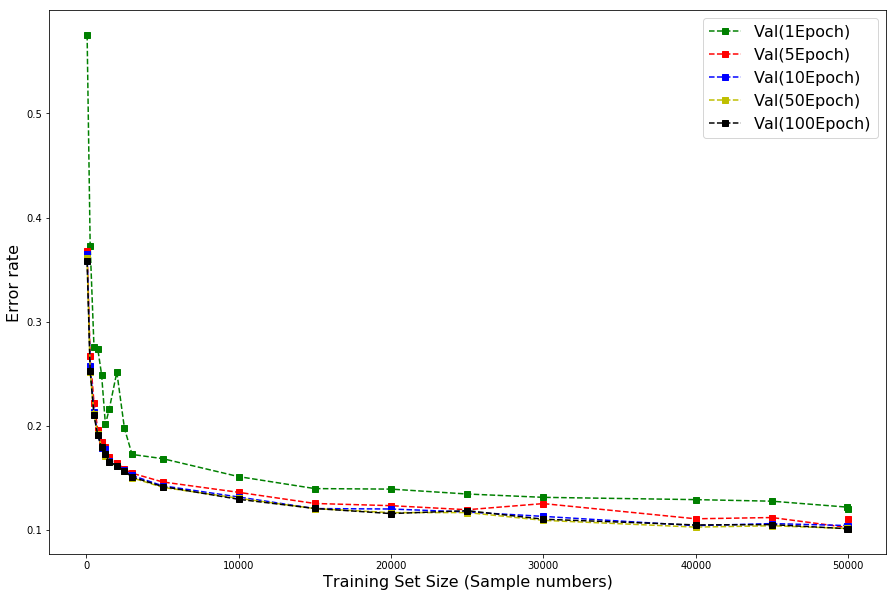

In [30]:
#Drawing learning curve
plt.figure(figsize = (15,10))
#plt.plot(Train_size_list_1ep, Train_error_list_1ep, 'go-', label = "Train(1Epoch)")
plt.plot(Train_size_list_1ep, Val_error_list_1ep, 'gs--', label = "Val(1Epoch)")
#plt.plot(Train_size_list_5ep, Train_error_list_5ep, 'ro-', label = "Train(5Epoch)")
plt.plot(Train_size_list_5ep, Val_error_list_5ep, 'rs--', label = "Val(5Epoch)")
#plt.plot(Train_size_list_10ep, Train_error_list_10ep, 'bo-', label = "Train(10Epoch)")
plt.plot(Train_size_list_10ep, Val_error_list_10ep, 'bs--', label = "Val(10Epoch)")
#plt.plot(Train_size_list_50ep, Train_error_list_50ep, 'yo-', label = "Train(50Epoch)")
plt.plot(Train_size_list_50ep, Val_error_list_50ep, 'ys--', label = "Val(50Epoch)")
#plt.plot(Train_size_list_100ep, Train_error_list_100ep, 'ko-', label = "Train(100Epoch)")
plt.plot(Train_size_list_100ep, Val_error_list_100ep, 'ks--', label = "Val(100Epoch)") 

plt.xlabel('Training Set Size (Sample numbers)',fontsize=16)
plt.ylabel('Error rate',fontsize=16)
plt.legend(loc="upper right", fontsize=16)
#plt.xlim(0,10000)

In [31]:
#Drawing learning curve
plt.figure(figsize = (15,10))
plt.plot(Train_size_list_1ep, Train_error_list_1ep, 'go-', label = "Train(1Epoch)")
#plt.plot(Train_size_list_1ep, Val_error_list_1ep, 'gs--', label = "Val(1Epoch)")
plt.plot(Train_size_list_5ep, Train_error_list_5ep, 'ro-', label = "Train(5Epoch)")
#plt.plot(Train_size_list_5ep, Val_error_list_5ep, 'rs--', label = "Val(5Epoch)")
plt.plot(Train_size_list_10ep, Train_error_list_10ep, 'bo-', label = "Train(10Epoch)")
#plt.plot(Train_size_list_10ep, Val_error_list_10ep, 'bs--', label = "Val(10Epoch)")
plt.plot(Train_size_list_50ep, Train_error_list_50ep, 'yo-', label = "Train(50Epoch)")
#plt.plot(Train_size_list_50ep, Val_error_list_50ep, 'ys--', label = "Val(50Epoch)")
plt.plot(Train_size_list_100ep, Train_error_list_100ep, 'ko-', label = "Train(100Epoch)")
#plt.plot(Train_size_list_100ep, Val_error_list_100ep, 'ks--', label = "Val(100Epoch)") 

plt.xlabel('Training Set Size (Sample numbers)',fontsize=16)
plt.ylabel('Error rate',fontsize=16)
plt.legend(loc="upper right", fontsize=16)
#plt.xlim(0,10000)

(0, 10000)

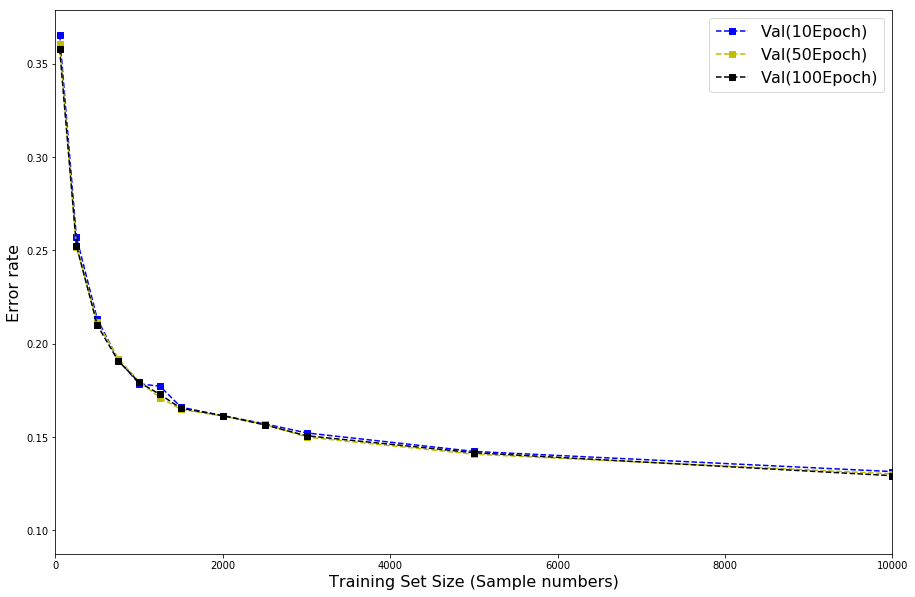

In [40]:
#Drawing learning curve
plt.figure(figsize = (15,10))
#plt.plot(Train_size_list_1ep, Train_error_list_1ep, 'go-', label = "Train(1Epoch)")
#plt.plot(Train_size_list_1ep, Val_error_list_1ep, 'gs--', label = "Val(1Epoch)")
#plt.plot(Train_size_list_5ep, Train_error_list_5ep, 'ro-', label = "Train(5Epoch)")
#plt.plot(Train_size_list_5ep, Val_error_list_5ep, 'rs--', label = "Val(5Epoch)")
#plt.plot(Train_size_list_10ep, Train_error_list_10ep, 'bo-', label = "Train(10Epoch)")
plt.plot(Train_size_list_10ep, Val_error_list_10ep, 'bs--', label = "Val(10Epoch)")
#plt.plot(Train_size_list_50ep, Train_error_list_50ep, 'yo-', label = "Train(50Epoch)")
plt.plot(Train_size_list_50ep, Val_error_list_50ep, 'ys--', label = "Val(50Epoch)")
#plt.plot(Train_size_list_100ep, Train_error_list_100ep, 'ko-', label = "Train(100Epoch)")
plt.plot(Train_size_list_100ep, Val_error_list_100ep, 'ks--', label = "Val(100Epoch)") 

plt.xlabel('Training Set Size (Sample numbers)',fontsize=16)
plt.ylabel('Error rate',fontsize=16)
plt.legend(loc="upper right", fontsize=16)
plt.xlim(0,10000)

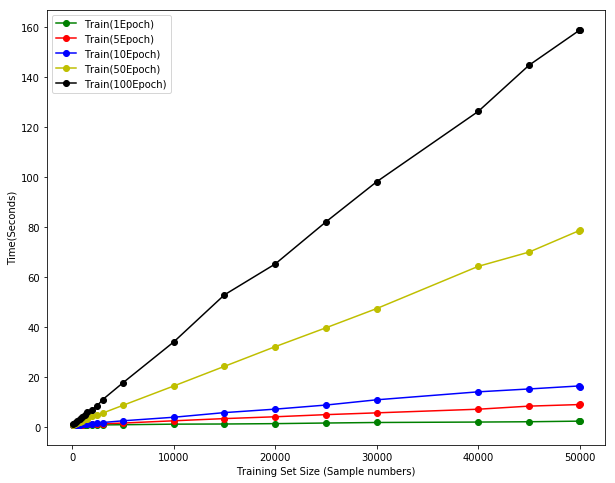

In [37]:
#Drawing train/val time v.s. training set

plt.figure(figsize = (10,8))
plt.plot(Train_size_list_1ep, Train_time_list_1ep, 'go-', label = "Train(1Epoch)")
#plt.plot(Train_size_list_1ep, Val_time_list_1ep, 'gs--', label = "Val(1Epoch)")
plt.plot(Train_size_list_5ep, Train_time_list_5ep, 'ro-', label = "Train(5Epoch)")
#plt.plot(Train_size_list_5ep, Val_time_list_5ep, 'rs--', label = "Val(5Epoch)")
plt.plot(Train_size_list_10ep, Train_time_list_10ep, 'bo-', label = "Train(10Epoch)")
#plt.plot(Train_size_list_10ep, Val_time_list_10ep, 'bs--', label = "Val(10Epoch)")
plt.plot(Train_size_list_50ep, Train_time_list_50ep, 'yo-', label = "Train(50Epoch)")
#plt.plot(Train_size_list_50ep, Val_time_list_50ep, 'ys--', label = "Val(50Epoch)")
plt.plot(Train_size_list_100ep, Train_time_list_100ep, 'ko-', label = "Train(100Epoch)")
#plt.plot(Train_size_list_100ep, Val_time_list_100ep, 'ks--', label = "Val(100Epoch)")

plt.xlabel('Training Set Size (Sample numbers)')
plt.ylabel('Time(Seconds)')
plt.legend(loc="upper left", fontsize=10)

Hyperparameters and activation functions

In [ ]:
#This block of code remained mostly unchanged excpet that i carried over the batch size and # of steps found
#in the previous blocks of code. 

In [41]:
Nron_size_list_RELU = []
Train_error_list_RELU = []
Val_error_list_RELU = []
Train_time_list_RELU = []
Val_time_list_RELU = []

from sklearn.model_selection import train_test_split

for j in [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000,3000,5000,8000,10000]:

    Nron_size_list_RELU.append(j)
    print('Neuron_set_size:', j)
    
    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train_scaled, y_train, test_size = 0, random_state = 42)
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf_nron = tf.contrib.learn.DNNClassifier(hidden_units=[j], n_classes=10, feature_columns=feature_columns, config=config)
    dnn_1_clf_nron = tf.contrib.learn.SKCompat(dnn_1_clf_nron) # if TensorFlow >= 1.1
    #dnn_1_clf.fit(X_train_partial, y_train_partial, batch_size=50, max_steps=40000)
    
    start=datetime.now()
    dnn_1_clf_nron.fit(X_train_scaled_partial, y_train_partial, batch_size=120, steps=((1-0)*1100*10) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf_nron training time', Train_elapse)
    Train_time_list_RELU.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf_nron.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    
    #print(dnn_1_clf.score(X_train_partial))##doesn't work. it has no score method

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf_nron.predict(X_val_scaled)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    #print('dnn_1_clf val time', Val_elapse)
    Val_time_list_RELU.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
    #Val_error = 1 - cross_val_score(dnn_1_clf, X_train_partial, y_train_partial, n_jobs = 3, cv=3, scoring="accuracy").mean()  
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_RELU.append(Train_error)
    Val_error_list_RELU.append(Val_error)
    
print("Nron_size_list_RELU: ", Nron_size_list_RELU)
print("Train_error_list_RELU: ", Train_error_list_RELU)
print("Val_error_list_RELU: ", Val_error_list_RELU)
print("Train_time_list_RELU: ", Train_time_list_RELU)
print("Val_time_list_RELU: ", Val_time_list_RELU)  

Neuron_set_size: 10
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC55E278>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmp4pl0trbf'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I

INFO:tensorflow:global_step/sec: 756.88
INFO:tensorflow:loss = 0.20189042, step = 5100 (0.132 sec)
INFO:tensorflow:global_step/sec: 768.531
INFO:tensorflow:loss = 0.36722818, step = 5200 (0.130 sec)
INFO:tensorflow:global_step/sec: 768.534
INFO:tensorflow:loss = 0.325744, step = 5300 (0.131 sec)
INFO:tensorflow:global_step/sec: 713.639
INFO:tensorflow:loss = 0.43026933, step = 5400 (0.139 sec)
INFO:tensorflow:global_step/sec: 768.534
INFO:tensorflow:loss = 0.35913178, step = 5500 (0.131 sec)
INFO:tensorflow:global_step/sec: 768.527
INFO:tensorflow:loss = 0.24600865, step = 5600 (0.129 sec)
INFO:tensorflow:global_step/sec: 756.886
INFO:tensorflow:loss = 0.27701452, step = 5700 (0.132 sec)
INFO:tensorflow:global_step/sec: 768.534
INFO:tensorflow:loss = 0.31705275, step = 5800 (0.130 sec)
INFO:tensorflow:global_step/sec: 762.665
INFO:tensorflow:loss = 0.3645911, step = 5900 (0.131 sec)
INFO:tensorflow:global_step/sec: 762.663
INFO:tensorflow:loss = 0.25862733, step = 6000 (0.132 sec)
INFO

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp4pl0trbf\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.11029999999999995 / 0.14239999999999997
Neuron_set_size: 50
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECDDD2240>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_prot

INFO:tensorflow:loss = 0.24270307, step = 2600 (0.128 sec)
INFO:tensorflow:global_step/sec: 774.488
INFO:tensorflow:loss = 0.18813096, step = 2700 (0.129 sec)
INFO:tensorflow:global_step/sec: 792.931
INFO:tensorflow:loss = 0.25985488, step = 2800 (0.126 sec)
INFO:tensorflow:global_step/sec: 792.928
INFO:tensorflow:loss = 0.22542056, step = 2900 (0.126 sec)
INFO:tensorflow:global_step/sec: 799.277
INFO:tensorflow:loss = 0.21453701, step = 3000 (0.125 sec)
INFO:tensorflow:global_step/sec: 812.27
INFO:tensorflow:loss = 0.19475429, step = 3100 (0.123 sec)
INFO:tensorflow:global_step/sec: 818.918
INFO:tensorflow:loss = 0.19271363, step = 3200 (0.122 sec)
INFO:tensorflow:global_step/sec: 812.273
INFO:tensorflow:loss = 0.33029547, step = 3300 (0.124 sec)
INFO:tensorflow:global_step/sec: 818.92
INFO:tensorflow:loss = 0.18160388, step = 3400 (0.121 sec)
INFO:tensorflow:global_step/sec: 786.689
INFO:tensorflow:loss = 0.22251317, step = 3500 (0.127 sec)
INFO:tensorflow:global_step/sec: 805.718
IN

INFO:tensorflow:global_step/sec: 786.689
INFO:tensorflow:loss = 0.07852602, step = 10900 (0.128 sec)
INFO:tensorflow:Saving checkpoints for 11000 into C:\Users\cstra\AppData\Local\Temp\tmpuhmggank\model.ckpt.
INFO:tensorflow:Loss for final step: 0.11768048.
dnn_1_clf_nron training time 15.026663
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpuhmggank\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpuhmggank\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.05015999999999998 / 0.11860000000000004
Neuron_set_size: 100
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC60D2E8>, '_

INFO:tensorflow:global_step/sec: 774.487
INFO:tensorflow:loss = 0.61620647, step = 200 (0.128 sec)
INFO:tensorflow:global_step/sec: 751.199
INFO:tensorflow:loss = 0.2868312, step = 300 (0.134 sec)
INFO:tensorflow:global_step/sec: 756.886
INFO:tensorflow:loss = 0.48239785, step = 400 (0.131 sec)
INFO:tensorflow:global_step/sec: 756.888
INFO:tensorflow:loss = 0.26071322, step = 500 (0.132 sec)
INFO:tensorflow:global_step/sec: 762.662
INFO:tensorflow:loss = 0.22377719, step = 600 (0.131 sec)
INFO:tensorflow:global_step/sec: 768.534
INFO:tensorflow:loss = 0.44821197, step = 700 (0.131 sec)
INFO:tensorflow:global_step/sec: 768.525
INFO:tensorflow:loss = 0.24982396, step = 800 (0.130 sec)
INFO:tensorflow:global_step/sec: 762.671
INFO:tensorflow:loss = 0.27917868, step = 900 (0.131 sec)
INFO:tensorflow:global_step/sec: 762.662
INFO:tensorflow:loss = 0.37757787, step = 1000 (0.130 sec)
INFO:tensorflow:global_step/sec: 768.53
INFO:tensorflow:loss = 0.27418402, step = 1100 (0.130 sec)
INFO:tenso

INFO:tensorflow:loss = 0.16277382, step = 8400 (0.134 sec)
INFO:tensorflow:global_step/sec: 756.887
INFO:tensorflow:loss = 0.14876804, step = 8500 (0.132 sec)
INFO:tensorflow:global_step/sec: 768.528
INFO:tensorflow:loss = 0.15328884, step = 8600 (0.131 sec)
INFO:tensorflow:global_step/sec: 729.267
INFO:tensorflow:loss = 0.09308982, step = 8700 (0.137 sec)
INFO:tensorflow:global_step/sec: 774.484
INFO:tensorflow:loss = 0.24362348, step = 8800 (0.128 sec)
INFO:tensorflow:global_step/sec: 786.685
INFO:tensorflow:loss = 0.06350163, step = 8900 (0.127 sec)
INFO:tensorflow:global_step/sec: 786.692
INFO:tensorflow:loss = 0.08734005, step = 9000 (0.128 sec)
INFO:tensorflow:global_step/sec: 786.685
INFO:tensorflow:loss = 0.15583935, step = 9100 (0.127 sec)
INFO:tensorflow:global_step/sec: 786.686
INFO:tensorflow:loss = 0.08750422, step = 9200 (0.127 sec)
INFO:tensorflow:global_step/sec: 774.486
INFO:tensorflow:loss = 0.17373867, step = 9300 (0.128 sec)
INFO:tensorflow:global_step/sec: 751.195


INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpkx9lng6h\model.ckpt.
INFO:tensorflow:loss = 2.9721515, step = 0
INFO:tensorflow:global_step/sec: 684.313
INFO:tensorflow:loss = 0.4921693, step = 100 (0.146 sec)
INFO:tensorflow:global_step/sec: 792.924
INFO:tensorflow:loss = 0.59744716, step = 200 (0.126 sec)
INFO:tensorflow:global_step/sec: 792.93
INFO:tensorflow:loss = 0.35245603, step = 300 (0.126 sec)
INFO:tensorflow:global_step/sec: 799.271
INFO:tensorflow:loss = 0.5050992, step = 400 (0.126 sec)
INFO:tensorflow:global_step/sec: 780.543
INFO:tensorflow:loss = 0.26528862, step = 500 (0.127 sec)
INFO:tensorflow:global_step/sec: 792.928
INFO:tensorflow:loss = 0.21463442, step = 600 (0.126 sec)
INFO:tensorflow:global_step/sec: 792.933
INFO:tensorflow:loss = 0.44746032, step = 700 (0.126 sec)

INFO:tensorflow:global_step/sec: 774.486
INFO:tensorflow:loss = 0.14765611, step = 6000 (0.129 sec)
INFO:tensorflow:global_step/sec: 805.723
INFO:tensorflow:loss = 0.2185186, step = 6100 (0.125 sec)
INFO:tensorflow:global_step/sec: 799.271
INFO:tensorflow:loss = 0.10003387, step = 6200 (0.124 sec)
INFO:tensorflow:global_step/sec: 768.528
INFO:tensorflow:loss = 0.15118448, step = 6300 (0.130 sec)
INFO:tensorflow:global_step/sec: 805.725
INFO:tensorflow:loss = 0.097448, step = 6400 (0.124 sec)
INFO:tensorflow:global_step/sec: 792.925
INFO:tensorflow:loss = 0.15685253, step = 6500 (0.126 sec)
INFO:tensorflow:global_step/sec: 812.266
INFO:tensorflow:loss = 0.16385469, step = 6600 (0.124 sec)
INFO:tensorflow:global_step/sec: 786.688
INFO:tensorflow:loss = 0.13497911, step = 6700 (0.126 sec)
INFO:tensorflow:global_step/sec: 780.542
INFO:tensorflow:loss = 0.12323358, step = 6800 (0.129 sec)
INFO:tensorflow:global_step/sec: 786.689
INFO:tensorflow:loss = 0.112130135, step = 6900 (0.127 sec)
IN

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpkx9lng6h\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.022560000000000024 / 0.10850000000000004
Neuron_set_size: 200
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC5FA710>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_che

INFO:tensorflow:global_step/sec: 774.487
INFO:tensorflow:loss = 0.20505175, step = 4300 (0.129 sec)
INFO:tensorflow:global_step/sec: 780.542
INFO:tensorflow:loss = 0.19083859, step = 4400 (0.128 sec)
INFO:tensorflow:global_step/sec: 774.483
INFO:tensorflow:loss = 0.20126809, step = 4500 (0.129 sec)
INFO:tensorflow:global_step/sec: 774.487
INFO:tensorflow:loss = 0.13029394, step = 4600 (0.128 sec)
INFO:tensorflow:global_step/sec: 780.542
INFO:tensorflow:loss = 0.24268661, step = 4700 (0.129 sec)
INFO:tensorflow:global_step/sec: 774.487
INFO:tensorflow:loss = 0.16739799, step = 4800 (0.128 sec)
INFO:tensorflow:global_step/sec: 751.198
INFO:tensorflow:loss = 0.32897183, step = 4900 (0.133 sec)
INFO:tensorflow:global_step/sec: 768.531
INFO:tensorflow:loss = 0.14434156, step = 5000 (0.130 sec)
INFO:tensorflow:global_step/sec: 786.692
INFO:tensorflow:loss = 0.068984546, step = 5100 (0.128 sec)
INFO:tensorflow:global_step/sec: 780.535
INFO:tensorflow:loss = 0.18756033, step = 5200 (0.127 sec)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpthv8kvbk\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpthv8kvbk\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.01873999999999998 / 0.11040000000000005
Neuron_set_size: 250
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001907F9B09B0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_

INFO:tensorflow:global_step/sec: 774.488
INFO:tensorflow:loss = 0.19853531, step = 2000 (0.129 sec)
INFO:tensorflow:global_step/sec: 768.537
INFO:tensorflow:loss = 0.15062824, step = 2100 (0.131 sec)
INFO:tensorflow:global_step/sec: 768.525
INFO:tensorflow:loss = 0.23155485, step = 2200 (0.130 sec)
INFO:tensorflow:global_step/sec: 768.534
INFO:tensorflow:loss = 0.20801274, step = 2300 (0.129 sec)
INFO:tensorflow:global_step/sec: 756.887
INFO:tensorflow:loss = 0.24824078, step = 2400 (0.132 sec)
INFO:tensorflow:global_step/sec: 762.666
INFO:tensorflow:loss = 0.20530424, step = 2500 (0.131 sec)
INFO:tensorflow:global_step/sec: 768.528
INFO:tensorflow:loss = 0.20794338, step = 2600 (0.130 sec)
INFO:tensorflow:global_step/sec: 762.669
INFO:tensorflow:loss = 0.1679302, step = 2700 (0.131 sec)
INFO:tensorflow:global_step/sec: 774.487
INFO:tensorflow:loss = 0.23914811, step = 2800 (0.129 sec)
INFO:tensorflow:global_step/sec: 762.662
INFO:tensorflow:loss = 0.18214391, step = 2900 (0.131 sec)
I

INFO:tensorflow:global_step/sec: 774.484
INFO:tensorflow:loss = 0.06319041, step = 10200 (0.129 sec)
INFO:tensorflow:global_step/sec: 624.433
INFO:tensorflow:loss = 0.04326024, step = 10300 (0.161 sec)
INFO:tensorflow:global_step/sec: 561.284
INFO:tensorflow:loss = 0.11075436, step = 10400 (0.177 sec)
INFO:tensorflow:global_step/sec: 751.2
INFO:tensorflow:loss = 0.10978011, step = 10500 (0.133 sec)
INFO:tensorflow:global_step/sec: 666.062
INFO:tensorflow:loss = 0.04117546, step = 10600 (0.150 sec)
INFO:tensorflow:global_step/sec: 558.15
INFO:tensorflow:loss = 0.026456755, step = 10700 (0.180 sec)
INFO:tensorflow:global_step/sec: 774.488
INFO:tensorflow:loss = 0.06725881, step = 10800 (0.129 sec)
INFO:tensorflow:global_step/sec: 768.53
INFO:tensorflow:loss = 0.025608707, step = 10900 (0.130 sec)
INFO:tensorflow:Saving checkpoints for 11000 into C:\Users\cstra\AppData\Local\Temp\tmpla8axn9g\model.ckpt.
INFO:tensorflow:Loss for final step: 0.047899622.
dnn_1_clf_nron training time 15.6572

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp127ac1e4\model.ckpt.
INFO:tensorflow:loss = 3.1038344, step = 0
INFO:tensorflow:global_step/sec: 657.298
INFO:tensorflow:loss = 0.4773603, step = 100 (0.154 sec)
INFO:tensorflow:global_step/sec: 745.589
INFO:tensorflow:loss = 0.60098714, step = 200 (0.133 sec)
INFO:tensorflow:global_step/sec: 751.199
INFO:tensorflow:loss = 0.3034439, step = 300 (0.134 sec)
INFO:tensorflow:global_step/sec: 751.195
INFO:tensorflow:loss = 0.4793101, step = 400 (0.132 sec)
INFO:tensorflow:global_step/sec: 745.589
INFO:tensorflow:loss = 0.26942354, step = 500 (0.135 sec)
INFO:tensorflow:global_step/sec: 740.068
INFO:tensorflow:loss = 0.21041961, step = 600 (0.135 sec)
INFO:tensorflow:global_step/sec: 751.195
INFO:tensorflow:loss = 0.40381166, step = 700 (0.132 sec)

INFO:tensorflow:loss = 0.03917252, step = 8000 (0.135 sec)
INFO:tensorflow:global_step/sec: 756.887
INFO:tensorflow:loss = 0.07897138, step = 8100 (0.131 sec)
INFO:tensorflow:global_step/sec: 762.666
INFO:tensorflow:loss = 0.077935316, step = 8200 (0.131 sec)
INFO:tensorflow:global_step/sec: 774.487
INFO:tensorflow:loss = 0.05754457, step = 8300 (0.129 sec)
INFO:tensorflow:global_step/sec: 756.89
INFO:tensorflow:loss = 0.10979619, step = 8400 (0.132 sec)
INFO:tensorflow:global_step/sec: 740.065
INFO:tensorflow:loss = 0.08664067, step = 8500 (0.135 sec)
INFO:tensorflow:global_step/sec: 756.887
INFO:tensorflow:loss = 0.07807953, step = 8600 (0.133 sec)
INFO:tensorflow:global_step/sec: 751.198
INFO:tensorflow:loss = 0.07951662, step = 8700 (0.132 sec)
INFO:tensorflow:global_step/sec: 762.663
INFO:tensorflow:loss = 0.15004191, step = 8800 (0.131 sec)
INFO:tensorflow:global_step/sec: 768.532
INFO:tensorflow:loss = 0.035108846, step = 8900 (0.131 sec)
INFO:tensorflow:global_step/sec: 768.532

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpxjs9id89\model.ckpt.
INFO:tensorflow:loss = 2.5849164, step = 0
INFO:tensorflow:global_step/sec: 661.649
INFO:tensorflow:loss = 0.49352366, step = 100 (0.152 sec)
INFO:tensorflow:global_step/sec: 762.67
INFO:tensorflow:loss = 0.5862477, step = 200 (0.130 sec)
INFO:tensorflow:global_step/sec: 751.189
INFO:tensorflow:loss = 0.30205065, step = 300 (0.134 sec)
INFO:tensorflow:global_step/sec: 756.888
INFO:tensorflow:loss = 0.50011545, step = 400 (0.132 sec)
INFO:tensorflow:global_step/sec: 745.593
INFO:tensorflow:loss = 0.30450186, step = 500 (0.133 sec)
INFO:tensorflow:global_step/sec: 756.884
INFO:tensorflow:loss = 0.212778, step = 600 (0.133 sec)
INFO:tensorflow:global_step/sec: 740.065
INFO:tensorflow:loss = 0.43847457, step = 700 (0.134 sec)


INFO:tensorflow:global_step/sec: 756.884
INFO:tensorflow:loss = 0.12370095, step = 6000 (0.132 sec)
INFO:tensorflow:global_step/sec: 762.666
INFO:tensorflow:loss = 0.17143682, step = 6100 (0.131 sec)
INFO:tensorflow:global_step/sec: 740.069
INFO:tensorflow:loss = 0.07106682, step = 6200 (0.135 sec)
INFO:tensorflow:global_step/sec: 740.065
INFO:tensorflow:loss = 0.14623731, step = 6300 (0.135 sec)
INFO:tensorflow:global_step/sec: 723.983
INFO:tensorflow:loss = 0.062171414, step = 6400 (0.138 sec)
INFO:tensorflow:global_step/sec: 713.633
INFO:tensorflow:loss = 0.15283655, step = 6500 (0.140 sec)
INFO:tensorflow:global_step/sec: 740.07
INFO:tensorflow:loss = 0.12735444, step = 6600 (0.136 sec)
INFO:tensorflow:global_step/sec: 751.196
INFO:tensorflow:loss = 0.10143474, step = 6700 (0.133 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.068041496, step = 6800 (0.140 sec)
INFO:tensorflow:global_step/sec: 548.951
INFO:tensorflow:loss = 0.085051335, step = 6900 (0.182 sec

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpxjs9id89\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.01093999999999995 / 0.10619999999999996
Neuron_set_size: 400
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC66F6D8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_chec

INFO:tensorflow:global_step/sec: 756.884
INFO:tensorflow:loss = 0.18251969, step = 4300 (0.133 sec)
INFO:tensorflow:global_step/sec: 756.888
INFO:tensorflow:loss = 0.17130466, step = 4400 (0.131 sec)
INFO:tensorflow:global_step/sec: 768.532
INFO:tensorflow:loss = 0.20843223, step = 4500 (0.131 sec)
INFO:tensorflow:global_step/sec: 756.89
INFO:tensorflow:loss = 0.099187054, step = 4600 (0.131 sec)
INFO:tensorflow:global_step/sec: 745.588
INFO:tensorflow:loss = 0.2060427, step = 4700 (0.134 sec)
INFO:tensorflow:global_step/sec: 745.59
INFO:tensorflow:loss = 0.13517891, step = 4800 (0.134 sec)
INFO:tensorflow:global_step/sec: 751.194
INFO:tensorflow:loss = 0.27483958, step = 4900 (0.134 sec)
INFO:tensorflow:global_step/sec: 740.069
INFO:tensorflow:loss = 0.14252068, step = 5000 (0.134 sec)
INFO:tensorflow:global_step/sec: 751.195
INFO:tensorflow:loss = 0.06367821, step = 5100 (0.133 sec)
INFO:tensorflow:global_step/sec: 774.49
INFO:tensorflow:loss = 0.15257384, step = 5200 (0.130 sec)
INF

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpyjcg64mp\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpyjcg64mp\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.01085999999999998 / 0.1079
Neuron_set_size: 450
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED5A33748>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fracti

INFO:tensorflow:loss = 0.19106555, step = 2000 (0.135 sec)
INFO:tensorflow:global_step/sec: 734.626
INFO:tensorflow:loss = 0.14234708, step = 2100 (0.135 sec)
INFO:tensorflow:global_step/sec: 745.593
INFO:tensorflow:loss = 0.20084375, step = 2200 (0.134 sec)
INFO:tensorflow:global_step/sec: 751.192
INFO:tensorflow:loss = 0.21175566, step = 2300 (0.133 sec)
INFO:tensorflow:global_step/sec: 745.59
INFO:tensorflow:loss = 0.25155768, step = 2400 (0.134 sec)
INFO:tensorflow:global_step/sec: 745.592
INFO:tensorflow:loss = 0.20021439, step = 2500 (0.134 sec)
INFO:tensorflow:global_step/sec: 751.198
INFO:tensorflow:loss = 0.17922164, step = 2600 (0.133 sec)
INFO:tensorflow:global_step/sec: 756.89
INFO:tensorflow:loss = 0.16576199, step = 2700 (0.133 sec)
INFO:tensorflow:global_step/sec: 740.061
INFO:tensorflow:loss = 0.22366896, step = 2800 (0.134 sec)
INFO:tensorflow:global_step/sec: 762.666
INFO:tensorflow:loss = 0.15044908, step = 2900 (0.131 sec)
INFO:tensorflow:global_step/sec: 718.774
IN

INFO:tensorflow:loss = 0.06427285, step = 10200 (0.135 sec)
INFO:tensorflow:global_step/sec: 740.068
INFO:tensorflow:loss = 0.03413733, step = 10300 (0.135 sec)
INFO:tensorflow:global_step/sec: 756.884
INFO:tensorflow:loss = 0.10396283, step = 10400 (0.132 sec)
INFO:tensorflow:global_step/sec: 740.069
INFO:tensorflow:loss = 0.07394028, step = 10500 (0.135 sec)
INFO:tensorflow:global_step/sec: 745.59
INFO:tensorflow:loss = 0.034344085, step = 10600 (0.134 sec)
INFO:tensorflow:global_step/sec: 734.624
INFO:tensorflow:loss = 0.022912022, step = 10700 (0.136 sec)
INFO:tensorflow:global_step/sec: 745.59
INFO:tensorflow:loss = 0.058227677, step = 10800 (0.134 sec)
INFO:tensorflow:global_step/sec: 745.596
INFO:tensorflow:loss = 0.03543462, step = 10900 (0.134 sec)
INFO:tensorflow:Saving checkpoints for 11000 into C:\Users\cstra\AppData\Local\Temp\tmpn12mj2a2\model.ckpt.
INFO:tensorflow:Loss for final step: 0.031433098.
dnn_1_clf_nron training time 15.623205
INFO:tensorflow:Graph was finalized

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpu8lx23of\model.ckpt.
INFO:tensorflow:loss = 2.7802796, step = 0
INFO:tensorflow:global_step/sec: 644.574
INFO:tensorflow:loss = 0.4863927, step = 100 (0.155 sec)
INFO:tensorflow:global_step/sec: 740.066
INFO:tensorflow:loss = 0.598129, step = 200 (0.136 sec)
INFO:tensorflow:global_step/sec: 729.262
INFO:tensorflow:loss = 0.32173264, step = 300 (0.137 sec)
INFO:tensorflow:global_step/sec: 745.593
INFO:tensorflow:loss = 0.49676457, step = 400 (0.134 sec)
INFO:tensorflow:global_step/sec: 734.625
INFO:tensorflow:loss = 0.26529703, step = 500 (0.136 sec)
INFO:tensorflow:global_step/sec: 745.59
INFO:tensorflow:loss = 0.21619505, step = 600 (0.134 sec)
INFO:tensorflow:global_step/sec: 740.069
INFO:tensorflow:loss = 0.4382424, step = 700 (0.134 sec)
INFO:tensorflow:global_step/sec: 740.066
INFO

INFO:tensorflow:loss = 0.023816118, step = 8000 (0.137 sec)
INFO:tensorflow:global_step/sec: 734.622
INFO:tensorflow:loss = 0.07107802, step = 8100 (0.136 sec)
INFO:tensorflow:global_step/sec: 734.63
INFO:tensorflow:loss = 0.07240773, step = 8200 (0.136 sec)
INFO:tensorflow:global_step/sec: 729.259
INFO:tensorflow:loss = 0.038613915, step = 8300 (0.137 sec)
INFO:tensorflow:global_step/sec: 718.775
INFO:tensorflow:loss = 0.0799249, step = 8400 (0.139 sec)
INFO:tensorflow:global_step/sec: 740.066
INFO:tensorflow:loss = 0.07029745, step = 8500 (0.135 sec)
INFO:tensorflow:global_step/sec: 740.062
INFO:tensorflow:loss = 0.081560105, step = 8600 (0.136 sec)
INFO:tensorflow:global_step/sec: 740.068
INFO:tensorflow:loss = 0.041492138, step = 8700 (0.135 sec)
INFO:tensorflow:global_step/sec: 745.593
INFO:tensorflow:loss = 0.09488454, step = 8800 (0.133 sec)
INFO:tensorflow:global_step/sec: 762.665
INFO:tensorflow:loss = 0.034863863, step = 8900 (0.131 sec)
INFO:tensorflow:global_step/sec: 762.6

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp6f5rvkmb\model.ckpt.
INFO:tensorflow:loss = 2.5887527, step = 0
INFO:tensorflow:global_step/sec: 657.295
INFO:tensorflow:loss = 0.48843578, step = 100 (0.152 sec)
INFO:tensorflow:global_step/sec: 751.198
INFO:tensorflow:loss = 0.58491033, step = 200 (0.133 sec)
INFO:tensorflow:global_step/sec: 756.886
INFO:tensorflow:loss = 0.30941537, step = 300 (0.133 sec)
INFO:tensorflow:global_step/sec: 740.069
INFO:tensorflow:loss = 0.49064884, step = 400 (0.134 sec)
INFO:tensorflow:global_step/sec: 734.626
INFO:tensorflow:loss = 0.27512652, step = 500 (0.136 sec)
INFO:tensorflow:global_step/sec: 756.884
INFO:tensorflow:loss = 0.22217979, step = 600 (0.133 sec)
INFO:tensorflow:global_step/sec: 745.589
INFO:tensorflow:loss = 0.44078392, step = 700 (0.134 s

INFO:tensorflow:global_step/sec: 558.155
INFO:tensorflow:loss = 0.11023217, step = 6000 (0.180 sec)
INFO:tensorflow:global_step/sec: 703.577
INFO:tensorflow:loss = 0.15429898, step = 6100 (0.141 sec)
INFO:tensorflow:global_step/sec: 525.839
INFO:tensorflow:loss = 0.062473096, step = 6200 (0.190 sec)
INFO:tensorflow:global_step/sec: 740.07
INFO:tensorflow:loss = 0.1330412, step = 6300 (0.135 sec)
INFO:tensorflow:global_step/sec: 723.98
INFO:tensorflow:loss = 0.06932474, step = 6400 (0.138 sec)
INFO:tensorflow:global_step/sec: 734.627
INFO:tensorflow:loss = 0.1204943, step = 6500 (0.137 sec)
INFO:tensorflow:global_step/sec: 542.982
INFO:tensorflow:loss = 0.10734526, step = 6600 (0.184 sec)
INFO:tensorflow:global_step/sec: 675.061
INFO:tensorflow:loss = 0.10828969, step = 6700 (0.147 sec)
INFO:tensorflow:global_step/sec: 740.07
INFO:tensorflow:loss = 0.07288887, step = 6800 (0.135 sec)
INFO:tensorflow:global_step/sec: 734.624
INFO:tensorflow:loss = 0.079446934, step = 6900 (0.137 sec)
INF

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp6f5rvkmb\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.007020000000000026 / 0.10309999999999997
Neuron_set_size: 600
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED59130F0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_che

INFO:tensorflow:global_step/sec: 567.665
INFO:tensorflow:loss = 0.18566383, step = 4300 (0.176 sec)
INFO:tensorflow:global_step/sec: 540.049
INFO:tensorflow:loss = 0.1424975, step = 4400 (0.186 sec)
INFO:tensorflow:global_step/sec: 567.667
INFO:tensorflow:loss = 0.17908865, step = 4500 (0.176 sec)
INFO:tensorflow:global_step/sec: 540.049
INFO:tensorflow:loss = 0.089835644, step = 4600 (0.184 sec)
INFO:tensorflow:global_step/sec: 507.151
INFO:tensorflow:loss = 0.18976822, step = 4700 (0.198 sec)
INFO:tensorflow:global_step/sec: 632.336
INFO:tensorflow:loss = 0.1190972, step = 4800 (0.158 sec)
INFO:tensorflow:global_step/sec: 551.987
INFO:tensorflow:loss = 0.2605803, step = 4900 (0.181 sec)
INFO:tensorflow:global_step/sec: 567.662
INFO:tensorflow:loss = 0.14008732, step = 5000 (0.176 sec)
INFO:tensorflow:global_step/sec: 567.667
INFO:tensorflow:loss = 0.048901163, step = 5100 (0.176 sec)
INFO:tensorflow:global_step/sec: 531.43
INFO:tensorflow:loss = 0.1495391, step = 5200 (0.187 sec)
INF

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpmlyqtyl7\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpmlyqtyl7\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.006099999999999994 / 0.10219999999999996
Neuron_set_size: 650
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECDE3A2B0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu

INFO:tensorflow:global_step/sec: 734.634
INFO:tensorflow:loss = 0.17710994, step = 2000 (0.136 sec)
INFO:tensorflow:global_step/sec: 718.765
INFO:tensorflow:loss = 0.15087566, step = 2100 (0.138 sec)
INFO:tensorflow:global_step/sec: 729.264
INFO:tensorflow:loss = 0.18238471, step = 2200 (0.138 sec)
INFO:tensorflow:global_step/sec: 729.263
INFO:tensorflow:loss = 0.1773812, step = 2300 (0.136 sec)
INFO:tensorflow:global_step/sec: 740.07
INFO:tensorflow:loss = 0.2378233, step = 2400 (0.135 sec)
INFO:tensorflow:global_step/sec: 729.262
INFO:tensorflow:loss = 0.19109479, step = 2500 (0.137 sec)
INFO:tensorflow:global_step/sec: 734.624
INFO:tensorflow:loss = 0.17091025, step = 2600 (0.136 sec)
INFO:tensorflow:global_step/sec: 729.265
INFO:tensorflow:loss = 0.14550096, step = 2700 (0.137 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.21775608, step = 2800 (0.140 sec)
INFO:tensorflow:global_step/sec: 729.264
INFO:tensorflow:loss = 0.16678365, step = 2900 (0.138 sec)
INF

INFO:tensorflow:global_step/sec: 718.771
INFO:tensorflow:loss = 0.05192255, step = 10200 (0.139 sec)
INFO:tensorflow:global_step/sec: 729.264
INFO:tensorflow:loss = 0.024220798, step = 10300 (0.137 sec)
INFO:tensorflow:global_step/sec: 745.589
INFO:tensorflow:loss = 0.064538084, step = 10400 (0.135 sec)
INFO:tensorflow:global_step/sec: 729.262
INFO:tensorflow:loss = 0.061906245, step = 10500 (0.136 sec)
INFO:tensorflow:global_step/sec: 745.592
INFO:tensorflow:loss = 0.024049733, step = 10600 (0.135 sec)
INFO:tensorflow:global_step/sec: 734.629
INFO:tensorflow:loss = 0.017145278, step = 10700 (0.135 sec)
INFO:tensorflow:global_step/sec: 734.621
INFO:tensorflow:loss = 0.0562502, step = 10800 (0.136 sec)
INFO:tensorflow:global_step/sec: 734.626
INFO:tensorflow:loss = 0.020188805, step = 10900 (0.136 sec)
INFO:tensorflow:Saving checkpoints for 11000 into C:\Users\cstra\AppData\Local\Temp\tmpssp8qk7o\model.ckpt.
INFO:tensorflow:Loss for final step: 0.016022813.
dnn_1_clf_nron training time 

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpw3ljdj1s\model.ckpt.
INFO:tensorflow:loss = 2.3696887, step = 0
INFO:tensorflow:global_step/sec: 632.339
INFO:tensorflow:loss = 0.48228315, step = 100 (0.159 sec)
INFO:tensorflow:global_step/sec: 713.633
INFO:tensorflow:loss = 0.5915004, step = 200 (0.141 sec)
INFO:tensorflow:global_step/sec: 723.98
INFO:tensorflow:loss = 0.31991294, step = 300 (0.138 sec)
INFO:tensorflow:global_step/sec: 734.624
INFO:tensorflow:loss = 0.4635245, step = 400 (0.136 sec)
INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.2762877, step = 500 (0.138 sec)
INFO:tensorflow:global_step/sec: 693.815
INFO:tensorflow:loss = 0.21858062, step = 600 (0.144 sec)
INFO:tensorflow:global_step/sec: 729.264
INFO:tensorflow:loss = 0.41485742, step = 700 (0.137 sec)
INFO:tensorflow:global_step/sec: 723.977
INFO

INFO:tensorflow:global_step/sec: 723.98
INFO:tensorflow:loss = 0.08222346, step = 8100 (0.138 sec)
INFO:tensorflow:global_step/sec: 723.981
INFO:tensorflow:loss = 0.059533413, step = 8200 (0.138 sec)
INFO:tensorflow:global_step/sec: 713.634
INFO:tensorflow:loss = 0.042525314, step = 8300 (0.140 sec)
INFO:tensorflow:global_step/sec: 713.64
INFO:tensorflow:loss = 0.10641835, step = 8400 (0.140 sec)
INFO:tensorflow:global_step/sec: 718.768
INFO:tensorflow:loss = 0.07361224, step = 8500 (0.140 sec)
INFO:tensorflow:global_step/sec: 693.811
INFO:tensorflow:loss = 0.06857618, step = 8600 (0.144 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.043471325, step = 8700 (0.140 sec)
INFO:tensorflow:global_step/sec: 684.314
INFO:tensorflow:loss = 0.101073585, step = 8800 (0.147 sec)
INFO:tensorflow:global_step/sec: 703.579
INFO:tensorflow:loss = 0.019779706, step = 8900 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.579
INFO:tensorflow:loss = 0.02890556, step = 9000 (0.141 se

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpxbh_k97b\model.ckpt.
INFO:tensorflow:loss = 2.6835506, step = 0
INFO:tensorflow:global_step/sec: 509.741
INFO:tensorflow:loss = 0.48331076, step = 100 (0.197 sec)
INFO:tensorflow:global_step/sec: 652.997
INFO:tensorflow:loss = 0.59477156, step = 200 (0.152 sec)
INFO:tensorflow:global_step/sec: 609.204
INFO:tensorflow:loss = 0.30600643, step = 300 (0.165 sec)
INFO:tensorflow:global_step/sec: 570.907
INFO:tensorflow:loss = 0.5230015, step = 400 (0.174 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.25720465, step = 500 (0.145 sec)
INFO:tensorflow:global_step/sec: 693.817
INFO:tensorflow:loss = 0.20879482, step = 600 (0.144 sec)
INFO:tensorflow:global_step/sec: 580.867
INFO:tensorflow:loss = 0.4417869, step = 700 (0.172 sec

INFO:tensorflow:global_step/sec: 679.656
INFO:tensorflow:loss = 0.105476476, step = 6000 (0.147 sec)
INFO:tensorflow:global_step/sec: 723.983
INFO:tensorflow:loss = 0.15426439, step = 6100 (0.138 sec)
INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.04875558, step = 6200 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.768
INFO:tensorflow:loss = 0.11884297, step = 6300 (0.139 sec)
INFO:tensorflow:global_step/sec: 723.978
INFO:tensorflow:loss = 0.06679719, step = 6400 (0.138 sec)
INFO:tensorflow:global_step/sec: 729.264
INFO:tensorflow:loss = 0.1060497, step = 6500 (0.137 sec)
INFO:tensorflow:global_step/sec: 620.552
INFO:tensorflow:loss = 0.087845005, step = 6600 (0.161 sec)
INFO:tensorflow:global_step/sec: 636.365
INFO:tensorflow:loss = 0.09987311, step = 6700 (0.157 sec)
INFO:tensorflow:global_step/sec: 666.059
INFO:tensorflow:loss = 0.04887168, step = 6800 (0.150 sec)
INFO:tensorflow:global_step/sec: 587.7
INFO:tensorflow:loss = 0.08913885, step = 6900 (0.170 sec)
IN

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpxbh_k97b\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.005240000000000022 / 0.0998
Neuron_set_size: 800
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001907F7D40F0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max':

INFO:tensorflow:global_step/sec: 616.723
INFO:tensorflow:loss = 0.15890786, step = 4300 (0.163 sec)
INFO:tensorflow:global_step/sec: 675.06
INFO:tensorflow:loss = 0.15884528, step = 4400 (0.147 sec)
INFO:tensorflow:global_step/sec: 718.771
INFO:tensorflow:loss = 0.19009358, step = 4500 (0.139 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.09532392, step = 4600 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.20876637, step = 4700 (0.144 sec)
INFO:tensorflow:global_step/sec: 661.649
INFO:tensorflow:loss = 0.123962894, step = 4800 (0.150 sec)
INFO:tensorflow:global_step/sec: 713.639
INFO:tensorflow:loss = 0.25853002, step = 4900 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.15254417, step = 5000 (0.140 sec)
INFO:tensorflow:global_step/sec: 693.815
INFO:tensorflow:loss = 0.05286003, step = 5100 (0.144 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.13034838, step = 5200 (0.141 sec)


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpv_ka2_bq\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpv_ka2_bq\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.005879999999999996 / 0.1049
Neuron_set_size: 850
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED573C080>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fract

INFO:tensorflow:loss = 0.1689438, step = 2000 (0.178 sec)
INFO:tensorflow:global_step/sec: 573.837
INFO:tensorflow:loss = 0.14525922, step = 2100 (0.173 sec)
INFO:tensorflow:global_step/sec: 591.178
INFO:tensorflow:loss = 0.16236608, step = 2200 (0.169 sec)
INFO:tensorflow:global_step/sec: 600.695
INFO:tensorflow:loss = 0.18675452, step = 2300 (0.167 sec)
INFO:tensorflow:global_step/sec: 616.719
INFO:tensorflow:loss = 0.21230869, step = 2400 (0.161 sec)
INFO:tensorflow:global_step/sec: 624.431
INFO:tensorflow:loss = 0.1950319, step = 2500 (0.162 sec)
INFO:tensorflow:global_step/sec: 520.361
INFO:tensorflow:loss = 0.16889475, step = 2600 (0.190 sec)
INFO:tensorflow:global_step/sec: 583.543
INFO:tensorflow:loss = 0.14516339, step = 2700 (0.171 sec)
INFO:tensorflow:global_step/sec: 584.268
INFO:tensorflow:loss = 0.21727063, step = 2800 (0.172 sec)
INFO:tensorflow:global_step/sec: 612.938
INFO:tensorflow:loss = 0.15667734, step = 2900 (0.162 sec)
INFO:tensorflow:global_step/sec: 612.942
IN

INFO:tensorflow:loss = 0.033877566, step = 10200 (0.160 sec)
INFO:tensorflow:global_step/sec: 570.909
INFO:tensorflow:loss = 0.023973756, step = 10300 (0.175 sec)
INFO:tensorflow:global_step/sec: 624.43
INFO:tensorflow:loss = 0.062740475, step = 10400 (0.159 sec)
INFO:tensorflow:global_step/sec: 612.942
INFO:tensorflow:loss = 0.046086214, step = 10500 (0.164 sec)
INFO:tensorflow:global_step/sec: 612.939
INFO:tensorflow:loss = 0.025881402, step = 10600 (0.162 sec)
INFO:tensorflow:global_step/sec: 471.267
INFO:tensorflow:loss = 0.015885077, step = 10700 (0.213 sec)
INFO:tensorflow:global_step/sec: 591.182
INFO:tensorflow:loss = 0.051753767, step = 10800 (0.169 sec)
INFO:tensorflow:global_step/sec: 537.142
INFO:tensorflow:loss = 0.011792658, step = 10900 (0.186 sec)
INFO:tensorflow:Saving checkpoints for 11000 into C:\Users\cstra\AppData\Local\Temp\tmpnlp4g94f\model.ckpt.
INFO:tensorflow:Loss for final step: 0.021289077.
dnn_1_clf_nron training time 20.115993
INFO:tensorflow:Graph was fin

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp99mboqj0\model.ckpt.
INFO:tensorflow:loss = 2.6227415, step = 0
INFO:tensorflow:global_step/sec: 531.432
INFO:tensorflow:loss = 0.44667196, step = 100 (0.189 sec)
INFO:tensorflow:global_step/sec: 613.538
INFO:tensorflow:loss = 0.6569887, step = 200 (0.164 sec)
INFO:tensorflow:global_step/sec: 609.15
INFO:tensorflow:loss = 0.3279862, step = 300 (0.164 sec)
INFO:tensorflow:global_step/sec: 596.565
INFO:tensorflow:loss = 0.4799815, step = 400 (0.167 sec)
INFO:tensorflow:global_step/sec: 555.052
INFO:tensorflow:loss = 0.26650268, step = 500 (0.180 sec)
INFO:tensorflow:global_step/sec: 594.697
INFO:tensorflow:loss = 0.19461301, step = 600 (0.168 sec)
INFO:tensorflow:global_step/sec: 580.865
INFO:tensorflow:loss = 0.42965317, step = 700 (0.172 sec)


INFO:tensorflow:loss = 0.027787445, step = 8000 (0.163 sec)
INFO:tensorflow:global_step/sec: 616.723
INFO:tensorflow:loss = 0.06593601, step = 8100 (0.161 sec)
INFO:tensorflow:global_step/sec: 628.36
INFO:tensorflow:loss = 0.04947225, step = 8200 (0.159 sec)
INFO:tensorflow:global_step/sec: 628.36
INFO:tensorflow:loss = 0.041246034, step = 8300 (0.160 sec)
INFO:tensorflow:global_step/sec: 609.194
INFO:tensorflow:loss = 0.0693249, step = 8400 (0.164 sec)
INFO:tensorflow:global_step/sec: 609.208
INFO:tensorflow:loss = 0.061572313, step = 8500 (0.164 sec)
INFO:tensorflow:global_step/sec: 628.359
INFO:tensorflow:loss = 0.052880783, step = 8600 (0.158 sec)
INFO:tensorflow:global_step/sec: 616.722
INFO:tensorflow:loss = 0.035258535, step = 8700 (0.163 sec)
INFO:tensorflow:global_step/sec: 609.202
INFO:tensorflow:loss = 0.08587596, step = 8800 (0.163 sec)
INFO:tensorflow:global_step/sec: 584.262
INFO:tensorflow:loss = 0.024260081, step = 8900 (0.172 sec)
INFO:tensorflow:global_step/sec: 537.1

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpji470lls\model.ckpt.
INFO:tensorflow:loss = 2.6015155, step = 0
INFO:tensorflow:global_step/sec: 554.591
INFO:tensorflow:loss = 0.45490152, step = 100 (0.181 sec)
INFO:tensorflow:global_step/sec: 628.36
INFO:tensorflow:loss = 0.5937108, step = 200 (0.160 sec)
INFO:tensorflow:global_step/sec: 612.936
INFO:tensorflow:loss = 0.3347898, step = 300 (0.162 sec)
INFO:tensorflow:global_step/sec: 624.437
INFO:tensorflow:loss = 0.4767734, step = 400 (0.160 sec)
INFO:tensorflow:global_step/sec: 605.507
INFO:tensorflow:loss = 0.29067197, step = 500 (0.165 sec)
INFO:tensorflow:global_step/sec: 648.763
INFO:tensorflow:loss = 0.21323423, step = 600 (0.155 sec)
INFO:tensorflow:global_step/sec: 616.721
INFO:tensorflow:loss = 0.43371755, step = 700 (0.161 sec)


INFO:tensorflow:global_step/sec: 583.48
INFO:tensorflow:loss = 0.11962005, step = 6000 (0.171 sec)
INFO:tensorflow:global_step/sec: 621.308
INFO:tensorflow:loss = 0.14919734, step = 6100 (0.161 sec)
INFO:tensorflow:global_step/sec: 632.339
INFO:tensorflow:loss = 0.04944388, step = 6200 (0.157 sec)
INFO:tensorflow:global_step/sec: 632.339
INFO:tensorflow:loss = 0.1370842, step = 6300 (0.158 sec)
INFO:tensorflow:global_step/sec: 616.721
INFO:tensorflow:loss = 0.06498231, step = 6400 (0.162 sec)
INFO:tensorflow:global_step/sec: 620.556
INFO:tensorflow:loss = 0.10125283, step = 6500 (0.162 sec)
INFO:tensorflow:global_step/sec: 628.358
INFO:tensorflow:loss = 0.08618393, step = 6600 (0.159 sec)
INFO:tensorflow:global_step/sec: 616.721
INFO:tensorflow:loss = 0.09061095, step = 6700 (0.161 sec)
INFO:tensorflow:global_step/sec: 636.365
INFO:tensorflow:loss = 0.051861025, step = 6800 (0.158 sec)
INFO:tensorflow:global_step/sec: 620.552
INFO:tensorflow:loss = 0.07232821, step = 6900 (0.161 sec)
I

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpji470lls\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0048599999999999755 / 0.10089999999999999
Neuron_set_size: 1000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECDBB5390>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_c

INFO:tensorflow:global_step/sec: 609.204
INFO:tensorflow:loss = 0.16626985, step = 4300 (0.164 sec)
INFO:tensorflow:global_step/sec: 616.723
INFO:tensorflow:loss = 0.1657156, step = 4400 (0.162 sec)
INFO:tensorflow:global_step/sec: 620.554
INFO:tensorflow:loss = 0.1898859, step = 4500 (0.160 sec)
INFO:tensorflow:global_step/sec: 620.546
INFO:tensorflow:loss = 0.08190487, step = 4600 (0.162 sec)
INFO:tensorflow:global_step/sec: 612.945
INFO:tensorflow:loss = 0.18272313, step = 4700 (0.163 sec)
INFO:tensorflow:global_step/sec: 607.317
INFO:tensorflow:loss = 0.099999234, step = 4800 (0.165 sec)
INFO:tensorflow:global_step/sec: 576.691
INFO:tensorflow:loss = 0.24452406, step = 4900 (0.172 sec)
INFO:tensorflow:global_step/sec: 629.843
INFO:tensorflow:loss = 0.14602049, step = 5000 (0.160 sec)
INFO:tensorflow:global_step/sec: 624.429
INFO:tensorflow:loss = 0.047943283, step = 5100 (0.159 sec)
INFO:tensorflow:global_step/sec: 616.723
INFO:tensorflow:loss = 0.12577131, step = 5200 (0.162 sec)


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp1sl4qybx\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp1sl4qybx\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0043999999999999595 / 0.10199999999999998
Neuron_set_size: 3000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECDD6D5C0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_g

INFO:tensorflow:global_step/sec: 494.597
INFO:tensorflow:loss = 0.16013981, step = 2000 (0.202 sec)
INFO:tensorflow:global_step/sec: 489.75
INFO:tensorflow:loss = 0.13018323, step = 2100 (0.204 sec)
INFO:tensorflow:global_step/sec: 499.547
INFO:tensorflow:loss = 0.16533585, step = 2200 (0.200 sec)
INFO:tensorflow:global_step/sec: 489.748
INFO:tensorflow:loss = 0.16155219, step = 2300 (0.204 sec)
INFO:tensorflow:global_step/sec: 489.752
INFO:tensorflow:loss = 0.22003146, step = 2400 (0.204 sec)
INFO:tensorflow:global_step/sec: 494.6
INFO:tensorflow:loss = 0.1728837, step = 2500 (0.202 sec)
INFO:tensorflow:global_step/sec: 497.056
INFO:tensorflow:loss = 0.16968626, step = 2600 (0.201 sec)
INFO:tensorflow:global_step/sec: 492.167
INFO:tensorflow:loss = 0.12962191, step = 2700 (0.203 sec)
INFO:tensorflow:global_step/sec: 487.361
INFO:tensorflow:loss = 0.22227293, step = 2800 (0.206 sec)
INFO:tensorflow:global_step/sec: 499.547
INFO:tensorflow:loss = 0.14224096, step = 2900 (0.200 sec)
INFO

INFO:tensorflow:global_step/sec: 487.36
INFO:tensorflow:loss = 0.024768624, step = 10200 (0.205 sec)
INFO:tensorflow:global_step/sec: 489.752
INFO:tensorflow:loss = 0.012867877, step = 10300 (0.204 sec)
INFO:tensorflow:global_step/sec: 489.748
INFO:tensorflow:loss = 0.034768663, step = 10400 (0.204 sec)
INFO:tensorflow:global_step/sec: 489.75
INFO:tensorflow:loss = 0.03637642, step = 10500 (0.204 sec)
INFO:tensorflow:global_step/sec: 494.6
INFO:tensorflow:loss = 0.014771391, step = 10600 (0.201 sec)
INFO:tensorflow:global_step/sec: 504.591
INFO:tensorflow:loss = 0.014720652, step = 10700 (0.198 sec)
INFO:tensorflow:global_step/sec: 499.546
INFO:tensorflow:loss = 0.03223893, step = 10800 (0.200 sec)
INFO:tensorflow:global_step/sec: 497.061
INFO:tensorflow:loss = 0.008788168, step = 10900 (0.201 sec)
INFO:tensorflow:Saving checkpoints for 11000 into C:\Users\cstra\AppData\Local\Temp\tmpgt1adtd2\model.ckpt.
INFO:tensorflow:Loss for final step: 0.010683769.
dnn_1_clf_nron training time 23.

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpikf3ie2c\model.ckpt.
INFO:tensorflow:loss = 2.5534072, step = 0
INFO:tensorflow:global_step/sec: 382.794
INFO:tensorflow:loss = 0.4869262, step = 100 (0.261 sec)
INFO:tensorflow:global_step/sec: 425.144
INFO:tensorflow:loss = 0.6419822, step = 200 (0.235 sec)
INFO:tensorflow:global_step/sec: 427.864
INFO:tensorflow:loss = 0.31830153, step = 300 (0.235 sec)
INFO:tensorflow:global_step/sec: 437.08
INFO:tensorflow:loss = 0.52017623, step = 400 (0.229 sec)
INFO:tensorflow:global_step/sec: 436.969
INFO:tensorflow:loss = 0.31950343, step = 500 (0.229 sec)
INFO:tensorflow:global_step/sec: 444.039
INFO:tensorflow:loss = 0.19664831, step = 600 (0.225 sec)
INFO:tensorflow:global_step/sec: 419.788
INFO:tensorflow:loss = 0.41511148, step = 700 (0.238 sec)
INFO:tensorflow:global_step/sec: 423.242
IN

INFO:tensorflow:global_step/sec: 462.547
INFO:tensorflow:loss = 0.055007383, step = 8100 (0.216 sec)
INFO:tensorflow:global_step/sec: 446.999
INFO:tensorflow:loss = 0.040283196, step = 8200 (0.224 sec)
INFO:tensorflow:global_step/sec: 450.841
INFO:tensorflow:loss = 0.022247443, step = 8300 (0.222 sec)
INFO:tensorflow:global_step/sec: 446.127
INFO:tensorflow:loss = 0.05931138, step = 8400 (0.223 sec)
INFO:tensorflow:global_step/sec: 450.219
INFO:tensorflow:loss = 0.047445275, step = 8500 (0.222 sec)
INFO:tensorflow:global_step/sec: 452.069
INFO:tensorflow:loss = 0.035034165, step = 8600 (0.221 sec)
INFO:tensorflow:global_step/sec: 448.468
INFO:tensorflow:loss = 0.0197715, step = 8700 (0.224 sec)
INFO:tensorflow:global_step/sec: 446.022
INFO:tensorflow:loss = 0.050639246, step = 8800 (0.224 sec)
INFO:tensorflow:global_step/sec: 446.023
INFO:tensorflow:loss = 0.013087527, step = 8900 (0.224 sec)
INFO:tensorflow:global_step/sec: 442.317
INFO:tensorflow:loss = 0.01956641, step = 9000 (0.225

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpj_2vqwpz\model.ckpt.
INFO:tensorflow:loss = 2.3482587, step = 0
INFO:tensorflow:global_step/sec: 316.909
INFO:tensorflow:loss = 0.48318422, step = 100 (0.317 sec)
INFO:tensorflow:global_step/sec: 355.539
INFO:tensorflow:loss = 0.6157765, step = 200 (0.280 sec)
INFO:tensorflow:global_step/sec: 363.305
INFO:tensorflow:loss = 0.3170687, step = 300 (0.276 sec)
INFO:tensorflow:global_step/sec: 357.698
INFO:tensorflow:loss = 0.51629925, step = 400 (0.280 sec)
INFO:tensorflow:global_step/sec: 354.282
INFO:tensorflow:loss = 0.30860844, step = 500 (0.282 sec)
INFO:tensorflow:global_step/sec: 358.38
INFO:tensorflow:loss = 0.20996672, step = 600 (0.279 sec)
INFO:tensorflow:global_step/sec: 354.482
INFO:tensorflow:loss = 0.41758505, step = 700 (0.282 sec)

INFO:tensorflow:global_step/sec: 359.384
INFO:tensorflow:loss = 0.082910664, step = 6000 (0.279 sec)
INFO:tensorflow:global_step/sec: 356.818
INFO:tensorflow:loss = 0.11254911, step = 6100 (0.279 sec)
INFO:tensorflow:global_step/sec: 356.82
INFO:tensorflow:loss = 0.042420913, step = 6200 (0.281 sec)
INFO:tensorflow:global_step/sec: 349.329
INFO:tensorflow:loss = 0.12207905, step = 6300 (0.285 sec)
INFO:tensorflow:global_step/sec: 355.551
INFO:tensorflow:loss = 0.05058817, step = 6400 (0.281 sec)
INFO:tensorflow:global_step/sec: 358.097
INFO:tensorflow:loss = 0.070869826, step = 6500 (0.280 sec)
INFO:tensorflow:global_step/sec: 339.827
INFO:tensorflow:loss = 0.05459888, step = 6600 (0.294 sec)
INFO:tensorflow:global_step/sec: 356.171
INFO:tensorflow:loss = 0.074592195, step = 6700 (0.280 sec)
INFO:tensorflow:global_step/sec: 359.368
INFO:tensorflow:loss = 0.030589748, step = 6800 (0.278 sec)
INFO:tensorflow:global_step/sec: 353.366
INFO:tensorflow:loss = 0.06382021, step = 6900 (0.284 s

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpj_2vqwpz\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0007599999999999829 / 0.09770000000000001
Neuron_set_size: 10000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018EAA762DA0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_

INFO:tensorflow:loss = 0.11730895, step = 4200 (0.312 sec)
INFO:tensorflow:global_step/sec: 320.223
INFO:tensorflow:loss = 0.14821695, step = 4300 (0.312 sec)
INFO:tensorflow:global_step/sec: 318.181
INFO:tensorflow:loss = 0.1326184, step = 4400 (0.314 sec)
INFO:tensorflow:global_step/sec: 313.677
INFO:tensorflow:loss = 0.20000379, step = 4500 (0.320 sec)
INFO:tensorflow:global_step/sec: 316.322
INFO:tensorflow:loss = 0.060559534, step = 4600 (0.315 sec)
INFO:tensorflow:global_step/sec: 321.63
INFO:tensorflow:loss = 0.15845895, step = 4700 (0.312 sec)
INFO:tensorflow:global_step/sec: 317.172
INFO:tensorflow:loss = 0.08736481, step = 4800 (0.315 sec)
INFO:tensorflow:global_step/sec: 316.168
INFO:tensorflow:loss = 0.20851825, step = 4900 (0.315 sec)
INFO:tensorflow:global_step/sec: 315.748
INFO:tensorflow:loss = 0.120728806, step = 5000 (0.317 sec)
INFO:tensorflow:global_step/sec: 322.277
INFO:tensorflow:loss = 0.039681382, step = 5100 (0.311 sec)
INFO:tensorflow:global_step/sec: 318.176

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpu0x3qa1o\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpu0x3qa1o\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0007200000000000539 / 0.09530000000000005
Nron_size_list_RELU:  [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 3000, 5000, 8000, 10000]
Train_error_list_RELU:  [0.11029999999999995, 0.05015999999999998, 0.030120000000000036, 0.022560000000000024, 0.01873999999999998, 0.016859999999999986, 0.014140000000000041, 0.01093999999999995, 0.01085999999999998, 0.008839999999999959, 0.008399999999999963, 0.007020000000000026, 0.006099999999999994, 0.006380000000000052, 0.0

In [42]:
Nron_size_list_SIGMO = []
Train_error_list_SIGMO = []
Val_error_list_SIGMO= []
Train_time_list_SIGMO = []
Val_time_list_SIGMO = []

from sklearn.model_selection import train_test_split

for j in [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000,3000,5000, 8000,10000]:

    Nron_size_list_SIGMO.append(j)
    print('Neuron_set_size:', j)
    
    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train_scaled, y_train, test_size = 0, random_state = 42)
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf_nron = tf.contrib.learn.DNNClassifier(hidden_units=[j], n_classes=10,activation_fn=tf.nn.sigmoid, feature_columns=feature_columns, config=config)
    dnn_1_clf_nron = tf.contrib.learn.SKCompat(dnn_1_clf_nron) # if TensorFlow >= 1.1
    #dnn_1_clf.fit(X_train_partial, y_train_partial, batch_size=50, max_steps=40000)
    
    start=datetime.now()
    dnn_1_clf_nron.fit(X_train_scaled_partial, y_train_partial, batch_size=120, steps=((1-0)*1100*10) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf_nron training time', Train_elapse)
    Train_time_list_SIGMO.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf_nron.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    
    #print(dnn_1_clf.score(X_train_partial))##doesn't work. it has no score method

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf_nron.predict(X_val_scaled)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    #print('dnn_1_clf val time', Val_elapse)
    Val_time_list_SIGMO.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
    #Val_error = 1 - cross_val_score(dnn_1_clf, X_train_partial, y_train_partial, n_jobs = 3, cv=3, scoring="accuracy").mean()  
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_SIGMO.append(Train_error)
    Val_error_list_SIGMO.append(Val_error)
    
print("Nron_size_list_SIGMO: ", Nron_size_list_SIGMO)
print("Train_error_list_SIGMO: ", Train_error_list_SIGMO)
print("Val_error_list_SIGMO: ", Val_error_list_SIGMO)
print("Train_time_list_SIGMO: ", Train_time_list_SIGMO)
print("Val_time_list_SIGMO: ", Val_time_list_SIGMO)  

Neuron_set_size: 10
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED5716128>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmp9y9iq50g'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I

INFO:tensorflow:global_step/sec: 693.81
INFO:tensorflow:loss = 0.25672853, step = 5100 (0.143 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.41976961, step = 5200 (0.140 sec)
INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.41498935, step = 5300 (0.139 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.4724917, step = 5400 (0.142 sec)
INFO:tensorflow:global_step/sec: 694.31
INFO:tensorflow:loss = 0.33860093, step = 5500 (0.144 sec)
INFO:tensorflow:global_step/sec: 699.832
INFO:tensorflow:loss = 0.2802778, step = 5600 (0.143 sec)
INFO:tensorflow:global_step/sec: 695.03
INFO:tensorflow:loss = 0.3447576, step = 5700 (0.144 sec)
INFO:tensorflow:global_step/sec: 693.816
INFO:tensorflow:loss = 0.34699318, step = 5800 (0.144 sec)
INFO:tensorflow:global_step/sec: 698.669
INFO:tensorflow:loss = 0.40759754, step = 5900 (0.143 sec)
INFO:tensorflow:global_step/sec: 704.746
INFO:tensorflow:loss = 0.28532237, step = 6000 (0.142 sec)
INFO:te

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp9y9iq50g\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.11973999999999996 / 0.14690000000000003
Neuron_set_size: 50
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECDA5B3C8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_prot

INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.23618297, step = 2700 (0.143 sec)
INFO:tensorflow:global_step/sec: 693.81
INFO:tensorflow:loss = 0.2925977, step = 2800 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.37048575, step = 2900 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.589
INFO:tensorflow:loss = 0.24589682, step = 3000 (0.142 sec)
INFO:tensorflow:global_step/sec: 689.026
INFO:tensorflow:loss = 0.23957366, step = 3100 (0.145 sec)
INFO:tensorflow:global_step/sec: 708.576
INFO:tensorflow:loss = 0.28435388, step = 3200 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.635
INFO:tensorflow:loss = 0.42434603, step = 3300 (0.141 sec)
INFO:tensorflow:global_step/sec: 670.532
INFO:tensorflow:loss = 0.2702254, step = 3400 (0.148 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.29047686, step = 3500 (0.141 sec)
INFO:tensorflow:global_step/sec: 713.636
INFO:tensorflow:loss = 0.36995602, step = 3600 (0.140 sec)
INF

INFO:tensorflow:loss = 0.2063692, step = 10900 (0.127 sec)
INFO:tensorflow:Saving checkpoints for 11000 into C:\Users\cstra\AppData\Local\Temp\tmp5vg6ffhb\model.ckpt.
INFO:tensorflow:Loss for final step: 0.1364248.
dnn_1_clf_nron training time 16.340918
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp5vg6ffhb\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp5vg6ffhb\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.08304 / 0.11960000000000004
Neuron_set_size: 100
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED5C8DCF8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replic

INFO:tensorflow:loss = 0.6906546, step = 200 (0.127 sec)
INFO:tensorflow:global_step/sec: 792.928
INFO:tensorflow:loss = 0.4011444, step = 300 (0.127 sec)
INFO:tensorflow:global_step/sec: 792.93
INFO:tensorflow:loss = 0.55211985, step = 400 (0.125 sec)
INFO:tensorflow:global_step/sec: 768.53
INFO:tensorflow:loss = 0.3896732, step = 500 (0.130 sec)
INFO:tensorflow:global_step/sec: 751.195
INFO:tensorflow:loss = 0.36372343, step = 600 (0.133 sec)
INFO:tensorflow:global_step/sec: 768.535
INFO:tensorflow:loss = 0.53673005, step = 700 (0.130 sec)
INFO:tensorflow:global_step/sec: 774.443
INFO:tensorflow:loss = 0.3076786, step = 800 (0.129 sec)
INFO:tensorflow:global_step/sec: 775.664
INFO:tensorflow:loss = 0.3573695, step = 900 (0.130 sec)
INFO:tensorflow:global_step/sec: 768.504
INFO:tensorflow:loss = 0.51553994, step = 1000 (0.129 sec)
INFO:tensorflow:global_step/sec: 768.513
INFO:tensorflow:loss = 0.3770155, step = 1100 (0.130 sec)
INFO:tensorflow:global_step/sec: 774.08
INFO:tensorflow:l

INFO:tensorflow:global_step/sec: 774.486
INFO:tensorflow:loss = 0.21909064, step = 8500 (0.129 sec)
INFO:tensorflow:global_step/sec: 780.545
INFO:tensorflow:loss = 0.3233196, step = 8600 (0.128 sec)
INFO:tensorflow:global_step/sec: 780.542
INFO:tensorflow:loss = 0.21234342, step = 8700 (0.129 sec)
INFO:tensorflow:global_step/sec: 756.883
INFO:tensorflow:loss = 0.34356746, step = 8800 (0.131 sec)
INFO:tensorflow:global_step/sec: 774.486
INFO:tensorflow:loss = 0.114613086, step = 8900 (0.130 sec)
INFO:tensorflow:global_step/sec: 768.532
INFO:tensorflow:loss = 0.23003998, step = 9000 (0.129 sec)
INFO:tensorflow:global_step/sec: 768.532
INFO:tensorflow:loss = 0.26330206, step = 9100 (0.130 sec)
INFO:tensorflow:global_step/sec: 768.531
INFO:tensorflow:loss = 0.18706952, step = 9200 (0.130 sec)
INFO:tensorflow:global_step/sec: 774.487
INFO:tensorflow:loss = 0.2841614, step = 9300 (0.129 sec)
INFO:tensorflow:global_step/sec: 762.67
INFO:tensorflow:loss = 0.2351298, step = 9400 (0.131 sec)
INF

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp3cxerwwy\model.ckpt.
INFO:tensorflow:loss = 2.5647855, step = 0
INFO:tensorflow:global_step/sec: 675.062
INFO:tensorflow:loss = 0.6578969, step = 100 (0.148 sec)
INFO:tensorflow:global_step/sec: 780.536
INFO:tensorflow:loss = 0.6638386, step = 200 (0.128 sec)
INFO:tensorflow:global_step/sec: 786.694
INFO:tensorflow:loss = 0.40073115, step = 300 (0.128 sec)
INFO:tensorflow:global_step/sec: 768.527
INFO:tensorflow:loss = 0.54287076, step = 400 (0.129 sec)
INFO:tensorflow:global_step/sec: 768.531
INFO:tensorflow:loss = 0.37951133, step = 500 (0.130 sec)
INFO:tensorflow:global_step/sec: 780.542
INFO:tensorflow:loss = 0.3490304, step = 600 (0.128 sec)
INFO:tensorflow:global_step/sec: 774.491
INFO:tensorflow:loss = 0.5372848, step = 700 (0.129 sec)


INFO:tensorflow:loss = 0.36975318, step = 6500 (0.126 sec)
INFO:tensorflow:global_step/sec: 774.487
INFO:tensorflow:loss = 0.35582682, step = 6600 (0.129 sec)
INFO:tensorflow:global_step/sec: 768.534
INFO:tensorflow:loss = 0.2583789, step = 6700 (0.130 sec)
INFO:tensorflow:global_step/sec: 774.49
INFO:tensorflow:loss = 0.26513258, step = 6800 (0.129 sec)
INFO:tensorflow:global_step/sec: 751.196
INFO:tensorflow:loss = 0.15949218, step = 6900 (0.133 sec)
INFO:tensorflow:global_step/sec: 774.49
INFO:tensorflow:loss = 0.2647165, step = 7000 (0.129 sec)
INFO:tensorflow:global_step/sec: 780.543
INFO:tensorflow:loss = 0.18554054, step = 7100 (0.129 sec)
INFO:tensorflow:global_step/sec: 792.925
INFO:tensorflow:loss = 0.24288197, step = 7200 (0.126 sec)
INFO:tensorflow:global_step/sec: 745.594
INFO:tensorflow:loss = 0.23213632, step = 7300 (0.133 sec)
INFO:tensorflow:global_step/sec: 762.66
INFO:tensorflow:loss = 0.22833943, step = 7400 (0.132 sec)
INFO:tensorflow:global_step/sec: 786.689
INFO:

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp3cxerwwy\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.07184000000000001 / 0.11140000000000005
Neuron_set_size: 200
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED59E4D68>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_chec

INFO:tensorflow:global_step/sec: 661.653
INFO:tensorflow:loss = 0.33425722, step = 4300 (0.150 sec)
INFO:tensorflow:global_step/sec: 675.06
INFO:tensorflow:loss = 0.32417277, step = 4400 (0.149 sec)
INFO:tensorflow:global_step/sec: 679.654
INFO:tensorflow:loss = 0.3233186, step = 4500 (0.146 sec)
INFO:tensorflow:global_step/sec: 675.06
INFO:tensorflow:loss = 0.29323155, step = 4600 (0.149 sec)
INFO:tensorflow:global_step/sec: 632.334
INFO:tensorflow:loss = 0.24207243, step = 4700 (0.158 sec)
INFO:tensorflow:global_step/sec: 598.259
INFO:tensorflow:loss = 0.2643649, step = 4800 (0.166 sec)
INFO:tensorflow:global_step/sec: 636.365
INFO:tensorflow:loss = 0.43315983, step = 4900 (0.157 sec)
INFO:tensorflow:global_step/sec: 684.309
INFO:tensorflow:loss = 0.25172618, step = 5000 (0.147 sec)
INFO:tensorflow:global_step/sec: 693.81
INFO:tensorflow:loss = 0.12947962, step = 5100 (0.144 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.3250987, step = 5200 (0.142 sec)
INFO:t

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpjrpmne1z\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpjrpmne1z\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.06955999999999996 / 0.11209999999999998
Neuron_set_size: 250
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED576E668>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_

INFO:tensorflow:global_step/sec: 708.572
INFO:tensorflow:loss = 0.25863293, step = 2000 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.642
INFO:tensorflow:loss = 0.2219003, step = 2100 (0.139 sec)
INFO:tensorflow:global_step/sec: 698.664
INFO:tensorflow:loss = 0.2983056, step = 2200 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.3232497, step = 2300 (0.141 sec)
INFO:tensorflow:global_step/sec: 693.815
INFO:tensorflow:loss = 0.31537303, step = 2400 (0.144 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.2755355, step = 2500 (0.143 sec)
INFO:tensorflow:global_step/sec: 693.809
INFO:tensorflow:loss = 0.3365472, step = 2600 (0.144 sec)
INFO:tensorflow:global_step/sec: 703.588
INFO:tensorflow:loss = 0.2371896, step = 2700 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.29147285, step = 2800 (0.143 sec)
INFO:tensorflow:global_step/sec: 684.311
INFO:tensorflow:loss = 0.38474253, step = 2900 (0.145 sec)
INFO:t

INFO:tensorflow:loss = 0.21954285, step = 10200 (0.138 sec)
INFO:tensorflow:global_step/sec: 723.977
INFO:tensorflow:loss = 0.17234418, step = 10300 (0.139 sec)
INFO:tensorflow:global_step/sec: 729.263
INFO:tensorflow:loss = 0.32427168, step = 10400 (0.137 sec)
INFO:tensorflow:global_step/sec: 703.585
INFO:tensorflow:loss = 0.22015756, step = 10500 (0.142 sec)
INFO:tensorflow:global_step/sec: 693.811
INFO:tensorflow:loss = 0.23612784, step = 10600 (0.144 sec)
INFO:tensorflow:global_step/sec: 605.51
INFO:tensorflow:loss = 0.16396332, step = 10700 (0.164 sec)
INFO:tensorflow:global_step/sec: 693.814
INFO:tensorflow:loss = 0.24557818, step = 10800 (0.145 sec)
INFO:tensorflow:global_step/sec: 689.032
INFO:tensorflow:loss = 0.17307122, step = 10900 (0.145 sec)
INFO:tensorflow:Saving checkpoints for 11000 into C:\Users\cstra\AppData\Local\Temp\tmpsmrh3453\model.ckpt.
INFO:tensorflow:Loss for final step: 0.12793598.
dnn_1_clf_nron training time 16.620952
INFO:tensorflow:Graph was finalized.
I

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmppdpflsg8\model.ckpt.
INFO:tensorflow:loss = 2.6441314, step = 0
INFO:tensorflow:global_step/sec: 599.688
INFO:tensorflow:loss = 0.62503344, step = 100 (0.168 sec)
INFO:tensorflow:global_step/sec: 670.51
INFO:tensorflow:loss = 0.67099786, step = 200 (0.149 sec)
INFO:tensorflow:global_step/sec: 684.332
INFO:tensorflow:loss = 0.40422618, step = 300 (0.146 sec)
INFO:tensorflow:global_step/sec: 679.649
INFO:tensorflow:loss = 0.5347576, step = 400 (0.148 sec)
INFO:tensorflow:global_step/sec: 670.531
INFO:tensorflow:loss = 0.36546466, step = 500 (0.149 sec)
INFO:tensorflow:global_step/sec: 684.309
INFO:tensorflow:loss = 0.33591828, step = 600 (0.146 sec)
INFO:tensorflow:global_step/sec: 678.101
INFO:tensorflow:loss = 0.54271024, step = 700 (0.146 sec)
INFO:tensorflow:global_step/sec: 684.924
I

INFO:tensorflow:global_step/sec: 679.653
INFO:tensorflow:loss = 0.20179278, step = 8100 (0.148 sec)
INFO:tensorflow:global_step/sec: 684.308
INFO:tensorflow:loss = 0.21173869, step = 8200 (0.146 sec)
INFO:tensorflow:global_step/sec: 628.358
INFO:tensorflow:loss = 0.16840453, step = 8300 (0.158 sec)
INFO:tensorflow:global_step/sec: 636.363
INFO:tensorflow:loss = 0.27943772, step = 8400 (0.157 sec)
INFO:tensorflow:global_step/sec: 679.651
INFO:tensorflow:loss = 0.1946074, step = 8500 (0.147 sec)
INFO:tensorflow:global_step/sec: 693.816
INFO:tensorflow:loss = 0.269223, step = 8600 (0.144 sec)
INFO:tensorflow:global_step/sec: 693.804
INFO:tensorflow:loss = 0.19740717, step = 8700 (0.145 sec)
INFO:tensorflow:global_step/sec: 679.661
INFO:tensorflow:loss = 0.3207763, step = 8800 (0.147 sec)
INFO:tensorflow:global_step/sec: 666.062
INFO:tensorflow:loss = 0.117386214, step = 8900 (0.150 sec)
INFO:tensorflow:global_step/sec: 675.062
INFO:tensorflow:loss = 0.20808318, step = 9000 (0.147 sec)
INF

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpgwv3jqw5\model.ckpt.
INFO:tensorflow:loss = 2.3772044, step = 0
INFO:tensorflow:global_step/sec: 591.179
INFO:tensorflow:loss = 0.64664155, step = 100 (0.171 sec)
INFO:tensorflow:global_step/sec: 679.652
INFO:tensorflow:loss = 0.6581351, step = 200 (0.147 sec)
INFO:tensorflow:global_step/sec: 680.047
INFO:tensorflow:loss = 0.3958602, step = 300 (0.146 sec)
INFO:tensorflow:global_step/sec: 676.114
INFO:tensorflow:loss = 0.5454188, step = 400 (0.149 sec)
INFO:tensorflow:global_step/sec: 670.487
INFO:tensorflow:loss = 0.37601367, step = 500 (0.149 sec)
INFO:tensorflow:global_step/sec: 655.981
INFO:tensorflow:loss = 0.3399968, step = 600 (0.152 sec)
INFO:tensorflow:global_step/sec: 675.043
INFO:tensorflow:loss = 0.5291299, step = 700 (0.147 sec)
I

INFO:tensorflow:global_step/sec: 670.531
INFO:tensorflow:loss = 0.20364366, step = 6000 (0.150 sec)
INFO:tensorflow:global_step/sec: 636.357
INFO:tensorflow:loss = 0.28561327, step = 6100 (0.157 sec)
INFO:tensorflow:global_step/sec: 612.946
INFO:tensorflow:loss = 0.21089019, step = 6200 (0.162 sec)
INFO:tensorflow:global_step/sec: 670.529
INFO:tensorflow:loss = 0.2769266, step = 6300 (0.150 sec)
INFO:tensorflow:global_step/sec: 684.312
INFO:tensorflow:loss = 0.22175376, step = 6400 (0.146 sec)
INFO:tensorflow:global_step/sec: 682.722
INFO:tensorflow:loss = 0.36329523, step = 6500 (0.145 sec)
INFO:tensorflow:global_step/sec: 682.229
INFO:tensorflow:loss = 0.35043702, step = 6600 (0.147 sec)
INFO:tensorflow:global_step/sec: 670.529
INFO:tensorflow:loss = 0.246688, step = 6700 (0.150 sec)
INFO:tensorflow:global_step/sec: 675.063
INFO:tensorflow:loss = 0.2704168, step = 6800 (0.148 sec)
INFO:tensorflow:global_step/sec: 675.062
INFO:tensorflow:loss = 0.15998742, step = 6900 (0.148 sec)
INFO

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpgwv3jqw5\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.07021999999999995 / 0.11040000000000005
Neuron_set_size: 400
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000190795B2B00>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_chec

INFO:tensorflow:global_step/sec: 666.061
INFO:tensorflow:loss = 0.34446838, step = 4300 (0.149 sec)
INFO:tensorflow:global_step/sec: 670.532
INFO:tensorflow:loss = 0.3327523, step = 4400 (0.149 sec)
INFO:tensorflow:global_step/sec: 657.297
INFO:tensorflow:loss = 0.34540334, step = 4500 (0.152 sec)
INFO:tensorflow:global_step/sec: 661.637
INFO:tensorflow:loss = 0.27833924, step = 4600 (0.152 sec)
INFO:tensorflow:global_step/sec: 661.658
INFO:tensorflow:loss = 0.24719165, step = 4700 (0.151 sec)
INFO:tensorflow:global_step/sec: 661.654
INFO:tensorflow:loss = 0.26156816, step = 4800 (0.151 sec)
INFO:tensorflow:global_step/sec: 648.758
INFO:tensorflow:loss = 0.4324325, step = 4900 (0.153 sec)
INFO:tensorflow:global_step/sec: 666.062
INFO:tensorflow:loss = 0.25038198, step = 5000 (0.151 sec)
INFO:tensorflow:global_step/sec: 675.061
INFO:tensorflow:loss = 0.14293404, step = 5100 (0.147 sec)
INFO:tensorflow:global_step/sec: 675.057
INFO:tensorflow:loss = 0.31276122, step = 5200 (0.149 sec)
IN

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpqqs18tom\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpqqs18tom\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.06982 / 0.11119999999999997
Neuron_set_size: 450
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC5A6CC0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fract

INFO:tensorflow:loss = 0.2615956, step = 2000 (0.155 sec)
INFO:tensorflow:global_step/sec: 639.337
INFO:tensorflow:loss = 0.23302005, step = 2100 (0.156 sec)
INFO:tensorflow:global_step/sec: 661.628
INFO:tensorflow:loss = 0.29598418, step = 2200 (0.151 sec)
INFO:tensorflow:global_step/sec: 667.219
INFO:tensorflow:loss = 0.3237105, step = 2300 (0.152 sec)
INFO:tensorflow:global_step/sec: 635.35
INFO:tensorflow:loss = 0.3251568, step = 2400 (0.155 sec)
INFO:tensorflow:global_step/sec: 662.219
INFO:tensorflow:loss = 0.27750626, step = 2500 (0.152 sec)
INFO:tensorflow:global_step/sec: 660.203
INFO:tensorflow:loss = 0.32847708, step = 2600 (0.150 sec)
INFO:tensorflow:global_step/sec: 657.298
INFO:tensorflow:loss = 0.22662713, step = 2700 (0.153 sec)
INFO:tensorflow:global_step/sec: 670.529
INFO:tensorflow:loss = 0.2942525, step = 2800 (0.149 sec)
INFO:tensorflow:global_step/sec: 661.651
INFO:tensorflow:loss = 0.38723803, step = 2900 (0.151 sec)
INFO:tensorflow:global_step/sec: 644.574
INFO:

INFO:tensorflow:global_step/sec: 648.773
INFO:tensorflow:loss = 0.18208422, step = 10300 (0.152 sec)
INFO:tensorflow:global_step/sec: 661.652
INFO:tensorflow:loss = 0.33939087, step = 10400 (0.151 sec)
INFO:tensorflow:global_step/sec: 648.762
INFO:tensorflow:loss = 0.22418092, step = 10500 (0.154 sec)
INFO:tensorflow:global_step/sec: 657.296
INFO:tensorflow:loss = 0.24676739, step = 10600 (0.152 sec)
INFO:tensorflow:global_step/sec: 666.06
INFO:tensorflow:loss = 0.15564305, step = 10700 (0.151 sec)
INFO:tensorflow:global_step/sec: 653
INFO:tensorflow:loss = 0.25777203, step = 10800 (0.152 sec)
INFO:tensorflow:global_step/sec: 648.742
INFO:tensorflow:loss = 0.17805812, step = 10900 (0.155 sec)
INFO:tensorflow:Saving checkpoints for 11000 into C:\Users\cstra\AppData\Local\Temp\tmpri03stcs\model.ckpt.
INFO:tensorflow:Loss for final step: 0.12596971.
dnn_1_clf_nron training time 17.671751
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpli09xfjz\model.ckpt.
INFO:tensorflow:loss = 2.4592066, step = 0
INFO:tensorflow:global_step/sec: 564.454
INFO:tensorflow:loss = 0.64129925, step = 100 (0.177 sec)
INFO:tensorflow:global_step/sec: 653.002
INFO:tensorflow:loss = 0.64762497, step = 200 (0.154 sec)
INFO:tensorflow:global_step/sec: 661.654
INFO:tensorflow:loss = 0.3846525, step = 300 (0.151 sec)
INFO:tensorflow:global_step/sec: 640.441
INFO:tensorflow:loss = 0.56606996, step = 400 (0.156 sec)
INFO:tensorflow:global_step/sec: 644.573
INFO:tensorflow:loss = 0.37342206, step = 500 (0.154 sec)
INFO:tensorflow:global_step/sec: 666.063
INFO:tensorflow:loss = 0.33360162, step = 600 (0.150 sec)
INFO:tensorflow:global_step/sec: 657.294
INFO:tensorflow:loss = 0.5500289, step = 700 (0.152 sec

INFO:tensorflow:loss = 0.13763927, step = 8000 (0.147 sec)
INFO:tensorflow:global_step/sec: 675.062
INFO:tensorflow:loss = 0.20529363, step = 8100 (0.149 sec)
INFO:tensorflow:global_step/sec: 674.712
INFO:tensorflow:loss = 0.20579046, step = 8200 (0.147 sec)
INFO:tensorflow:global_step/sec: 674.317
INFO:tensorflow:loss = 0.17419052, step = 8300 (0.148 sec)
INFO:tensorflow:global_step/sec: 684.313
INFO:tensorflow:loss = 0.2790205, step = 8400 (0.147 sec)
INFO:tensorflow:global_step/sec: 670.53
INFO:tensorflow:loss = 0.20853217, step = 8500 (0.148 sec)
INFO:tensorflow:global_step/sec: 666.052
INFO:tensorflow:loss = 0.28613853, step = 8600 (0.151 sec)
INFO:tensorflow:global_step/sec: 661.651
INFO:tensorflow:loss = 0.190558, step = 8700 (0.150 sec)
INFO:tensorflow:global_step/sec: 675.063
INFO:tensorflow:loss = 0.3190506, step = 8800 (0.148 sec)
INFO:tensorflow:global_step/sec: 653.004
INFO:tensorflow:loss = 0.12166766, step = 8900 (0.153 sec)
INFO:tensorflow:global_step/sec: 675.064
INFO:

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp0kimouq0\model.ckpt.
INFO:tensorflow:loss = 2.4258204, step = 0
INFO:tensorflow:global_step/sec: 591.193
INFO:tensorflow:loss = 0.63757026, step = 100 (0.170 sec)
INFO:tensorflow:global_step/sec: 679.656
INFO:tensorflow:loss = 0.6389328, step = 200 (0.148 sec)
INFO:tensorflow:global_step/sec: 675.057
INFO:tensorflow:loss = 0.3939758, step = 300 (0.148 sec)
INFO:tensorflow:global_step/sec: 640.445
INFO:tensorflow:loss = 0.5475219, step = 400 (0.155 sec)
INFO:tensorflow:global_step/sec: 591.178
INFO:tensorflow:loss = 0.38073036, step = 500 (0.169 sec)
INFO:tensorflow:global_step/sec: 661.649
INFO:tensorflow:loss = 0.34166536, step = 600 (0.152 sec)
INFO:tensorflow:global_step/sec: 666.06
INFO:tensorflow:loss = 0.559508, step = 700 (0.149 sec)
IN

INFO:tensorflow:loss = 0.2138539, step = 6000 (0.149 sec)
INFO:tensorflow:global_step/sec: 679.653
INFO:tensorflow:loss = 0.31033084, step = 6100 (0.147 sec)
INFO:tensorflow:global_step/sec: 675.063
INFO:tensorflow:loss = 0.21275409, step = 6200 (0.148 sec)
INFO:tensorflow:global_step/sec: 652.997
INFO:tensorflow:loss = 0.27932084, step = 6300 (0.153 sec)
INFO:tensorflow:global_step/sec: 648.761
INFO:tensorflow:loss = 0.22167867, step = 6400 (0.154 sec)
INFO:tensorflow:global_step/sec: 657.299
INFO:tensorflow:loss = 0.384496, step = 6500 (0.152 sec)
INFO:tensorflow:global_step/sec: 653
INFO:tensorflow:loss = 0.36546066, step = 6600 (0.152 sec)
INFO:tensorflow:global_step/sec: 670.528
INFO:tensorflow:loss = 0.24599473, step = 6700 (0.150 sec)
INFO:tensorflow:global_step/sec: 672.757
INFO:tensorflow:loss = 0.27051422, step = 6800 (0.149 sec)
INFO:tensorflow:global_step/sec: 666.061
INFO:tensorflow:loss = 0.1641977, step = 6900 (0.149 sec)
INFO:tensorflow:global_step/sec: 684.304
INFO:ten

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp0kimouq0\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.07262000000000002 / 0.11180000000000001
Neuron_set_size: 600
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED59A7438>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_chec

INFO:tensorflow:global_step/sec: 653
INFO:tensorflow:loss = 0.35013473, step = 4300 (0.154 sec)
INFO:tensorflow:global_step/sec: 644.572
INFO:tensorflow:loss = 0.34871322, step = 4400 (0.154 sec)
INFO:tensorflow:global_step/sec: 661.646
INFO:tensorflow:loss = 0.34777477, step = 4500 (0.151 sec)
INFO:tensorflow:global_step/sec: 636.366
INFO:tensorflow:loss = 0.29620454, step = 4600 (0.157 sec)
INFO:tensorflow:global_step/sec: 679.656
INFO:tensorflow:loss = 0.25338042, step = 4700 (0.148 sec)
INFO:tensorflow:global_step/sec: 679.653
INFO:tensorflow:loss = 0.27612272, step = 4800 (0.146 sec)
INFO:tensorflow:global_step/sec: 684.312
INFO:tensorflow:loss = 0.44890794, step = 4900 (0.146 sec)
INFO:tensorflow:global_step/sec: 670.53
INFO:tensorflow:loss = 0.25708824, step = 5000 (0.149 sec)
INFO:tensorflow:global_step/sec: 657.297
INFO:tensorflow:loss = 0.14642611, step = 5100 (0.152 sec)
INFO:tensorflow:global_step/sec: 666.059
INFO:tensorflow:loss = 0.32398427, step = 5200 (0.150 sec)
INFO:

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpl1xttgfw\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpl1xttgfw\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.07367999999999997 / 0.11109999999999998
Neuron_set_size: 650
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED598B390>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_

INFO:tensorflow:global_step/sec: 612.942
INFO:tensorflow:loss = 0.26464084, step = 2000 (0.163 sec)
INFO:tensorflow:global_step/sec: 648.76
INFO:tensorflow:loss = 0.24443579, step = 2100 (0.153 sec)
INFO:tensorflow:global_step/sec: 644.574
INFO:tensorflow:loss = 0.29594862, step = 2200 (0.155 sec)
INFO:tensorflow:global_step/sec: 652.984
INFO:tensorflow:loss = 0.3350302, step = 2300 (0.153 sec)
INFO:tensorflow:global_step/sec: 649.121
INFO:tensorflow:loss = 0.33443305, step = 2400 (0.155 sec)
INFO:tensorflow:global_step/sec: 648.723
INFO:tensorflow:loss = 0.28119177, step = 2500 (0.154 sec)
INFO:tensorflow:global_step/sec: 652.993
INFO:tensorflow:loss = 0.3392973, step = 2600 (0.152 sec)
INFO:tensorflow:global_step/sec: 665.523
INFO:tensorflow:loss = 0.22862339, step = 2700 (0.151 sec)
INFO:tensorflow:global_step/sec: 661.591
INFO:tensorflow:loss = 0.30647758, step = 2800 (0.151 sec)
INFO:tensorflow:global_step/sec: 653.001
INFO:tensorflow:loss = 0.3831051, step = 2900 (0.152 sec)
INFO

INFO:tensorflow:loss = 0.21503744, step = 10200 (0.179 sec)
INFO:tensorflow:global_step/sec: 632.333
INFO:tensorflow:loss = 0.18595974, step = 10300 (0.159 sec)
INFO:tensorflow:global_step/sec: 636.364
INFO:tensorflow:loss = 0.32969657, step = 10400 (0.157 sec)
INFO:tensorflow:global_step/sec: 628.359
INFO:tensorflow:loss = 0.23447224, step = 10500 (0.158 sec)
INFO:tensorflow:global_step/sec: 644.572
INFO:tensorflow:loss = 0.24007314, step = 10600 (0.156 sec)
INFO:tensorflow:global_step/sec: 636.368
INFO:tensorflow:loss = 0.16212848, step = 10700 (0.157 sec)
INFO:tensorflow:global_step/sec: 632.332
INFO:tensorflow:loss = 0.25928578, step = 10800 (0.157 sec)
INFO:tensorflow:global_step/sec: 628.362
INFO:tensorflow:loss = 0.17091468, step = 10900 (0.159 sec)
INFO:tensorflow:Saving checkpoints for 11000 into C:\Users\cstra\AppData\Local\Temp\tmpzsbh6in3\model.ckpt.
INFO:tensorflow:Loss for final step: 0.135097.
dnn_1_clf_nron training time 18.21456
INFO:tensorflow:Graph was finalized.
INF

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpvd44uz2r\model.ckpt.
INFO:tensorflow:loss = 2.3369267, step = 0
INFO:tensorflow:global_step/sec: 561.285
INFO:tensorflow:loss = 0.63272727, step = 100 (0.179 sec)
INFO:tensorflow:global_step/sec: 666.062
INFO:tensorflow:loss = 0.6457798, step = 200 (0.149 sec)
INFO:tensorflow:global_step/sec: 648.762
INFO:tensorflow:loss = 0.40096867, step = 300 (0.154 sec)
INFO:tensorflow:global_step/sec: 640.445
INFO:tensorflow:loss = 0.5810309, step = 400 (0.157 sec)
INFO:tensorflow:global_step/sec: 652.999
INFO:tensorflow:loss = 0.3825997, step = 500 (0.152 sec)
INFO:tensorflow:global_step/sec: 653
INFO:tensorflow:loss = 0.32584056, step = 600 (0.154 sec)
INFO:tensorflow:global_step/sec: 640.441
INFO:tensorflow:loss = 0.5573453, step = 700 (0.155 sec)
INFO:tensorflow:global_step/sec: 584.266
INFO:te

INFO:tensorflow:global_step/sec: 640.441
INFO:tensorflow:loss = 0.21318099, step = 8100 (0.155 sec)
INFO:tensorflow:global_step/sec: 657.295
INFO:tensorflow:loss = 0.20694731, step = 8200 (0.152 sec)
INFO:tensorflow:global_step/sec: 640.444
INFO:tensorflow:loss = 0.1760707, step = 8300 (0.156 sec)
INFO:tensorflow:global_step/sec: 641.576
INFO:tensorflow:loss = 0.29174793, step = 8400 (0.156 sec)
INFO:tensorflow:global_step/sec: 636.365
INFO:tensorflow:loss = 0.21344833, step = 8500 (0.158 sec)
INFO:tensorflow:global_step/sec: 632.821
INFO:tensorflow:loss = 0.2893118, step = 8600 (0.158 sec)
INFO:tensorflow:global_step/sec: 624.52
INFO:tensorflow:loss = 0.19807611, step = 8700 (0.159 sec)
INFO:tensorflow:global_step/sec: 640.224
INFO:tensorflow:loss = 0.33521894, step = 8800 (0.156 sec)
INFO:tensorflow:global_step/sec: 644.698
INFO:tensorflow:loss = 0.12399944, step = 8900 (0.156 sec)
INFO:tensorflow:global_step/sec: 636.074
INFO:tensorflow:loss = 0.21730755, step = 9000 (0.157 sec)
INF

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpit96h_ju\model.ckpt.
INFO:tensorflow:loss = 2.4692426, step = 0
INFO:tensorflow:global_step/sec: 545.961
INFO:tensorflow:loss = 0.6323294, step = 100 (0.184 sec)
INFO:tensorflow:global_step/sec: 624.432
INFO:tensorflow:loss = 0.6389998, step = 200 (0.160 sec)
INFO:tensorflow:global_step/sec: 632.332
INFO:tensorflow:loss = 0.3899915, step = 300 (0.159 sec)
INFO:tensorflow:global_step/sec: 620.556
INFO:tensorflow:loss = 0.60382783, step = 400 (0.160 sec)
INFO:tensorflow:global_step/sec: 624.432
INFO:tensorflow:loss = 0.37291017, step = 500 (0.161 sec)
INFO:tensorflow:global_step/sec: 624.433
INFO:tensorflow:loss = 0.33845642, step = 600 (0.160 sec)
INFO:tensorflow:global_step/sec: 616.723
INFO:tensorflow:loss = 0.5623489, step = 700 (0.161 sec)


INFO:tensorflow:global_step/sec: 657.297
INFO:tensorflow:loss = 0.22790684, step = 6000 (0.153 sec)
INFO:tensorflow:global_step/sec: 644.575
INFO:tensorflow:loss = 0.3192524, step = 6100 (0.154 sec)
INFO:tensorflow:global_step/sec: 661.648
INFO:tensorflow:loss = 0.2238981, step = 6200 (0.152 sec)
INFO:tensorflow:global_step/sec: 653.001
INFO:tensorflow:loss = 0.2854332, step = 6300 (0.153 sec)
INFO:tensorflow:global_step/sec: 636.361
INFO:tensorflow:loss = 0.23836823, step = 6400 (0.156 sec)
INFO:tensorflow:global_step/sec: 640.444
INFO:tensorflow:loss = 0.37706554, step = 6500 (0.157 sec)
INFO:tensorflow:global_step/sec: 648.763
INFO:tensorflow:loss = 0.36607137, step = 6600 (0.154 sec)
INFO:tensorflow:global_step/sec: 632.335
INFO:tensorflow:loss = 0.25840643, step = 6700 (0.157 sec)
INFO:tensorflow:global_step/sec: 653
INFO:tensorflow:loss = 0.27359778, step = 6800 (0.153 sec)
INFO:tensorflow:global_step/sec: 652.998
INFO:tensorflow:loss = 0.17058833, step = 6900 (0.153 sec)
INFO:te

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpit96h_ju\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.07457999999999998 / 0.11250000000000004
Neuron_set_size: 800
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED5CA9BA8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_chec

INFO:tensorflow:global_step/sec: 628.357
INFO:tensorflow:loss = 0.35778034, step = 4300 (0.158 sec)
INFO:tensorflow:global_step/sec: 616.724
INFO:tensorflow:loss = 0.3530031, step = 4400 (0.162 sec)
INFO:tensorflow:global_step/sec: 624.428
INFO:tensorflow:loss = 0.36294332, step = 4500 (0.161 sec)
INFO:tensorflow:global_step/sec: 612.943
INFO:tensorflow:loss = 0.30967978, step = 4600 (0.163 sec)
INFO:tensorflow:global_step/sec: 624.431
INFO:tensorflow:loss = 0.25315347, step = 4700 (0.160 sec)
INFO:tensorflow:global_step/sec: 561.287
INFO:tensorflow:loss = 0.28405517, step = 4800 (0.177 sec)
INFO:tensorflow:global_step/sec: 620.553
INFO:tensorflow:loss = 0.43852398, step = 4900 (0.161 sec)
INFO:tensorflow:global_step/sec: 640.443
INFO:tensorflow:loss = 0.26756728, step = 5000 (0.156 sec)
INFO:tensorflow:global_step/sec: 598.257
INFO:tensorflow:loss = 0.14571857, step = 5100 (0.168 sec)
INFO:tensorflow:global_step/sec: 644.574
INFO:tensorflow:loss = 0.32227352, step = 5200 (0.154 sec)
I

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpa5_3sqon\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpa5_3sqon\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.07552000000000003 / 0.11250000000000004
Neuron_set_size: 850
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC555A20>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_

INFO:tensorflow:global_step/sec: 648.756
INFO:tensorflow:loss = 0.26766083, step = 2000 (0.153 sec)
INFO:tensorflow:global_step/sec: 638.862
INFO:tensorflow:loss = 0.24476534, step = 2100 (0.157 sec)
INFO:tensorflow:global_step/sec: 639.044
INFO:tensorflow:loss = 0.30545682, step = 2200 (0.156 sec)
INFO:tensorflow:global_step/sec: 640.446
INFO:tensorflow:loss = 0.33105177, step = 2300 (0.156 sec)
INFO:tensorflow:global_step/sec: 636.361
INFO:tensorflow:loss = 0.32097653, step = 2400 (0.157 sec)
INFO:tensorflow:global_step/sec: 636.367
INFO:tensorflow:loss = 0.28412956, step = 2500 (0.158 sec)
INFO:tensorflow:global_step/sec: 644.571
INFO:tensorflow:loss = 0.3445687, step = 2600 (0.154 sec)
INFO:tensorflow:global_step/sec: 644.577
INFO:tensorflow:loss = 0.23494317, step = 2700 (0.155 sec)
INFO:tensorflow:global_step/sec: 632.338
INFO:tensorflow:loss = 0.30998224, step = 2800 (0.159 sec)
INFO:tensorflow:global_step/sec: 632.327
INFO:tensorflow:loss = 0.39669088, step = 2900 (0.157 sec)
I

INFO:tensorflow:loss = 0.21569195, step = 10200 (0.155 sec)
INFO:tensorflow:global_step/sec: 644.574
INFO:tensorflow:loss = 0.18948898, step = 10300 (0.156 sec)
INFO:tensorflow:global_step/sec: 657.3
INFO:tensorflow:loss = 0.33943075, step = 10400 (0.152 sec)
INFO:tensorflow:global_step/sec: 640.443
INFO:tensorflow:loss = 0.24243475, step = 10500 (0.155 sec)
INFO:tensorflow:global_step/sec: 624.431
INFO:tensorflow:loss = 0.24876276, step = 10600 (0.160 sec)
INFO:tensorflow:global_step/sec: 648.756
INFO:tensorflow:loss = 0.17153576, step = 10700 (0.154 sec)
INFO:tensorflow:global_step/sec: 598.257
INFO:tensorflow:loss = 0.26990974, step = 10800 (0.168 sec)
INFO:tensorflow:global_step/sec: 567.662
INFO:tensorflow:loss = 0.18623826, step = 10900 (0.176 sec)
INFO:tensorflow:Saving checkpoints for 11000 into C:\Users\cstra\AppData\Local\Temp\tmpxau_xr9b\model.ckpt.
INFO:tensorflow:Loss for final step: 0.13547379.
dnn_1_clf_nron training time 18.117842
INFO:tensorflow:Graph was finalized.
IN

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpdusxfrgp\model.ckpt.
INFO:tensorflow:loss = 2.3785605, step = 0
INFO:tensorflow:global_step/sec: 555.051
INFO:tensorflow:loss = 0.65014464, step = 100 (0.180 sec)
INFO:tensorflow:global_step/sec: 612.939
INFO:tensorflow:loss = 0.640876, step = 200 (0.164 sec)
INFO:tensorflow:global_step/sec: 612.942
INFO:tensorflow:loss = 0.39892486, step = 300 (0.162 sec)
INFO:tensorflow:global_step/sec: 628.353
INFO:tensorflow:loss = 0.5886255, step = 400 (0.159 sec)
INFO:tensorflow:global_step/sec: 624.435
INFO:tensorflow:loss = 0.38721892, step = 500 (0.161 sec)
INFO:tensorflow:global_step/sec: 628.361
INFO:tensorflow:loss = 0.33003145, step = 600 (0.159 sec)
INFO:tensorflow:global_step/sec: 612.939
INFO:tensorflow:loss = 0.5680679, step = 700 (0.162 sec)
INFO:tensorflow:global_step/sec: 607.327
INF

INFO:tensorflow:global_step/sec: 605.524
INFO:tensorflow:loss = 0.20477277, step = 8100 (0.164 sec)
INFO:tensorflow:global_step/sec: 587.689
INFO:tensorflow:loss = 0.21063288, step = 8200 (0.170 sec)
INFO:tensorflow:global_step/sec: 616.731
INFO:tensorflow:loss = 0.18354754, step = 8300 (0.162 sec)
INFO:tensorflow:global_step/sec: 616.726
INFO:tensorflow:loss = 0.28857777, step = 8400 (0.162 sec)
INFO:tensorflow:global_step/sec: 612.939
INFO:tensorflow:loss = 0.21834639, step = 8500 (0.162 sec)
INFO:tensorflow:global_step/sec: 624.426
INFO:tensorflow:loss = 0.2951949, step = 8600 (0.160 sec)
INFO:tensorflow:global_step/sec: 636.368
INFO:tensorflow:loss = 0.20432602, step = 8700 (0.158 sec)
INFO:tensorflow:global_step/sec: 601.862
INFO:tensorflow:loss = 0.33794084, step = 8800 (0.165 sec)
INFO:tensorflow:global_step/sec: 620.552
INFO:tensorflow:loss = 0.12779307, step = 8900 (0.162 sec)
INFO:tensorflow:global_step/sec: 609.201
INFO:tensorflow:loss = 0.21656221, step = 9000 (0.163 sec)
I

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpm9evzqn_\model.ckpt.
INFO:tensorflow:loss = 2.4090476, step = 0
INFO:tensorflow:global_step/sec: 545.942
INFO:tensorflow:loss = 0.6638416, step = 100 (0.185 sec)
INFO:tensorflow:global_step/sec: 622.477
INFO:tensorflow:loss = 0.64210075, step = 200 (0.161 sec)
INFO:tensorflow:global_step/sec: 609.29
INFO:tensorflow:loss = 0.39818448, step = 300 (0.163 sec)
INFO:tensorflow:global_step/sec: 594.695
INFO:tensorflow:loss = 0.6036567, step = 400 (0.169 sec)
INFO:tensorflow:global_step/sec: 592.907
INFO:tensorflow:loss = 0.38209376, step = 500 (0.168 sec)
INFO:tensorflow:global_step/sec: 601.86
INFO:tensorflow:loss = 0.332382, step = 600 (0.166 sec)
INFO:tensorflow:global_step/sec: 609.202
INFO:tensorflow:loss = 0.567106, step = 700 (0.165 sec)
INFO

INFO:tensorflow:loss = 0.22971535, step = 6000 (0.169 sec)
INFO:tensorflow:global_step/sec: 455.087
INFO:tensorflow:loss = 0.33055595, step = 6100 (0.221 sec)
INFO:tensorflow:global_step/sec: 601.865
INFO:tensorflow:loss = 0.22265212, step = 6200 (0.165 sec)
INFO:tensorflow:global_step/sec: 594.698
INFO:tensorflow:loss = 0.28943318, step = 6300 (0.168 sec)
INFO:tensorflow:global_step/sec: 609.204
INFO:tensorflow:loss = 0.23902328, step = 6400 (0.165 sec)
INFO:tensorflow:global_step/sec: 601.858
INFO:tensorflow:loss = 0.3885946, step = 6500 (0.165 sec)
INFO:tensorflow:global_step/sec: 578.133
INFO:tensorflow:loss = 0.36861748, step = 6600 (0.174 sec)
INFO:tensorflow:global_step/sec: 444.354
INFO:tensorflow:loss = 0.26559678, step = 6700 (0.224 sec)
INFO:tensorflow:global_step/sec: 594.366
INFO:tensorflow:loss = 0.28181508, step = 6800 (0.169 sec)
INFO:tensorflow:global_step/sec: 555.696
INFO:tensorflow:loss = 0.16693863, step = 6900 (0.180 sec)
INFO:tensorflow:global_step/sec: 538.693
I

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpm9evzqn_\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.07708000000000004 / 0.11270000000000002
Neuron_set_size: 1000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000019077B75198>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_che

INFO:tensorflow:global_step/sec: 609.203
INFO:tensorflow:loss = 0.3626852, step = 4300 (0.165 sec)
INFO:tensorflow:global_step/sec: 605.513
INFO:tensorflow:loss = 0.3704646, step = 4400 (0.165 sec)
INFO:tensorflow:global_step/sec: 601.86
INFO:tensorflow:loss = 0.36264712, step = 4500 (0.165 sec)
INFO:tensorflow:global_step/sec: 598.258
INFO:tensorflow:loss = 0.3152981, step = 4600 (0.168 sec)
INFO:tensorflow:global_step/sec: 601.861
INFO:tensorflow:loss = 0.26094973, step = 4700 (0.165 sec)
INFO:tensorflow:global_step/sec: 601.864
INFO:tensorflow:loss = 0.2811382, step = 4800 (0.166 sec)
INFO:tensorflow:global_step/sec: 605.509
INFO:tensorflow:loss = 0.4438937, step = 4900 (0.166 sec)
INFO:tensorflow:global_step/sec: 601.861
INFO:tensorflow:loss = 0.26842147, step = 5000 (0.165 sec)
INFO:tensorflow:global_step/sec: 612.938
INFO:tensorflow:loss = 0.15718573, step = 5100 (0.163 sec)
INFO:tensorflow:global_step/sec: 622.456
INFO:tensorflow:loss = 0.3433848, step = 5200 (0.162 sec)
INFO:te

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpnqc09hyj\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpnqc09hyj\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.07826 / 0.11360000000000003
Neuron_set_size: 3000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECDA33860>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_frac

INFO:tensorflow:loss = 0.2955265, step = 2000 (0.200 sec)
INFO:tensorflow:global_step/sec: 492.159
INFO:tensorflow:loss = 0.27039897, step = 2100 (0.203 sec)
INFO:tensorflow:global_step/sec: 480.337
INFO:tensorflow:loss = 0.32421672, step = 2200 (0.208 sec)
INFO:tensorflow:global_step/sec: 487.36
INFO:tensorflow:loss = 0.35490334, step = 2300 (0.204 sec)
INFO:tensorflow:global_step/sec: 478.035
INFO:tensorflow:loss = 0.35322666, step = 2400 (0.210 sec)
INFO:tensorflow:global_step/sec: 462.54
INFO:tensorflow:loss = 0.35089058, step = 2500 (0.215 sec)
INFO:tensorflow:global_step/sec: 444.042
INFO:tensorflow:loss = 0.38206217, step = 2600 (0.225 sec)
INFO:tensorflow:global_step/sec: 489.745
INFO:tensorflow:loss = 0.2589418, step = 2700 (0.205 sec)
INFO:tensorflow:global_step/sec: 482.656
INFO:tensorflow:loss = 0.3230338, step = 2800 (0.206 sec)
INFO:tensorflow:global_step/sec: 456.205
INFO:tensorflow:loss = 0.42818913, step = 2900 (0.219 sec)
INFO:tensorflow:global_step/sec: 478.03
INFO:t

INFO:tensorflow:global_step/sec: 480.336
INFO:tensorflow:loss = 0.23459028, step = 10300 (0.207 sec)
INFO:tensorflow:global_step/sec: 482.652
INFO:tensorflow:loss = 0.36834544, step = 10400 (0.207 sec)
INFO:tensorflow:global_step/sec: 478.033
INFO:tensorflow:loss = 0.29088622, step = 10500 (0.210 sec)
INFO:tensorflow:global_step/sec: 480.332
INFO:tensorflow:loss = 0.31107903, step = 10600 (0.208 sec)
INFO:tensorflow:global_step/sec: 478.035
INFO:tensorflow:loss = 0.21904837, step = 10700 (0.208 sec)
INFO:tensorflow:global_step/sec: 484.997
INFO:tensorflow:loss = 0.30872095, step = 10800 (0.207 sec)
INFO:tensorflow:global_step/sec: 492.162
INFO:tensorflow:loss = 0.24554291, step = 10900 (0.202 sec)
INFO:tensorflow:Saving checkpoints for 11000 into C:\Users\cstra\AppData\Local\Temp\tmp9riphxkv\model.ckpt.
INFO:tensorflow:Loss for final step: 0.17827037.
dnn_1_clf_nron training time 23.731328
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\App

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpmtdn2af3\model.ckpt.
INFO:tensorflow:loss = 2.4217246, step = 0
INFO:tensorflow:global_step/sec: 373.479
INFO:tensorflow:loss = 1.32993, step = 100 (0.268 sec)
INFO:tensorflow:global_step/sec: 411.149
INFO:tensorflow:loss = 1.0160745, step = 200 (0.243 sec)
INFO:tensorflow:global_step/sec: 420.655
INFO:tensorflow:loss = 0.42356136, step = 300 (0.239 sec)
INFO:tensorflow:global_step/sec: 430.636
INFO:tensorflow:loss = 1.1359023, step = 400 (0.232 sec)
INFO:tensorflow:global_step/sec: 413.799
INFO:tensorflow:loss = 0.69066447, step = 500 (0.241 sec)
INFO:tensorflow:global_step/sec: 404.49
INFO:tensorflow:loss = 0.40499705, step = 600 (0.248 sec)
INFO:tensorflow:global_step/sec: 411.146
INFO:tensorflow:loss = 0.67127496, step = 700 (0.243 sec)
INFO:tensorflow:global_step/sec: 423.347
INFO:

INFO:tensorflow:global_step/sec: 430.644
INFO:tensorflow:loss = 0.26335067, step = 8100 (0.232 sec)
INFO:tensorflow:global_step/sec: 436.284
INFO:tensorflow:loss = 0.2570713, step = 8200 (0.229 sec)
INFO:tensorflow:global_step/sec: 433.433
INFO:tensorflow:loss = 0.2619155, step = 8300 (0.231 sec)
INFO:tensorflow:global_step/sec: 434.367
INFO:tensorflow:loss = 0.38116774, step = 8400 (0.230 sec)
INFO:tensorflow:global_step/sec: 409.149
INFO:tensorflow:loss = 0.31829432, step = 8500 (0.244 sec)
INFO:tensorflow:global_step/sec: 436.283
INFO:tensorflow:loss = 0.397383, step = 8600 (0.228 sec)
INFO:tensorflow:global_step/sec: 430.287
INFO:tensorflow:loss = 0.2362075, step = 8700 (0.232 sec)
INFO:tensorflow:global_step/sec: 426.369
INFO:tensorflow:loss = 0.40396658, step = 8800 (0.236 sec)
INFO:tensorflow:global_step/sec: 426.031
INFO:tensorflow:loss = 0.17610464, step = 8900 (0.234 sec)
INFO:tensorflow:global_step/sec: 428.794
INFO:tensorflow:loss = 0.2805762, step = 9000 (0.234 sec)
INFO:t

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpyux1qz7t\model.ckpt.
INFO:tensorflow:loss = 2.3835342, step = 0
INFO:tensorflow:global_step/sec: 307.811
INFO:tensorflow:loss = 5.0230765, step = 100 (0.327 sec)
INFO:tensorflow:global_step/sec: 338.677
INFO:tensorflow:loss = 1.3611205, step = 200 (0.295 sec)
INFO:tensorflow:global_step/sec: 353.026
INFO:tensorflow:loss = 0.71151465, step = 300 (0.282 sec)
INFO:tensorflow:global_step/sec: 351.622
INFO:tensorflow:loss = 1.5044227, step = 400 (0.285 sec)
INFO:tensorflow:global_step/sec: 350.245
INFO:tensorflow:loss = 0.74586654, step = 500 (0.285 sec)
INFO:tensorflow:global_step/sec: 343.329
INFO:tensorflow:loss = 0.61419636, step = 600 (0.292 sec)
INFO:tensorflow:global_step/sec: 348.116
INFO:tensorflow:loss = 0.81902, step = 700 (0.287 sec)
IN

INFO:tensorflow:loss = 0.30228132, step = 6000 (0.301 sec)
INFO:tensorflow:global_step/sec: 315.171
INFO:tensorflow:loss = 0.46330696, step = 6100 (0.318 sec)
INFO:tensorflow:global_step/sec: 320.222
INFO:tensorflow:loss = 0.32598978, step = 6200 (0.311 sec)
INFO:tensorflow:global_step/sec: 325.961
INFO:tensorflow:loss = 0.40472537, step = 6300 (0.307 sec)
INFO:tensorflow:global_step/sec: 331.759
INFO:tensorflow:loss = 0.3395131, step = 6400 (0.302 sec)
INFO:tensorflow:global_step/sec: 331.276
INFO:tensorflow:loss = 0.5577951, step = 6500 (0.301 sec)
INFO:tensorflow:global_step/sec: 327.57
INFO:tensorflow:loss = 0.47781557, step = 6600 (0.306 sec)
INFO:tensorflow:global_step/sec: 335.262
INFO:tensorflow:loss = 0.4240664, step = 6700 (0.298 sec)
INFO:tensorflow:global_step/sec: 343.06
INFO:tensorflow:loss = 0.35489675, step = 6800 (0.290 sec)
INFO:tensorflow:global_step/sec: 337.523
INFO:tensorflow:loss = 0.1870182, step = 6900 (0.297 sec)
INFO:tensorflow:global_step/sec: 329.729
INFO:t

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpyux1qz7t\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.10243999999999998 / 0.12639999999999996
Neuron_set_size: 10000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED5C4BB00>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_ch

INFO:tensorflow:global_step/sec: 314.179
INFO:tensorflow:loss = 0.6615209, step = 4300 (0.318 sec)
INFO:tensorflow:global_step/sec: 315.171
INFO:tensorflow:loss = 0.58104795, step = 4400 (0.316 sec)
INFO:tensorflow:global_step/sec: 320.221
INFO:tensorflow:loss = 0.46671137, step = 4500 (0.313 sec)
INFO:tensorflow:global_step/sec: 300.027
INFO:tensorflow:loss = 0.4353188, step = 4600 (0.332 sec)
INFO:tensorflow:global_step/sec: 317.172
INFO:tensorflow:loss = 0.2769024, step = 4700 (0.315 sec)
INFO:tensorflow:global_step/sec: 317.172
INFO:tensorflow:loss = 0.35214266, step = 4800 (0.316 sec)
INFO:tensorflow:global_step/sec: 313.195
INFO:tensorflow:loss = 0.5540889, step = 4900 (0.318 sec)
INFO:tensorflow:global_step/sec: 319.198
INFO:tensorflow:loss = 0.50422597, step = 5000 (0.313 sec)
INFO:tensorflow:global_step/sec: 315.171
INFO:tensorflow:loss = 0.21662503, step = 5100 (0.318 sec)
INFO:tensorflow:global_step/sec: 313.195
INFO:tensorflow:loss = 0.43335906, step = 5200 (0.318 sec)
INFO

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp87vrim0e\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp87vrim0e\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.10555999999999999 / 0.128
Nron_size_list_SIGMO:  [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 3000, 5000, 8000, 10000]
Train_error_list_SIGMO:  [0.11973999999999996, 0.08304, 0.07504, 0.07184000000000001, 0.06955999999999996, 0.07018000000000002, 0.07042000000000004, 0.07021999999999995, 0.06982, 0.07055999999999996, 0.07084000000000001, 0.07262000000000002, 0.07367999999999997, 0.07325999999999999, 0.07420000000000004, 0.07457999999999998, 0.07552000000000003,

In [43]:
Nron_size_list_TANH = []
Train_error_list_TANH = []
Val_error_list_TANH= []
Train_time_list_TANH = []
Val_time_list_TANH = []

from sklearn.model_selection import train_test_split

for j in [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000,3000,5000,8000, 10000]:

    Nron_size_list_TANH.append(j)
    print('Neuron_set_size:', j)
    
    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train_scaled, y_train, test_size = 0, random_state = 42)
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf_nron = tf.contrib.learn.DNNClassifier(hidden_units=[j], n_classes=10,activation_fn=tf.nn.tanh, feature_columns=feature_columns, config=config)
    dnn_1_clf_nron = tf.contrib.learn.SKCompat(dnn_1_clf_nron) # if TensorFlow >= 1.1
    #dnn_1_clf.fit(X_train_partial, y_train_partial, batch_size=50, max_steps=40000)
    
    start=datetime.now()
    dnn_1_clf_nron.fit(X_train_scaled_partial, y_train_partial, batch_size=120, steps=((1-0)*1100*10) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf_nron training time', Train_elapse)
    Train_time_list_TANH.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf_nron.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    
    #print(dnn_1_clf.score(X_train_partial))##doesn't work. it has no score method

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf_nron.predict(X_val_scaled)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    #print('dnn_1_clf val time', Val_elapse)
    Val_time_list_TANH.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
    #Val_error = 1 - cross_val_score(dnn_1_clf, X_train_partial, y_train_partial, n_jobs = 3, cv=3, scoring="accuracy").mean()  
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_TANH.append(Train_error)
    Val_error_list_TANH.append(Val_error)
    
print("Nron_size_list_TANH: ", Nron_size_list_TANH)
print("Train_error_list_TANH: ", Train_error_list_TANH)
print("Val_error_list_TANH: ", Val_error_list_TANH)
print("Train_time_list_TANH: ", Train_time_list_TANH)
print("Val_time_list_TANH: ", Val_time_list_TANH)  

Neuron_set_size: 10
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001907F804550>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpiner5nv5'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I

INFO:tensorflow:global_step/sec: 723.975
INFO:tensorflow:loss = 0.22044943, step = 5100 (0.138 sec)
INFO:tensorflow:global_step/sec: 729.263
INFO:tensorflow:loss = 0.3883445, step = 5200 (0.137 sec)
INFO:tensorflow:global_step/sec: 729.265
INFO:tensorflow:loss = 0.34042153, step = 5300 (0.136 sec)
INFO:tensorflow:global_step/sec: 718.759
INFO:tensorflow:loss = 0.47905496, step = 5400 (0.140 sec)
INFO:tensorflow:global_step/sec: 698.678
INFO:tensorflow:loss = 0.29057935, step = 5500 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.572
INFO:tensorflow:loss = 0.22168685, step = 5600 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.2986874, step = 5700 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.572
INFO:tensorflow:loss = 0.3464527, step = 5800 (0.140 sec)
INFO:tensorflow:global_step/sec: 718.775
INFO:tensorflow:loss = 0.42428744, step = 5900 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.22520743, step = 6000 (0.140 sec)
INF

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpiner5nv5\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.10940000000000005 / 0.14270000000000005
Neuron_set_size: 50
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000019074C8AD30>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_prot

INFO:tensorflow:loss = 0.24988312, step = 2600 (0.146 sec)
INFO:tensorflow:global_step/sec: 675.644
INFO:tensorflow:loss = 0.16803357, step = 2700 (0.149 sec)
INFO:tensorflow:global_step/sec: 684.81
INFO:tensorflow:loss = 0.2421914, step = 2800 (0.145 sec)
INFO:tensorflow:global_step/sec: 670.53
INFO:tensorflow:loss = 0.31747353, step = 2900 (0.149 sec)
INFO:tensorflow:global_step/sec: 641.512
INFO:tensorflow:loss = 0.21632545, step = 3000 (0.156 sec)
INFO:tensorflow:global_step/sec: 689.173
INFO:tensorflow:loss = 0.18920432, step = 3100 (0.146 sec)
INFO:tensorflow:global_step/sec: 692.131
INFO:tensorflow:loss = 0.24052376, step = 3200 (0.143 sec)
INFO:tensorflow:global_step/sec: 684.311
INFO:tensorflow:loss = 0.39387444, step = 3300 (0.147 sec)
INFO:tensorflow:global_step/sec: 698.662
INFO:tensorflow:loss = 0.20987844, step = 3400 (0.143 sec)
INFO:tensorflow:global_step/sec: 675.062
INFO:tensorflow:loss = 0.19609208, step = 3500 (0.147 sec)
INFO:tensorflow:global_step/sec: 679.65
INFO

INFO:tensorflow:global_step/sec: 675.06
INFO:tensorflow:loss = 0.0970929, step = 10900 (0.147 sec)
INFO:tensorflow:Saving checkpoints for 11000 into C:\Users\cstra\AppData\Local\Temp\tmphccbr114\model.ckpt.
INFO:tensorflow:Loss for final step: 0.100039095.
dnn_1_clf_nron training time 17.550932
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmphccbr114\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmphccbr114\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.05022000000000004 / 0.12039999999999995
Neuron_set_size: 100
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001907FA7A080>, '_m

INFO:tensorflow:global_step/sec: 675.05
INFO:tensorflow:loss = 0.5597416, step = 200 (0.149 sec)
INFO:tensorflow:global_step/sec: 648.771
INFO:tensorflow:loss = 0.33040565, step = 300 (0.153 sec)
INFO:tensorflow:global_step/sec: 684.302
INFO:tensorflow:loss = 0.4892159, step = 400 (0.147 sec)
INFO:tensorflow:global_step/sec: 675.068
INFO:tensorflow:loss = 0.2823242, step = 500 (0.148 sec)
INFO:tensorflow:global_step/sec: 675.053
INFO:tensorflow:loss = 0.26730686, step = 600 (0.148 sec)
INFO:tensorflow:global_step/sec: 679.661
INFO:tensorflow:loss = 0.4259769, step = 700 (0.146 sec)
INFO:tensorflow:global_step/sec: 684.305
INFO:tensorflow:loss = 0.23549312, step = 800 (0.146 sec)
INFO:tensorflow:global_step/sec: 675.06
INFO:tensorflow:loss = 0.31167784, step = 900 (0.149 sec)
INFO:tensorflow:global_step/sec: 684.318
INFO:tensorflow:loss = 0.42736897, step = 1000 (0.146 sec)
INFO:tensorflow:global_step/sec: 666.043
INFO:tensorflow:loss = 0.30479383, step = 1100 (0.150 sec)
INFO:tensorflo

INFO:tensorflow:loss = 0.18949823, step = 8400 (0.156 sec)
INFO:tensorflow:global_step/sec: 670.53
INFO:tensorflow:loss = 0.14927816, step = 8500 (0.149 sec)
INFO:tensorflow:global_step/sec: 666.062
INFO:tensorflow:loss = 0.15462294, step = 8600 (0.150 sec)
INFO:tensorflow:global_step/sec: 675.058
INFO:tensorflow:loss = 0.13477968, step = 8700 (0.149 sec)
INFO:tensorflow:global_step/sec: 666.064
INFO:tensorflow:loss = 0.22325593, step = 8800 (0.149 sec)
INFO:tensorflow:global_step/sec: 675.059
INFO:tensorflow:loss = 0.07843306, step = 8900 (0.149 sec)
INFO:tensorflow:global_step/sec: 657.299
INFO:tensorflow:loss = 0.102095455, step = 9000 (0.151 sec)
INFO:tensorflow:global_step/sec: 616.717
INFO:tensorflow:loss = 0.16482191, step = 9100 (0.163 sec)
INFO:tensorflow:global_step/sec: 632.339
INFO:tensorflow:loss = 0.086506374, step = 9200 (0.158 sec)
INFO:tensorflow:global_step/sec: 684.312
INFO:tensorflow:loss = 0.14348195, step = 9300 (0.146 sec)
INFO:tensorflow:global_step/sec: 693.809

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpyyqlaxqm\model.ckpt.
INFO:tensorflow:loss = 2.6889753, step = 0
INFO:tensorflow:global_step/sec: 594.699
INFO:tensorflow:loss = 0.47260052, step = 100 (0.169 sec)
INFO:tensorflow:global_step/sec: 693.814
INFO:tensorflow:loss = 0.5765926, step = 200 (0.144 sec)
INFO:tensorflow:global_step/sec: 652.999
INFO:tensorflow:loss = 0.32834727, step = 300 (0.154 sec)
INFO:tensorflow:global_step/sec: 670.536
INFO:tensorflow:loss = 0.48664892, step = 400 (0.149 sec)
INFO:tensorflow:global_step/sec: 666.055
INFO:tensorflow:loss = 0.30036128, step = 500 (0.149 sec)
INFO:tensorflow:global_step/sec: 670.533
INFO:tensorflow:loss = 0.25697008, step = 600 (0.149 sec)
INFO:tensorflow:global_step/sec: 675.056
INFO:tensorflow:loss = 0.45143735, step = 700 (0.148 se

INFO:tensorflow:global_step/sec: 636.365
INFO:tensorflow:loss = 0.12082446, step = 6000 (0.157 sec)
INFO:tensorflow:global_step/sec: 670.52
INFO:tensorflow:loss = 0.16031872, step = 6100 (0.149 sec)
INFO:tensorflow:global_step/sec: 689.039
INFO:tensorflow:loss = 0.09735576, step = 6200 (0.146 sec)
INFO:tensorflow:global_step/sec: 684.309
INFO:tensorflow:loss = 0.12192647, step = 6300 (0.146 sec)
INFO:tensorflow:global_step/sec: 661.647
INFO:tensorflow:loss = 0.11765917, step = 6400 (0.150 sec)
INFO:tensorflow:global_step/sec: 684.311
INFO:tensorflow:loss = 0.19806345, step = 6500 (0.147 sec)
INFO:tensorflow:global_step/sec: 675.056
INFO:tensorflow:loss = 0.19407669, step = 6600 (0.148 sec)
INFO:tensorflow:global_step/sec: 670.534
INFO:tensorflow:loss = 0.16238187, step = 6700 (0.148 sec)
INFO:tensorflow:global_step/sec: 657.297
INFO:tensorflow:loss = 0.12431745, step = 6800 (0.152 sec)
INFO:tensorflow:global_step/sec: 670.533
INFO:tensorflow:loss = 0.124446474, step = 6900 (0.150 sec)


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpyyqlaxqm\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.020540000000000003 / 0.11319999999999997
Neuron_set_size: 200
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC6243C8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_che

INFO:tensorflow:global_step/sec: 670.522
INFO:tensorflow:loss = 0.20120686, step = 4300 (0.150 sec)
INFO:tensorflow:global_step/sec: 675.067
INFO:tensorflow:loss = 0.20685168, step = 4400 (0.146 sec)
INFO:tensorflow:global_step/sec: 670.53
INFO:tensorflow:loss = 0.2217529, step = 4500 (0.149 sec)
INFO:tensorflow:global_step/sec: 689.028
INFO:tensorflow:loss = 0.100457326, step = 4600 (0.145 sec)
INFO:tensorflow:global_step/sec: 693.81
INFO:tensorflow:loss = 0.1882479, step = 4700 (0.144 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.15982203, step = 4800 (0.143 sec)
INFO:tensorflow:global_step/sec: 689.031
INFO:tensorflow:loss = 0.26417467, step = 4900 (0.145 sec)
INFO:tensorflow:global_step/sec: 693.816
INFO:tensorflow:loss = 0.16919509, step = 5000 (0.144 sec)
INFO:tensorflow:global_step/sec: 636.366
INFO:tensorflow:loss = 0.08000214, step = 5100 (0.156 sec)
INFO:tensorflow:global_step/sec: 679.651
INFO:tensorflow:loss = 0.17711909, step = 5200 (0.148 sec)
INF

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpq1vhg_qg\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpq1vhg_qg\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.01539999999999997 / 0.11170000000000002
Neuron_set_size: 250
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECDE18908>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_

INFO:tensorflow:global_step/sec: 684.308
INFO:tensorflow:loss = 0.20115808, step = 2000 (0.146 sec)
INFO:tensorflow:global_step/sec: 689.023
INFO:tensorflow:loss = 0.16107544, step = 2100 (0.145 sec)
INFO:tensorflow:global_step/sec: 675.063
INFO:tensorflow:loss = 0.24099399, step = 2200 (0.148 sec)
INFO:tensorflow:global_step/sec: 684.312
INFO:tensorflow:loss = 0.24805315, step = 2300 (0.147 sec)
INFO:tensorflow:global_step/sec: 693.811
INFO:tensorflow:loss = 0.23262502, step = 2400 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.22125953, step = 2500 (0.141 sec)
INFO:tensorflow:global_step/sec: 684.309
INFO:tensorflow:loss = 0.21858282, step = 2600 (0.146 sec)
INFO:tensorflow:global_step/sec: 679.652
INFO:tensorflow:loss = 0.16907305, step = 2700 (0.147 sec)
INFO:tensorflow:global_step/sec: 689.029
INFO:tensorflow:loss = 0.23763497, step = 2800 (0.145 sec)
INFO:tensorflow:global_step/sec: 675.061
INFO:tensorflow:loss = 0.22671509, step = 2900 (0.148 sec)


INFO:tensorflow:global_step/sec: 708.563
INFO:tensorflow:loss = 0.055387568, step = 10200 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.586
INFO:tensorflow:loss = 0.047516905, step = 10300 (0.141 sec)
INFO:tensorflow:global_step/sec: 693.812
INFO:tensorflow:loss = 0.14288245, step = 10400 (0.143 sec)
INFO:tensorflow:global_step/sec: 684.308
INFO:tensorflow:loss = 0.090340964, step = 10500 (0.146 sec)
INFO:tensorflow:global_step/sec: 708.573
INFO:tensorflow:loss = 0.05539703, step = 10600 (0.141 sec)
INFO:tensorflow:global_step/sec: 698.669
INFO:tensorflow:loss = 0.038542815, step = 10700 (0.143 sec)
INFO:tensorflow:global_step/sec: 718.766
INFO:tensorflow:loss = 0.071070366, step = 10800 (0.139 sec)
INFO:tensorflow:global_step/sec: 684.304
INFO:tensorflow:loss = 0.042113908, step = 10900 (0.147 sec)
INFO:tensorflow:Saving checkpoints for 11000 into C:\Users\cstra\AppData\Local\Temp\tmplm6qn_y1\model.ckpt.
INFO:tensorflow:Loss for final step: 0.04540559.
dnn_1_clf_nron training time 

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpjqqbe4hu\model.ckpt.
INFO:tensorflow:loss = 2.932531, step = 0
INFO:tensorflow:global_step/sec: 584.264
INFO:tensorflow:loss = 0.46297437, step = 100 (0.173 sec)
INFO:tensorflow:global_step/sec: 675.063
INFO:tensorflow:loss = 0.58625776, step = 200 (0.147 sec)
INFO:tensorflow:global_step/sec: 679.653
INFO:tensorflow:loss = 0.34909657, step = 300 (0.148 sec)
INFO:tensorflow:global_step/sec: 666.06
INFO:tensorflow:loss = 0.46884748, step = 400 (0.150 sec)
INFO:tensorflow:global_step/sec: 661.65
INFO:tensorflow:loss = 0.26687285, step = 500 (0.151 sec)
INFO:tensorflow:global_step/sec: 666.262
INFO:tensorflow:loss = 0.27907044, step = 600 (0.150 sec)
INFO:tensorflow:global_step/sec: 664.909
INFO:tensorflow:loss = 0.43179816, step = 700 (0.150 sec)

INFO:tensorflow:loss = 0.042929042, step = 8000 (0.153 sec)
INFO:tensorflow:global_step/sec: 653.618
INFO:tensorflow:loss = 0.091145515, step = 8100 (0.154 sec)
INFO:tensorflow:global_step/sec: 684.314
INFO:tensorflow:loss = 0.08363589, step = 8200 (0.145 sec)
INFO:tensorflow:global_step/sec: 648.736
INFO:tensorflow:loss = 0.07618254, step = 8300 (0.154 sec)
INFO:tensorflow:global_step/sec: 675.071
INFO:tensorflow:loss = 0.12397376, step = 8400 (0.148 sec)
INFO:tensorflow:global_step/sec: 684.307
INFO:tensorflow:loss = 0.09781096, step = 8500 (0.146 sec)
INFO:tensorflow:global_step/sec: 657.3
INFO:tensorflow:loss = 0.08315597, step = 8600 (0.152 sec)
INFO:tensorflow:global_step/sec: 675.061
INFO:tensorflow:loss = 0.071009845, step = 8700 (0.149 sec)
INFO:tensorflow:global_step/sec: 670.53
INFO:tensorflow:loss = 0.17363662, step = 8800 (0.148 sec)
INFO:tensorflow:global_step/sec: 679.656
INFO:tensorflow:loss = 0.040552538, step = 8900 (0.148 sec)
INFO:tensorflow:global_step/sec: 624.43


INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp4hyb1h_d\model.ckpt.
INFO:tensorflow:loss = 2.4139144, step = 0
INFO:tensorflow:global_step/sec: 580.867
INFO:tensorflow:loss = 0.48351982, step = 100 (0.173 sec)
INFO:tensorflow:global_step/sec: 666.061
INFO:tensorflow:loss = 0.58815247, step = 200 (0.150 sec)
INFO:tensorflow:global_step/sec: 657.295
INFO:tensorflow:loss = 0.33200467, step = 300 (0.152 sec)
INFO:tensorflow:global_step/sec: 640.444
INFO:tensorflow:loss = 0.502582, step = 400 (0.156 sec)
INFO:tensorflow:global_step/sec: 661.651
INFO:tensorflow:loss = 0.26428506, step = 500 (0.151 sec)
INFO:tensorflow:global_step/sec: 666.05
INFO:tensorflow:loss = 0.27627644, step = 600 (0.151 sec)
INFO:tensorflow:global_step/sec: 657.304
INFO:tensorflow:loss = 0.4294845, step = 700 (0.151 sec)


INFO:tensorflow:global_step/sec: 689.034
INFO:tensorflow:loss = 0.12855467, step = 6000 (0.145 sec)
INFO:tensorflow:global_step/sec: 684.303
INFO:tensorflow:loss = 0.16502248, step = 6100 (0.145 sec)
INFO:tensorflow:global_step/sec: 675.066
INFO:tensorflow:loss = 0.074543625, step = 6200 (0.149 sec)
INFO:tensorflow:global_step/sec: 670.531
INFO:tensorflow:loss = 0.11562059, step = 6300 (0.149 sec)
INFO:tensorflow:global_step/sec: 640.446
INFO:tensorflow:loss = 0.08826876, step = 6400 (0.155 sec)
INFO:tensorflow:global_step/sec: 670.529
INFO:tensorflow:loss = 0.15528266, step = 6500 (0.150 sec)
INFO:tensorflow:global_step/sec: 670.529
INFO:tensorflow:loss = 0.17080192, step = 6600 (0.149 sec)
INFO:tensorflow:global_step/sec: 624.432
INFO:tensorflow:loss = 0.11962536, step = 6700 (0.159 sec)
INFO:tensorflow:global_step/sec: 644.575
INFO:tensorflow:loss = 0.11231212, step = 6800 (0.155 sec)
INFO:tensorflow:global_step/sec: 679.648
INFO:tensorflow:loss = 0.09303991, step = 6900 (0.148 sec)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp4hyb1h_d\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.011880000000000002 / 0.10760000000000003
Neuron_set_size: 400
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001907F827C50>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_che

INFO:tensorflow:loss = 0.1254848, step = 4200 (0.150 sec)
INFO:tensorflow:global_step/sec: 666.062
INFO:tensorflow:loss = 0.18350938, step = 4300 (0.151 sec)
INFO:tensorflow:global_step/sec: 666.062
INFO:tensorflow:loss = 0.23489355, step = 4400 (0.149 sec)
INFO:tensorflow:global_step/sec: 675.059
INFO:tensorflow:loss = 0.21878432, step = 4500 (0.149 sec)
INFO:tensorflow:global_step/sec: 644.57
INFO:tensorflow:loss = 0.1044998, step = 4600 (0.154 sec)
INFO:tensorflow:global_step/sec: 661.657
INFO:tensorflow:loss = 0.17732613, step = 4700 (0.151 sec)
INFO:tensorflow:global_step/sec: 670.529
INFO:tensorflow:loss = 0.17111614, step = 4800 (0.149 sec)
INFO:tensorflow:global_step/sec: 679.658
INFO:tensorflow:loss = 0.29658446, step = 4900 (0.148 sec)
INFO:tensorflow:global_step/sec: 670.528
INFO:tensorflow:loss = 0.15600933, step = 5000 (0.148 sec)
INFO:tensorflow:global_step/sec: 657.295
INFO:tensorflow:loss = 0.08287158, step = 5100 (0.152 sec)
INFO:tensorflow:global_step/sec: 670.533
INF

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpdzw8tl_j\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpdzw8tl_j\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.010220000000000007 / 0.10699999999999998
Neuron_set_size: 450
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000019077B754E0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu

INFO:tensorflow:global_step/sec: 605.508
INFO:tensorflow:loss = 0.20384902, step = 2000 (0.166 sec)
INFO:tensorflow:global_step/sec: 601.865
INFO:tensorflow:loss = 0.17992754, step = 2100 (0.166 sec)
INFO:tensorflow:global_step/sec: 640.438
INFO:tensorflow:loss = 0.22422177, step = 2200 (0.155 sec)
INFO:tensorflow:global_step/sec: 648.764
INFO:tensorflow:loss = 0.21624374, step = 2300 (0.155 sec)
INFO:tensorflow:global_step/sec: 657.289
INFO:tensorflow:loss = 0.2472848, step = 2400 (0.152 sec)
INFO:tensorflow:global_step/sec: 661.658
INFO:tensorflow:loss = 0.20095044, step = 2500 (0.150 sec)
INFO:tensorflow:global_step/sec: 643.908
INFO:tensorflow:loss = 0.20443043, step = 2600 (0.156 sec)
INFO:tensorflow:global_step/sec: 657.776
INFO:tensorflow:loss = 0.16770712, step = 2700 (0.151 sec)
INFO:tensorflow:global_step/sec: 657.301
INFO:tensorflow:loss = 0.25846502, step = 2800 (0.153 sec)
INFO:tensorflow:global_step/sec: 619.401
INFO:tensorflow:loss = 0.20871943, step = 2900 (0.160 sec)
I

INFO:tensorflow:global_step/sec: 679.656
INFO:tensorflow:loss = 0.056515638, step = 10200 (0.148 sec)
INFO:tensorflow:global_step/sec: 675.057
INFO:tensorflow:loss = 0.04738709, step = 10300 (0.147 sec)
INFO:tensorflow:global_step/sec: 657.298
INFO:tensorflow:loss = 0.11671672, step = 10400 (0.152 sec)
INFO:tensorflow:global_step/sec: 666.06
INFO:tensorflow:loss = 0.07386918, step = 10500 (0.151 sec)
INFO:tensorflow:global_step/sec: 657.298
INFO:tensorflow:loss = 0.053341307, step = 10600 (0.151 sec)
INFO:tensorflow:global_step/sec: 644.571
INFO:tensorflow:loss = 0.034089882, step = 10700 (0.155 sec)
INFO:tensorflow:global_step/sec: 653.002
INFO:tensorflow:loss = 0.051592134, step = 10800 (0.154 sec)
INFO:tensorflow:global_step/sec: 644.576
INFO:tensorflow:loss = 0.029974874, step = 10900 (0.154 sec)
INFO:tensorflow:Saving checkpoints for 11000 into C:\Users\cstra\AppData\Local\Temp\tmptamd0z2q\model.ckpt.
INFO:tensorflow:Loss for final step: 0.046885516.
dnn_1_clf_nron training time 1

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp_0w41bf_\model.ckpt.
INFO:tensorflow:loss = 2.6183074, step = 0
INFO:tensorflow:global_step/sec: 564.458
INFO:tensorflow:loss = 0.47546893, step = 100 (0.177 sec)
INFO:tensorflow:global_step/sec: 666.06
INFO:tensorflow:loss = 0.5649843, step = 200 (0.151 sec)
INFO:tensorflow:global_step/sec: 624.435
INFO:tensorflow:loss = 0.32098848, step = 300 (0.159 sec)
INFO:tensorflow:global_step/sec: 632.334
INFO:tensorflow:loss = 0.50449526, step = 400 (0.158 sec)
INFO:tensorflow:global_step/sec: 628.359
INFO:tensorflow:loss = 0.28455362, step = 500 (0.159 sec)
INFO:tensorflow:global_step/sec: 653.003
INFO:tensorflow:loss = 0.26173073, step = 600 (0.153 sec)
INFO:tensorflow:global_step/sec: 644.571
INFO:tensorflow:loss = 0.4543743, step = 700 (0.156 sec)
INFO:tensorflow:global_step/sec: 640.443
IN

INFO:tensorflow:global_step/sec: 657.292
INFO:tensorflow:loss = 0.077275224, step = 8100 (0.153 sec)
INFO:tensorflow:global_step/sec: 632.34
INFO:tensorflow:loss = 0.07577845, step = 8200 (0.157 sec)
INFO:tensorflow:global_step/sec: 653.446
INFO:tensorflow:loss = 0.06937742, step = 8300 (0.154 sec)
INFO:tensorflow:global_step/sec: 666.062
INFO:tensorflow:loss = 0.1178261, step = 8400 (0.149 sec)
INFO:tensorflow:global_step/sec: 675.061
INFO:tensorflow:loss = 0.09316676, step = 8500 (0.149 sec)
INFO:tensorflow:global_step/sec: 675.06
INFO:tensorflow:loss = 0.09216743, step = 8600 (0.148 sec)
INFO:tensorflow:global_step/sec: 670.533
INFO:tensorflow:loss = 0.068376996, step = 8700 (0.149 sec)
INFO:tensorflow:global_step/sec: 648.758
INFO:tensorflow:loss = 0.13580118, step = 8800 (0.153 sec)
INFO:tensorflow:global_step/sec: 661.65
INFO:tensorflow:loss = 0.048743375, step = 8900 (0.152 sec)
INFO:tensorflow:global_step/sec: 657.297
INFO:tensorflow:loss = 0.05486182, step = 9000 (0.151 sec)
I

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpopg98lyu\model.ckpt.
INFO:tensorflow:loss = 2.4633703, step = 0
INFO:tensorflow:global_step/sec: 545.951
INFO:tensorflow:loss = 0.44994047, step = 100 (0.184 sec)
INFO:tensorflow:global_step/sec: 601.861
INFO:tensorflow:loss = 0.57917917, step = 200 (0.166 sec)
INFO:tensorflow:global_step/sec: 612.942
INFO:tensorflow:loss = 0.33623248, step = 300 (0.163 sec)
INFO:tensorflow:global_step/sec: 556.578
INFO:tensorflow:loss = 0.48379853, step = 400 (0.181 sec)
INFO:tensorflow:global_step/sec: 620.553
INFO:tensorflow:loss = 0.28348508, step = 500 (0.161 sec)
INFO:tensorflow:global_step/sec: 598.256
INFO:tensorflow:loss = 0.265489, step = 600 (0.167 sec)
INFO:tensorflow:global_step/sec: 593.252
INFO:tensorflow:loss = 0.45724723, step = 700 (0.168 sec

INFO:tensorflow:global_step/sec: 612.941
INFO:tensorflow:loss = 0.11894981, step = 6000 (0.163 sec)
INFO:tensorflow:global_step/sec: 632.335
INFO:tensorflow:loss = 0.15713033, step = 6100 (0.157 sec)
INFO:tensorflow:global_step/sec: 675.061
INFO:tensorflow:loss = 0.0705889, step = 6200 (0.149 sec)
INFO:tensorflow:global_step/sec: 644.575
INFO:tensorflow:loss = 0.12540154, step = 6300 (0.154 sec)
INFO:tensorflow:global_step/sec: 641.274
INFO:tensorflow:loss = 0.08455809, step = 6400 (0.157 sec)
INFO:tensorflow:global_step/sec: 654.566
INFO:tensorflow:loss = 0.16686346, step = 6500 (0.153 sec)
INFO:tensorflow:global_step/sec: 636.365
INFO:tensorflow:loss = 0.13302194, step = 6600 (0.156 sec)
INFO:tensorflow:global_step/sec: 670.53
INFO:tensorflow:loss = 0.10221268, step = 6700 (0.150 sec)
INFO:tensorflow:global_step/sec: 640.444
INFO:tensorflow:loss = 0.093493655, step = 6800 (0.155 sec)
INFO:tensorflow:global_step/sec: 661.649
INFO:tensorflow:loss = 0.081361614, step = 6900 (0.151 sec)


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpopg98lyu\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.011780000000000013 / 0.10640000000000005
Neuron_set_size: 600
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED572AB70>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_che

INFO:tensorflow:global_step/sec: 644.577
INFO:tensorflow:loss = 0.19550925, step = 4300 (0.156 sec)
INFO:tensorflow:global_step/sec: 644.577
INFO:tensorflow:loss = 0.22210224, step = 4400 (0.155 sec)
INFO:tensorflow:global_step/sec: 624.432
INFO:tensorflow:loss = 0.22886185, step = 4500 (0.159 sec)
INFO:tensorflow:global_step/sec: 648.751
INFO:tensorflow:loss = 0.115211815, step = 4600 (0.155 sec)
INFO:tensorflow:global_step/sec: 657.303
INFO:tensorflow:loss = 0.18669838, step = 4700 (0.151 sec)
INFO:tensorflow:global_step/sec: 640.445
INFO:tensorflow:loss = 0.14920387, step = 4800 (0.156 sec)
INFO:tensorflow:global_step/sec: 657.295
INFO:tensorflow:loss = 0.30366212, step = 4900 (0.152 sec)
INFO:tensorflow:global_step/sec: 648.76
INFO:tensorflow:loss = 0.15986869, step = 5000 (0.155 sec)
INFO:tensorflow:global_step/sec: 620.555
INFO:tensorflow:loss = 0.08161055, step = 5100 (0.160 sec)
INFO:tensorflow:global_step/sec: 661.649
INFO:tensorflow:loss = 0.16068822, step = 5200 (0.152 sec)


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpznz7w3jp\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpznz7w3jp\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.011639999999999984 / 0.10799999999999998
Neuron_set_size: 650
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018EB59B22B0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu

INFO:tensorflow:global_step/sec: 644.574
INFO:tensorflow:loss = 0.18879193, step = 2000 (0.154 sec)
INFO:tensorflow:global_step/sec: 644.57
INFO:tensorflow:loss = 0.1836179, step = 2100 (0.156 sec)
INFO:tensorflow:global_step/sec: 647.749
INFO:tensorflow:loss = 0.22851071, step = 2200 (0.154 sec)
INFO:tensorflow:global_step/sec: 639.877
INFO:tensorflow:loss = 0.21660373, step = 2300 (0.155 sec)
INFO:tensorflow:global_step/sec: 630.25
INFO:tensorflow:loss = 0.24895762, step = 2400 (0.160 sec)
INFO:tensorflow:global_step/sec: 648.757
INFO:tensorflow:loss = 0.21156679, step = 2500 (0.153 sec)
INFO:tensorflow:global_step/sec: 636.363
INFO:tensorflow:loss = 0.19648793, step = 2600 (0.157 sec)
INFO:tensorflow:global_step/sec: 636.365
INFO:tensorflow:loss = 0.16964881, step = 2700 (0.158 sec)
INFO:tensorflow:global_step/sec: 644.574
INFO:tensorflow:loss = 0.24959596, step = 2800 (0.155 sec)
INFO:tensorflow:global_step/sec: 632.339
INFO:tensorflow:loss = 0.1917045, step = 2900 (0.158 sec)
INFO

INFO:tensorflow:loss = 0.05068718, step = 10200 (0.155 sec)
INFO:tensorflow:global_step/sec: 632.335
INFO:tensorflow:loss = 0.036896154, step = 10300 (0.157 sec)
INFO:tensorflow:global_step/sec: 632.336
INFO:tensorflow:loss = 0.11526038, step = 10400 (0.158 sec)
INFO:tensorflow:global_step/sec: 624.432
INFO:tensorflow:loss = 0.08825363, step = 10500 (0.161 sec)
INFO:tensorflow:global_step/sec: 574.191
INFO:tensorflow:loss = 0.05840586, step = 10600 (0.174 sec)
INFO:tensorflow:global_step/sec: 640.444
INFO:tensorflow:loss = 0.032961264, step = 10700 (0.156 sec)
INFO:tensorflow:global_step/sec: 570.906
INFO:tensorflow:loss = 0.072554536, step = 10800 (0.174 sec)
INFO:tensorflow:global_step/sec: 653.006
INFO:tensorflow:loss = 0.035566036, step = 10900 (0.154 sec)
INFO:tensorflow:Saving checkpoints for 11000 into C:\Users\cstra\AppData\Local\Temp\tmp3jlr7rs1\model.ckpt.
INFO:tensorflow:Loss for final step: 0.04600305.
dnn_1_clf_nron training time 18.171841
INFO:tensorflow:Graph was finaliz

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpmww980do\model.ckpt.
INFO:tensorflow:loss = 2.4233594, step = 0
INFO:tensorflow:global_step/sec: 514.993
INFO:tensorflow:loss = 0.4730974, step = 100 (0.194 sec)
INFO:tensorflow:global_step/sec: 612.941
INFO:tensorflow:loss = 0.5937697, step = 200 (0.163 sec)
INFO:tensorflow:global_step/sec: 640.443
INFO:tensorflow:loss = 0.3454332, step = 300 (0.157 sec)
INFO:tensorflow:global_step/sec: 636.364
INFO:tensorflow:loss = 0.5012652, step = 400 (0.157 sec)
INFO:tensorflow:global_step/sec: 628.356
INFO:tensorflow:loss = 0.29068944, step = 500 (0.158 sec)
INFO:tensorflow:global_step/sec: 624.434
INFO:tensorflow:loss = 0.24457115, step = 600 (0.161 sec)
INFO:tensorflow:global_step/sec: 632.336
INFO:tensorflow:loss = 0.4512046, step = 700 (0.158 sec)
I

INFO:tensorflow:loss = 0.03325347, step = 8000 (0.155 sec)
INFO:tensorflow:global_step/sec: 653
INFO:tensorflow:loss = 0.09552594, step = 8100 (0.154 sec)
INFO:tensorflow:global_step/sec: 644.574
INFO:tensorflow:loss = 0.067587644, step = 8200 (0.155 sec)
INFO:tensorflow:global_step/sec: 652.999
INFO:tensorflow:loss = 0.08055257, step = 8300 (0.153 sec)
INFO:tensorflow:global_step/sec: 644.577
INFO:tensorflow:loss = 0.092988335, step = 8400 (0.154 sec)
INFO:tensorflow:global_step/sec: 636.362
INFO:tensorflow:loss = 0.11061188, step = 8500 (0.158 sec)
INFO:tensorflow:global_step/sec: 652.052
INFO:tensorflow:loss = 0.08806134, step = 8600 (0.152 sec)
INFO:tensorflow:global_step/sec: 654.557
INFO:tensorflow:loss = 0.07498786, step = 8700 (0.153 sec)
INFO:tensorflow:global_step/sec: 640.445
INFO:tensorflow:loss = 0.14825188, step = 8800 (0.157 sec)
INFO:tensorflow:global_step/sec: 648.759
INFO:tensorflow:loss = 0.046989746, step = 8900 (0.153 sec)
INFO:tensorflow:global_step/sec: 620.553
I

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpo_a9ebqz\model.ckpt.
INFO:tensorflow:loss = 2.8095388, step = 0
INFO:tensorflow:global_step/sec: 551.982
INFO:tensorflow:loss = 0.46466333, step = 100 (0.181 sec)
INFO:tensorflow:global_step/sec: 657.297
INFO:tensorflow:loss = 0.5906971, step = 200 (0.153 sec)
INFO:tensorflow:global_step/sec: 636.364
INFO:tensorflow:loss = 0.32937476, step = 300 (0.157 sec)
INFO:tensorflow:global_step/sec: 644.56
INFO:tensorflow:loss = 0.530469, step = 400 (0.155 sec)
INFO:tensorflow:global_step/sec: 636.377
INFO:tensorflow:loss = 0.2843923, step = 500 (0.157 sec)
INFO:tensorflow:global_step/sec: 620.555
INFO:tensorflow:loss = 0.25271332, step = 600 (0.161 sec)
INFO:tensorflow:global_step/sec: 624.429
INFO:tensorflow:loss = 0.45876217, step = 700 (0.160 sec)
I

INFO:tensorflow:global_step/sec: 632.335
INFO:tensorflow:loss = 0.11674417, step = 6000 (0.158 sec)
INFO:tensorflow:global_step/sec: 628.36
INFO:tensorflow:loss = 0.18130232, step = 6100 (0.159 sec)
INFO:tensorflow:global_step/sec: 636.364
INFO:tensorflow:loss = 0.08093835, step = 6200 (0.157 sec)
INFO:tensorflow:global_step/sec: 609.203
INFO:tensorflow:loss = 0.1141264, step = 6300 (0.165 sec)
INFO:tensorflow:global_step/sec: 624.43
INFO:tensorflow:loss = 0.0900673, step = 6400 (0.159 sec)
INFO:tensorflow:global_step/sec: 648.755
INFO:tensorflow:loss = 0.17537992, step = 6500 (0.154 sec)
INFO:tensorflow:global_step/sec: 644.579
INFO:tensorflow:loss = 0.16150135, step = 6600 (0.156 sec)
INFO:tensorflow:global_step/sec: 628.36
INFO:tensorflow:loss = 0.12610556, step = 6700 (0.159 sec)
INFO:tensorflow:global_step/sec: 640.441
INFO:tensorflow:loss = 0.095730685, step = 6800 (0.156 sec)
INFO:tensorflow:global_step/sec: 624.432
INFO:tensorflow:loss = 0.10061173, step = 6900 (0.160 sec)
INFO

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpo_a9ebqz\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.011619999999999964 / 0.10760000000000003
Neuron_set_size: 800
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED581BCF8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_che

INFO:tensorflow:loss = 0.13524961, step = 4200 (0.161 sec)
INFO:tensorflow:global_step/sec: 632.337
INFO:tensorflow:loss = 0.19128221, step = 4300 (0.157 sec)
INFO:tensorflow:global_step/sec: 644.573
INFO:tensorflow:loss = 0.23307256, step = 4400 (0.156 sec)
INFO:tensorflow:global_step/sec: 632.334
INFO:tensorflow:loss = 0.22783044, step = 4500 (0.157 sec)
INFO:tensorflow:global_step/sec: 632.339
INFO:tensorflow:loss = 0.11793125, step = 4600 (0.159 sec)
INFO:tensorflow:global_step/sec: 620.549
INFO:tensorflow:loss = 0.19312868, step = 4700 (0.160 sec)
INFO:tensorflow:global_step/sec: 640.446
INFO:tensorflow:loss = 0.15750226, step = 4800 (0.157 sec)
INFO:tensorflow:global_step/sec: 640.445
INFO:tensorflow:loss = 0.29868278, step = 4900 (0.155 sec)
INFO:tensorflow:global_step/sec: 638.159
INFO:tensorflow:loss = 0.17310475, step = 5000 (0.157 sec)
INFO:tensorflow:global_step/sec: 628.357
INFO:tensorflow:loss = 0.076899335, step = 5100 (0.159 sec)
INFO:tensorflow:global_step/sec: 609.2
I

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp6wskyqqv\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp6wskyqqv\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.012800000000000034 / 0.10760000000000003
Neuron_set_size: 850
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC67D5F8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu

INFO:tensorflow:global_step/sec: 628.356
INFO:tensorflow:loss = 0.19316766, step = 2000 (0.158 sec)
INFO:tensorflow:global_step/sec: 636.343
INFO:tensorflow:loss = 0.17306884, step = 2100 (0.158 sec)
INFO:tensorflow:global_step/sec: 649.085
INFO:tensorflow:loss = 0.2406657, step = 2200 (0.153 sec)
INFO:tensorflow:global_step/sec: 616.711
INFO:tensorflow:loss = 0.22981943, step = 2300 (0.162 sec)
INFO:tensorflow:global_step/sec: 628.433
INFO:tensorflow:loss = 0.24433732, step = 2400 (0.159 sec)
INFO:tensorflow:global_step/sec: 657.298
INFO:tensorflow:loss = 0.22793916, step = 2500 (0.153 sec)
INFO:tensorflow:global_step/sec: 636.348
INFO:tensorflow:loss = 0.20626701, step = 2600 (0.156 sec)
INFO:tensorflow:global_step/sec: 624.431
INFO:tensorflow:loss = 0.17457862, step = 2700 (0.160 sec)
INFO:tensorflow:global_step/sec: 620.55
INFO:tensorflow:loss = 0.2671231, step = 2800 (0.161 sec)
INFO:tensorflow:global_step/sec: 628.353
INFO:tensorflow:loss = 0.22411555, step = 2900 (0.160 sec)
INF

INFO:tensorflow:loss = 0.062392175, step = 10200 (0.164 sec)
INFO:tensorflow:global_step/sec: 584.263
INFO:tensorflow:loss = 0.04035854, step = 10300 (0.171 sec)
INFO:tensorflow:global_step/sec: 609.203
INFO:tensorflow:loss = 0.122095086, step = 10400 (0.164 sec)
INFO:tensorflow:global_step/sec: 609.201
INFO:tensorflow:loss = 0.09846773, step = 10500 (0.163 sec)
INFO:tensorflow:global_step/sec: 632.338
INFO:tensorflow:loss = 0.06363414, step = 10600 (0.159 sec)
INFO:tensorflow:global_step/sec: 628.357
INFO:tensorflow:loss = 0.032866843, step = 10700 (0.158 sec)
INFO:tensorflow:global_step/sec: 624.433
INFO:tensorflow:loss = 0.09564502, step = 10800 (0.160 sec)
INFO:tensorflow:global_step/sec: 598.257
INFO:tensorflow:loss = 0.032878984, step = 10900 (0.168 sec)
INFO:tensorflow:Saving checkpoints for 11000 into C:\Users\cstra\AppData\Local\Temp\tmp_zdriuio\model.ckpt.
INFO:tensorflow:Loss for final step: 0.0362654.
dnn_1_clf_nron training time 18.722577
INFO:tensorflow:Graph was finalize

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmps1z7y4yg\model.ckpt.
INFO:tensorflow:loss = 2.6204524, step = 0
INFO:tensorflow:global_step/sec: 542.985
INFO:tensorflow:loss = 0.46066573, step = 100 (0.185 sec)
INFO:tensorflow:global_step/sec: 612.94
INFO:tensorflow:loss = 0.6193161, step = 200 (0.163 sec)
INFO:tensorflow:global_step/sec: 620.55
INFO:tensorflow:loss = 0.3427079, step = 300 (0.160 sec)
INFO:tensorflow:global_step/sec: 644.578
INFO:tensorflow:loss = 0.51379025, step = 400 (0.155 sec)
INFO:tensorflow:global_step/sec: 616.721
INFO:tensorflow:loss = 0.29047158, step = 500 (0.162 sec)
INFO:tensorflow:global_step/sec: 605.508
INFO:tensorflow:loss = 0.25564986, step = 600 (0.165 sec)
INFO:tensorflow:global_step/sec: 628.361
INFO:tensorflow:loss = 0.46232122, step = 700 (0.159 sec)
INFO:tensorflow:global_step/sec: 612.937
INF

INFO:tensorflow:global_step/sec: 649.792
INFO:tensorflow:loss = 0.06919554, step = 8100 (0.153 sec)
INFO:tensorflow:global_step/sec: 652.999
INFO:tensorflow:loss = 0.08420294, step = 8200 (0.153 sec)
INFO:tensorflow:global_step/sec: 658.764
INFO:tensorflow:loss = 0.08555771, step = 8300 (0.152 sec)
INFO:tensorflow:global_step/sec: 644.34
INFO:tensorflow:loss = 0.122586966, step = 8400 (0.155 sec)
INFO:tensorflow:global_step/sec: 651.352
INFO:tensorflow:loss = 0.11282266, step = 8500 (0.154 sec)
INFO:tensorflow:global_step/sec: 625.762
INFO:tensorflow:loss = 0.09014107, step = 8600 (0.161 sec)
INFO:tensorflow:global_step/sec: 652.998
INFO:tensorflow:loss = 0.09315441, step = 8700 (0.153 sec)
INFO:tensorflow:global_step/sec: 652.984
INFO:tensorflow:loss = 0.13264999, step = 8800 (0.153 sec)
INFO:tensorflow:global_step/sec: 636.364
INFO:tensorflow:loss = 0.043442484, step = 8900 (0.156 sec)
INFO:tensorflow:global_step/sec: 666.267
INFO:tensorflow:loss = 0.058703326, step = 9000 (0.150 sec

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpqk140rl3\model.ckpt.
INFO:tensorflow:loss = 2.6137094, step = 0
INFO:tensorflow:global_step/sec: 531.432
INFO:tensorflow:loss = 0.45057398, step = 100 (0.189 sec)
INFO:tensorflow:global_step/sec: 598.259
INFO:tensorflow:loss = 0.6247154, step = 200 (0.167 sec)
INFO:tensorflow:global_step/sec: 605.51
INFO:tensorflow:loss = 0.35282943, step = 300 (0.165 sec)
INFO:tensorflow:global_step/sec: 609.204
INFO:tensorflow:loss = 0.53693885, step = 400 (0.165 sec)
INFO:tensorflow:global_step/sec: 598.256
INFO:tensorflow:loss = 0.29030758, step = 500 (0.166 sec)
INFO:tensorflow:global_step/sec: 594.693
INFO:tensorflow:loss = 0.26250258, step = 600 (0.168 sec)
INFO:tensorflow:global_step/sec: 605.511
INFO:tensorflow:loss = 0.47465667, step = 700 (0.166 sec

INFO:tensorflow:global_step/sec: 601.86
INFO:tensorflow:loss = 0.12059115, step = 6000 (0.166 sec)
INFO:tensorflow:global_step/sec: 616.725
INFO:tensorflow:loss = 0.19964457, step = 6100 (0.161 sec)
INFO:tensorflow:global_step/sec: 612.937
INFO:tensorflow:loss = 0.07744879, step = 6200 (0.163 sec)
INFO:tensorflow:global_step/sec: 616.723
INFO:tensorflow:loss = 0.13250373, step = 6300 (0.163 sec)
INFO:tensorflow:global_step/sec: 612.938
INFO:tensorflow:loss = 0.095799394, step = 6400 (0.163 sec)
INFO:tensorflow:global_step/sec: 620.555
INFO:tensorflow:loss = 0.17134237, step = 6500 (0.161 sec)
INFO:tensorflow:global_step/sec: 609.202
INFO:tensorflow:loss = 0.15277475, step = 6600 (0.164 sec)
INFO:tensorflow:global_step/sec: 598.257
INFO:tensorflow:loss = 0.12849975, step = 6700 (0.167 sec)
INFO:tensorflow:global_step/sec: 624.435
INFO:tensorflow:loss = 0.10830443, step = 6800 (0.159 sec)
INFO:tensorflow:global_step/sec: 624.43
INFO:tensorflow:loss = 0.092900105, step = 6900 (0.161 sec)


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpqk140rl3\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.013900000000000023 / 0.10709999999999997
Neuron_set_size: 1000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC51F5F8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_ch

INFO:tensorflow:global_step/sec: 548.955
INFO:tensorflow:loss = 0.19403432, step = 4300 (0.181 sec)
INFO:tensorflow:global_step/sec: 523.082
INFO:tensorflow:loss = 0.24154529, step = 4400 (0.191 sec)
INFO:tensorflow:global_step/sec: 561.288
INFO:tensorflow:loss = 0.22161454, step = 4500 (0.179 sec)
INFO:tensorflow:global_step/sec: 561.287
INFO:tensorflow:loss = 0.12557825, step = 4600 (0.178 sec)
INFO:tensorflow:global_step/sec: 551.98
INFO:tensorflow:loss = 0.21400133, step = 4700 (0.181 sec)
INFO:tensorflow:global_step/sec: 551.987
INFO:tensorflow:loss = 0.15586945, step = 4800 (0.180 sec)
INFO:tensorflow:global_step/sec: 605.509
INFO:tensorflow:loss = 0.28166935, step = 4900 (0.165 sec)
INFO:tensorflow:global_step/sec: 640.443
INFO:tensorflow:loss = 0.19981489, step = 5000 (0.156 sec)
INFO:tensorflow:global_step/sec: 620.553
INFO:tensorflow:loss = 0.09368173, step = 5100 (0.161 sec)
INFO:tensorflow:global_step/sec: 620.556
INFO:tensorflow:loss = 0.1747852, step = 5200 (0.161 sec)
IN

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpxid1o2_w\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpxid1o2_w\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.015539999999999998 / 0.10760000000000003
Neuron_set_size: 3000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED5984908>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gp

INFO:tensorflow:global_step/sec: 531.435
INFO:tensorflow:loss = 0.22187383, step = 2000 (0.188 sec)
INFO:tensorflow:global_step/sec: 528.619
INFO:tensorflow:loss = 0.22821923, step = 2100 (0.189 sec)
INFO:tensorflow:global_step/sec: 528.619
INFO:tensorflow:loss = 0.28225988, step = 2200 (0.189 sec)
INFO:tensorflow:global_step/sec: 531.432
INFO:tensorflow:loss = 0.28207982, step = 2300 (0.187 sec)
INFO:tensorflow:global_step/sec: 517.662
INFO:tensorflow:loss = 0.28949255, step = 2400 (0.193 sec)
INFO:tensorflow:global_step/sec: 540.051
INFO:tensorflow:loss = 0.27088606, step = 2500 (0.186 sec)
INFO:tensorflow:global_step/sec: 531.431
INFO:tensorflow:loss = 0.27252716, step = 2600 (0.187 sec)
INFO:tensorflow:global_step/sec: 528.62
INFO:tensorflow:loss = 0.19357817, step = 2700 (0.190 sec)
INFO:tensorflow:global_step/sec: 528.619
INFO:tensorflow:loss = 0.31010225, step = 2800 (0.188 sec)
INFO:tensorflow:global_step/sec: 520.359
INFO:tensorflow:loss = 0.28779426, step = 2900 (0.192 sec)
I

INFO:tensorflow:loss = 0.08762438, step = 10200 (0.190 sec)
INFO:tensorflow:global_step/sec: 529.343
INFO:tensorflow:loss = 0.056801736, step = 10300 (0.189 sec)
INFO:tensorflow:global_step/sec: 537.136
INFO:tensorflow:loss = 0.18185927, step = 10400 (0.187 sec)
INFO:tensorflow:global_step/sec: 538.473
INFO:tensorflow:loss = 0.13794857, step = 10500 (0.186 sec)
INFO:tensorflow:global_step/sec: 525.837
INFO:tensorflow:loss = 0.08765597, step = 10600 (0.189 sec)
INFO:tensorflow:global_step/sec: 531.432
INFO:tensorflow:loss = 0.057222057, step = 10700 (0.188 sec)
INFO:tensorflow:global_step/sec: 531.43
INFO:tensorflow:loss = 0.1323377, step = 10800 (0.188 sec)
INFO:tensorflow:global_step/sec: 531.432
INFO:tensorflow:loss = 0.05320783, step = 10900 (0.188 sec)
INFO:tensorflow:Saving checkpoints for 11000 into C:\Users\cstra\AppData\Local\Temp\tmpgy8sxigv\model.ckpt.
INFO:tensorflow:Loss for final step: 0.079056896.
dnn_1_clf_nron training time 22.044767
INFO:tensorflow:Graph was finalized.

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpbgdpro1j\model.ckpt.
INFO:tensorflow:loss = 2.6725287, step = 0
INFO:tensorflow:global_step/sec: 371.409
INFO:tensorflow:loss = 0.49127033, step = 100 (0.269 sec)
INFO:tensorflow:global_step/sec: 371.41
INFO:tensorflow:loss = 0.7097214, step = 200 (0.270 sec)
INFO:tensorflow:global_step/sec: 438.197
INFO:tensorflow:loss = 0.3616351, step = 300 (0.227 sec)
INFO:tensorflow:global_step/sec: 442.074
INFO:tensorflow:loss = 0.6056345, step = 400 (0.226 sec)
INFO:tensorflow:global_step/sec: 452.08
INFO:tensorflow:loss = 0.34974417, step = 500 (0.221 sec)
INFO:tensorflow:global_step/sec: 452.077
INFO:tensorflow:loss = 0.32368898, step = 600 (0.221 sec)
INFO:tensorflow:global_step/sec: 370.033
INFO:tensorflow:loss = 0.5878948, step = 700 (0.271 sec)
INFO:tensorflow:global_step/sec: 450.042
INFO:

INFO:tensorflow:global_step/sec: 434.11
INFO:tensorflow:loss = 0.124270186, step = 8100 (0.230 sec)
INFO:tensorflow:global_step/sec: 448.023
INFO:tensorflow:loss = 0.16964896, step = 8200 (0.222 sec)
INFO:tensorflow:global_step/sec: 450.041
INFO:tensorflow:loss = 0.1165467, step = 8300 (0.222 sec)
INFO:tensorflow:global_step/sec: 460.409
INFO:tensorflow:loss = 0.17685731, step = 8400 (0.218 sec)
INFO:tensorflow:global_step/sec: 419.788
INFO:tensorflow:loss = 0.16477439, step = 8500 (0.238 sec)
INFO:tensorflow:global_step/sec: 454.132
INFO:tensorflow:loss = 0.15414515, step = 8600 (0.219 sec)
INFO:tensorflow:global_step/sec: 458.298
INFO:tensorflow:loss = 0.14224124, step = 8700 (0.218 sec)
INFO:tensorflow:global_step/sec: 448.024
INFO:tensorflow:loss = 0.23023576, step = 8800 (0.223 sec)
INFO:tensorflow:global_step/sec: 458.298
INFO:tensorflow:loss = 0.089378186, step = 8900 (0.219 sec)
INFO:tensorflow:global_step/sec: 456.893
INFO:tensorflow:loss = 0.1101449, step = 9000 (0.218 sec)
I

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp56kgs_tn\model.ckpt.
INFO:tensorflow:loss = 2.3458898, step = 0
INFO:tensorflow:global_step/sec: 325.022
INFO:tensorflow:loss = 0.49251148, step = 100 (0.310 sec)
INFO:tensorflow:global_step/sec: 367.312
INFO:tensorflow:loss = 0.72919655, step = 200 (0.271 sec)
INFO:tensorflow:global_step/sec: 365.968
INFO:tensorflow:loss = 0.36431953, step = 300 (0.274 sec)
INFO:tensorflow:global_step/sec: 367.312
INFO:tensorflow:loss = 0.609275, step = 400 (0.271 sec)
INFO:tensorflow:global_step/sec: 355.548
INFO:tensorflow:loss = 0.37460455, step = 500 (0.281 sec)
INFO:tensorflow:global_step/sec: 364.633
INFO:tensorflow:loss = 0.35107124, step = 600 (0.275 sec)
INFO:tensorflow:global_step/sec: 356.818
INFO:tensorflow:loss = 0.6170518, step = 700 (0.280 sec)

INFO:tensorflow:global_step/sec: 345.028
INFO:tensorflow:loss = 0.19566311, step = 6000 (0.290 sec)
INFO:tensorflow:global_step/sec: 371.408
INFO:tensorflow:loss = 0.31068853, step = 6100 (0.270 sec)
INFO:tensorflow:global_step/sec: 324.376
INFO:tensorflow:loss = 0.1646399, step = 6200 (0.307 sec)
INFO:tensorflow:global_step/sec: 343.1
INFO:tensorflow:loss = 0.20640376, step = 6300 (0.291 sec)
INFO:tensorflow:global_step/sec: 363.529
INFO:tensorflow:loss = 0.1683851, step = 6400 (0.275 sec)
INFO:tensorflow:global_step/sec: 370.125
INFO:tensorflow:loss = 0.35930115, step = 6500 (0.270 sec)
INFO:tensorflow:global_step/sec: 363.574
INFO:tensorflow:loss = 0.2849963, step = 6600 (0.275 sec)
INFO:tensorflow:global_step/sec: 342.155
INFO:tensorflow:loss = 0.20074315, step = 6700 (0.293 sec)
INFO:tensorflow:global_step/sec: 365.967
INFO:tensorflow:loss = 0.23917212, step = 6800 (0.273 sec)
INFO:tensorflow:global_step/sec: 358.098
INFO:tensorflow:loss = 0.14485115, step = 6900 (0.278 sec)
INFO:

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp56kgs_tn\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.04590000000000005 / 0.11360000000000003
Neuron_set_size: 10000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED59A7D68>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_ch

INFO:tensorflow:global_step/sec: 322.287
INFO:tensorflow:loss = 0.35148665, step = 4300 (0.309 sec)
INFO:tensorflow:global_step/sec: 316.167
INFO:tensorflow:loss = 0.38264403, step = 4400 (0.317 sec)
INFO:tensorflow:global_step/sec: 283.834
INFO:tensorflow:loss = 0.4176836, step = 4500 (0.351 sec)
INFO:tensorflow:global_step/sec: 321.251
INFO:tensorflow:loss = 0.24145965, step = 4600 (0.311 sec)
INFO:tensorflow:global_step/sec: 324.381
INFO:tensorflow:loss = 0.26495934, step = 4700 (0.308 sec)
INFO:tensorflow:global_step/sec: 320.221
INFO:tensorflow:loss = 0.30469432, step = 4800 (0.312 sec)
INFO:tensorflow:global_step/sec: 322.287
INFO:tensorflow:loss = 0.42800528, step = 4900 (0.310 sec)
INFO:tensorflow:global_step/sec: 325.437
INFO:tensorflow:loss = 0.25993297, step = 5000 (0.307 sec)
INFO:tensorflow:global_step/sec: 322.288
INFO:tensorflow:loss = 0.15673895, step = 5100 (0.311 sec)
INFO:tensorflow:global_step/sec: 278.297
INFO:tensorflow:loss = 0.27215937, step = 5200 (0.359 sec)
I

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpco95r20l\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpco95r20l\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.047880000000000034 / 0.11609999999999998
Nron_size_list_TANH:  [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 3000, 5000, 8000, 10000]
Train_error_list_TANH:  [0.10940000000000005, 0.05022000000000004, 0.028719999999999968, 0.020540000000000003, 0.01539999999999997, 0.013419999999999987, 0.012619999999999965, 0.011880000000000002, 0.010220000000000007, 0.012599999999999945, 0.011440000000000006, 0.011780000000000013, 0.011639999999999984, 0.012360000000000038, 0.

In [44]:
plt.figure(figsize = (15,10))
plt.plot(Nron_size_list_RELU, Train_error_list_RELU, 'go-', label = "Training(Relu)")
plt.plot(Nron_size_list_RELU, Val_error_list_RELU, 'go--', label = "Validation(Relu)")
plt.plot(Nron_size_list_SIGMO, Train_error_list_SIGMO, 'rs-', label = "Training(Sigmoid)")
plt.plot(Nron_size_list_SIGMO, Val_error_list_SIGMO, 'rs--', label = "Validation(Sigmoid)") 
plt.plot(Nron_size_list_TANH, Train_error_list_TANH, 'k*-', label = "Training(tanh)")
plt.plot(Nron_size_list_TANH, Val_error_list_TANH, 'k*--', label = "Validation(tanh)")

plt.xlabel('Number of Neurons',fontsize=16)
plt.ylabel('Error rate',fontsize=16)
plt.legend(fontsize=16)

(0, 1500)

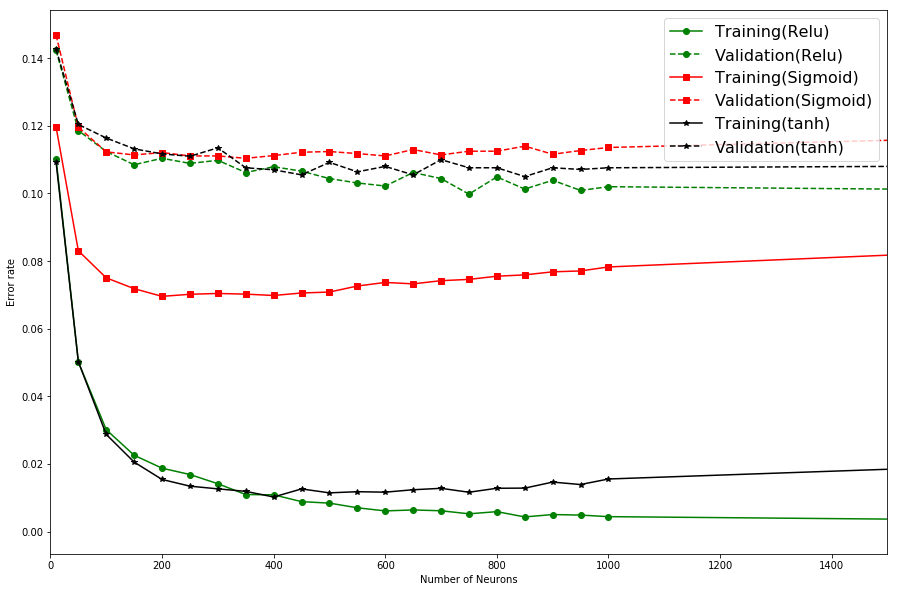

In [45]:
plt.figure(figsize = (15,10))
plt.plot(Nron_size_list_RELU, Train_error_list_RELU, 'go-', label = "Training(Relu)")
plt.plot(Nron_size_list_RELU, Val_error_list_RELU, 'go--', label = "Validation(Relu)")
plt.plot(Nron_size_list_SIGMO, Train_error_list_SIGMO, 'rs-', label = "Training(Sigmoid)")
plt.plot(Nron_size_list_SIGMO, Val_error_list_SIGMO, 'rs--', label = "Validation(Sigmoid)") 
plt.plot(Nron_size_list_TANH, Train_error_list_TANH, 'k*-', label = "Training(tanh)")
plt.plot(Nron_size_list_TANH, Val_error_list_TANH, 'k*--', label = "Validation(tanh)")

plt.xlabel('Number of Neurons')
plt.ylabel('Error rate')
plt.legend(fontsize=16)
plt.xlim(0, 1500)

In [46]:
best_val_locatin_RELU = np.argmin(Val_error_list_RELU)
print("BEST VALIDATION ERROR", Val_error_list_RELU[best_val_locatin_RELU])
print("BEST VALIDATION ACCURACY", 1 - Val_error_list_RELU[best_val_locatin_RELU])
best_val_locatin_RELU

BEST VALIDATION ERROR 0.09530000000000005
BEST VALIDATION ACCURACY 0.9047


24

In [47]:
Nron_size_list_RELU[best_val_locatin_RELU]

10000

Finer Grid Search RELU, multilayer search

In [ ]:
#in this section I wanted to search for the lowest number of neurons for each of the layers from a range of
#50 to 1200 in increments of 50. After finding one layer I repeat the code for the second and third. I didnt use
#the graphs in my report because i felt that it wouldn't provide any new information

In [52]:
Nron_size_list_FR = []
Train_error_list_FR = []
Val_error_list_FR = []
Train_time_list_FR = []
Val_time_list_FR = []

from sklearn.model_selection import train_test_split

for j in range(50,1200,50):

#[250, 275, 300,325, 350,375, 400, 425, 450, 784]:

    Nron_size_list_FR.append(j)
    print('Neuron_set_size:', j)
    
    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train_scaled, y_train, test_size = 0, random_state = 42)
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf_nron = tf.contrib.learn.DNNClassifier(hidden_units=[j], n_classes=10, activation_fn=tf.nn.relu,feature_columns=feature_columns, config=config)
    dnn_1_clf_nron = tf.contrib.learn.SKCompat(dnn_1_clf_nron) # if TensorFlow >= 1.1
    #dnn_1_clf.fit(X_train_partial, y_train_partial, batch_size=50, max_steps=40000)
    
    start=datetime.now()
    dnn_1_clf_nron.fit(X_train_scaled_partial, y_train_partial, batch_size=120,  steps=5500 )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf_nron training time', Train_elapse)
    Train_time_list_FR.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf_nron.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    
    #print(dnn_1_clf.score(X_train_partial))##doesn't work. it has no score method

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf_nron.predict(X_val_scaled)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    #print('dnn_1_clf val time', Val_elapse)
    Val_time_list_FR.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
    #Val_error = 1 - cross_val_score(dnn_1_clf, X_train_partial, y_train_partial, n_jobs = 3, cv=3, scoring="accuracy").mean()  
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_FR.append(Train_error)
    Val_error_list_FR.append(Val_error)
    
print("Nron_size_list_FR: ", Nron_size_list_FR)
print("Train_error_list_FR: ", Train_error_list_FR)
print("Val_error_list_FR: ", Val_error_list_FR)
print("Train_time_list_FR: ", Train_time_list_FR)
print("Val_time_list_FR: ", Val_time_list_FR)  

Neuron_set_size: 50
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECDADCC88>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmp1hhv6l00'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I

INFO:tensorflow:loss = 0.20577684, step = 5000 (0.147 sec)
INFO:tensorflow:global_step/sec: 689.025
INFO:tensorflow:loss = 0.09933981, step = 5100 (0.145 sec)
INFO:tensorflow:global_step/sec: 666.059
INFO:tensorflow:loss = 0.22531427, step = 5200 (0.150 sec)
INFO:tensorflow:global_step/sec: 675.062
INFO:tensorflow:loss = 0.20844463, step = 5300 (0.149 sec)
INFO:tensorflow:global_step/sec: 666.061
INFO:tensorflow:loss = 0.2356753, step = 5400 (0.149 sec)
INFO:tensorflow:Saving checkpoints for 5500 into C:\Users\cstra\AppData\Local\Temp\tmp1hhv6l00\model.ckpt.
INFO:tensorflow:Loss for final step: 0.23917277.
dnn_1_clf_nron training time 9.543414
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp1hhv6l00\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp1hhv6l00

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpe43ajuie\model.ckpt.
INFO:tensorflow:loss = 2.9120736, step = 0
INFO:tensorflow:global_step/sec: 558.151
INFO:tensorflow:loss = 0.4811257, step = 100 (0.179 sec)
INFO:tensorflow:global_step/sec: 648.763
INFO:tensorflow:loss = 0.61612815, step = 200 (0.154 sec)
INFO:tensorflow:global_step/sec: 644.57
INFO:tensorflow:loss = 0.28719845, step = 300 (0.155 sec)
INFO:tensorflow:global_step/sec: 640.445
INFO:tensorflow:loss = 0.4801159, step = 400 (0.156 sec)
INFO:tensorflow:global_step/sec: 628.348
INFO:tensorflow:loss = 0.2567664, step = 500 (0.160 sec)
INFO:tensorflow:global_step/sec: 647.022
INFO:tensorflow:loss = 0.22578032, step = 600 (0.154 sec)
INFO:tensorflow:global_step/sec: 636.842
INFO:tensorflow:loss = 0.45372972, step = 700 (0.157 sec)
INFO:tensorflow:global_step/sec: 640.411
INF

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpe43ajuie\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.05593999999999999 / 0.1129
Neuron_set_size: 150
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED758F978>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5

INFO:tensorflow:global_step/sec: 679.653
INFO:tensorflow:loss = 0.26232478, step = 3300 (0.146 sec)
INFO:tensorflow:global_step/sec: 684.309
INFO:tensorflow:loss = 0.20516253, step = 3400 (0.147 sec)
INFO:tensorflow:global_step/sec: 693.811
INFO:tensorflow:loss = 0.18751284, step = 3500 (0.143 sec)
INFO:tensorflow:global_step/sec: 675.061
INFO:tensorflow:loss = 0.22991742, step = 3600 (0.149 sec)
INFO:tensorflow:global_step/sec: 689.029
INFO:tensorflow:loss = 0.23828883, step = 3700 (0.145 sec)
INFO:tensorflow:global_step/sec: 693.815
INFO:tensorflow:loss = 0.17890647, step = 3800 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.583
INFO:tensorflow:loss = 0.25592086, step = 3900 (0.142 sec)
INFO:tensorflow:global_step/sec: 734.626
INFO:tensorflow:loss = 0.19420229, step = 4000 (0.136 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.23368068, step = 4100 (0.142 sec)
INFO:tensorflow:global_step/sec: 698.665
INFO:tensorflow:loss = 0.1363789, step = 4200 (0.143 sec)
I

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpm_1wb3lp\model.ckpt.
INFO:tensorflow:loss = 2.7918859, step = 0
INFO:tensorflow:global_step/sec: 567.665
INFO:tensorflow:loss = 0.4744316, step = 100 (0.179 sec)
INFO:tensorflow:global_step/sec: 661.65
INFO:tensorflow:loss = 0.6107328, step = 200 (0.150 sec)
INFO:tensorflow:global_step/sec: 675.06
INFO:tensorflow:loss = 0.33643308, step = 300 (0.148 sec)
INFO:tensorflow:global_step/sec: 670.516
INFO:tensorflow:loss = 0.45360753, step = 400 (0.148 sec)
INFO:tensorflow:global_step/sec: 684.285
INFO:tensorflow:loss = 0.26484695, step = 500 (0.146 sec)
INFO:tensorflow:global_step/sec: 666.041
INFO:tensorflow:loss = 0.22770214, step = 600 (0.151 sec)
INFO:tensorflow:global_step/sec: 689.684
INFO:tensorflow:loss = 0.43232298, step = 700 (0.145 sec)


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpm_1wb3lp\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpm_1wb3lp\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.04615999999999998 / 0.10740000000000005
Neuron_set_size: 250
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC66B630>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_me

INFO:tensorflow:global_step/sec: 666.053
INFO:tensorflow:loss = 0.39133236, step = 1500 (0.151 sec)
INFO:tensorflow:global_step/sec: 640.448
INFO:tensorflow:loss = 0.18691483, step = 1600 (0.155 sec)
INFO:tensorflow:global_step/sec: 640.444
INFO:tensorflow:loss = 0.26201567, step = 1700 (0.157 sec)
INFO:tensorflow:global_step/sec: 644.573
INFO:tensorflow:loss = 0.17664243, step = 1800 (0.155 sec)
INFO:tensorflow:global_step/sec: 598.259
INFO:tensorflow:loss = 0.24257545, step = 1900 (0.167 sec)
INFO:tensorflow:global_step/sec: 693.814
INFO:tensorflow:loss = 0.19295365, step = 2000 (0.144 sec)
INFO:tensorflow:global_step/sec: 670.531
INFO:tensorflow:loss = 0.14951697, step = 2100 (0.148 sec)
INFO:tensorflow:global_step/sec: 689.03
INFO:tensorflow:loss = 0.22979827, step = 2200 (0.145 sec)
INFO:tensorflow:global_step/sec: 693.81
INFO:tensorflow:loss = 0.20340282, step = 2300 (0.144 sec)
INFO:tensorflow:global_step/sec: 693.814
INFO:tensorflow:loss = 0.24407315, step = 2400 (0.145 sec)
IN

INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp0qjm3034\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.04312000000000005 / 0.10719999999999996
Neuron_set_size: 300
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED75EFD68>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_ever

INFO:tensorflow:global_step/sec: 504.594
INFO:tensorflow:loss = 0.15813605, step = 4800 (0.197 sec)
INFO:tensorflow:global_step/sec: 713.633
INFO:tensorflow:loss = 0.2932259, step = 4900 (0.140 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.15642016, step = 5000 (0.141 sec)
INFO:tensorflow:global_step/sec: 693.815
INFO:tensorflow:loss = 0.07053237, step = 5100 (0.145 sec)
INFO:tensorflow:global_step/sec: 675.06
INFO:tensorflow:loss = 0.15542285, step = 5200 (0.147 sec)
INFO:tensorflow:global_step/sec: 693.814
INFO:tensorflow:loss = 0.10834691, step = 5300 (0.145 sec)
INFO:tensorflow:global_step/sec: 670.53
INFO:tensorflow:loss = 0.15422305, step = 5400 (0.149 sec)
INFO:tensorflow:Saving checkpoints for 5500 into C:\Users\cstra\AppData\Local\Temp\tmp12wmyr94\model.ckpt.
INFO:tensorflow:Loss for final step: 0.17918526.
dnn_1_clf_nron training time 8.873967
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\T

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp17_pxkos\model.ckpt.
INFO:tensorflow:loss = 2.5849164, step = 0
INFO:tensorflow:global_step/sec: 612.924
INFO:tensorflow:loss = 0.49352372, step = 100 (0.165 sec)
INFO:tensorflow:global_step/sec: 679.637
INFO:tensorflow:loss = 0.5862477, step = 200 (0.146 sec)
INFO:tensorflow:global_step/sec: 691.883
INFO:tensorflow:loss = 0.30205044, step = 300 (0.146 sec)
INFO:tensorflow:global_step/sec: 662.031
INFO:tensorflow:loss = 0.5001463, step = 400 (0.151 sec)
INFO:tensorflow:global_step/sec: 648.721
INFO:tensorflow:loss = 0.30436176, step = 500 (0.153 sec)
INFO:tensorflow:global_step/sec: 666.046
INFO:tensorflow:loss = 0.21275815, step = 600 (0.151 sec)
INFO:tensorflow:global_step/sec: 666.06
INFO:tensorflow:loss = 0.43590802, step = 700 (0.149 sec)
INFO:tensorflow:global_step/sec: 675.062
IN

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp17_pxkos\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.04069999999999996 / 0.10619999999999996
Neuron_set_size: 400
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED57542B0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_check

INFO:tensorflow:loss = 0.14608426, step = 3200 (0.151 sec)
INFO:tensorflow:global_step/sec: 636.356
INFO:tensorflow:loss = 0.27072126, step = 3300 (0.159 sec)
INFO:tensorflow:global_step/sec: 657.306
INFO:tensorflow:loss = 0.15801921, step = 3400 (0.150 sec)
INFO:tensorflow:global_step/sec: 670.526
INFO:tensorflow:loss = 0.17061636, step = 3500 (0.150 sec)
INFO:tensorflow:global_step/sec: 670.532
INFO:tensorflow:loss = 0.20572779, step = 3600 (0.149 sec)
INFO:tensorflow:global_step/sec: 661.651
INFO:tensorflow:loss = 0.22714807, step = 3700 (0.150 sec)
INFO:tensorflow:global_step/sec: 657.298
INFO:tensorflow:loss = 0.1347114, step = 3800 (0.152 sec)
INFO:tensorflow:global_step/sec: 670.53
INFO:tensorflow:loss = 0.1999619, step = 3900 (0.149 sec)
INFO:tensorflow:global_step/sec: 684.307
INFO:tensorflow:loss = 0.1782746, step = 4000 (0.146 sec)
INFO:tensorflow:global_step/sec: 675.056
INFO:tensorflow:loss = 0.20157625, step = 4100 (0.149 sec)
INFO:tensorflow:global_step/sec: 670.536
INFO

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp2wk7yh1z\model.ckpt.
INFO:tensorflow:loss = 2.44286, step = 0
INFO:tensorflow:global_step/sec: 580.855
INFO:tensorflow:loss = 0.45743898, step = 100 (0.172 sec)
INFO:tensorflow:global_step/sec: 652.963
INFO:tensorflow:loss = 0.58554864, step = 200 (0.153 sec)
INFO:tensorflow:global_step/sec: 657.262
INFO:tensorflow:loss = 0.30731297, step = 300 (0.153 sec)
INFO:tensorflow:global_step/sec: 670.519
INFO:tensorflow:loss = 0.5004268, step = 400 (0.148 sec)
INFO:tensorflow:global_step/sec: 648.76
INFO:tensorflow:loss = 0.26950014, step = 500 (0.154 sec)
INFO:tensorflow:global_step/sec: 636.363
INFO:tensorflow:loss = 0.21203198, step = 600 (0.159 sec)
INFO:tensorflow:global_step/sec: 644.574
INFO:tensorflow:loss = 0.44932577, step = 700 (0.154 sec)


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp2wk7yh1z\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp2wk7yh1z\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03724000000000005 / 0.10629999999999995
Neuron_set_size: 500
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED7617DA0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_me

INFO:tensorflow:global_step/sec: 580.863
INFO:tensorflow:loss = 0.39618194, step = 1500 (0.172 sec)
INFO:tensorflow:global_step/sec: 612.942
INFO:tensorflow:loss = 0.18723086, step = 1600 (0.162 sec)
INFO:tensorflow:global_step/sec: 644.579
INFO:tensorflow:loss = 0.25004122, step = 1700 (0.155 sec)
INFO:tensorflow:global_step/sec: 648.758
INFO:tensorflow:loss = 0.14992307, step = 1800 (0.155 sec)
INFO:tensorflow:global_step/sec: 648.761
INFO:tensorflow:loss = 0.20909502, step = 1900 (0.154 sec)
INFO:tensorflow:global_step/sec: 652.999
INFO:tensorflow:loss = 0.17305325, step = 2000 (0.153 sec)
INFO:tensorflow:global_step/sec: 661.648
INFO:tensorflow:loss = 0.15017115, step = 2100 (0.150 sec)
INFO:tensorflow:global_step/sec: 644.579
INFO:tensorflow:loss = 0.20181777, step = 2200 (0.155 sec)
INFO:tensorflow:global_step/sec: 640.442
INFO:tensorflow:loss = 0.1940638, step = 2300 (0.157 sec)
INFO:tensorflow:global_step/sec: 661.65
INFO:tensorflow:loss = 0.23558146, step = 2400 (0.150 sec)
IN

INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpe2xmzml3\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03942000000000001 / 0.10809999999999997
Neuron_set_size: 550
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED5BB0CC0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_ever

INFO:tensorflow:global_step/sec: 584.263
INFO:tensorflow:loss = 0.12637119, step = 4800 (0.171 sec)
INFO:tensorflow:global_step/sec: 653.001
INFO:tensorflow:loss = 0.25221258, step = 4900 (0.154 sec)
INFO:tensorflow:global_step/sec: 661.65
INFO:tensorflow:loss = 0.13370036, step = 5000 (0.150 sec)
INFO:tensorflow:global_step/sec: 644.575
INFO:tensorflow:loss = 0.05632313, step = 5100 (0.155 sec)
INFO:tensorflow:global_step/sec: 670.53
INFO:tensorflow:loss = 0.15291476, step = 5200 (0.150 sec)
INFO:tensorflow:global_step/sec: 661.65
INFO:tensorflow:loss = 0.10287502, step = 5300 (0.151 sec)
INFO:tensorflow:global_step/sec: 644.573
INFO:tensorflow:loss = 0.126434, step = 5400 (0.155 sec)
INFO:tensorflow:Saving checkpoints for 5500 into C:\Users\cstra\AppData\Local\Temp\tmpv8tppew6\model.ckpt.
INFO:tensorflow:Loss for final step: 0.13478795.
dnn_1_clf_nron training time 9.805423
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Tem

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpcp3wn11d\model.ckpt.
INFO:tensorflow:loss = 2.7780828, step = 0
INFO:tensorflow:global_step/sec: 540.051
INFO:tensorflow:loss = 0.48817405, step = 100 (0.185 sec)
INFO:tensorflow:global_step/sec: 584.262
INFO:tensorflow:loss = 0.57975554, step = 200 (0.172 sec)
INFO:tensorflow:global_step/sec: 640.442
INFO:tensorflow:loss = 0.32639626, step = 300 (0.155 sec)
INFO:tensorflow:global_step/sec: 648.764
INFO:tensorflow:loss = 0.5017759, step = 400 (0.154 sec)
INFO:tensorflow:global_step/sec: 648.759
INFO:tensorflow:loss = 0.2636405, step = 500 (0.154 sec)
INFO:tensorflow:global_step/sec: 642.471
INFO:tensorflow:loss = 0.2134122, step = 600 (0.157 sec)
INFO:tensorflow:global_step/sec: 648.739
INFO:tensorflow:loss = 0.4187226, step = 700 (0.153 sec)


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpcp3wn11d\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03380000000000005 / 0.1058
Neuron_set_size: 650
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED75D9710>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5

INFO:tensorflow:global_step/sec: 648.76
INFO:tensorflow:loss = 0.26718915, step = 3300 (0.155 sec)
INFO:tensorflow:global_step/sec: 574.19
INFO:tensorflow:loss = 0.16264364, step = 3400 (0.173 sec)
INFO:tensorflow:global_step/sec: 598.258
INFO:tensorflow:loss = 0.16216013, step = 3500 (0.168 sec)
INFO:tensorflow:global_step/sec: 644.571
INFO:tensorflow:loss = 0.16233076, step = 3600 (0.154 sec)
INFO:tensorflow:global_step/sec: 657.297
INFO:tensorflow:loss = 0.18730846, step = 3700 (0.152 sec)
INFO:tensorflow:global_step/sec: 628.36
INFO:tensorflow:loss = 0.14209935, step = 3800 (0.160 sec)
INFO:tensorflow:global_step/sec: 640.441
INFO:tensorflow:loss = 0.17566146, step = 3900 (0.155 sec)
INFO:tensorflow:global_step/sec: 648.762
INFO:tensorflow:loss = 0.15531978, step = 4000 (0.154 sec)
INFO:tensorflow:global_step/sec: 640.444
INFO:tensorflow:loss = 0.19835445, step = 4100 (0.156 sec)
INFO:tensorflow:global_step/sec: 640.443
INFO:tensorflow:loss = 0.11266523, step = 4200 (0.156 sec)
INF

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp_20m27at\model.ckpt.
INFO:tensorflow:loss = 2.3696887, step = 0
INFO:tensorflow:global_step/sec: 558.132
INFO:tensorflow:loss = 0.4822831, step = 100 (0.180 sec)
INFO:tensorflow:global_step/sec: 640.424
INFO:tensorflow:loss = 0.5915004, step = 200 (0.156 sec)
INFO:tensorflow:global_step/sec: 632.325
INFO:tensorflow:loss = 0.31991294, step = 300 (0.157 sec)
INFO:tensorflow:global_step/sec: 620.539
INFO:tensorflow:loss = 0.4635245, step = 400 (0.161 sec)
INFO:tensorflow:global_step/sec: 623.272
INFO:tensorflow:loss = 0.27578968, step = 500 (0.160 sec)
INFO:tensorflow:global_step/sec: 636.364
INFO:tensorflow:loss = 0.21919431, step = 600 (0.158 sec)
INFO:tensorflow:global_step/sec: 628.355
INFO:tensorflow:loss = 0.41749078, step = 700 (0.158 sec)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp_20m27at\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp_20m27at\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.033299999999999996 / 0.10540000000000005
Neuron_set_size: 750
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECDA3D6D8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_m

INFO:tensorflow:global_step/sec: 644.575
INFO:tensorflow:loss = 0.38487127, step = 1500 (0.154 sec)
INFO:tensorflow:global_step/sec: 644.573
INFO:tensorflow:loss = 0.19049783, step = 1600 (0.155 sec)
INFO:tensorflow:global_step/sec: 636.362
INFO:tensorflow:loss = 0.23254491, step = 1700 (0.158 sec)
INFO:tensorflow:global_step/sec: 636.367
INFO:tensorflow:loss = 0.14983162, step = 1800 (0.156 sec)
INFO:tensorflow:global_step/sec: 652.997
INFO:tensorflow:loss = 0.23240884, step = 1900 (0.153 sec)
INFO:tensorflow:global_step/sec: 644.575
INFO:tensorflow:loss = 0.17478895, step = 2000 (0.156 sec)
INFO:tensorflow:global_step/sec: 632.337
INFO:tensorflow:loss = 0.13633122, step = 2100 (0.158 sec)
INFO:tensorflow:global_step/sec: 628.359
INFO:tensorflow:loss = 0.17006676, step = 2200 (0.158 sec)
INFO:tensorflow:global_step/sec: 624.431
INFO:tensorflow:loss = 0.1865001, step = 2300 (0.161 sec)
INFO:tensorflow:global_step/sec: 620.552
INFO:tensorflow:loss = 0.2243091, step = 2400 (0.161 sec)
IN

INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp0lxwtfvr\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03398000000000001 / 0.10309999999999997
Neuron_set_size: 800
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED5954B38>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_ever

INFO:tensorflow:global_step/sec: 632.335
INFO:tensorflow:loss = 0.1167071, step = 4800 (0.158 sec)
INFO:tensorflow:global_step/sec: 632.335
INFO:tensorflow:loss = 0.2491476, step = 4900 (0.158 sec)
INFO:tensorflow:global_step/sec: 609.202
INFO:tensorflow:loss = 0.149098, step = 5000 (0.165 sec)
INFO:tensorflow:global_step/sec: 601.862
INFO:tensorflow:loss = 0.049258392, step = 5100 (0.165 sec)
INFO:tensorflow:global_step/sec: 661.625
INFO:tensorflow:loss = 0.13352071, step = 5200 (0.151 sec)
INFO:tensorflow:global_step/sec: 640.428
INFO:tensorflow:loss = 0.079899214, step = 5300 (0.156 sec)
INFO:tensorflow:global_step/sec: 639.174
INFO:tensorflow:loss = 0.13391171, step = 5400 (0.157 sec)
INFO:tensorflow:Saving checkpoints for 5500 into C:\Users\cstra\AppData\Local\Temp\tmpo4l39144\model.ckpt.
INFO:tensorflow:Loss for final step: 0.117363445.
dnn_1_clf_nron training time 9.579133
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpaenketyj\model.ckpt.
INFO:tensorflow:loss = 2.4888613, step = 0
INFO:tensorflow:global_step/sec: 525.837
INFO:tensorflow:loss = 0.49660498, step = 100 (0.191 sec)
INFO:tensorflow:global_step/sec: 632.333
INFO:tensorflow:loss = 0.6599449, step = 200 (0.160 sec)
INFO:tensorflow:global_step/sec: 620.556
INFO:tensorflow:loss = 0.29223123, step = 300 (0.159 sec)
INFO:tensorflow:global_step/sec: 564.455
INFO:tensorflow:loss = 0.51838994, step = 400 (0.177 sec)
INFO:tensorflow:global_step/sec: 574.193
INFO:tensorflow:loss = 0.26815385, step = 500 (0.174 sec)
INFO:tensorflow:global_step/sec: 609.2
INFO:tensorflow:loss = 0.21572104, step = 600 (0.165 sec)
INFO:tensorflow:global_step/sec: 598.257
INFO:tensorflow:loss = 0.43013814, step = 700 (0.166 sec)
INFO:tensorflow:global_step/sec: 598.26
INF

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpaenketyj\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.033379999999999965 / 0.1068
Neuron_set_size: 900
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC3B4588>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 

INFO:tensorflow:loss = 0.116824515, step = 3200 (0.197 sec)
INFO:tensorflow:global_step/sec: 703.586
INFO:tensorflow:loss = 0.24724616, step = 3300 (0.142 sec)
INFO:tensorflow:global_step/sec: 661.646
INFO:tensorflow:loss = 0.14862524, step = 3400 (0.152 sec)
INFO:tensorflow:global_step/sec: 616.727
INFO:tensorflow:loss = 0.14001541, step = 3500 (0.161 sec)
INFO:tensorflow:global_step/sec: 666.061
INFO:tensorflow:loss = 0.16124998, step = 3600 (0.151 sec)
INFO:tensorflow:global_step/sec: 475.749
INFO:tensorflow:loss = 0.21085717, step = 3700 (0.209 sec)
INFO:tensorflow:global_step/sec: 684.311
INFO:tensorflow:loss = 0.1287069, step = 3800 (0.146 sec)
INFO:tensorflow:global_step/sec: 502.056
INFO:tensorflow:loss = 0.16383888, step = 3900 (0.199 sec)
INFO:tensorflow:global_step/sec: 657.297
INFO:tensorflow:loss = 0.13741699, step = 4000 (0.153 sec)
INFO:tensorflow:global_step/sec: 684.309
INFO:tensorflow:loss = 0.17403208, step = 4100 (0.145 sec)
INFO:tensorflow:global_step/sec: 525.835


INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpo_6w1ybe\model.ckpt.
INFO:tensorflow:loss = 2.6015155, step = 0
INFO:tensorflow:global_step/sec: 548.949
INFO:tensorflow:loss = 0.45490173, step = 100 (0.182 sec)
INFO:tensorflow:global_step/sec: 525.84
INFO:tensorflow:loss = 0.593693, step = 200 (0.190 sec)
INFO:tensorflow:global_step/sec: 628.36
INFO:tensorflow:loss = 0.3341581, step = 300 (0.159 sec)
INFO:tensorflow:global_step/sec: 679.653
INFO:tensorflow:loss = 0.47715294, step = 400 (0.147 sec)
INFO:tensorflow:global_step/sec: 698.666
INFO:tensorflow:loss = 0.28875557, step = 500 (0.143 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.21104246, step = 600 (0.142 sec)
INFO:tensorflow:global_step/sec: 708.574
INFO:tensorflow:loss = 0.43385786, step = 700 (0.141 sec)
I

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpo_6w1ybe\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpo_6w1ybe\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.033540000000000014 / 0.10709999999999997
Neuron_set_size: 1000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED7463AC8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_

INFO:tensorflow:global_step/sec: 684.308
INFO:tensorflow:loss = 0.4099294, step = 1500 (0.146 sec)
INFO:tensorflow:global_step/sec: 708.575
INFO:tensorflow:loss = 0.17522235, step = 1600 (0.142 sec)
INFO:tensorflow:global_step/sec: 675.06
INFO:tensorflow:loss = 0.22479592, step = 1700 (0.147 sec)
INFO:tensorflow:global_step/sec: 684.309
INFO:tensorflow:loss = 0.15926625, step = 1800 (0.147 sec)
INFO:tensorflow:global_step/sec: 636.361
INFO:tensorflow:loss = 0.2045246, step = 1900 (0.156 sec)
INFO:tensorflow:global_step/sec: 564.46
INFO:tensorflow:loss = 0.17357133, step = 2000 (0.177 sec)
INFO:tensorflow:global_step/sec: 587.699
INFO:tensorflow:loss = 0.13660656, step = 2100 (0.170 sec)
INFO:tensorflow:global_step/sec: 574.192
INFO:tensorflow:loss = 0.17416653, step = 2200 (0.175 sec)
INFO:tensorflow:global_step/sec: 624.427
INFO:tensorflow:loss = 0.18807931, step = 2300 (0.160 sec)
INFO:tensorflow:global_step/sec: 620.556
INFO:tensorflow:loss = 0.21279821, step = 2400 (0.160 sec)
INFO

INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpjpic_jch\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.03505999999999998 / 0.1069
Neuron_set_size: 1050
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018EAA548048>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 

INFO:tensorflow:loss = 0.094612494, step = 4800 (0.169 sec)
INFO:tensorflow:global_step/sec: 480.331
INFO:tensorflow:loss = 0.23471235, step = 4900 (0.208 sec)
INFO:tensorflow:global_step/sec: 509.742
INFO:tensorflow:loss = 0.14223742, step = 5000 (0.196 sec)
INFO:tensorflow:global_step/sec: 657.295
INFO:tensorflow:loss = 0.0438767, step = 5100 (0.153 sec)
INFO:tensorflow:global_step/sec: 666.062
INFO:tensorflow:loss = 0.12029732, step = 5200 (0.149 sec)
INFO:tensorflow:global_step/sec: 628.36
INFO:tensorflow:loss = 0.08598416, step = 5300 (0.159 sec)
INFO:tensorflow:global_step/sec: 679.653
INFO:tensorflow:loss = 0.15744, step = 5400 (0.148 sec)
INFO:tensorflow:Saving checkpoints for 5500 into C:\Users\cstra\AppData\Local\Temp\tmp720s1tss\model.ckpt.
INFO:tensorflow:Loss for final step: 0.14673631.
dnn_1_clf_nron training time 10.517593
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp720s1tss\model.ckpt-5500
INFO:tens

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp71hfb7vo\model.ckpt.
INFO:tensorflow:loss = 2.8259704, step = 0
INFO:tensorflow:global_step/sec: 508.76
INFO:tensorflow:loss = 0.49196377, step = 100 (0.198 sec)
INFO:tensorflow:global_step/sec: 591.17
INFO:tensorflow:loss = 0.5826168, step = 200 (0.169 sec)
INFO:tensorflow:global_step/sec: 679.654
INFO:tensorflow:loss = 0.31303748, step = 300 (0.148 sec)
INFO:tensorflow:global_step/sec: 624.429
INFO:tensorflow:loss = 0.51505977, step = 400 (0.159 sec)
INFO:tensorflow:global_step/sec: 666.056
INFO:tensorflow:loss = 0.2711953, step = 500 (0.151 sec)
INFO:tensorflow:global_step/sec: 661.652
INFO:tensorflow:loss = 0.21847963, step = 600 (0.151 sec)
INFO:tensorflow:global_step/sec: 636.366
INFO:tensorflow:loss = 0.4187582, step = 700 (0.156 sec)
I

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp71hfb7vo\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.028039999999999954 / 0.1058
Neuron_set_size: 1150
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED5C8D8D0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max':

INFO:tensorflow:global_step/sec: 661.649
INFO:tensorflow:loss = 0.2260478, step = 3300 (0.150 sec)
INFO:tensorflow:global_step/sec: 657.296
INFO:tensorflow:loss = 0.1405187, step = 3400 (0.152 sec)
INFO:tensorflow:global_step/sec: 661.651
INFO:tensorflow:loss = 0.1371927, step = 3500 (0.151 sec)
INFO:tensorflow:global_step/sec: 675.062
INFO:tensorflow:loss = 0.15284117, step = 3600 (0.149 sec)
INFO:tensorflow:global_step/sec: 666.059
INFO:tensorflow:loss = 0.22140338, step = 3700 (0.149 sec)
INFO:tensorflow:global_step/sec: 661.651
INFO:tensorflow:loss = 0.13207778, step = 3800 (0.152 sec)
INFO:tensorflow:global_step/sec: 657.295
INFO:tensorflow:loss = 0.18088311, step = 3900 (0.151 sec)
INFO:tensorflow:global_step/sec: 670.531
INFO:tensorflow:loss = 0.13263859, step = 4000 (0.149 sec)
INFO:tensorflow:global_step/sec: 661.651
INFO:tensorflow:loss = 0.18473521, step = 4100 (0.151 sec)
INFO:tensorflow:global_step/sec: 670.531
INFO:tensorflow:loss = 0.13520837, step = 4200 (0.150 sec)
INF

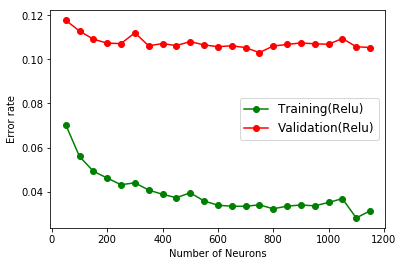

In [53]:
#plt.figure(figsize = (20,16))
plt.plot(Nron_size_list_FR, Train_error_list_FR, 'go-', label = "Training(Relu)")
plt.plot(Nron_size_list_FR, Val_error_list_FR, 'ro-', label = "Validation(Relu)")


plt.xlabel('Number of Neurons')
plt.ylabel('Error rate')
plt.legend( fontsize=12)
#plt.xlim(0, 1000)

In [54]:
Nron_opt1 = Nron_size_list_FR[np.argmin(Val_error_list_FR)]
Nron_opt1

750

In [55]:
Nron_size_list_FR = []
Train_error_list_FR = []
Val_error_list_FR = []
Train_time_list_FR = []
Val_time_list_FR = []

from sklearn.model_selection import train_test_split

for j in range(50,1200,50):

#[250, 275, 300,325, 350,375, 400, 425, 450, 784]:

    Nron_size_list_FR.append(j)
    print('Neuron_set_size:', j)
    
    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train_scaled, y_train, test_size = 0, random_state = 42)
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf_nron = tf.contrib.learn.DNNClassifier(hidden_units=[Nron_opt1,j], n_classes=10, activation_fn=tf.nn.relu,feature_columns=feature_columns, config=config)
    dnn_1_clf_nron = tf.contrib.learn.SKCompat(dnn_1_clf_nron) # if TensorFlow >= 1.1
    #dnn_1_clf.fit(X_train_partial, y_train_partial, batch_size=50, max_steps=40000)
    
    start=datetime.now()
    dnn_1_clf_nron.fit(X_train_scaled_partial, y_train_partial, batch_size=120,  steps=5500 )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf_nron training time', Train_elapse)
    Train_time_list_FR.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf_nron.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    
    #print(dnn_1_clf.score(X_train_partial))##doesn't work. it has no score method

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf_nron.predict(X_val_scaled)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    #print('dnn_1_clf val time', Val_elapse)
    Val_time_list_FR.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
    #Val_error = 1 - cross_val_score(dnn_1_clf, X_train_partial, y_train_partial, n_jobs = 3, cv=3, scoring="accuracy").mean()  
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_FR.append(Train_error)
    Val_error_list_FR.append(Val_error)
    
print("Nron_size_list_FR: ", Nron_size_list_FR)
print("Train_error_list_FR: ", Train_error_list_FR)
print("Val_error_list_FR: ", Val_error_list_FR)
print("Train_time_list_FR: ", Train_time_list_FR)
print("Val_time_list_FR: ", Val_time_list_FR)  

Neuron_set_size: 50
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC609CF8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpjh4r8o0l'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I

INFO:tensorflow:loss = 0.12925902, step = 4000 (0.150 sec)
INFO:tensorflow:global_step/sec: 632.332
INFO:tensorflow:loss = 0.1844671, step = 4100 (0.159 sec)
INFO:tensorflow:global_step/sec: 632.338
INFO:tensorflow:loss = 0.07606659, step = 4200 (0.157 sec)
INFO:tensorflow:global_step/sec: 684.303
INFO:tensorflow:loss = 0.17787, step = 4300 (0.147 sec)
INFO:tensorflow:global_step/sec: 684.314
INFO:tensorflow:loss = 0.17490496, step = 4400 (0.145 sec)
INFO:tensorflow:global_step/sec: 628.355
INFO:tensorflow:loss = 0.19917522, step = 4500 (0.160 sec)
INFO:tensorflow:global_step/sec: 653.005
INFO:tensorflow:loss = 0.06486328, step = 4600 (0.153 sec)
INFO:tensorflow:global_step/sec: 652.998
INFO:tensorflow:loss = 0.16067037, step = 4700 (0.152 sec)
INFO:tensorflow:global_step/sec: 644.577
INFO:tensorflow:loss = 0.114444256, step = 4800 (0.156 sec)
INFO:tensorflow:global_step/sec: 670.529
INFO:tensorflow:loss = 0.19269525, step = 4900 (0.148 sec)
INFO:tensorflow:global_step/sec: 666.061
INF

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED761F470>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpnmq_dsbr'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 425.146
INFO:tensorflow:loss = 0.18408288, step = 4100 (0.235 sec)
INFO:tensorflow:global_step/sec: 616.73
INFO:tensorflow:loss = 0.067766, step = 4200 (0.162 sec)
INFO:tensorflow:global_step/sec: 670.532
INFO:tensorflow:loss = 0.13914767, step = 4300 (0.148 sec)
INFO:tensorflow:global_step/sec: 652.997
INFO:tensorflow:loss = 0.16610697, step = 4400 (0.154 sec)
INFO:tensorflow:global_step/sec: 666.063
INFO:tensorflow:loss = 0.14276193, step = 4500 (0.149 sec)
INFO:tensorflow:global_step/sec: 655.123
INFO:tensorflow:loss = 0.049730774, step = 4600 (0.153 sec)
INFO:tensorflow:global_step/sec: 666.037
INFO:tensorflow:loss = 0.18136147, step = 4700 (0.150 sec)
INFO:tensorflow:global_step/sec: 666.051
INFO:tensorflow:loss = 0.09615608, step = 4800 (0.151 sec)
INFO:tensorflow:global_step/sec: 661.622
INFO:tensorflow:loss = 0.2142187, step = 4900 (0.150 sec)
INFO:tensorflow:global_step/sec: 670.518
INFO:tensorflow:loss = 0.13592164, step = 5000 (0.149 sec)
INF

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000019074C8A5F8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpkscfgrh_'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 670.52
INFO:tensorflow:loss = 0.1485806, step = 4100 (0.148 sec)
INFO:tensorflow:global_step/sec: 675.04
INFO:tensorflow:loss = 0.07706989, step = 4200 (0.149 sec)
INFO:tensorflow:global_step/sec: 666.05
INFO:tensorflow:loss = 0.14208283, step = 4300 (0.149 sec)
INFO:tensorflow:global_step/sec: 676.898
INFO:tensorflow:loss = 0.14672464, step = 4400 (0.149 sec)
INFO:tensorflow:global_step/sec: 666.061
INFO:tensorflow:loss = 0.13574547, step = 4500 (0.150 sec)
INFO:tensorflow:global_step/sec: 661.651
INFO:tensorflow:loss = 0.05294113, step = 4600 (0.150 sec)
INFO:tensorflow:global_step/sec: 675.062
INFO:tensorflow:loss = 0.17250344, step = 4700 (0.149 sec)
INFO:tensorflow:global_step/sec: 679.63
INFO:tensorflow:loss = 0.07775343, step = 4800 (0.146 sec)
INFO:tensorflow:global_step/sec: 698.648
INFO:tensorflow:loss = 0.17742205, step = 4900 (0.143 sec)
INFO:tensorflow:global_step/sec: 679.614
INFO:tensorflow:loss = 0.16363284, step = 5000 (0.148 sec)
INFO:

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED5AD3668>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpzjxje281'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 586.372
INFO:tensorflow:loss = 0.13447532, step = 4100 (0.170 sec)
INFO:tensorflow:global_step/sec: 478.035
INFO:tensorflow:loss = 0.053503547, step = 4200 (0.210 sec)
INFO:tensorflow:global_step/sec: 475.747
INFO:tensorflow:loss = 0.14971562, step = 4300 (0.209 sec)
INFO:tensorflow:global_step/sec: 558.155
INFO:tensorflow:loss = 0.16206935, step = 4400 (0.179 sec)
INFO:tensorflow:global_step/sec: 624.43
INFO:tensorflow:loss = 0.104411125, step = 4500 (0.161 sec)
INFO:tensorflow:global_step/sec: 612.935
INFO:tensorflow:loss = 0.039550807, step = 4600 (0.163 sec)
INFO:tensorflow:global_step/sec: 442.077
INFO:tensorflow:loss = 0.14337349, step = 4700 (0.225 sec)
INFO:tensorflow:global_step/sec: 523.084
INFO:tensorflow:loss = 0.08596381, step = 4800 (0.191 sec)
INFO:tensorflow:global_step/sec: 540.047
INFO:tensorflow:loss = 0.22061713, step = 4900 (0.186 sec)
INFO:tensorflow:global_step/sec: 605.512
INFO:tensorflow:loss = 0.12163391, step = 5000 (0.165 sec

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED7260E80>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpgzinciw9'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 570.911
INFO:tensorflow:loss = 0.12866604, step = 4100 (0.175 sec)
INFO:tensorflow:global_step/sec: 648.755
INFO:tensorflow:loss = 0.057061657, step = 4200 (0.154 sec)
INFO:tensorflow:global_step/sec: 648.765
INFO:tensorflow:loss = 0.16032682, step = 4300 (0.153 sec)
INFO:tensorflow:global_step/sec: 666.061
INFO:tensorflow:loss = 0.1330816, step = 4400 (0.150 sec)
INFO:tensorflow:global_step/sec: 653
INFO:tensorflow:loss = 0.13488677, step = 4500 (0.153 sec)
INFO:tensorflow:global_step/sec: 657.297
INFO:tensorflow:loss = 0.058428925, step = 4600 (0.152 sec)
INFO:tensorflow:global_step/sec: 670.532
INFO:tensorflow:loss = 0.1347209, step = 4700 (0.149 sec)
INFO:tensorflow:global_step/sec: 666.059
INFO:tensorflow:loss = 0.06806086, step = 4800 (0.151 sec)
INFO:tensorflow:global_step/sec: 661.651
INFO:tensorflow:loss = 0.20614411, step = 4900 (0.150 sec)
INFO:tensorflow:global_step/sec: 666.06
INFO:tensorflow:loss = 0.105515674, step = 5000 (0.150 sec)
INFO

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED59548D0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmp02lbza5g'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:loss = 0.12798564, step = 4000 (0.173 sec)
INFO:tensorflow:global_step/sec: 624.429
INFO:tensorflow:loss = 0.13110702, step = 4100 (0.160 sec)
INFO:tensorflow:global_step/sec: 605.51
INFO:tensorflow:loss = 0.06856791, step = 4200 (0.165 sec)
INFO:tensorflow:global_step/sec: 628.36
INFO:tensorflow:loss = 0.14195065, step = 4300 (0.160 sec)
INFO:tensorflow:global_step/sec: 612.942
INFO:tensorflow:loss = 0.14803912, step = 4400 (0.162 sec)
INFO:tensorflow:global_step/sec: 609.201
INFO:tensorflow:loss = 0.14048557, step = 4500 (0.164 sec)
INFO:tensorflow:global_step/sec: 636.365
INFO:tensorflow:loss = 0.045229707, step = 4600 (0.158 sec)
INFO:tensorflow:global_step/sec: 636.365
INFO:tensorflow:loss = 0.15326643, step = 4700 (0.157 sec)
INFO:tensorflow:global_step/sec: 632.335
INFO:tensorflow:loss = 0.06442483, step = 4800 (0.158 sec)
INFO:tensorflow:global_step/sec: 628.358
INFO:tensorflow:loss = 0.17428637, step = 4900 (0.158 sec)
INFO:tensorflow:global_step/sec: 609.203
I

INFO:tensorflow:global_step/sec: 644.576
INFO:tensorflow:loss = 0.10364064, step = 4000 (0.155 sec)
INFO:tensorflow:global_step/sec: 648.76
INFO:tensorflow:loss = 0.15695372, step = 4100 (0.154 sec)
INFO:tensorflow:global_step/sec: 636.364
INFO:tensorflow:loss = 0.054741826, step = 4200 (0.158 sec)
INFO:tensorflow:global_step/sec: 624.432
INFO:tensorflow:loss = 0.13206932, step = 4300 (0.159 sec)
INFO:tensorflow:global_step/sec: 636.362
INFO:tensorflow:loss = 0.12739202, step = 4400 (0.158 sec)
INFO:tensorflow:global_step/sec: 640.445
INFO:tensorflow:loss = 0.12365703, step = 4500 (0.155 sec)
INFO:tensorflow:global_step/sec: 636.362
INFO:tensorflow:loss = 0.040845837, step = 4600 (0.157 sec)
INFO:tensorflow:global_step/sec: 612.939
INFO:tensorflow:loss = 0.12476354, step = 4700 (0.164 sec)
INFO:tensorflow:global_step/sec: 636.366
INFO:tensorflow:loss = 0.06711563, step = 4800 (0.157 sec)
INFO:tensorflow:global_step/sec: 636.361
INFO:tensorflow:loss = 0.18546396, step = 4900 (0.156 sec)

Train error, Val_error 0.022199999999999998 / 0.10309999999999997
Neuron_set_size: 400
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED91123C8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpsylbruqi'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:R

INFO:tensorflow:global_step/sec: 636.363
INFO:tensorflow:loss = 0.10760045, step = 4000 (0.157 sec)
INFO:tensorflow:global_step/sec: 636.365
INFO:tensorflow:loss = 0.12450842, step = 4100 (0.157 sec)
INFO:tensorflow:global_step/sec: 624.434
INFO:tensorflow:loss = 0.07174877, step = 4200 (0.160 sec)
INFO:tensorflow:global_step/sec: 622.467
INFO:tensorflow:loss = 0.13355207, step = 4300 (0.161 sec)
INFO:tensorflow:global_step/sec: 624.422
INFO:tensorflow:loss = 0.13046174, step = 4400 (0.160 sec)
INFO:tensorflow:global_step/sec: 612.92
INFO:tensorflow:loss = 0.14360332, step = 4500 (0.163 sec)
INFO:tensorflow:global_step/sec: 612.93
INFO:tensorflow:loss = 0.042843655, step = 4600 (0.163 sec)
INFO:tensorflow:global_step/sec: 624.411
INFO:tensorflow:loss = 0.12638055, step = 4700 (0.160 sec)
INFO:tensorflow:global_step/sec: 628.338
INFO:tensorflow:loss = 0.060858686, step = 4800 (0.160 sec)
INFO:tensorflow:global_step/sec: 620.539
INFO:tensorflow:loss = 0.16142064, step = 4900 (0.160 sec)


Train error, Val_error 0.019320000000000004 / 0.10270000000000001
Neuron_set_size: 450
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED5986DA0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpc8njrlnx'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:R

INFO:tensorflow:global_step/sec: 570.898
INFO:tensorflow:loss = 0.1307084, step = 4000 (0.175 sec)
INFO:tensorflow:global_step/sec: 609.187
INFO:tensorflow:loss = 0.13499822, step = 4100 (0.164 sec)
INFO:tensorflow:global_step/sec: 407.139
INFO:tensorflow:loss = 0.06387265, step = 4200 (0.247 sec)
INFO:tensorflow:global_step/sec: 475.757
INFO:tensorflow:loss = 0.13143228, step = 4300 (0.209 sec)
INFO:tensorflow:global_step/sec: 487.364
INFO:tensorflow:loss = 0.1139837, step = 4400 (0.206 sec)
INFO:tensorflow:global_step/sec: 421.555
INFO:tensorflow:loss = 0.117080085, step = 4500 (0.237 sec)
INFO:tensorflow:global_step/sec: 454.126
INFO:tensorflow:loss = 0.034984645, step = 4600 (0.220 sec)
INFO:tensorflow:global_step/sec: 473.489
INFO:tensorflow:loss = 0.13407367, step = 4700 (0.212 sec)
INFO:tensorflow:global_step/sec: 421.019
INFO:tensorflow:loss = 0.067375116, step = 4800 (0.238 sec)
INFO:tensorflow:global_step/sec: 498.822
INFO:tensorflow:loss = 0.18771683, step = 4900 (0.199 sec)

Train error, Val_error 0.021419999999999995 / 0.10070000000000001
Neuron_set_size: 500
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED76B1390>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmp759xykuc'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:R

INFO:tensorflow:global_step/sec: 594.698
INFO:tensorflow:loss = 0.13409604, step = 4000 (0.168 sec)
INFO:tensorflow:global_step/sec: 591.176
INFO:tensorflow:loss = 0.11069346, step = 4100 (0.169 sec)
INFO:tensorflow:global_step/sec: 580.868
INFO:tensorflow:loss = 0.062832855, step = 4200 (0.172 sec)
INFO:tensorflow:global_step/sec: 570.908
INFO:tensorflow:loss = 0.11541086, step = 4300 (0.175 sec)
INFO:tensorflow:global_step/sec: 587.697
INFO:tensorflow:loss = 0.12738195, step = 4400 (0.170 sec)
INFO:tensorflow:global_step/sec: 580.872
INFO:tensorflow:loss = 0.12659448, step = 4500 (0.173 sec)
INFO:tensorflow:global_step/sec: 584.262
INFO:tensorflow:loss = 0.043079022, step = 4600 (0.171 sec)
INFO:tensorflow:global_step/sec: 542.984
INFO:tensorflow:loss = 0.13809925, step = 4700 (0.183 sec)
INFO:tensorflow:global_step/sec: 580.865
INFO:tensorflow:loss = 0.07353023, step = 4800 (0.172 sec)
INFO:tensorflow:global_step/sec: 555.05
INFO:tensorflow:loss = 0.16761415, step = 4900 (0.180 sec)

Train error, Val_error 0.018320000000000003 / 0.10270000000000001
Neuron_set_size: 550
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED75D4898>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmp4908bfsv'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:R

INFO:tensorflow:global_step/sec: 580.867
INFO:tensorflow:loss = 0.12517017, step = 4000 (0.171 sec)
INFO:tensorflow:global_step/sec: 580.867
INFO:tensorflow:loss = 0.12259588, step = 4100 (0.173 sec)
INFO:tensorflow:global_step/sec: 564.458
INFO:tensorflow:loss = 0.045466788, step = 4200 (0.176 sec)
INFO:tensorflow:global_step/sec: 561.286
INFO:tensorflow:loss = 0.12750357, step = 4300 (0.178 sec)
INFO:tensorflow:global_step/sec: 580.867
INFO:tensorflow:loss = 0.11686716, step = 4400 (0.173 sec)
INFO:tensorflow:global_step/sec: 574.191
INFO:tensorflow:loss = 0.12857832, step = 4500 (0.174 sec)
INFO:tensorflow:global_step/sec: 572.506
INFO:tensorflow:loss = 0.042839248, step = 4600 (0.175 sec)
INFO:tensorflow:global_step/sec: 561.281
INFO:tensorflow:loss = 0.14692302, step = 4700 (0.177 sec)
INFO:tensorflow:global_step/sec: 574.17
INFO:tensorflow:loss = 0.053097717, step = 4800 (0.175 sec)
INFO:tensorflow:global_step/sec: 574.183
INFO:tensorflow:loss = 0.17146319, step = 4900 (0.173 sec

Train error, Val_error 0.016639999999999988 / 0.10129999999999995
Neuron_set_size: 600
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED75E0358>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpvb2w4dtz'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:R

INFO:tensorflow:global_step/sec: 577.51
INFO:tensorflow:loss = 0.11271606, step = 4000 (0.173 sec)
INFO:tensorflow:global_step/sec: 584.262
INFO:tensorflow:loss = 0.14115398, step = 4100 (0.170 sec)
INFO:tensorflow:global_step/sec: 580.859
INFO:tensorflow:loss = 0.05512998, step = 4200 (0.173 sec)
INFO:tensorflow:global_step/sec: 574.144
INFO:tensorflow:loss = 0.12840669, step = 4300 (0.173 sec)
INFO:tensorflow:global_step/sec: 570.922
INFO:tensorflow:loss = 0.13119183, step = 4400 (0.176 sec)
INFO:tensorflow:global_step/sec: 551.971
INFO:tensorflow:loss = 0.12712424, step = 4500 (0.181 sec)
INFO:tensorflow:global_step/sec: 497.056
INFO:tensorflow:loss = 0.03934338, step = 4600 (0.200 sec)
INFO:tensorflow:global_step/sec: 564.438
INFO:tensorflow:loss = 0.13465062, step = 4700 (0.178 sec)
INFO:tensorflow:global_step/sec: 574.187
INFO:tensorflow:loss = 0.06123632, step = 4800 (0.173 sec)
INFO:tensorflow:global_step/sec: 567.667
INFO:tensorflow:loss = 0.1747841, step = 4900 (0.177 sec)
IN

Train error, Val_error 0.019360000000000044 / 0.10260000000000002
Neuron_set_size: 650
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED5AD3D30>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpfemfn03l'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:R

INFO:tensorflow:global_step/sec: 561.287
INFO:tensorflow:loss = 0.10781, step = 4000 (0.178 sec)
INFO:tensorflow:global_step/sec: 574.191
INFO:tensorflow:loss = 0.1415879, step = 4100 (0.174 sec)
INFO:tensorflow:global_step/sec: 574.191
INFO:tensorflow:loss = 0.069846146, step = 4200 (0.174 sec)
INFO:tensorflow:global_step/sec: 577.507
INFO:tensorflow:loss = 0.12918924, step = 4300 (0.173 sec)
INFO:tensorflow:global_step/sec: 570.91
INFO:tensorflow:loss = 0.122488976, step = 4400 (0.176 sec)
INFO:tensorflow:global_step/sec: 570.91
INFO:tensorflow:loss = 0.16215229, step = 4500 (0.175 sec)
INFO:tensorflow:global_step/sec: 577.508
INFO:tensorflow:loss = 0.043429974, step = 4600 (0.172 sec)
INFO:tensorflow:global_step/sec: 580.867
INFO:tensorflow:loss = 0.11554897, step = 4700 (0.172 sec)
INFO:tensorflow:global_step/sec: 577.51
INFO:tensorflow:loss = 0.060089674, step = 4800 (0.174 sec)
INFO:tensorflow:global_step/sec: 570.908
INFO:tensorflow:loss = 0.19923218, step = 4900 (0.175 sec)
INF

Train error, Val_error 0.018179999999999974 / 0.10040000000000004
Neuron_set_size: 700
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001907F99DA90>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpzjfpe9ak'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:R

INFO:tensorflow:global_step/sec: 561.284
INFO:tensorflow:loss = 0.118803434, step = 4000 (0.178 sec)
INFO:tensorflow:global_step/sec: 558.153
INFO:tensorflow:loss = 0.11181248, step = 4100 (0.178 sec)
INFO:tensorflow:global_step/sec: 564.457
INFO:tensorflow:loss = 0.036401656, step = 4200 (0.177 sec)
INFO:tensorflow:global_step/sec: 567.666
INFO:tensorflow:loss = 0.11124135, step = 4300 (0.176 sec)
INFO:tensorflow:global_step/sec: 504.589
INFO:tensorflow:loss = 0.13822754, step = 4400 (0.199 sec)
INFO:tensorflow:global_step/sec: 561.289
INFO:tensorflow:loss = 0.15679844, step = 4500 (0.178 sec)
INFO:tensorflow:global_step/sec: 514.996
INFO:tensorflow:loss = 0.03782132, step = 4600 (0.193 sec)
INFO:tensorflow:global_step/sec: 507.149
INFO:tensorflow:loss = 0.13099436, step = 4700 (0.198 sec)
INFO:tensorflow:global_step/sec: 548.955
INFO:tensorflow:loss = 0.05236121, step = 4800 (0.181 sec)
INFO:tensorflow:global_step/sec: 542.985
INFO:tensorflow:loss = 0.16367906, step = 4900 (0.184 sec

Train error, Val_error 0.016880000000000006 / 0.10019999999999996
Neuron_set_size: 750
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED75759E8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmp62bibg1w'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:R

INFO:tensorflow:global_step/sec: 564.415
INFO:tensorflow:loss = 0.12085894, step = 4000 (0.176 sec)
INFO:tensorflow:global_step/sec: 517.698
INFO:tensorflow:loss = 0.11439004, step = 4100 (0.193 sec)
INFO:tensorflow:global_step/sec: 564.458
INFO:tensorflow:loss = 0.05752522, step = 4200 (0.177 sec)
INFO:tensorflow:global_step/sec: 567.665
INFO:tensorflow:loss = 0.12419479, step = 4300 (0.177 sec)
INFO:tensorflow:global_step/sec: 567.665
INFO:tensorflow:loss = 0.12772153, step = 4400 (0.176 sec)
INFO:tensorflow:global_step/sec: 561.287
INFO:tensorflow:loss = 0.11737766, step = 4500 (0.177 sec)
INFO:tensorflow:global_step/sec: 555.048
INFO:tensorflow:loss = 0.03927811, step = 4600 (0.180 sec)
INFO:tensorflow:global_step/sec: 564.46
INFO:tensorflow:loss = 0.13817625, step = 4700 (0.177 sec)
INFO:tensorflow:global_step/sec: 574.192
INFO:tensorflow:loss = 0.06443693, step = 4800 (0.175 sec)
INFO:tensorflow:global_step/sec: 567.665
INFO:tensorflow:loss = 0.17281643, step = 4900 (0.176 sec)
I

Train error, Val_error 0.017780000000000018 / 0.10560000000000003
Neuron_set_size: 800
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001907F893710>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmp225yomk3'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:R

INFO:tensorflow:global_step/sec: 555.05
INFO:tensorflow:loss = 0.11962543, step = 4000 (0.180 sec)
INFO:tensorflow:global_step/sec: 577.507
INFO:tensorflow:loss = 0.14087819, step = 4100 (0.173 sec)
INFO:tensorflow:global_step/sec: 572.514
INFO:tensorflow:loss = 0.054523256, step = 4200 (0.176 sec)
INFO:tensorflow:global_step/sec: 570.894
INFO:tensorflow:loss = 0.114879034, step = 4300 (0.174 sec)
INFO:tensorflow:global_step/sec: 567.659
INFO:tensorflow:loss = 0.15440063, step = 4400 (0.177 sec)
INFO:tensorflow:global_step/sec: 561.27
INFO:tensorflow:loss = 0.1247414, step = 4500 (0.177 sec)
INFO:tensorflow:global_step/sec: 561.27
INFO:tensorflow:loss = 0.03572727, step = 4600 (0.179 sec)
INFO:tensorflow:global_step/sec: 574.171
INFO:tensorflow:loss = 0.13869849, step = 4700 (0.173 sec)
INFO:tensorflow:global_step/sec: 580.864
INFO:tensorflow:loss = 0.071335286, step = 4800 (0.172 sec)
INFO:tensorflow:global_step/sec: 580.867
INFO:tensorflow:loss = 0.17187507, step = 4900 (0.173 sec)
I

Train error, Val_error 0.016240000000000032 / 0.10160000000000002
Neuron_set_size: 850
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC6409B0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpb_yme1ng'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:R

INFO:tensorflow:global_step/sec: 584.251
INFO:tensorflow:loss = 0.115516186, step = 4000 (0.172 sec)
INFO:tensorflow:global_step/sec: 570.883
INFO:tensorflow:loss = 0.115951784, step = 4100 (0.175 sec)
INFO:tensorflow:global_step/sec: 567.649
INFO:tensorflow:loss = 0.06613176, step = 4200 (0.175 sec)
INFO:tensorflow:global_step/sec: 577.497
INFO:tensorflow:loss = 0.14050868, step = 4300 (0.174 sec)
INFO:tensorflow:global_step/sec: 561.284
INFO:tensorflow:loss = 0.1255762, step = 4400 (0.178 sec)
INFO:tensorflow:global_step/sec: 551.986
INFO:tensorflow:loss = 0.13583663, step = 4500 (0.181 sec)
INFO:tensorflow:global_step/sec: 555.05
INFO:tensorflow:loss = 0.03535443, step = 4600 (0.180 sec)
INFO:tensorflow:global_step/sec: 564.459
INFO:tensorflow:loss = 0.11976327, step = 4700 (0.176 sec)
INFO:tensorflow:global_step/sec: 537.147
INFO:tensorflow:loss = 0.057125356, step = 4800 (0.186 sec)
INFO:tensorflow:global_step/sec: 567.663
INFO:tensorflow:loss = 0.16434653, step = 4900 (0.177 sec)

Train error, Val_error 0.019519999999999982 / 0.10499999999999998
Neuron_set_size: 900
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED8F34B70>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmplberbexp'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:R

INFO:tensorflow:global_step/sec: 561.287
INFO:tensorflow:loss = 0.1122582, step = 4000 (0.178 sec)
INFO:tensorflow:global_step/sec: 525.837
INFO:tensorflow:loss = 0.115775615, step = 4100 (0.191 sec)
INFO:tensorflow:global_step/sec: 548.953
INFO:tensorflow:loss = 0.056089222, step = 4200 (0.182 sec)
INFO:tensorflow:global_step/sec: 567.664
INFO:tensorflow:loss = 0.12354367, step = 4300 (0.175 sec)
INFO:tensorflow:global_step/sec: 577.508
INFO:tensorflow:loss = 0.14729047, step = 4400 (0.173 sec)
INFO:tensorflow:global_step/sec: 570.909
INFO:tensorflow:loss = 0.10864223, step = 4500 (0.175 sec)
INFO:tensorflow:global_step/sec: 567.665
INFO:tensorflow:loss = 0.0334532, step = 4600 (0.177 sec)
INFO:tensorflow:global_step/sec: 558.149
INFO:tensorflow:loss = 0.11388163, step = 4700 (0.178 sec)
INFO:tensorflow:global_step/sec: 558.154
INFO:tensorflow:loss = 0.05974813, step = 4800 (0.179 sec)
INFO:tensorflow:global_step/sec: 574.19
INFO:tensorflow:loss = 0.16720471, step = 4900 (0.175 sec)
I

Train error, Val_error 0.01646000000000003 / 0.10399999999999998
Neuron_set_size: 950
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED59A7D68>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmp76ttfbkf'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Ru

INFO:tensorflow:global_step/sec: 545.953
INFO:tensorflow:loss = 0.09828271, step = 4000 (0.182 sec)
INFO:tensorflow:global_step/sec: 555.05
INFO:tensorflow:loss = 0.11809518, step = 4100 (0.180 sec)
INFO:tensorflow:global_step/sec: 551.985
INFO:tensorflow:loss = 0.06657947, step = 4200 (0.182 sec)
INFO:tensorflow:global_step/sec: 561.284
INFO:tensorflow:loss = 0.12911293, step = 4300 (0.177 sec)
INFO:tensorflow:global_step/sec: 567.668
INFO:tensorflow:loss = 0.12682682, step = 4400 (0.176 sec)
INFO:tensorflow:global_step/sec: 555.05
INFO:tensorflow:loss = 0.145014, step = 4500 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.052
INFO:tensorflow:loss = 0.032832764, step = 4600 (0.181 sec)
INFO:tensorflow:global_step/sec: 555.05
INFO:tensorflow:loss = 0.12565045, step = 4700 (0.179 sec)
INFO:tensorflow:global_step/sec: 558.153
INFO:tensorflow:loss = 0.07154985, step = 4800 (0.180 sec)
INFO:tensorflow:global_step/sec: 551.983
INFO:tensorflow:loss = 0.17374398, step = 4900 (0.181 sec)
INFO

Train error, Val_error 0.017120000000000024 / 0.10150000000000003
Neuron_set_size: 1000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED75BE3C8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmppffaxm0o'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:

INFO:tensorflow:global_step/sec: 548.942
INFO:tensorflow:loss = 0.119673446, step = 4000 (0.183 sec)
INFO:tensorflow:global_step/sec: 551.966
INFO:tensorflow:loss = 0.13246037, step = 4100 (0.180 sec)
INFO:tensorflow:global_step/sec: 545.933
INFO:tensorflow:loss = 0.05863011, step = 4200 (0.184 sec)
INFO:tensorflow:global_step/sec: 555.034
INFO:tensorflow:loss = 0.12782104, step = 4300 (0.179 sec)
INFO:tensorflow:global_step/sec: 562.771
INFO:tensorflow:loss = 0.13515441, step = 4400 (0.178 sec)
INFO:tensorflow:global_step/sec: 564.458
INFO:tensorflow:loss = 0.12854542, step = 4500 (0.177 sec)
INFO:tensorflow:global_step/sec: 558.147
INFO:tensorflow:loss = 0.033405647, step = 4600 (0.180 sec)
INFO:tensorflow:global_step/sec: 551.988
INFO:tensorflow:loss = 0.1389156, step = 4700 (0.180 sec)
INFO:tensorflow:global_step/sec: 564.439
INFO:tensorflow:loss = 0.08883144, step = 4800 (0.177 sec)
INFO:tensorflow:global_step/sec: 558.141
INFO:tensorflow:loss = 0.16782328, step = 4900 (0.179 sec)

Train error, Val_error 0.01859999999999995 / 0.10140000000000005
Neuron_set_size: 1050
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED5BE55C0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpvy2a03sf'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:R

INFO:tensorflow:global_step/sec: 555.05
INFO:tensorflow:loss = 0.11598523, step = 4000 (0.179 sec)
INFO:tensorflow:global_step/sec: 555.051
INFO:tensorflow:loss = 0.12706669, step = 4100 (0.181 sec)
INFO:tensorflow:global_step/sec: 542.983
INFO:tensorflow:loss = 0.055366047, step = 4200 (0.183 sec)
INFO:tensorflow:global_step/sec: 545.951
INFO:tensorflow:loss = 0.126759, step = 4300 (0.184 sec)
INFO:tensorflow:global_step/sec: 548.952
INFO:tensorflow:loss = 0.12363704, step = 4400 (0.182 sec)
INFO:tensorflow:global_step/sec: 545.948
INFO:tensorflow:loss = 0.11267867, step = 4500 (0.183 sec)
INFO:tensorflow:global_step/sec: 542.987
INFO:tensorflow:loss = 0.044416055, step = 4600 (0.183 sec)
INFO:tensorflow:global_step/sec: 545.95
INFO:tensorflow:loss = 0.13139509, step = 4700 (0.183 sec)
INFO:tensorflow:global_step/sec: 555.052
INFO:tensorflow:loss = 0.06599971, step = 4800 (0.180 sec)
INFO:tensorflow:global_step/sec: 558.15
INFO:tensorflow:loss = 0.17258267, step = 4900 (0.180 sec)
INF

Train error, Val_error 0.01763999999999999 / 0.10189999999999999
Neuron_set_size: 1100
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC358908>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpluqdfmmv'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:R

INFO:tensorflow:global_step/sec: 545.95
INFO:tensorflow:loss = 0.11750931, step = 4000 (0.184 sec)
INFO:tensorflow:global_step/sec: 551.985
INFO:tensorflow:loss = 0.1262226, step = 4100 (0.180 sec)
INFO:tensorflow:global_step/sec: 548.95
INFO:tensorflow:loss = 0.055950146, step = 4200 (0.182 sec)
INFO:tensorflow:global_step/sec: 537.146
INFO:tensorflow:loss = 0.12079372, step = 4300 (0.186 sec)
INFO:tensorflow:global_step/sec: 540.049
INFO:tensorflow:loss = 0.11626621, step = 4400 (0.185 sec)
INFO:tensorflow:global_step/sec: 548.953
INFO:tensorflow:loss = 0.12729688, step = 4500 (0.183 sec)
INFO:tensorflow:global_step/sec: 540.048
INFO:tensorflow:loss = 0.037364054, step = 4600 (0.185 sec)
INFO:tensorflow:global_step/sec: 523.083
INFO:tensorflow:loss = 0.10723715, step = 4700 (0.190 sec)
INFO:tensorflow:global_step/sec: 537.146
INFO:tensorflow:loss = 0.059573334, step = 4800 (0.187 sec)
INFO:tensorflow:global_step/sec: 540.052
INFO:tensorflow:loss = 0.15452042, step = 4900 (0.185 sec)


Train error, Val_error 0.017920000000000047 / 0.10229999999999995
Neuron_set_size: 1150
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECDAA4D30>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmp5h77k9ub'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:

INFO:tensorflow:global_step/sec: 542.984
INFO:tensorflow:loss = 0.09988143, step = 4000 (0.185 sec)
INFO:tensorflow:global_step/sec: 545.949
INFO:tensorflow:loss = 0.0990531, step = 4100 (0.183 sec)
INFO:tensorflow:global_step/sec: 537.149
INFO:tensorflow:loss = 0.050167758, step = 4200 (0.186 sec)
INFO:tensorflow:global_step/sec: 555.049
INFO:tensorflow:loss = 0.12895934, step = 4300 (0.180 sec)
INFO:tensorflow:global_step/sec: 545.952
INFO:tensorflow:loss = 0.122038595, step = 4400 (0.183 sec)
INFO:tensorflow:global_step/sec: 540.049
INFO:tensorflow:loss = 0.108854346, step = 4500 (0.184 sec)
INFO:tensorflow:global_step/sec: 542.982
INFO:tensorflow:loss = 0.038443312, step = 4600 (0.184 sec)
INFO:tensorflow:global_step/sec: 542.984
INFO:tensorflow:loss = 0.13588881, step = 4700 (0.185 sec)
INFO:tensorflow:global_step/sec: 537.145
INFO:tensorflow:loss = 0.06380906, step = 4800 (0.185 sec)
INFO:tensorflow:global_step/sec: 542.983
INFO:tensorflow:loss = 0.15287332, step = 4900 (0.184 se

Train error, Val_error 0.017220000000000013 / 0.10170000000000001
Nron_size_list_FR:  [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150]
Train_error_list_FR:  [0.03691999999999995, 0.03527999999999998, 0.02195999999999998, 0.02085999999999999, 0.021220000000000017, 0.02205999999999997, 0.022199999999999998, 0.019320000000000004, 0.021419999999999995, 0.018320000000000003, 0.016639999999999988, 0.019360000000000044, 0.018179999999999974, 0.016880000000000006, 0.017780000000000018, 0.016240000000000032, 0.019519999999999982, 0.01646000000000003, 0.017120000000000024, 0.01859999999999995, 0.01763999999999999, 0.017920000000000047, 0.017220000000000013]
Val_error_list_FR:  [0.11209999999999998, 0.11009999999999998, 0.10350000000000004, 0.10260000000000002, 0.10029999999999994, 0.10850000000000004, 0.10309999999999997, 0.10270000000000001, 0.10070000000000001, 0.10270000000000001, 0.10129999999999995, 0.10260000000000002, 0

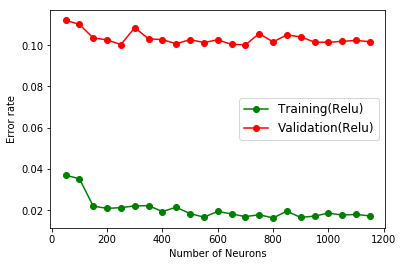

In [56]:
#plt.figure(figsize = (20,16))
plt.plot(Nron_size_list_FR, Train_error_list_FR, 'go-', label = "Training(Relu)")
plt.plot(Nron_size_list_FR, Val_error_list_FR, 'ro-', label = "Validation(Relu)")


plt.xlabel('Number of Neurons')
plt.ylabel('Error rate')
plt.legend( fontsize=12)
#plt.xlim(0, 1000)

In [57]:
Nron_opt2 = Nron_size_list_FR[np.argmin(Val_error_list_FR)]
Nron_opt2

700

In [58]:
Nron_size_list_FR = []
Train_error_list_FR = []
Val_error_list_FR = []
Train_time_list_FR = []
Val_time_list_FR = []

from sklearn.model_selection import train_test_split

for j in range(50,1200,50):

#[250, 275, 300,325, 350,375, 400, 425, 450, 784]:

    Nron_size_list_FR.append(j)
    print('Neuron_set_size:', j)
    
    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train_scaled, y_train, test_size = 0, random_state = 42)
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf_nron = tf.contrib.learn.DNNClassifier(hidden_units=[Nron_opt1,Nron_opt2,j], n_classes=10, activation_fn=tf.nn.relu,feature_columns=feature_columns, config=config)
    dnn_1_clf_nron = tf.contrib.learn.SKCompat(dnn_1_clf_nron) # if TensorFlow >= 1.1
    #dnn_1_clf.fit(X_train_partial, y_train_partial, batch_size=50, max_steps=40000)
    
    start=datetime.now()
    dnn_1_clf_nron.fit(X_train_scaled_partial, y_train_partial, batch_size=120,  steps=5500 )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf_nron training time', Train_elapse)
    Train_time_list_FR.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf_nron.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    
    #print(dnn_1_clf.score(X_train_partial))##doesn't work. it has no score method

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf_nron.predict(X_val_scaled)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    #print('dnn_1_clf val time', Val_elapse)
    Val_time_list_FR.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
    #Val_error = 1 - cross_val_score(dnn_1_clf, X_train_partial, y_train_partial, n_jobs = 3, cv=3, scoring="accuracy").mean()  
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_FR.append(Train_error)
    Val_error_list_FR.append(Val_error)
    
print("Nron_size_list_FR: ", Nron_size_list_FR)
print("Train_error_list_FR: ", Train_error_list_FR)
print("Val_error_list_FR: ", Val_error_list_FR)
print("Train_time_list_FR: ", Train_time_list_FR)
print("Val_time_list_FR: ", Val_time_list_FR)  

Neuron_set_size: 50
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001907F813BA8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpvhuljybq'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I

INFO:tensorflow:loss = 0.13590887, step = 3000 (0.231 sec)
INFO:tensorflow:global_step/sec: 574.193
INFO:tensorflow:loss = 0.16047779, step = 3100 (0.174 sec)
INFO:tensorflow:global_step/sec: 584.261
INFO:tensorflow:loss = 0.112861365, step = 3200 (0.171 sec)
INFO:tensorflow:global_step/sec: 520.356
INFO:tensorflow:loss = 0.17354327, step = 3300 (0.193 sec)
INFO:tensorflow:global_step/sec: 509.744
INFO:tensorflow:loss = 0.10603986, step = 3400 (0.195 sec)
INFO:tensorflow:global_step/sec: 480.332
INFO:tensorflow:loss = 0.11284371, step = 3500 (0.208 sec)
INFO:tensorflow:global_step/sec: 499.542
INFO:tensorflow:loss = 0.093108624, step = 3600 (0.200 sec)
INFO:tensorflow:global_step/sec: 497.063
INFO:tensorflow:loss = 0.15518713, step = 3700 (0.201 sec)
INFO:tensorflow:global_step/sec: 574.19
INFO:tensorflow:loss = 0.08926094, step = 3800 (0.175 sec)
INFO:tensorflow:global_step/sec: 458.298
INFO:tensorflow:loss = 0.12805097, step = 3900 (0.218 sec)
INFO:tensorflow:global_step/sec: 570.908

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpvhuljybq\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.019419999999999993 / 0.10289999999999999
Neuron_set_size: 100
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED8E51518>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_chec

INFO:tensorflow:global_step/sec: 584.263
INFO:tensorflow:loss = 0.5771841, step = 200 (0.171 sec)
INFO:tensorflow:global_step/sec: 580.868
INFO:tensorflow:loss = 0.31601116, step = 300 (0.171 sec)
INFO:tensorflow:global_step/sec: 580.865
INFO:tensorflow:loss = 0.45929238, step = 400 (0.173 sec)
INFO:tensorflow:global_step/sec: 570.91
INFO:tensorflow:loss = 0.26682365, step = 500 (0.174 sec)
INFO:tensorflow:global_step/sec: 574.19
INFO:tensorflow:loss = 0.21132551, step = 600 (0.174 sec)
INFO:tensorflow:global_step/sec: 574.191
INFO:tensorflow:loss = 0.4115718, step = 700 (0.175 sec)
INFO:tensorflow:global_step/sec: 564.459
INFO:tensorflow:loss = 0.21446733, step = 800 (0.176 sec)
INFO:tensorflow:global_step/sec: 570.908
INFO:tensorflow:loss = 0.25469035, step = 900 (0.176 sec)
INFO:tensorflow:global_step/sec: 577.507
INFO:tensorflow:loss = 0.36771902, step = 1000 (0.173 sec)
INFO:tensorflow:global_step/sec: 574.192
INFO:tensorflow:loss = 0.22517185, step = 1100 (0.173 sec)
INFO:tensorf

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpm7gb3ema\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpm7gb3ema\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.017159999999999953 / 0.10289999999999999
Neuron_set_size: 150
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED5BE5E48>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_m

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmphn9zg4l1\model.ckpt.
INFO:tensorflow:loss = 2.668898, step = 0
INFO:tensorflow:global_step/sec: 418.028
INFO:tensorflow:loss = 0.46098226, step = 100 (0.240 sec)
INFO:tensorflow:global_step/sec: 411.148
INFO:tensorflow:loss = 0.6062824, step = 200 (0.243 sec)
INFO:tensorflow:global_step/sec: 482.654
INFO:tensorflow:loss = 0.32120228, step = 300 (0.207 sec)
INFO:tensorflow:global_step/sec: 570.908
INFO:tensorflow:loss = 0.45676863, step = 400 (0.174 sec)
INFO:tensorflow:global_step/sec: 489.75
INFO:tensorflow:loss = 0.2583099, step = 500 (0.204 sec)
INFO:tensorflow:global_step/sec: 514.996
INFO:tensorflow:loss = 0.2094641, step = 600 (0.195 sec)
INFO:tensorflow:global_step/sec: 574.189
INFO:tensorflow:loss = 0.40781453, step = 700 (0.173 sec)
I

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmphn9zg4l1\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmphn9zg4l1\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.02088000000000001 / 0.10260000000000002
Neuron_set_size: 200
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED76343C8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_me

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpstu3si75\model.ckpt.
INFO:tensorflow:loss = 2.558704, step = 0
INFO:tensorflow:global_step/sec: 478.036
INFO:tensorflow:loss = 0.490586, step = 100 (0.211 sec)
INFO:tensorflow:global_step/sec: 567.663
INFO:tensorflow:loss = 0.57741266, step = 200 (0.175 sec)
INFO:tensorflow:global_step/sec: 570.909
INFO:tensorflow:loss = 0.33002135, step = 300 (0.175 sec)
INFO:tensorflow:global_step/sec: 570.909
INFO:tensorflow:loss = 0.46420574, step = 400 (0.175 sec)
INFO:tensorflow:global_step/sec: 567.666
INFO:tensorflow:loss = 0.27106363, step = 500 (0.177 sec)
INFO:tensorflow:global_step/sec: 555.05
INFO:tensorflow:loss = 0.21674234, step = 600 (0.179 sec)
INFO:tensorflow:global_step/sec: 564.456
INFO:tensorflow:loss = 0.4360328, step = 700 (0.177 sec)
I

INFO:tensorflow:global_step/sec: 555.054
INFO:tensorflow:loss = 0.10978707, step = 4000 (0.180 sec)
INFO:tensorflow:global_step/sec: 558.15
INFO:tensorflow:loss = 0.100863785, step = 4100 (0.179 sec)
INFO:tensorflow:global_step/sec: 567.663
INFO:tensorflow:loss = 0.0304442, step = 4200 (0.177 sec)
INFO:tensorflow:global_step/sec: 567.667
INFO:tensorflow:loss = 0.13940631, step = 4300 (0.175 sec)
INFO:tensorflow:global_step/sec: 570.908
INFO:tensorflow:loss = 0.13545981, step = 4400 (0.176 sec)
INFO:tensorflow:global_step/sec: 570.911
INFO:tensorflow:loss = 0.0889215, step = 4500 (0.174 sec)
INFO:tensorflow:global_step/sec: 561.286
INFO:tensorflow:loss = 0.030493598, step = 4600 (0.179 sec)
INFO:tensorflow:global_step/sec: 570.909
INFO:tensorflow:loss = 0.14051065, step = 4700 (0.175 sec)
INFO:tensorflow:global_step/sec: 567.663
INFO:tensorflow:loss = 0.07758497, step = 4800 (0.175 sec)
INFO:tensorflow:global_step/sec: 570.912
INFO:tensorflow:loss = 0.12374721, step = 4900 (0.176 sec)
I

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpstu3si75\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.016800000000000037 / 0.10270000000000001
Neuron_set_size: 250
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001907F893EF0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_chec

INFO:tensorflow:global_step/sec: 567.664
INFO:tensorflow:loss = 0.22531256, step = 1200 (0.177 sec)
INFO:tensorflow:global_step/sec: 564.46
INFO:tensorflow:loss = 0.20525713, step = 1300 (0.177 sec)
INFO:tensorflow:global_step/sec: 564.458
INFO:tensorflow:loss = 0.24681216, step = 1400 (0.176 sec)
INFO:tensorflow:global_step/sec: 567.665
INFO:tensorflow:loss = 0.36262313, step = 1500 (0.177 sec)
INFO:tensorflow:global_step/sec: 570.909
INFO:tensorflow:loss = 0.17110972, step = 1600 (0.175 sec)
INFO:tensorflow:global_step/sec: 564.458
INFO:tensorflow:loss = 0.19509138, step = 1700 (0.176 sec)
INFO:tensorflow:global_step/sec: 564.458
INFO:tensorflow:loss = 0.14660046, step = 1800 (0.178 sec)
INFO:tensorflow:global_step/sec: 564.457
INFO:tensorflow:loss = 0.21528813, step = 1900 (0.176 sec)
INFO:tensorflow:global_step/sec: 561.287
INFO:tensorflow:loss = 0.15768105, step = 2000 (0.178 sec)
INFO:tensorflow:global_step/sec: 564.457
INFO:tensorflow:loss = 0.11593374, step = 2100 (0.177 sec)
I

INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp9r7drg16\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp9r7drg16\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.019279999999999964 / 0.10460000000000003
Neuron_set_size: 300
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECDB0B5C0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_s

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpsggbah1f\model.ckpt.
INFO:tensorflow:loss = 2.6949077, step = 0
INFO:tensorflow:global_step/sec: 469.058
INFO:tensorflow:loss = 0.49372008, step = 100 (0.215 sec)
INFO:tensorflow:global_step/sec: 542.984
INFO:tensorflow:loss = 0.5634101, step = 200 (0.184 sec)
INFO:tensorflow:global_step/sec: 545.951
INFO:tensorflow:loss = 0.32800955, step = 300 (0.183 sec)
INFO:tensorflow:global_step/sec: 542.981
INFO:tensorflow:loss = 0.46038932, step = 400 (0.184 sec)
INFO:tensorflow:global_step/sec: 545.953
INFO:tensorflow:loss = 0.25513342, step = 500 (0.182 sec)
INFO:tensorflow:global_step/sec: 545.952
INFO:tensorflow:loss = 0.2211682, step = 600 (0.184 sec)
INFO:tensorflow:global_step/sec: 537.144
INFO:tensorflow:loss = 0.4267767, step = 700 (0.185 sec)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpsggbah1f\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpsggbah1f\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.019000000000000017 / 0.1018
Neuron_set_size: 350
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED7299710>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fractio

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp4js37e8s\model.ckpt.
INFO:tensorflow:loss = 2.5842154, step = 0
INFO:tensorflow:global_step/sec: 452.077
INFO:tensorflow:loss = 0.49866474, step = 100 (0.223 sec)
INFO:tensorflow:global_step/sec: 534.274
INFO:tensorflow:loss = 0.55888265, step = 200 (0.186 sec)
INFO:tensorflow:global_step/sec: 517.664
INFO:tensorflow:loss = 0.3380069, step = 300 (0.193 sec)
INFO:tensorflow:global_step/sec: 523.082
INFO:tensorflow:loss = 0.4495482, step = 400 (0.191 sec)
INFO:tensorflow:global_step/sec: 434.388
INFO:tensorflow:loss = 0.26898545, step = 500 (0.230 sec)
INFO:tensorflow:global_step/sec: 440.128
INFO:tensorflow:loss = 0.21053942, step = 600 (0.227 sec)
INFO:tensorflow:global_step/sec: 504.593
INFO:tensorflow:loss = 0.40095282, step = 700 (0.199 sec

INFO:tensorflow:global_step/sec: 564.458
INFO:tensorflow:loss = 0.11558549, step = 4500 (0.176 sec)
INFO:tensorflow:global_step/sec: 564.457
INFO:tensorflow:loss = 0.026285471, step = 4600 (0.177 sec)
INFO:tensorflow:global_step/sec: 561.286
INFO:tensorflow:loss = 0.107737854, step = 4700 (0.178 sec)
INFO:tensorflow:global_step/sec: 567.665
INFO:tensorflow:loss = 0.07165138, step = 4800 (0.176 sec)
INFO:tensorflow:global_step/sec: 534.274
INFO:tensorflow:loss = 0.16058832, step = 4900 (0.188 sec)
INFO:tensorflow:global_step/sec: 567.665
INFO:tensorflow:loss = 0.13595144, step = 5000 (0.176 sec)
INFO:tensorflow:global_step/sec: 545.953
INFO:tensorflow:loss = 0.0226888, step = 5100 (0.183 sec)
INFO:tensorflow:global_step/sec: 551.982
INFO:tensorflow:loss = 0.058110952, step = 5200 (0.181 sec)
INFO:tensorflow:global_step/sec: 574.19
INFO:tensorflow:loss = 0.050053913, step = 5300 (0.174 sec)
INFO:tensorflow:global_step/sec: 564.458
INFO:tensorflow:loss = 0.15226653, step = 5400 (0.176 sec

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp4js37e8s\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.01637999999999995 / 0.10250000000000004
Neuron_set_size: 400
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED91D8B00>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_check

INFO:tensorflow:loss = 0.17234674, step = 2200 (0.191 sec)
INFO:tensorflow:global_step/sec: 507.154
INFO:tensorflow:loss = 0.1888396, step = 2300 (0.197 sec)
INFO:tensorflow:global_step/sec: 480.333
INFO:tensorflow:loss = 0.2083324, step = 2400 (0.208 sec)
INFO:tensorflow:global_step/sec: 584.26
INFO:tensorflow:loss = 0.16049007, step = 2500 (0.172 sec)
INFO:tensorflow:global_step/sec: 567.665
INFO:tensorflow:loss = 0.13317294, step = 2600 (0.176 sec)
INFO:tensorflow:global_step/sec: 458.298
INFO:tensorflow:loss = 0.1252731, step = 2700 (0.218 sec)
INFO:tensorflow:global_step/sec: 484.997
INFO:tensorflow:loss = 0.20452116, step = 2800 (0.206 sec)
INFO:tensorflow:global_step/sec: 574.19
INFO:tensorflow:loss = 0.10984274, step = 2900 (0.173 sec)
INFO:tensorflow:global_step/sec: 471.269
INFO:tensorflow:loss = 0.1269051, step = 3000 (0.213 sec)
INFO:tensorflow:global_step/sec: 444.041
INFO:tensorflow:loss = 0.14872536, step = 3100 (0.225 sec)
INFO:tensorflow:global_step/sec: 570.908
INFO:t

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpj8jwqm49\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.01639999999999997 / 0.10229999999999995
Neuron_set_size: 450
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED56F12E8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_check

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpqgqyonbw\model.ckpt.
INFO:tensorflow:loss = 2.4864802, step = 0
INFO:tensorflow:global_step/sec: 391.8
INFO:tensorflow:loss = 0.49604455, step = 100 (0.257 sec)
INFO:tensorflow:global_step/sec: 480.325
INFO:tensorflow:loss = 0.5884789, step = 200 (0.208 sec)
INFO:tensorflow:global_step/sec: 458.305
INFO:tensorflow:loss = 0.3379654, step = 300 (0.217 sec)
INFO:tensorflow:global_step/sec: 542.984
INFO:tensorflow:loss = 0.45563853, step = 400 (0.184 sec)
INFO:tensorflow:global_step/sec: 561.288
INFO:tensorflow:loss = 0.27774957, step = 500 (0.179 sec)
INFO:tensorflow:global_step/sec: 561.285
INFO:tensorflow:loss = 0.21092145, step = 600 (0.177 sec)
INFO:tensorflow:global_step/sec: 567.665
INFO:tensorflow:loss = 0.42615414, step = 700 (0.177 sec)


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpqgqyonbw\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpqgqyonbw\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.016260000000000052 / 0.09960000000000002
Neuron_set_size: 500
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED90E0160>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_m

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpfl71tugp\model.ckpt.
INFO:tensorflow:loss = 2.5504382, step = 0
INFO:tensorflow:global_step/sec: 466.866
INFO:tensorflow:loss = 0.5059137, step = 100 (0.215 sec)
INFO:tensorflow:global_step/sec: 548.947
INFO:tensorflow:loss = 0.61304253, step = 200 (0.182 sec)
INFO:tensorflow:global_step/sec: 545.954
INFO:tensorflow:loss = 0.32722145, step = 300 (0.182 sec)
INFO:tensorflow:global_step/sec: 537.146
INFO:tensorflow:loss = 0.44297096, step = 400 (0.186 sec)
INFO:tensorflow:global_step/sec: 551.982
INFO:tensorflow:loss = 0.26031724, step = 500 (0.181 sec)
INFO:tensorflow:global_step/sec: 558.151
INFO:tensorflow:loss = 0.2007199, step = 600 (0.179 sec)
INFO:tensorflow:global_step/sec: 561.287
INFO:tensorflow:loss = 0.4065773, step = 700 (0.178 sec)

INFO:tensorflow:Saving checkpoints for 5500 into C:\Users\cstra\AppData\Local\Temp\tmpfl71tugp\model.ckpt.
INFO:tensorflow:Loss for final step: 0.038882304.
dnn_1_clf_nron training time 11.319292
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpfl71tugp\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpfl71tugp\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.014780000000000015 / 0.10270000000000001
Neuron_set_size: 550
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED7299630>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_eve

INFO:tensorflow:global_step/sec: 577.509
INFO:tensorflow:loss = 0.18627118, step = 2800 (0.172 sec)
INFO:tensorflow:global_step/sec: 584.263
INFO:tensorflow:loss = 0.13292676, step = 2900 (0.171 sec)
INFO:tensorflow:global_step/sec: 580.865
INFO:tensorflow:loss = 0.1281259, step = 3000 (0.173 sec)
INFO:tensorflow:global_step/sec: 577.511
INFO:tensorflow:loss = 0.13511738, step = 3100 (0.172 sec)
INFO:tensorflow:global_step/sec: 580.865
INFO:tensorflow:loss = 0.08406041, step = 3200 (0.172 sec)
INFO:tensorflow:global_step/sec: 580.868
INFO:tensorflow:loss = 0.16711576, step = 3300 (0.173 sec)
INFO:tensorflow:global_step/sec: 580.867
INFO:tensorflow:loss = 0.120432325, step = 3400 (0.171 sec)
INFO:tensorflow:global_step/sec: 574.19
INFO:tensorflow:loss = 0.11276428, step = 3500 (0.174 sec)
INFO:tensorflow:global_step/sec: 577.509
INFO:tensorflow:loss = 0.10342375, step = 3600 (0.173 sec)
INFO:tensorflow:global_step/sec: 551.985
INFO:tensorflow:loss = 0.23595423, step = 3700 (0.182 sec)
I

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp8izpmcue\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.019320000000000004 / 0.10540000000000005
Neuron_set_size: 600
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED74D5908>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_chec

INFO:tensorflow:global_step/sec: 418.029
INFO:tensorflow:loss = 0.5788714, step = 200 (0.240 sec)
INFO:tensorflow:global_step/sec: 507.153
INFO:tensorflow:loss = 0.3416976, step = 300 (0.197 sec)
INFO:tensorflow:global_step/sec: 464.692
INFO:tensorflow:loss = 0.4935299, step = 400 (0.215 sec)
INFO:tensorflow:global_step/sec: 555.052
INFO:tensorflow:loss = 0.2704092, step = 500 (0.179 sec)
INFO:tensorflow:global_step/sec: 471.268
INFO:tensorflow:loss = 0.19522287, step = 600 (0.213 sec)
INFO:tensorflow:global_step/sec: 545.954
INFO:tensorflow:loss = 0.39957935, step = 700 (0.182 sec)
INFO:tensorflow:global_step/sec: 448.022
INFO:tensorflow:loss = 0.20933956, step = 800 (0.223 sec)
INFO:tensorflow:global_step/sec: 555.05
INFO:tensorflow:loss = 0.22144392, step = 900 (0.180 sec)
INFO:tensorflow:global_step/sec: 561.289
INFO:tensorflow:loss = 0.351725, step = 1000 (0.178 sec)
INFO:tensorflow:global_step/sec: 561.284
INFO:tensorflow:loss = 0.22703168, step = 1100 (0.178 sec)
INFO:tensorflow

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpeodkb2rv\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpeodkb2rv\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.017880000000000007 / 0.10199999999999998
Neuron_set_size: 650
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000019077BBCBE0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_m

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpyd1xizth\model.ckpt.
INFO:tensorflow:loss = 2.396987, step = 0
INFO:tensorflow:global_step/sec: 428.795
INFO:tensorflow:loss = 0.5033795, step = 100 (0.234 sec)
INFO:tensorflow:global_step/sec: 523.086
INFO:tensorflow:loss = 0.61728734, step = 200 (0.191 sec)
INFO:tensorflow:global_step/sec: 478.033
INFO:tensorflow:loss = 0.34100482, step = 300 (0.210 sec)
INFO:tensorflow:global_step/sec: 502.055
INFO:tensorflow:loss = 0.44949687, step = 400 (0.198 sec)
INFO:tensorflow:global_step/sec: 512.354
INFO:tensorflow:loss = 0.25709412, step = 500 (0.195 sec)
INFO:tensorflow:global_step/sec: 525.838
INFO:tensorflow:loss = 0.22626919, step = 600 (0.191 sec)
INFO:tensorflow:global_step/sec: 540.048
INFO:tensorflow:loss = 0.42112833, step = 700 (0.184 sec

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpyd1xizth\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpyd1xizth\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.021599999999999953 / 0.10670000000000002
Neuron_set_size: 700
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED922CF28>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_m

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp3dw81eq3\model.ckpt.
INFO:tensorflow:loss = 2.6033416, step = 0
INFO:tensorflow:global_step/sec: 426.962
INFO:tensorflow:loss = 0.4815525, step = 100 (0.235 sec)
INFO:tensorflow:global_step/sec: 517.664
INFO:tensorflow:loss = 0.58977866, step = 200 (0.193 sec)
INFO:tensorflow:global_step/sec: 528.619
INFO:tensorflow:loss = 0.34404105, step = 300 (0.189 sec)
INFO:tensorflow:global_step/sec: 456.206
INFO:tensorflow:loss = 0.45622423, step = 400 (0.220 sec)
INFO:tensorflow:global_step/sec: 466.865
INFO:tensorflow:loss = 0.27791163, step = 500 (0.214 sec)
INFO:tensorflow:global_step/sec: 497.061
INFO:tensorflow:loss = 0.2059658, step = 600 (0.200 sec)
INFO:tensorflow:global_step/sec: 542.986
INFO:tensorflow:loss = 0.39721826, step = 700 (0.185 sec

INFO:tensorflow:global_step/sec: 494.6
INFO:tensorflow:loss = 0.114256926, step = 4000 (0.203 sec)
INFO:tensorflow:global_step/sec: 442.074
INFO:tensorflow:loss = 0.124050476, step = 4100 (0.225 sec)
INFO:tensorflow:global_step/sec: 520.363
INFO:tensorflow:loss = 0.042656943, step = 4200 (0.193 sec)
INFO:tensorflow:global_step/sec: 555.048
INFO:tensorflow:loss = 0.14704992, step = 4300 (0.179 sec)
INFO:tensorflow:global_step/sec: 545.952
INFO:tensorflow:loss = 0.13408075, step = 4400 (0.183 sec)
INFO:tensorflow:global_step/sec: 551.984
INFO:tensorflow:loss = 0.10928024, step = 4500 (0.182 sec)
INFO:tensorflow:global_step/sec: 555.05
INFO:tensorflow:loss = 0.03895257, step = 4600 (0.179 sec)
INFO:tensorflow:global_step/sec: 545.951
INFO:tensorflow:loss = 0.10103076, step = 4700 (0.183 sec)
INFO:tensorflow:global_step/sec: 489.751
INFO:tensorflow:loss = 0.048106894, step = 4800 (0.205 sec)
INFO:tensorflow:global_step/sec: 471.27
INFO:tensorflow:loss = 0.17096747, step = 4900 (0.212 sec)


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp3dw81eq3\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.01639999999999997 / 0.10340000000000005
Neuron_set_size: 750
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED8E419B0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_check

INFO:tensorflow:global_step/sec: 570.908
INFO:tensorflow:loss = 0.2010977, step = 1200 (0.175 sec)
INFO:tensorflow:global_step/sec: 564.459
INFO:tensorflow:loss = 0.20033988, step = 1300 (0.177 sec)
INFO:tensorflow:global_step/sec: 561.289
INFO:tensorflow:loss = 0.25699311, step = 1400 (0.178 sec)
INFO:tensorflow:global_step/sec: 537.144
INFO:tensorflow:loss = 0.3763381, step = 1500 (0.186 sec)
INFO:tensorflow:global_step/sec: 555.052
INFO:tensorflow:loss = 0.1595869, step = 1600 (0.181 sec)
INFO:tensorflow:global_step/sec: 545.949
INFO:tensorflow:loss = 0.18098092, step = 1700 (0.182 sec)
INFO:tensorflow:global_step/sec: 537.147
INFO:tensorflow:loss = 0.14693603, step = 1800 (0.187 sec)
INFO:tensorflow:global_step/sec: 542.982
INFO:tensorflow:loss = 0.18303297, step = 1900 (0.183 sec)
INFO:tensorflow:global_step/sec: 531.432
INFO:tensorflow:loss = 0.16188253, step = 2000 (0.188 sec)
INFO:tensorflow:global_step/sec: 537.145
INFO:tensorflow:loss = 0.12109579, step = 2100 (0.186 sec)
INF

INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpysqsifkg\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpysqsifkg\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.01422000000000001 / 0.10009999999999997
Neuron_set_size: 800
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED90E04A8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_se

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpjmfylxol\model.ckpt.
INFO:tensorflow:loss = 2.3840795, step = 0
INFO:tensorflow:global_step/sec: 423.343
INFO:tensorflow:loss = 0.5112317, step = 100 (0.237 sec)
INFO:tensorflow:global_step/sec: 509.741
INFO:tensorflow:loss = 0.5987265, step = 200 (0.196 sec)
INFO:tensorflow:global_step/sec: 537.145
INFO:tensorflow:loss = 0.348157, step = 300 (0.186 sec)
INFO:tensorflow:global_step/sec: 497.06
INFO:tensorflow:loss = 0.46820349, step = 400 (0.201 sec)
INFO:tensorflow:global_step/sec: 497.061
INFO:tensorflow:loss = 0.2728469, step = 500 (0.201 sec)
INFO:tensorflow:global_step/sec: 548.95
INFO:tensorflow:loss = 0.20141238, step = 600 (0.182 sec)
INFO:tensorflow:global_step/sec: 542.984
INFO:tensorflow:loss = 0.41670984, step = 700 (0.184 sec)
INF

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpjmfylxol\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpjmfylxol\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.01658000000000004 / 0.10350000000000004
Neuron_set_size: 850
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED5C76320>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_me

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpr8c9z9_l\model.ckpt.
INFO:tensorflow:loss = 2.4546416, step = 0
INFO:tensorflow:global_step/sec: 456.207
INFO:tensorflow:loss = 0.49821454, step = 100 (0.221 sec)
INFO:tensorflow:global_step/sec: 528.617
INFO:tensorflow:loss = 0.59966975, step = 200 (0.188 sec)
INFO:tensorflow:global_step/sec: 534.274
INFO:tensorflow:loss = 0.34056494, step = 300 (0.187 sec)
INFO:tensorflow:global_step/sec: 545.951
INFO:tensorflow:loss = 0.4642435, step = 400 (0.184 sec)
INFO:tensorflow:global_step/sec: 534.274
INFO:tensorflow:loss = 0.26418582, step = 500 (0.186 sec)
INFO:tensorflow:global_step/sec: 534.272
INFO:tensorflow:loss = 0.21097313, step = 600 (0.187 sec)
INFO:tensorflow:global_step/sec: 551.984
INFO:tensorflow:loss = 0.42569888, step = 700 (0.181 se

INFO:tensorflow:Saving checkpoints for 5500 into C:\Users\cstra\AppData\Local\Temp\tmpr8c9z9_l\model.ckpt.
INFO:tensorflow:Loss for final step: 0.043269053.
dnn_1_clf_nron training time 11.506462
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpr8c9z9_l\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpr8c9z9_l\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.015199999999999991 / 0.10399999999999998
Neuron_set_size: 900
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC32C710>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_eve

INFO:tensorflow:global_step/sec: 514.995
INFO:tensorflow:loss = 0.1961007, step = 2800 (0.194 sec)
INFO:tensorflow:global_step/sec: 523.086
INFO:tensorflow:loss = 0.106830485, step = 2900 (0.191 sec)
INFO:tensorflow:global_step/sec: 525.835
INFO:tensorflow:loss = 0.11850488, step = 3000 (0.190 sec)
INFO:tensorflow:global_step/sec: 520.362
INFO:tensorflow:loss = 0.1670858, step = 3100 (0.192 sec)
INFO:tensorflow:global_step/sec: 540.048
INFO:tensorflow:loss = 0.09648388, step = 3200 (0.185 sec)
INFO:tensorflow:global_step/sec: 528.619
INFO:tensorflow:loss = 0.16273159, step = 3300 (0.190 sec)
INFO:tensorflow:global_step/sec: 507.153
INFO:tensorflow:loss = 0.08905271, step = 3400 (0.197 sec)
INFO:tensorflow:global_step/sec: 540.051
INFO:tensorflow:loss = 0.104043655, step = 3500 (0.184 sec)
INFO:tensorflow:global_step/sec: 545.949
INFO:tensorflow:loss = 0.102321, step = 3600 (0.184 sec)
INFO:tensorflow:global_step/sec: 551.984
INFO:tensorflow:loss = 0.17819212, step = 3700 (0.180 sec)
IN

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp2w8kj5b9\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.018140000000000045 / 0.10550000000000004
Neuron_set_size: 950
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001907FA7A4A8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_chec

INFO:tensorflow:global_step/sec: 537.147
INFO:tensorflow:loss = 0.5595958, step = 200 (0.187 sec)
INFO:tensorflow:global_step/sec: 512.353
INFO:tensorflow:loss = 0.33579978, step = 300 (0.194 sec)
INFO:tensorflow:global_step/sec: 545.954
INFO:tensorflow:loss = 0.45021674, step = 400 (0.183 sec)
INFO:tensorflow:global_step/sec: 542.982
INFO:tensorflow:loss = 0.24604586, step = 500 (0.185 sec)
INFO:tensorflow:global_step/sec: 520.36
INFO:tensorflow:loss = 0.20452061, step = 600 (0.191 sec)
INFO:tensorflow:global_step/sec: 542.984
INFO:tensorflow:loss = 0.42567813, step = 700 (0.184 sec)
INFO:tensorflow:global_step/sec: 534.274
INFO:tensorflow:loss = 0.21558109, step = 800 (0.188 sec)
INFO:tensorflow:global_step/sec: 545.951
INFO:tensorflow:loss = 0.23390226, step = 900 (0.182 sec)
INFO:tensorflow:global_step/sec: 555.05
INFO:tensorflow:loss = 0.36291268, step = 1000 (0.181 sec)
INFO:tensorflow:global_step/sec: 545.952
INFO:tensorflow:loss = 0.2298269, step = 1100 (0.182 sec)
INFO:tensorf

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpmd78x8kc\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpmd78x8kc\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.017220000000000013 / 0.1049
Neuron_set_size: 1000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECC55E940>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fracti

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmp3nafq6a4\model.ckpt.
INFO:tensorflow:loss = 2.4582644, step = 0
INFO:tensorflow:global_step/sec: 456.207
INFO:tensorflow:loss = 0.47782403, step = 100 (0.220 sec)
INFO:tensorflow:global_step/sec: 531.432
INFO:tensorflow:loss = 0.5890367, step = 200 (0.188 sec)
INFO:tensorflow:global_step/sec: 551.982
INFO:tensorflow:loss = 0.3395251, step = 300 (0.181 sec)
INFO:tensorflow:global_step/sec: 555.052
INFO:tensorflow:loss = 0.466625, step = 400 (0.180 sec)
INFO:tensorflow:global_step/sec: 548.951
INFO:tensorflow:loss = 0.2656782, step = 500 (0.182 sec)
INFO:tensorflow:global_step/sec: 540.049
INFO:tensorflow:loss = 0.21325402, step = 600 (0.185 sec)
INFO:tensorflow:global_step/sec: 542.984
INFO:tensorflow:loss = 0.41899455, step = 700 (0.184 sec)
I

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp3nafq6a4\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp3nafq6a4\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.02295999999999998 / 0.1069
Neuron_set_size: 1050
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED752A080>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fractio

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpakps0mno\model.ckpt.
INFO:tensorflow:loss = 2.4306252, step = 0
INFO:tensorflow:global_step/sec: 454.132
INFO:tensorflow:loss = 0.49822608, step = 100 (0.221 sec)
INFO:tensorflow:global_step/sec: 523.085
INFO:tensorflow:loss = 0.5900894, step = 200 (0.191 sec)
INFO:tensorflow:global_step/sec: 534.273
INFO:tensorflow:loss = 0.34258735, step = 300 (0.187 sec)
INFO:tensorflow:global_step/sec: 545.951
INFO:tensorflow:loss = 0.46912766, step = 400 (0.183 sec)
INFO:tensorflow:global_step/sec: 545.951
INFO:tensorflow:loss = 0.27328613, step = 500 (0.183 sec)
INFO:tensorflow:global_step/sec: 548.952
INFO:tensorflow:loss = 0.20042133, step = 600 (0.182 sec)
INFO:tensorflow:global_step/sec: 548.95
INFO:tensorflow:loss = 0.39092678, step = 700 (0.182 sec

INFO:tensorflow:global_step/sec: 540.049
INFO:tensorflow:loss = 0.121473745, step = 4500 (0.184 sec)
INFO:tensorflow:global_step/sec: 531.431
INFO:tensorflow:loss = 0.032657027, step = 4600 (0.188 sec)
INFO:tensorflow:global_step/sec: 540.048
INFO:tensorflow:loss = 0.11008929, step = 4700 (0.185 sec)
INFO:tensorflow:global_step/sec: 548.954
INFO:tensorflow:loss = 0.053849112, step = 4800 (0.182 sec)
INFO:tensorflow:global_step/sec: 551.982
INFO:tensorflow:loss = 0.14864384, step = 4900 (0.181 sec)
INFO:tensorflow:global_step/sec: 520.36
INFO:tensorflow:loss = 0.088355295, step = 5000 (0.192 sec)
INFO:tensorflow:global_step/sec: 537.147
INFO:tensorflow:loss = 0.029221091, step = 5100 (0.187 sec)
INFO:tensorflow:global_step/sec: 548.95
INFO:tensorflow:loss = 0.06262112, step = 5200 (0.181 sec)
INFO:tensorflow:global_step/sec: 548.951
INFO:tensorflow:loss = 0.06071076, step = 5300 (0.182 sec)
INFO:tensorflow:global_step/sec: 555.051
INFO:tensorflow:loss = 0.085268825, step = 5400 (0.180 s

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpakps0mno\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.016979999999999995 / 0.10170000000000001
Neuron_set_size: 1100
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED5BE0828>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_che

INFO:tensorflow:loss = 0.16819784, step = 2200 (0.184 sec)
INFO:tensorflow:global_step/sec: 545.951
INFO:tensorflow:loss = 0.20534404, step = 2300 (0.183 sec)
INFO:tensorflow:global_step/sec: 540.049
INFO:tensorflow:loss = 0.20226447, step = 2400 (0.186 sec)
INFO:tensorflow:global_step/sec: 537.145
INFO:tensorflow:loss = 0.16566254, step = 2500 (0.185 sec)
INFO:tensorflow:global_step/sec: 540.051
INFO:tensorflow:loss = 0.112180024, step = 2600 (0.186 sec)
INFO:tensorflow:global_step/sec: 537.145
INFO:tensorflow:loss = 0.12489402, step = 2700 (0.186 sec)
INFO:tensorflow:global_step/sec: 542.985
INFO:tensorflow:loss = 0.17798202, step = 2800 (0.184 sec)
INFO:tensorflow:global_step/sec: 534.273
INFO:tensorflow:loss = 0.119060606, step = 2900 (0.186 sec)
INFO:tensorflow:global_step/sec: 540.048
INFO:tensorflow:loss = 0.11581494, step = 3000 (0.185 sec)
INFO:tensorflow:global_step/sec: 542.984
INFO:tensorflow:loss = 0.14193778, step = 3100 (0.184 sec)
INFO:tensorflow:global_step/sec: 540.05

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp4oudjrmf\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.021560000000000024 / 0.10470000000000002
Neuron_set_size: 1150
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED91DACF8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_che

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\cstra\AppData\Local\Temp\tmpkqy7_i5o\model.ckpt.
INFO:tensorflow:loss = 2.38736, step = 0
INFO:tensorflow:global_step/sec: 430.644
INFO:tensorflow:loss = 0.5103514, step = 100 (0.233 sec)
INFO:tensorflow:global_step/sec: 520.357
INFO:tensorflow:loss = 0.5994337, step = 200 (0.193 sec)
INFO:tensorflow:global_step/sec: 458.299
INFO:tensorflow:loss = 0.32792348, step = 300 (0.218 sec)
INFO:tensorflow:global_step/sec: 473.503
INFO:tensorflow:loss = 0.4529318, step = 400 (0.210 sec)
INFO:tensorflow:global_step/sec: 534.274
INFO:tensorflow:loss = 0.26957688, step = 500 (0.188 sec)
INFO:tensorflow:global_step/sec: 482.651
INFO:tensorflow:loss = 0.2119662, step = 600 (0.207 sec)
INFO:tensorflow:global_step/sec: 448.023
INFO:tensorflow:loss = 0.40617523, step = 700 (0.222 sec)
IN

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpkqy7_i5o\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpkqy7_i5o\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.015719999999999956 / 0.10199999999999998
Nron_size_list_FR:  [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150]
Train_error_list_FR:  [0.019419999999999993, 0.017159999999999953, 0.02088000000000001, 0.016800000000000037, 0.019279999999999964, 0.019000000000000017, 0.01637999999999995, 0.01639999999999997, 0.016260000000000052, 0.014780000000000015, 0.019320000000000004, 0.017880000000000007, 0.021599999999999953, 0.01639999999999997, 0.01422000000000001,

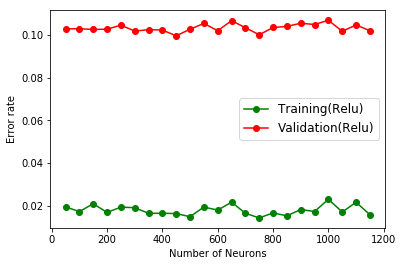

In [59]:
#plt.figure(figsize = (20,16))
plt.plot(Nron_size_list_FR, Train_error_list_FR, 'go-', label = "Training(Relu)")
plt.plot(Nron_size_list_FR, Val_error_list_FR, 'ro-', label = "Validation(Relu)")


plt.xlabel('Number of Neurons')
plt.ylabel('Error rate')
plt.legend( fontsize=12)
#plt.xlim(0, 1000)

In [60]:
Nron_opt3 = Nron_size_list_FR[np.argmin(Val_error_list_FR)]
Nron_opt3

450

Using the optimized neuron numbers and activation RELU to implement the classifier

In [ ]:
#In this section I checked the accuracy after each layer was added to see how each class changed as a new
#layer was added but in the report I only focues on the final result of 3.

In [61]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42)
# set the random seed for tensorflow initializers(for consistency between reruns)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled)
dnn_clf_opt = tf.contrib.learn.DNNClassifier(hidden_units=[Nron_opt1], n_classes=10,
                                         feature_columns=feature_columns, config=config)
dnn_clf_opt = tf.contrib.learn.SKCompat(dnn_clf_opt) # if TensorFlow >= 1.1
dnn_clf_opt.fit(X_train_scaled, y_train, batch_size=120, steps=11000)


y_test_pred = dnn_clf_opt.predict(X_test_scaled)
accuracy_score(y_test, y_test_pred['classes'])

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ECDBB5AC8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpvab_a0um'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 718.77
INFO:tensorflow:loss = 0.09124609, step = 5100 (0.139 sec)
INFO:tensorflow:global_step/sec: 751.195
INFO:tensorflow:loss = 0.07095626, step = 5200 (0.134 sec)
INFO:tensorflow:global_step/sec: 729.264
INFO:tensorflow:loss = 0.11140779, step = 5300 (0.137 sec)
INFO:tensorflow:global_step/sec: 734.629
INFO:tensorflow:loss = 0.10016969, step = 5400 (0.136 sec)
INFO:tensorflow:global_step/sec: 723.973
INFO:tensorflow:loss = 0.06812199, step = 5500 (0.137 sec)
INFO:tensorflow:global_step/sec: 734.627
INFO:tensorflow:loss = 0.09668242, step = 5600 (0.136 sec)
INFO:tensorflow:global_step/sec: 689.025
INFO:tensorflow:loss = 0.13323501, step = 5700 (0.145 sec)
INFO:tensorflow:global_step/sec: 708.577
INFO:tensorflow:loss = 0.07286693, step = 5800 (0.141 sec)
INFO:tensorflow:global_step/sec: 718.771
INFO:tensorflow:loss = 0.08022049, step = 5900 (0.140 sec)
INFO:tensorflow:global_step/sec: 703.584
INFO:tensorflow:loss = 0.1972129, step = 6000 (0.141 sec)
IN

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.893

In [62]:
print(classification_report(y_test,y_test_pred['classes']))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.82      0.82      1000
           3       0.90      0.90      0.90      1000
           4       0.83      0.83      0.83      1000
           5       0.97      0.96      0.97      1000
           6       0.72      0.72      0.72      1000
           7       0.94      0.97      0.95      1000
           8       0.97      0.96      0.97      1000
           9       0.96      0.95      0.96      1000

   micro avg       0.89      0.89      0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [63]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42)
# set the random seed for tensorflow initializers(for consistency between reruns)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled)
dnn_clf_opt = tf.contrib.learn.DNNClassifier(hidden_units=[Nron_opt1,Nron_opt2], n_classes=10,
                                         feature_columns=feature_columns, config=config)
dnn_clf_opt = tf.contrib.learn.SKCompat(dnn_clf_opt) # if TensorFlow >= 1.1
dnn_clf_opt.fit(X_train_scaled, y_train, batch_size=120, steps=11000)


y_test_pred = dnn_clf_opt.predict(X_test_scaled)
accuracy_score(y_test, y_test_pred['classes'])

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001907F997D30>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmp4rn5faob'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:global_step/sec: 609.202
INFO:tensorflow:loss = 0.13093048, step = 4100 (0.165 sec)
INFO:tensorflow:global_step/sec: 570.911
INFO:tensorflow:loss = 0.094996825, step = 4200 (0.174 sec)
INFO:tensorflow:global_step/sec: 587.698
INFO:tensorflow:loss = 0.07235458, step = 4300 (0.170 sec)
INFO:tensorflow:global_step/sec: 561.287
INFO:tensorflow:loss = 0.07609486, step = 4400 (0.178 sec)
INFO:tensorflow:global_step/sec: 594.697
INFO:tensorflow:loss = 0.037149835, step = 4500 (0.168 sec)
INFO:tensorflow:global_step/sec: 605.508
INFO:tensorflow:loss = 0.12535155, step = 4600 (0.165 sec)
INFO:tensorflow:global_step/sec: 620.554
INFO:tensorflow:loss = 0.10050676, step = 4700 (0.161 sec)
INFO:tensorflow:global_step/sec: 601.865
INFO:tensorflow:loss = 0.070165984, step = 4800 (0.166 sec)
INFO:tensorflow:global_step/sec: 609.199
INFO:tensorflow:loss = 0.08692656, step = 4900 (0.164 sec)
INFO:tensorflow:global_step/sec: 598.257
INFO:tensorflow:loss = 0.119438365, step = 5000 (0.167 s

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmp4rn5faob\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.8982

In [64]:
print(classification_report(y_test,y_test_pred['classes']))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       1.00      0.98      0.99      1000
           2       0.82      0.83      0.82      1000
           3       0.90      0.90      0.90      1000
           4       0.84      0.85      0.84      1000
           5       0.97      0.96      0.97      1000
           6       0.74      0.71      0.72      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.96      0.96      1000

   micro avg       0.90      0.90      0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [65]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42)
# set the random seed for tensorflow initializers(for consistency between reruns)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled)
dnn_clf_opt = tf.contrib.learn.DNNClassifier(hidden_units=[Nron_opt1,Nron_opt2,Nron_opt3], n_classes=10,
                                         feature_columns=feature_columns, config=config)
dnn_clf_opt = tf.contrib.learn.SKCompat(dnn_clf_opt) # if TensorFlow >= 1.1
dnn_clf_opt.fit(X_train_scaled, y_train, batch_size=120, steps=11000)


y_test_pred = dnn_clf_opt.predict(X_test_scaled)
accuracy_score(y_test, y_test_pred['classes'])

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED7450128>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmpc6ev_046'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savin

INFO:tensorflow:loss = 0.08382628, step = 3000 (0.180 sec)
INFO:tensorflow:global_step/sec: 558.152
INFO:tensorflow:loss = 0.1369134, step = 3100 (0.178 sec)
INFO:tensorflow:global_step/sec: 570.908
INFO:tensorflow:loss = 0.11896472, step = 3200 (0.176 sec)
INFO:tensorflow:global_step/sec: 558.153
INFO:tensorflow:loss = 0.16386773, step = 3300 (0.178 sec)
INFO:tensorflow:global_step/sec: 540.05
INFO:tensorflow:loss = 0.035777416, step = 3400 (0.185 sec)
INFO:tensorflow:global_step/sec: 534.271
INFO:tensorflow:loss = 0.11077383, step = 3500 (0.188 sec)
INFO:tensorflow:global_step/sec: 504.592
INFO:tensorflow:loss = 0.11495403, step = 3600 (0.197 sec)
INFO:tensorflow:global_step/sec: 531.432
INFO:tensorflow:loss = 0.13789295, step = 3700 (0.188 sec)
INFO:tensorflow:global_step/sec: 525.839
INFO:tensorflow:loss = 0.16219024, step = 3800 (0.190 sec)
INFO:tensorflow:global_step/sec: 507.15
INFO:tensorflow:loss = 0.19661926, step = 3900 (0.197 sec)
INFO:tensorflow:global_step/sec: 545.954
IN

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cstra\AppData\Local\Temp\tmpc6ev_046\model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.9006

In [66]:
print(classification_report(y_test,y_test_pred['classes']))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.83      0.83      1000
           3       0.91      0.91      0.91      1000
           4       0.82      0.86      0.84      1000
           5       0.97      0.96      0.97      1000
           6       0.76      0.72      0.74      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.96      0.97      1000
           9       0.96      0.95      0.96      1000

   micro avg       0.90      0.90      0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
#I used the confusion matrix with out the scaling because from my perspective it was easier to understand.

In [67]:
conf_mx_DNN = confusion_matrix(y_test, y_test_pred['classes'])

row_sum = np.sum(conf_mx_DNN, axis =1, keepdims = True)
norm_conf_mx_DNN = conf_mx_DNN / row_sum
print(conf_mx_DNN)

[[871   1  15  17   4   0  87   0   5   0]
 [  2 978   0  10   5   0   3   0   2   0]
 [ 17   0 831  11  80   2  58   0   1   0]
 [ 19   5  16 905  29   1  18   0   7   0]
 [  2   1  62  22 859   0  52   0   2   0]
 [  0   0   0   0   0 960   0  19   1  20]
 [113   1  76  23  61   0 717   0   9   0]
 [  0   0   0   0   0  14   0 965   0  21]
 [  8   0   6   5   6   4   2   4 965   0]
 [  1   0   1   0   0   6   1  36   0 955]]


In [68]:
np.fill_diagonal(norm_conf_mx_DNN, 0)
plt.matshow(norm_conf_mx_DNN, cmap = plt.cm.gray)

print(norm_conf_mx_DNN)

[[0.    0.001 0.015 0.017 0.004 0.    0.087 0.    0.005 0.   ]
 [0.002 0.    0.    0.01  0.005 0.    0.003 0.    0.002 0.   ]
 [0.017 0.    0.    0.011 0.08  0.002 0.058 0.    0.001 0.   ]
 [0.019 0.005 0.016 0.    0.029 0.001 0.018 0.    0.007 0.   ]
 [0.002 0.001 0.062 0.022 0.    0.    0.052 0.    0.002 0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.019 0.001 0.02 ]
 [0.113 0.001 0.076 0.023 0.061 0.    0.    0.    0.009 0.   ]
 [0.    0.    0.    0.    0.    0.014 0.    0.    0.    0.021]
 [0.008 0.    0.006 0.005 0.006 0.004 0.002 0.004 0.    0.   ]
 [0.001 0.    0.001 0.    0.    0.006 0.001 0.036 0.    0.   ]]


Implement the optimal classifier again without SKCompat to generate weights for each layer

In [69]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42)
# set the random seed for tensorflow initializers(for consistency between reruns)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled)
dnn_clf_opt_W = tf.contrib.learn.DNNClassifier(hidden_units=[Nron_opt1,Nron_opt2,Nron_opt3], n_classes=10,feature_columns=feature_columns, config=config)
# dnn_clf_opt_W = tf.contrib.learn.SKCompat(dnn_clf_opt_W) #
dnn_clf_opt_W.fit(X_train_scaled, y_train, batch_size=120, steps=11000)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018ED93F3978>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\cstra\\AppData\\Local\\Temp\\tmppzd583ml'}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat cl

INFO:tensorflow:global_step/sec: 537.147
INFO:tensorflow:loss = 0.16347577, step = 1500 (0.185 sec)
INFO:tensorflow:global_step/sec: 540.049
INFO:tensorflow:loss = 0.2823283, step = 1600 (0.185 sec)
INFO:tensorflow:global_step/sec: 507.153
INFO:tensorflow:loss = 0.13156529, step = 1700 (0.197 sec)
INFO:tensorflow:global_step/sec: 540.047
INFO:tensorflow:loss = 0.24207458, step = 1800 (0.186 sec)
INFO:tensorflow:global_step/sec: 528.618
INFO:tensorflow:loss = 0.24735728, step = 1900 (0.189 sec)
INFO:tensorflow:global_step/sec: 391.801
INFO:tensorflow:loss = 0.23358086, step = 2000 (0.254 sec)
INFO:tensorflow:global_step/sec: 469.058
INFO:tensorflow:loss = 0.14383204, step = 2100 (0.214 sec)
INFO:tensorflow:global_step/sec: 561.286
INFO:tensorflow:loss = 0.23646727, step = 2200 (0.178 sec)
INFO:tensorflow:global_step/sec: 555.049
INFO:tensorflow:loss = 0.17171277, step = 2300 (0.180 sec)
INFO:tensorflow:global_step/sec: 558.153
INFO:tensorflow:loss = 0.25024125, step = 2400 (0.178 sec)
I

INFO:tensorflow:global_step/sec: 555.048
INFO:tensorflow:loss = 0.0047111516, step = 9700 (0.179 sec)
INFO:tensorflow:global_step/sec: 545.952
INFO:tensorflow:loss = 0.003215284, step = 9800 (0.183 sec)
INFO:tensorflow:global_step/sec: 555.05
INFO:tensorflow:loss = 0.010081607, step = 9900 (0.180 sec)
INFO:tensorflow:global_step/sec: 551.987
INFO:tensorflow:loss = 0.0062160427, step = 10000 (0.182 sec)
INFO:tensorflow:global_step/sec: 423.343
INFO:tensorflow:loss = 0.016464688, step = 10100 (0.236 sec)
INFO:tensorflow:global_step/sec: 409.464
INFO:tensorflow:loss = 0.004368691, step = 10200 (0.243 sec)
INFO:tensorflow:global_step/sec: 551.983
INFO:tensorflow:loss = 0.0030638261, step = 10300 (0.182 sec)
INFO:tensorflow:global_step/sec: 548.951
INFO:tensorflow:loss = 0.018468788, step = 10400 (0.181 sec)
INFO:tensorflow:global_step/sec: 551.983
INFO:tensorflow:loss = 0.0016568936, step = 10500 (0.181 sec)
INFO:tensorflow:global_step/sec: 555.052
INFO:tensorflow:loss = 0.0017898768, step

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x0000018ED93F3630>, 'hidden_units': [750, 700, 450], 'feature_columns': (_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x0000018E9D397BF8>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [70]:
dnn_clf_opt_W.get_variable_names()

['dnn/hiddenlayer_0/biases',
 'dnn/hiddenlayer_0/biases/denlayer_0/biases/part_0/Adagrad',
 'dnn/hiddenlayer_0/weights',
 'dnn/hiddenlayer_0/weights/enlayer_0/weights/part_0/Adagrad',
 'dnn/hiddenlayer_1/biases',
 'dnn/hiddenlayer_1/biases/denlayer_1/biases/part_0/Adagrad',
 'dnn/hiddenlayer_1/weights',
 'dnn/hiddenlayer_1/weights/enlayer_1/weights/part_0/Adagrad',
 'dnn/hiddenlayer_2/biases',
 'dnn/hiddenlayer_2/biases/denlayer_2/biases/part_0/Adagrad',
 'dnn/hiddenlayer_2/weights',
 'dnn/hiddenlayer_2/weights/enlayer_2/weights/part_0/Adagrad',
 'dnn/logits/biases',
 'dnn/logits/biases/dnn/logits/biases/part_0/Adagrad',
 'dnn/logits/weights',
 'dnn/logits/weights/nn/logits/weights/part_0/Adagrad',
 'dnn/multi_class_head/dnn/learning_rate',
 'global_step']

In [71]:
weight_1 = dnn_clf_opt_W.get_variable_value('dnn/hiddenlayer_0/weights')
weight_1.shape

(784, 750)

In [72]:
weight_2 = dnn_clf_opt_W.get_variable_value('dnn/hiddenlayer_1/weights')
weight_2.shape

(750, 700)

In [73]:
weight_3 = dnn_clf_opt_W.get_variable_value('dnn/hiddenlayer_2/weights')
weight_3.shape

(700, 450)

In [74]:
weight_out = dnn_clf_opt_W.get_variable_value('dnn/logits/weights')
weight_out.shape

(450, 10)

In [75]:
aa =np.dot(weight_1,weight_2).T
aa.shape

(700, 784)

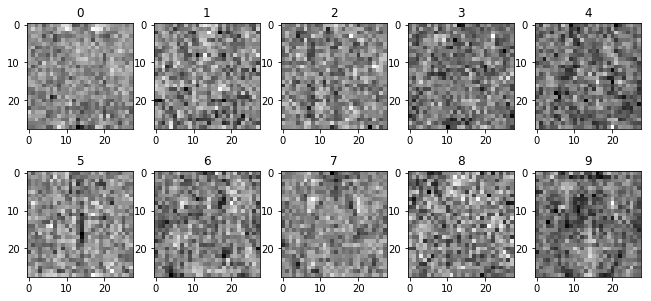

In [76]:
f, axes = plt.subplots(2, 5, figsize=(11,5))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(aa[i].reshape(28, 28), cmap=plt.cm.binary)
    a.set_title(i)
    #a.set_xticks(()) # ticks be gone
    #a.set_yticks(())
plt.show()